In [25]:
import pandas as pd
import numpy as np

import ruptures as rpt
from ruptures.metrics import precision_recall
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

import lightgbm as lgb
import seaborn as sns

In [26]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 9]

In [27]:
import holidays

In [43]:
df = pd.read_csv('/Users/estyle-150/github/my_signage/data/processed/processed20240826.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df

,y,client,close,price_am,price_pm,is_train,price,year,month,weekday,...,price_am_lag_7,price_am_lag_365,price_pm_lag_1,price_pm_lag_7,price_pm_lag_365,price_am_moving_avg_7,price_am_moving_avg_30,price_pm_moving_avg_7,price_pm_moving_avg_30,day
datetime,,,,,,,,,,,,,,,,,,,,,
2010-07-01,17,0,0,0.192308,0.076923,1,0.134615,2010,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2010-07-02,18,0,0,0.692308,0.423077,1,0.557692,2010,7,4,...,NaN,NaN,0.076923,NaN,NaN,NaN,NaN,NaN,NaN,2
2010-07-03,20,0,0,1.807692,1.192308,1,1.500000,2010,7,5,...,NaN,NaN,0.423077,NaN,NaN,NaN,NaN,NaN,NaN,3
2010-07-04,20,0,0,1.407407,0.925926,1,1.166667,2010,7,6,...,NaN,NaN,1.192308,NaN,NaN,NaN,NaN,NaN,NaN,4
2010-07-05,14,0,0,0.346154,0.192308,1,0.269231,2010,7,0,...,NaN,NaN,0.925926,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,0,0,0,5.000000,4.000000,0,4.500000,2017,3,0,...,3.0,5.0,4.000000,4.0,4.0,3.857143,2.166667,4.000000,2.166667,27
2017-03-28,0,0,0,4.000000,4.000000,0,4.000000,2017,3,1,...,4.0,4.0,4.000000,4.0,4.0,3.857143,2.233333,4.000000,2.233333,28
2017-03-29,0,0,0,3.000000,3.000000,0,3.000000,2017,3,2,...,2.0,4.0,4.000000,4.0,4.0,4.000000,2.266667,3.857143,2.266667,29


In [44]:
pd.DataFrame(df.columns)

,0
0,y
1,client
2,close
3,price_am
4,price_pm
5,is_train
6,price
7,year
8,month
9,weekday


In [45]:
# 使用するカラム
list_no = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 13, 16, 18, 20]
use_list = [df.columns[i] for i in list_no]

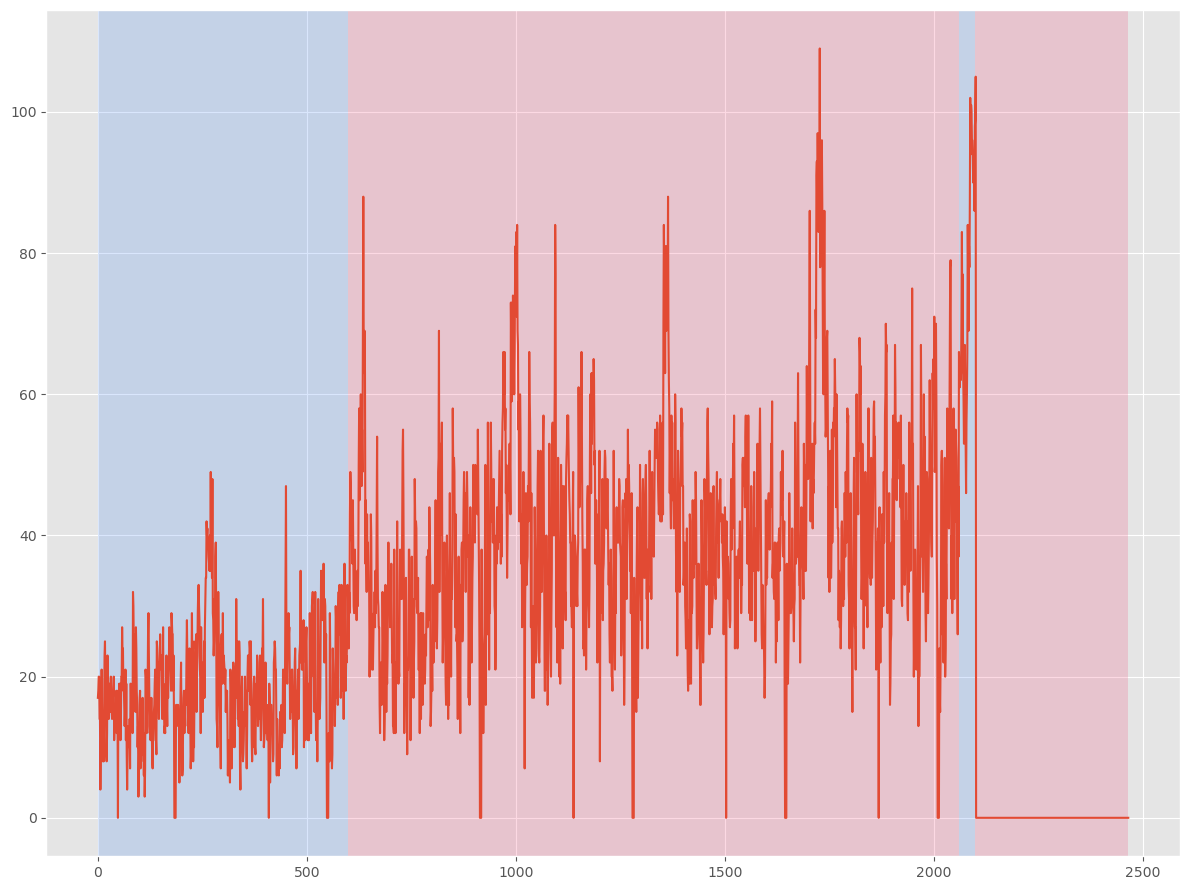

[600, 2060, 2100, 2466]


In [7]:
################
### 変化点検知 ###
################

# コスト関数の設定
model = "l2"
# アルゴの設定と学習
algo = rpt.Dynp(model=model).fit(df[['y']])
# 変化点の検出
my_bkps = algo.predict(n_bkps=3)
# 結果のプロット
rpt.show.display(df[['y']], my_bkps, figsize=(12, 9))
plt.show()
# 検出された変化点
print(my_bkps)


In [46]:
#df = df[my_bkps[0]:]
df = df[use_list]

,y,client,close,price_am,price_pm,year,month,weekday,y_lag_365,price_am_lag_365,price_pm_lag_365,price_am_moving_avg_30,price_pm_moving_avg_30
datetime,,,,,,,,,,,,,
2010-07-01,17,0,0,0.192308,0.076923,2010,7,3,NaN,NaN,NaN,NaN,NaN
2010-07-02,18,0,0,0.692308,0.423077,2010,7,4,NaN,NaN,NaN,NaN,NaN
2010-07-03,20,0,0,1.807692,1.192308,2010,7,5,NaN,NaN,NaN,NaN,NaN
2010-07-04,20,0,0,1.407407,0.925926,2010,7,6,NaN,NaN,NaN,NaN,NaN
2010-07-05,14,0,0,0.346154,0.192308,2010,7,0,NaN,NaN,NaN,NaN,NaN


,client,close,price_am,price_pm,year,month,weekday,y_lag_365,price_am_lag_365,price_pm_lag_365,price_am_moving_avg_30,price_pm_moving_avg_30
datetime,,,,,,,,,,,,
2016-04-01,1,0,3.0,2.0,2016,4,4,60.0,2.0,2.0,2.400000,2.266667
2016-04-02,0,0,5.0,5.0,2016,4,5,75.0,2.0,1.0,2.566667,2.433333
2016-04-03,1,0,2.0,2.0,2016,4,6,86.0,4.0,3.0,2.600000,2.500000
2016-04-04,1,0,1.0,1.0,2016,4,0,69.0,2.0,2.0,2.566667,2.500000
2016-04-05,0,0,1.0,1.0,2016,4,1,61.0,1.0,1.0,2.566667,2.500000


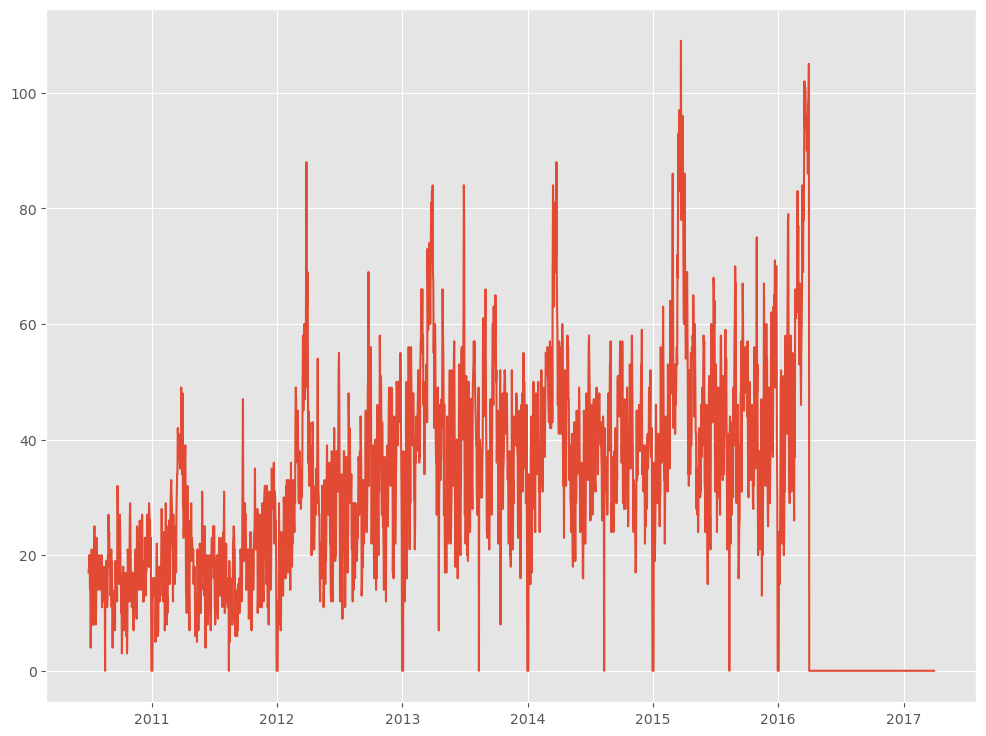

In [47]:

# 訓練データをとる
train_data = df[df['is_train'] == 1].copy()

# テストデータをとる
test_data = df[df['is_train'] == 0].copy()

# 訓練データから不要な列（'is_train'）を削除
train_data.drop(['is_train'], axis=1, inplace=True)

# テストデータから不要な列を削除
test_data.drop(['y','is_train'], axis=1, inplace=True)

# テストデータからcloseを削除（このデータで予測する）
test_data_open = test_data.drop(['close'], axis=1, inplace=False)

display(train_data.head(), test_data.head())


plt.plot(df['y'])

In [48]:
# 訓練データから閉店時のデータを削除（これを学習させる）
train_data_open =  train_data[train_data['close']==0]
train_data_open_2 = train_data_open.drop(['close'], axis=1, inplace=False)

#print(len(train_data_open_2))
#print(len(train_data))

In [49]:
from sklearn.model_selection import KFold
import optuna.integration.lightgbm as lgb_op
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error


# 訓練データと検証データに分ける
N = 30
X_train = train_data.drop(['y'], axis=1)[:-N]
y_train = train_data['y'][:-N]

X_test = train_data.drop(['y'], axis=1)[-N:]
y_test = train_data['y'][-N:]

# LightGBM用のデータセット
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)

# 評価基準 
params = {"objective" : "regression", 
              "metric" : "mse", 
              "num_leaves" : 7,
              "early_stopping_rounds" : 30,
              "verbosity": -1}

# 回帰モデル作成
model = lgb.train(params, lgb_train, valid_sets=lgb_test)

# 予測
test_pred = model.predict(X_test)
pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(test_pred)], axis = 1)
    
pred_df.columns = ['true', 'pred']
pred_df

mse = mean_squared_error(y_test, test_pred)
print('MSE:',round(mse,3))

MSE: 70.497


([<matplotlib.axis.XTick at 0x15ecc3f80>,
 [Text(0, 0, 'weekday'),
  Text(1, 0, 'close'),
  Text(2, 0, 'price_pm'),
  Text(3, 0, 'price_am'),
  Text(4, 0, 'client'),
  Text(5, 0, 'year'),
  Text(6, 0, 'price_am_moving_avg_30'),
  Text(7, 0, 'month'),
  Text(8, 0, 'y_lag_365'),
  Text(9, 0, 'price_am_lag_365'),
  Text(10, 0, 'price_pm_lag_365'),
  Text(11, 0, 'y')])

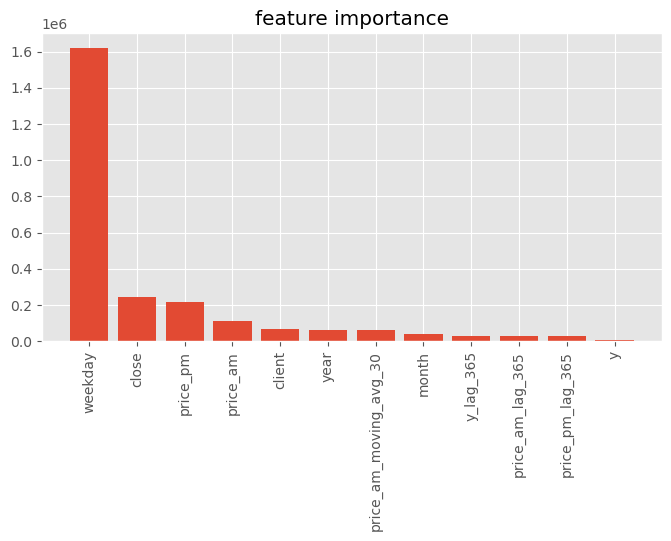

In [50]:
importances = model.feature_importance(importance_type='gain')
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,4))
plt.title('feature importance')
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), train_data.columns[indices], rotation=90)

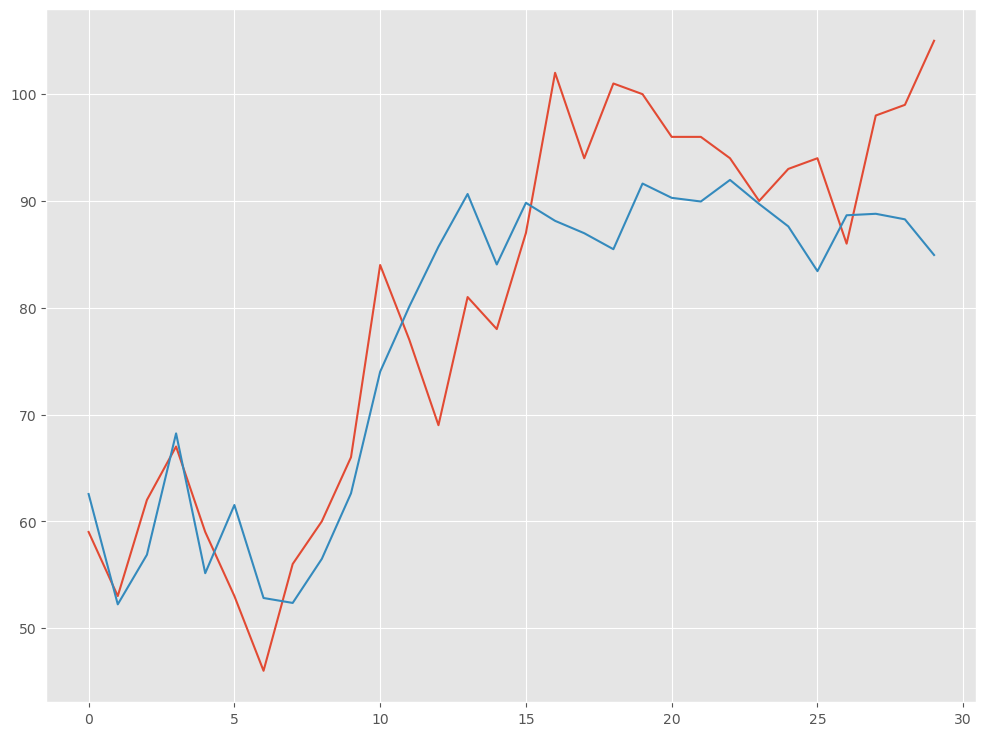

In [51]:
# 可視化
plt.plot(pred_df)

In [52]:
train_data[train_data['close']==1]

,y,client,close,price_am,price_pm,year,month,weekday,y_lag_365,price_am_lag_365,price_pm_lag_365,price_am_moving_avg_30,price_pm_moving_avg_30
datetime,,,,,,,,,,,,,
2010-12-31,0,0,1,0.692308,0.538462,2010,12,4,NaN,NaN,NaN,0.635333,0.438410
2011-01-01,0,0,1,0.892857,0.464286,2011,1,5,NaN,NaN,NaN,0.656121,0.450040
2011-01-02,0,0,1,0.428571,0.250000,2011,1,6,NaN,NaN,NaN,0.647330,0.440425
2011-01-03,0,0,1,0.142857,0.000000,2011,1,0,NaN,NaN,NaN,0.598758,0.399092
2011-12-31,0,0,1,1.600000,1.240000,2011,12,5,0.0,0.692308,0.538462,0.720000,0.541333
2012-01-01,0,0,1,0.428571,0.250000,2012,1,6,0.0,0.892857,0.464286,0.700952,0.516333
2012-01-02,0,0,1,0.142857,0.000000,2012,1,0,0.0,0.428571,0.250000,0.639048,0.483000
2012-01-03,0,0,1,0.107143,0.071429,2012,1,1,0.0,0.142857,0.000000,0.609286,0.452048
2012-12-31,0,0,1,0.384615,0.269231,2012,12,0,0.0,0.428571,0.250000,0.546154,0.442308


In [53]:
# oputunaによるハイパーパラメータのチューニング
import optuna

In [54]:
x_tr = X_train
x_va = X_test
y_tr = y_train
y_va = y_test

In [55]:
# 固定値のハイパーパラメータ
params_base = {
    'objective' : 'regression',
    'metrics' : 'mse',
    'random_seed' : 123,    
    'learnig_rate' : 0.1,  # １回のブースティングで加算する重みの比率
    'min_data_in_bin' : 3,  # ヒストグラムの１つのbinに含まれる最小のレコード数
    'bagging_freq' : 0,
    'verbose' : -1,
}


# ハイパーパラメータの探索範囲
def objective(trial):
    params_turning = {
        'num_leaves' : trial.suggest_int('num_leaves', 50, 200),
        'min_data_in_leaf' : trial.suggest_int('min_data_in_leaf', 2, 30),
        'max_bins' : trial.suggest_int('max_bin', 200, 400),
        'bagging_fraction' : trial.suggest_float('bagging_fraction', 0.8, 0.95),
        'feature_fraction' : trial.suggest_float('eature_fraction', 0.35, 0.65),
        'min_gain_to_split' : trial.suggest_float('min_gain_to_split', 0.01, 1, log=True),
        'lambda_11' : trial.suggest_float('lambda_11', 0.01, 1, log=True),
        'lambda_12' : trial.suggest_float('lambda_12', 0.01, 1, log=True),
    }
    
    # 探索用ハイパーパラメータの設定
    params_turning.update(params_base)
    lgb_train = lgb.Dataset(x_tr, y_tr)
    lgb_eval = lgb.Dataset(x_va, y_va)

    #探索用ハイパーパラメータで学習
    model = lgb.train(params_turning,
                      lgb_train,
                      num_boost_round=6000,
                      valid_sets=[lgb_train, lgb_eval],
                      valid_names=['train', 'valid'],
                      callbacks=[lgb.early_stopping(50),
                                 lgb.log_evaluation(500)])
    y_va_pred = model.predict(x_va,
                              num_iteration=model.best_iteration)
    score = mean_absolute_error(y_va, y_va_pred)
    print('')
    return score

In [56]:
# ハイパーパラメータの最適化の実行
study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=0), direction='minimize')
study.optimize(objective, n_trials=1500)

[I 2024-09-07 21:28:01,180] A new study created in memory with name: no-name-0e21a7ce-4150-498d-96f7-a94cdb0af933
[I 2024-09-07 21:28:01,283] Trial 0 finished with value: 8.159227462660992 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 22, 'max_bin': 321, 'bagging_fraction': 0.8817324774495345, 'eature_fraction': 0.47709643980167143, 'min_gain_to_split': 0.19578897201212997, 'lambda_11': 0.07501954443620121, 'lambda_12': 0.6074996073425692}. Best is trial 0 with value: 8.159227462660992.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 24.8003	valid's l2: 102.677

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:01,420] Trial 1 finished with value: 8.264521625405399 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 13, 'max_bin': 359, 'bagging_fraction': 0.8793342379629356, 'eature_fraction': 0.5204133683281797, 'min_gain_to_split': 0.70989362574059, 'lambda_11': 0.013869861245357327, 'lambda_12': 0.014936835544198456}. Best is trial 0 with value: 8.159227462660992.
[I 2024-09-07 21:28:01,500] Trial 2 finished with value: 8.70911880264038 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 26, 'max_bin': 356, 'bagging_fraction': 0.9305018222370228, 'eature_fraction': 0.6435855026698292, 'min_gain_to_split': 0.3965675081771009, 'lambda_11': 0.08374496868436809, 'lambda_12': 0.36396393567863894}. Best is trial 0 with value: 8.159227462660992.
[I 2024-09-07 21:28:01,579] Trial 3 finished with value: 8.627849332916798 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 20, 'max_bin': 228, 'bagging_fraction': 0.9417003375574375, 'eature_fraction': 0.5065544965250215,

Early stopping, best iteration is:
[59]	train's l2: 16.3008	valid's l2: 103.805

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 25.0458	valid's l2: 108.491

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 23.9228	valid's l2: 112.797

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:01,681] Trial 4 finished with value: 7.964293835763747 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 18, 'max_bin': 203, 'bagging_fraction': 0.8926453245613816, 'eature_fraction': 0.5336287168167264, 'min_gain_to_split': 0.17134364197119656, 'lambda_11': 0.7717846862118064, 'lambda_12': 0.2310152225018237}. Best is trial 4 with value: 7.964293835763747.
[I 2024-09-07 21:28:01,792] Trial 5 finished with value: 8.568323009510639 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 14, 'max_bin': 340, 'bagging_fraction': 0.8090338207443906, 'eature_fraction': 0.5500300146337003, 'min_gain_to_split': 0.21941976179005757, 'lambda_11': 0.02634905974115613, 'lambda_12': 0.018107254066631072}. Best is trial 4 with value: 7.964293835763747.


Early stopping, best iteration is:
[57]	train's l2: 21.9529	valid's l2: 96.5416

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 19.0874	valid's l2: 107.566

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:01,952] Trial 6 finished with value: 7.860581687715569 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 12, 'max_bin': 314, 'bagging_fraction': 0.865790227019348, 'eature_fraction': 0.6465121514177679, 'min_gain_to_split': 0.015998881492631498, 'lambda_11': 0.02616697456085447, 'lambda_12': 0.021019338091154416}. Best is trial 6 with value: 7.860581687715569.
[I 2024-09-07 21:28:02,125] Trial 7 finished with value: 12.151394056701125 and parameters: {'num_leaves': 148, 'min_data_in_leaf': 9, 'max_bin': 293, 'bagging_fraction': 0.8366638388002404, 'eature_fraction': 0.3976908750936559, 'min_gain_to_split': 0.016624564693643644, 'lambda_11': 0.2054277828628595, 'lambda_12': 0.018895826938026012}. Best is trial 6 with value: 7.860581687715569.


Early stopping, best iteration is:
[64]	train's l2: 13.0672	valid's l2: 86.4265

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	train's l2: 14.2062	valid's l2: 229.987

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:02,240] Trial 8 finished with value: 8.556174832897803 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 12, 'max_bin': 365, 'bagging_fraction': 0.8145651913689592, 'eature_fraction': 0.6013834722496412, 'min_gain_to_split': 0.015566709318481201, 'lambda_11': 0.8972612866432508, 'lambda_12': 0.08655704137361815}. Best is trial 6 with value: 7.860581687715569.
[I 2024-09-07 21:28:02,345] Trial 9 finished with value: 9.982571453690753 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 19, 'max_bin': 348, 'bagging_fraction': 0.8058781688381481, 'eature_fraction': 0.43484208877292285, 'min_gain_to_split': 0.017393745944806985, 'lambda_11': 0.0391093317225106, 'lambda_12': 0.0172764870082179}. Best is trial 6 with value: 7.860581687715569.


Early stopping, best iteration is:
[57]	train's l2: 17.6932	valid's l2: 107.927

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	train's l2: 20.4516	valid's l2: 149.4

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:02,586] Trial 10 finished with value: 11.052821511565282 and parameters: {'num_leaves': 165, 'min_data_in_leaf': 3, 'max_bin': 274, 'bagging_fraction': 0.8477755677707187, 'eature_fraction': 0.35831680797439047, 'min_gain_to_split': 0.05330204188167732, 'lambda_11': 0.012937145668124131, 'lambda_12': 0.07147694761170445}. Best is trial 6 with value: 7.860581687715569.
[I 2024-09-07 21:28:02,684] Trial 11 finished with value: 8.343065267338925 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 30, 'max_bin': 200, 'bagging_fraction': 0.9073228219134971, 'eature_fraction': 0.5915466403322428, 'min_gain_to_split': 0.03695273777264421, 'lambda_11': 0.33972721438327746, 'lambda_12': 0.170853948284439}. Best is trial 6 with value: 7.860581687715569.


Early stopping, best iteration is:
[108]	train's l2: 5.91838	valid's l2: 180.345

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[98]	train's l2: 21.5484	valid's l2: 102.158

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:02,814] Trial 12 finished with value: 8.837073591635802 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 7, 'max_bin': 261, 'bagging_fraction': 0.9044736177176815, 'eature_fraction': 0.6411444005844099, 'min_gain_to_split': 0.14317347535705074, 'lambda_11': 0.9134102492284791, 'lambda_12': 0.036973966301980056}. Best is trial 6 with value: 7.860581687715569.
[I 2024-09-07 21:28:02,918] Trial 13 finished with value: 8.303710993294358 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 18, 'max_bin': 397, 'bagging_fraction': 0.8606449404802545, 'eature_fraction': 0.5654918717308255, 'min_gain_to_split': 0.03590906518454921, 'lambda_11': 0.2100408407671935, 'lambda_12': 0.19571069755873458}. Best is trial 6 with value: 7.860581687715569.


Early stopping, best iteration is:
[50]	train's l2: 13.7511	valid's l2: 116.166

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 21.2691	valid's l2: 98.5954

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:03,071] Trial 14 finished with value: 9.652539951403432 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 23, 'max_bin': 246, 'bagging_fraction': 0.9032021294339454, 'eature_fraction': 0.45757503655728665, 'min_gain_to_split': 0.1011153981387115, 'lambda_11': 0.16686658994652112, 'lambda_12': 0.040597976607478665}. Best is trial 6 with value: 7.860581687715569.
[I 2024-09-07 21:28:03,202] Trial 15 finished with value: 8.796687705841263 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 9, 'max_bin': 306, 'bagging_fraction': 0.8638448378351465, 'eature_fraction': 0.6020687772330153, 'min_gain_to_split': 0.4133968138374465, 'lambda_11': 0.4206050391598744, 'lambda_12': 0.14573577212625521}. Best is trial 6 with value: 7.860581687715569.


Early stopping, best iteration is:
[138]	train's l2: 15.979	valid's l2: 138.626

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 13.2365	valid's l2: 116.834

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:03,312] Trial 16 finished with value: 8.278933292911006 and parameters: {'num_leaves': 161, 'min_data_in_leaf': 16, 'max_bin': 203, 'bagging_fraction': 0.8909768553305635, 'eature_fraction': 0.5430314133063356, 'min_gain_to_split': 0.03008230805415001, 'lambda_11': 0.05711851020863126, 'lambda_12': 0.8367647808576608}. Best is trial 6 with value: 7.860581687715569.
[I 2024-09-07 21:28:03,503] Trial 17 finished with value: 12.900509410727613 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 5, 'max_bin': 287, 'bagging_fraction': 0.9209015034445607, 'eature_fraction': 0.4266524610538611, 'min_gain_to_split': 0.010994552325511263, 'lambda_11': 0.48778760207673116, 'lambda_12': 0.044264756425648866}. Best is trial 6 with value: 7.860581687715569.


Early stopping, best iteration is:
[54]	train's l2: 19.8737	valid's l2: 98.7611

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[103]	train's l2: 5.7207	valid's l2: 261.17



[I 2024-09-07 21:28:03,589] Trial 18 finished with value: 8.376187716112703 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 26, 'max_bin': 321, 'bagging_fraction': 0.8324912516286567, 'eature_fraction': 0.6172153167825396, 'min_gain_to_split': 0.962468793653119, 'lambda_11': 0.021995417034556056, 'lambda_12': 0.010763485937667565}. Best is trial 6 with value: 7.860581687715569.
[I 2024-09-07 21:28:03,679] Trial 19 finished with value: 8.313079914151311 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 11, 'max_bin': 226, 'bagging_fraction': 0.8625464454040908, 'eature_fraction': 0.5680099305733495, 'min_gain_to_split': 0.09180201833334178, 'lambda_11': 0.12639085106811243, 'lambda_12': 0.306641828112754}. Best is trial 6 with value: 7.860581687715569.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 26.1473	valid's l2: 104.372

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.4802	valid's l2: 109.091

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:03,798] Trial 20 finished with value: 8.101327766184365 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 17, 'max_bin': 390, 'bagging_fraction': 0.8888094967500638, 'eature_fraction': 0.5258064355926397, 'min_gain_to_split': 0.2879460721345609, 'lambda_11': 0.05401287957710405, 'lambda_12': 0.059504143489425544}. Best is trial 6 with value: 7.860581687715569.
[I 2024-09-07 21:28:03,901] Trial 21 finished with value: 7.8970184637950185 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 16, 'max_bin': 393, 'bagging_fraction': 0.8910730797734226, 'eature_fraction': 0.49072511254157936, 'min_gain_to_split': 0.330813210137462, 'lambda_11': 0.04713433532995062, 'lambda_12': 0.06557676725311143}. Best is trial 6 with value: 7.860581687715569.


Early stopping, best iteration is:
[61]	train's l2: 20.2322	valid's l2: 99.9634

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 21.2834	valid's l2: 93.5388

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:04,024] Trial 22 finished with value: 8.01621190134123 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 15, 'max_bin': 380, 'bagging_fraction': 0.8713431716922839, 'eature_fraction': 0.48154232257937923, 'min_gain_to_split': 0.46739496951520276, 'lambda_11': 0.017711563842034754, 'lambda_12': 0.0272071826205572}. Best is trial 6 with value: 7.860581687715569.
[I 2024-09-07 21:28:04,111] Trial 23 finished with value: 8.709296055416482 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 21, 'max_bin': 333, 'bagging_fraction': 0.8955115127045712, 'eature_fraction': 0.48779658178792473, 'min_gain_to_split': 0.11505326519837454, 'lambda_11': 0.0402597150484247, 'lambda_12': 0.12440148315523007}. Best is trial 6 with value: 7.860581687715569.
[I 2024-09-07 21:28:04,201] Trial 24 finished with value: 8.624447393091987 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 10, 'max_bin': 375, 'bagging_fraction': 0.9178573223485624, 'eature_fraction': 0.4604533594

Early stopping, best iteration is:
[67]	train's l2: 17.1555	valid's l2: 96.2789

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 24.1387	valid's l2: 113.028

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 21.6864	valid's l2: 114.501

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:04,314] Trial 25 finished with value: 10.268278245008474 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 16, 'max_bin': 259, 'bagging_fraction': 0.8438718426455906, 'eature_fraction': 0.39403764125929147, 'min_gain_to_split': 0.2750752866411313, 'lambda_11': 0.01008469165408217, 'lambda_12': 0.2284203237186723}. Best is trial 6 with value: 7.860581687715569.
[I 2024-09-07 21:28:04,408] Trial 26 finished with value: 8.85876429945266 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 24, 'max_bin': 305, 'bagging_fraction': 0.8534157382628823, 'eature_fraction': 0.5783856186856942, 'min_gain_to_split': 0.0691869202486587, 'lambda_11': 0.06144432780868596, 'lambda_12': 0.10020168226778485}. Best is trial 6 with value: 7.860581687715569.


Early stopping, best iteration is:
[70]	train's l2: 19.3813	valid's l2: 156.255

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 24.3074	valid's l2: 110.564

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:04,552] Trial 27 finished with value: 8.311580052344764 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 14, 'max_bin': 225, 'bagging_fraction': 0.8727598534301602, 'eature_fraction': 0.5118798609504226, 'min_gain_to_split': 0.5597088578032536, 'lambda_11': 0.02653900762874297, 'lambda_12': 0.059558498947115096}. Best is trial 6 with value: 7.860581687715569.
[I 2024-09-07 21:28:04,647] Trial 28 finished with value: 8.03013592110016 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 18, 'max_bin': 278, 'bagging_fraction': 0.9123834159010514, 'eature_fraction': 0.6227399842833423, 'min_gain_to_split': 0.3380709933621661, 'lambda_11': 0.5917626303320307, 'lambda_12': 0.028267269959490054}. Best is trial 6 with value: 7.860581687715569.


Early stopping, best iteration is:
[67]	train's l2: 16.1275	valid's l2: 102.89

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 22.0332	valid's l2: 92.8684

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:04,764] Trial 29 finished with value: 8.737597369379204 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 21, 'max_bin': 320, 'bagging_fraction': 0.8832953651141933, 'eature_fraction': 0.5333483782163612, 'min_gain_to_split': 0.1972416645180012, 'lambda_11': 0.0852181638339801, 'lambda_12': 0.25429627525938703}. Best is trial 6 with value: 7.860581687715569.
[I 2024-09-07 21:28:04,939] Trial 30 finished with value: 9.547027096103374 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 8, 'max_bin': 330, 'bagging_fraction': 0.8980307774559556, 'eature_fraction': 0.49370623643392025, 'min_gain_to_split': 0.22945210717717585, 'lambda_11': 0.2713100530566, 'lambda_12': 0.11182792046940117}. Best is trial 6 with value: 7.860581687715569.


Early stopping, best iteration is:
[63]	train's l2: 23.0754	valid's l2: 115.201

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 10.0576	valid's l2: 141.815

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:05,073] Trial 31 finished with value: 8.180772039827913 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 15, 'max_bin': 380, 'bagging_fraction': 0.8720916690056515, 'eature_fraction': 0.4718016127597553, 'min_gain_to_split': 0.5093184891047796, 'lambda_11': 0.014527101194900771, 'lambda_12': 0.027658274312857455}. Best is trial 6 with value: 7.860581687715569.
[I 2024-09-07 21:28:05,187] Trial 32 finished with value: 11.206559333714615 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 12, 'max_bin': 383, 'bagging_fraction': 0.8825798716130715, 'eature_fraction': 0.4371006582488313, 'min_gain_to_split': 0.7284085111744428, 'lambda_11': 0.019251732134745226, 'lambda_12': 0.5022387681820536}. Best is trial 6 with value: 7.860581687715569.


Early stopping, best iteration is:
[63]	train's l2: 18.029	valid's l2: 102.937

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	train's l2: 16.6369	valid's l2: 186.299

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:05,308] Trial 33 finished with value: 8.293776448704996 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 13, 'max_bin': 368, 'bagging_fraction': 0.872990659325688, 'eature_fraction': 0.4729627099763935, 'min_gain_to_split': 0.5136798013831638, 'lambda_11': 0.017686112279183104, 'lambda_12': 0.010065155474649982}. Best is trial 6 with value: 7.860581687715569.
[I 2024-09-07 21:28:05,440] Trial 34 finished with value: 7.952985672084091 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 16, 'max_bin': 350, 'bagging_fraction': 0.880668506862226, 'eature_fraction': 0.5039794182925476, 'min_gain_to_split': 0.1435796077806734, 'lambda_11': 0.028840052070659615, 'lambda_12': 0.023090182160317732}. Best is trial 6 with value: 7.860581687715569.


Early stopping, best iteration is:
[57]	train's l2: 17.3915	valid's l2: 102.942

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	train's l2: 17.9037	valid's l2: 91.0713

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:05,545] Trial 35 finished with value: 8.163729193604158 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 18, 'max_bin': 352, 'bagging_fraction': 0.9318776444492488, 'eature_fraction': 0.5084874548704927, 'min_gain_to_split': 0.14986640823579847, 'lambda_11': 0.03224307551925189, 'lambda_12': 0.48851575773592787}. Best is trial 6 with value: 7.860581687715569.
[I 2024-09-07 21:28:05,644] Trial 36 finished with value: 8.338677032124211 and parameters: {'num_leaves': 179, 'min_data_in_leaf': 20, 'max_bin': 314, 'bagging_fraction': 0.8838571269400856, 'eature_fraction': 0.5487218101418444, 'min_gain_to_split': 0.06756404602255373, 'lambda_11': 0.04226437307916945, 'lambda_12': 0.013783754620171283}. Best is trial 6 with value: 7.860581687715569.


Early stopping, best iteration is:
[59]	train's l2: 22.2008	valid's l2: 101.312

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	train's l2: 23.9844	valid's l2: 103.404

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:05,784] Trial 37 finished with value: 8.488278946334754 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 13, 'max_bin': 339, 'bagging_fraction': 0.822930243959296, 'eature_fraction': 0.5224574637772375, 'min_gain_to_split': 0.28832133596477133, 'lambda_11': 0.027777462671351727, 'lambda_12': 0.020176797417766155}. Best is trial 6 with value: 7.860581687715569.
[I 2024-09-07 21:28:05,873] Trial 38 finished with value: 7.856877114116849 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 16, 'max_bin': 359, 'bagging_fraction': 0.8932580738911446, 'eature_fraction': 0.646244215417143, 'min_gain_to_split': 0.125149663527715, 'lambda_11': 0.06143147387897179, 'lambda_12': 0.05053687974883753}. Best is trial 38 with value: 7.856877114116849.


Early stopping, best iteration is:
[69]	train's l2: 15.1839	valid's l2: 108.935

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 21.3982	valid's l2: 94.8242

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:05,991] Trial 39 finished with value: 7.461005830875845 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 15, 'max_bin': 399, 'bagging_fraction': 0.9416060184173448, 'eature_fraction': 0.6380736281396509, 'min_gain_to_split': 0.12005306068707729, 'lambda_11': 0.08496420795954444, 'lambda_12': 0.05127978328251084}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:06,068] Trial 40 finished with value: 7.760445542199721 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 11, 'max_bin': 398, 'bagging_fraction': 0.9474856474274317, 'eature_fraction': 0.6451002598657672, 'min_gain_to_split': 0.024796397535378177, 'lambda_11': 0.07328890002406287, 'lambda_12': 0.05302229568936892}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:06,145] Trial 41 finished with value: 8.08840490536178 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 11, 'max_bin': 400, 'bagging_fraction': 0.9477330203111044, 'eature_fraction': 0.6488307911

Early stopping, best iteration is:
[57]	train's l2: 22.795	valid's l2: 81.0788

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	train's l2: 23.9163	valid's l2: 92.9813

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	train's l2: 22.8957	valid's l2: 99.2451

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:06,225] Trial 42 finished with value: 9.061772030705715 and parameters: {'num_leaves': 51, 'min_data_in_leaf': 6, 'max_bin': 368, 'bagging_fraction': 0.9378655995210022, 'eature_fraction': 0.6296603383438133, 'min_gain_to_split': 0.010259938483355456, 'lambda_11': 0.06610520307093035, 'lambda_12': 0.08475336981089272}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:06,316] Trial 43 finished with value: 8.019454591628664 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 14, 'max_bin': 390, 'bagging_fraction': 0.9492814232129329, 'eature_fraction': 0.6341986173853866, 'min_gain_to_split': 0.02205515405489303, 'lambda_11': 0.10606559330379961, 'lambda_12': 0.04923554568181999}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:06,409] Trial 44 finished with value: 8.773667167634922 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 12, 'max_bin': 359, 'bagging_fraction': 0.9307450527174029, 'eature_fraction': 0.6101215400

Early stopping, best iteration is:
[50]	train's l2: 21.5547	valid's l2: 135.576

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 19.3973	valid's l2: 95.6092

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 18.8692	valid's l2: 113.598

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:06,489] Trial 45 finished with value: 8.351822474427678 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 10, 'max_bin': 393, 'bagging_fraction': 0.922300142175777, 'eature_fraction': 0.6463886499789089, 'min_gain_to_split': 0.014164637611826956, 'lambda_11': 0.14937877986175735, 'lambda_12': 0.08399783303813839}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:06,595] Trial 46 finished with value: 7.464407071622747 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 14, 'max_bin': 400, 'bagging_fraction': 0.9403362119319505, 'eature_fraction': 0.6295179572796961, 'min_gain_to_split': 0.05240861324907755, 'lambda_11': 0.07144879761234298, 'lambda_12': 0.06782201064694628}. Best is trial 39 with value: 7.461005830875845.


Early stopping, best iteration is:
[56]	train's l2: 21.6015	valid's l2: 107.033

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.4534	valid's l2: 78.0803

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:06,696] Trial 47 finished with value: 8.001238866989807 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 8, 'max_bin': 372, 'bagging_fraction': 0.9379699894393013, 'eature_fraction': 0.5957366101150116, 'min_gain_to_split': 0.04835795489467667, 'lambda_11': 0.07669312538668781, 'lambda_12': 0.03555459311449477}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:06,779] Trial 48 finished with value: 8.210939511228613 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 11, 'max_bin': 385, 'bagging_fraction': 0.9413628471577136, 'eature_fraction': 0.6312486130537834, 'min_gain_to_split': 0.028036824847946784, 'lambda_11': 0.09899720292933495, 'lambda_12': 0.08052078091222488}. Best is trial 39 with value: 7.461005830875845.


Early stopping, best iteration is:
[61]	train's l2: 15.0159	valid's l2: 101.437

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	train's l2: 19.1945	valid's l2: 96.5707

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:06,909] Trial 49 finished with value: 10.368608000458009 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 4, 'max_bin': 360, 'bagging_fraction': 0.9295337823930453, 'eature_fraction': 0.5853147144562698, 'min_gain_to_split': 0.08772317920507933, 'lambda_11': 0.15974669156821378, 'lambda_12': 0.04803665062616466}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:06,990] Trial 50 finished with value: 8.649890283298541 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 14, 'max_bin': 400, 'bagging_fraction': 0.9462613508503361, 'eature_fraction': 0.6102615739556196, 'min_gain_to_split': 0.11825219107347079, 'lambda_11': 0.06946796521962229, 'lambda_12': 0.014241339211174844}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:07,094] Trial 51 finished with value: 8.291766275036105 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 17, 'max_bin': 389, 'bagging_fraction': 0.9111993877857982, 'eature_fraction': 0.648760244

Early stopping, best iteration is:
[69]	train's l2: 10.9714	valid's l2: 161.706

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 20.0572	valid's l2: 104.312

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 17.2095	valid's l2: 104.824



[I 2024-09-07 21:28:07,202] Trial 52 finished with value: 7.750704596698961 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 15, 'max_bin': 376, 'bagging_fraction': 0.9283498743008285, 'eature_fraction': 0.6264615221229205, 'min_gain_to_split': 0.0133517812106651, 'lambda_11': 0.03509080513955023, 'lambda_12': 0.06993961724373766}. Best is trial 39 with value: 7.461005830875845.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.4177	valid's l2: 84.4516

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:07,322] Trial 53 finished with value: 8.613898004815228 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 13, 'max_bin': 378, 'bagging_fraction': 0.9257252294525383, 'eature_fraction': 0.620667326892256, 'min_gain_to_split': 0.013234752172335912, 'lambda_11': 0.035168544545736855, 'lambda_12': 0.14757634524790406}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:07,416] Trial 54 finished with value: 7.5795729295573855 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 15, 'max_bin': 343, 'bagging_fraction': 0.9374826793284297, 'eature_fraction': 0.6331187932076927, 'min_gain_to_split': 0.018597235645206697, 'lambda_11': 0.053577335019898635, 'lambda_12': 0.045591063840027896}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:07,506] Trial 55 finished with value: 7.722964895834527 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 19, 'max_bin': 366, 'bagging_fraction': 0.9382023264613201, 'eature_fraction': 0.63767

Early stopping, best iteration is:
[54]	train's l2: 18.0854	valid's l2: 107.022

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 20.706	valid's l2: 83.7275

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 22.7476	valid's l2: 88.8271



[I 2024-09-07 21:28:07,603] Trial 56 finished with value: 8.055111467872724 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 19, 'max_bin': 344, 'bagging_fraction': 0.937196900687444, 'eature_fraction': 0.6076951058868125, 'min_gain_to_split': 0.018133929915303836, 'lambda_11': 0.0899455337676602, 'lambda_12': 0.04011920634312801}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:07,683] Trial 57 finished with value: 7.946277630906686 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 19, 'max_bin': 374, 'bagging_fraction': 0.9432146920428068, 'eature_fraction': 0.6350147719113995, 'min_gain_to_split': 0.019353644076565767, 'lambda_11': 0.12080048781978836, 'lambda_12': 0.07367872720871756}. Best is trial 39 with value: 7.461005830875845.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 23.5243	valid's l2: 95.3785

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 23.1265	valid's l2: 97.1365

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:07,774] Trial 58 finished with value: 8.075433122683728 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 15, 'max_bin': 384, 'bagging_fraction': 0.936035351196413, 'eature_fraction': 0.6225632424771516, 'min_gain_to_split': 0.030172107326552344, 'lambda_11': 0.21217248212880838, 'lambda_12': 0.03364896967596943}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:07,882] Trial 59 finished with value: 8.081114634911689 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 17, 'max_bin': 367, 'bagging_fraction': 0.9264868083715065, 'eature_fraction': 0.5645310604679137, 'min_gain_to_split': 0.024229965359618227, 'lambda_11': 0.07317996734270037, 'lambda_12': 0.10205275711049602}. Best is trial 39 with value: 7.461005830875845.


Early stopping, best iteration is:
[61]	train's l2: 21.8906	valid's l2: 95.3736

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 20.0393	valid's l2: 96.1209

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:07,976] Trial 60 finished with value: 8.30844784611416 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 23, 'max_bin': 394, 'bagging_fraction': 0.943048786473104, 'eature_fraction': 0.6366140108866108, 'min_gain_to_split': 0.012307405819882461, 'lambda_11': 0.0560124721918836, 'lambda_12': 0.0419587980272614}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:08,068] Trial 61 finished with value: 7.989762656500599 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 15, 'max_bin': 359, 'bagging_fraction': 0.9177616936427684, 'eature_fraction': 0.617185539084267, 'min_gain_to_split': 0.08303780008756545, 'lambda_11': 0.06100786963391079, 'lambda_12': 0.05222035972756521}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:08,168] Trial 62 finished with value: 7.905297305106245 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 17, 'max_bin': 386, 'bagging_fraction': 0.9337254603194985, 'eature_fraction': 0.60006937778003

Early stopping, best iteration is:
[63]	train's l2: 22.8898	valid's l2: 99.3939

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 20.705	valid's l2: 93.3975

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 20.8365	valid's l2: 94.3961



[I 2024-09-07 21:28:08,250] Trial 63 finished with value: 7.834204216647645 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 12, 'max_bin': 354, 'bagging_fraction': 0.9490828625878263, 'eature_fraction': 0.6392016523901949, 'min_gain_to_split': 0.015216263183390505, 'lambda_11': 0.09321085547769364, 'lambda_12': 0.05773953816803498}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:08,321] Trial 64 finished with value: 8.699580370966839 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 30, 'max_bin': 374, 'bagging_fraction': 0.9491706500102168, 'eature_fraction': 0.6264387675398286, 'min_gain_to_split': 0.015379619600969785, 'lambda_11': 0.09409033986412521, 'lambda_12': 0.031693376354612876}. Best is trial 39 with value: 7.461005830875845.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 23.0977	valid's l2: 88.6851

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	train's l2: 26.8771	valid's l2: 111.883

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:08,423] Trial 65 finished with value: 8.971644057062386 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 10, 'max_bin': 400, 'bagging_fraction': 0.9416594585677115, 'eature_fraction': 0.5863364993561319, 'min_gain_to_split': 0.02002195992150916, 'lambda_11': 0.13543384116560142, 'lambda_12': 0.045380733586271926}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:08,503] Trial 66 finished with value: 7.678736537753806 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 14, 'max_bin': 336, 'bagging_fraction': 0.9264449054248551, 'eature_fraction': 0.6400162333931121, 'min_gain_to_split': 0.027454310274340192, 'lambda_11': 0.1061205462141808, 'lambda_12': 0.05997879021603586}. Best is trial 39 with value: 7.461005830875845.


Early stopping, best iteration is:
[67]	train's l2: 16.4945	valid's l2: 121.696

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 22.9068	valid's l2: 86.7515

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:08,627] Trial 67 finished with value: 8.073176822066655 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 15, 'max_bin': 329, 'bagging_fraction': 0.9258852865132959, 'eature_fraction': 0.6113900932612121, 'min_gain_to_split': 0.026581274812714047, 'lambda_11': 0.10750389696604563, 'lambda_12': 0.1294533640378384}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:08,737] Trial 68 finished with value: 8.618473846401622 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 14, 'max_bin': 337, 'bagging_fraction': 0.918069638222227, 'eature_fraction': 0.5770493932391463, 'min_gain_to_split': 0.0327732017351302, 'lambda_11': 0.047497594212262226, 'lambda_12': 0.09235017410256606}. Best is trial 39 with value: 7.461005830875845.


Early stopping, best iteration is:
[61]	train's l2: 17.7041	valid's l2: 94.0339

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 19.3114	valid's l2: 105.017

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:08,830] Trial 69 finished with value: 8.430126929442041 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 20, 'max_bin': 344, 'bagging_fraction': 0.933428664327439, 'eature_fraction': 0.6382929405510596, 'min_gain_to_split': 0.041776127442082575, 'lambda_11': 0.0784093894382671, 'lambda_12': 0.06272851182446934}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:08,909] Trial 70 finished with value: 8.05321794765862 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 13, 'max_bin': 294, 'bagging_fraction': 0.9142800024952383, 'eature_fraction': 0.6265169180892031, 'min_gain_to_split': 0.012264345919913489, 'lambda_11': 0.1797879221278932, 'lambda_12': 0.04039266273604344}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:08,985] Trial 71 finished with value: 7.991454953886071 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 12, 'max_bin': 351, 'bagging_fraction': 0.943985661278495, 'eature_fraction': 0.6416449312017

Early stopping, best iteration is:
[58]	train's l2: 21.6097	valid's l2: 105.371

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 22.8717	valid's l2: 97.0678

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[44]	train's l2: 24.85	valid's l2: 92.6872

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:09,085] Trial 72 finished with value: 8.620723738736213 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 9, 'max_bin': 365, 'bagging_fraction': 0.9408103106193183, 'eature_fraction': 0.6176503837276355, 'min_gain_to_split': 0.01797506032965867, 'lambda_11': 0.14004791916804743, 'lambda_12': 0.07534444394619619}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:09,173] Trial 73 finished with value: 8.009241620588762 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 11, 'max_bin': 324, 'bagging_fraction': 0.927880189330483, 'eature_fraction': 0.6389374847272926, 'min_gain_to_split': 0.02124624313643709, 'lambda_11': 0.07278718856443815, 'lambda_12': 0.05603393732693984}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:09,254] Trial 74 finished with value: 8.32388605693769 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 13, 'max_bin': 379, 'bagging_fraction': 0.9226401623185373, 'eature_fraction': 0.6032670984958

Early stopping, best iteration is:
[66]	train's l2: 16.901	valid's l2: 110.081

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	train's l2: 21.018	valid's l2: 95.6256

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 22.4258	valid's l2: 102.29

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:09,337] Trial 75 finished with value: 7.635152728447313 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 14, 'max_bin': 394, 'bagging_fraction': 0.9351147963404801, 'eature_fraction': 0.6292636949763374, 'min_gain_to_split': 0.01670369257312989, 'lambda_11': 0.051869385951370264, 'lambda_12': 0.04541369130674353}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:09,440] Trial 76 finished with value: 7.960896662648763 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 16, 'max_bin': 394, 'bagging_fraction': 0.934366348573909, 'eature_fraction': 0.615840373067779, 'min_gain_to_split': 0.011434298844682807, 'lambda_11': 0.051329668768558885, 'lambda_12': 0.04696810809406503}. Best is trial 39 with value: 7.461005830875845.
[I 2024-09-07 21:28:09,527] Trial 77 finished with value: 7.418722716725775 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 14, 'max_bin': 390, 'bagging_fraction': 0.9390194469021501, 'eature_fraction': 0.628952293

Early stopping, best iteration is:
[59]	train's l2: 21.133	valid's l2: 87.0126

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 20.8502	valid's l2: 91.8013

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	train's l2: 19.8832	valid's l2: 80.0589



[I 2024-09-07 21:28:09,609] Trial 78 finished with value: 7.7861306344832615 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 18, 'max_bin': 387, 'bagging_fraction': 0.9396467611725653, 'eature_fraction': 0.6271862930397395, 'min_gain_to_split': 0.05909584549636877, 'lambda_11': 0.04155937393210513, 'lambda_12': 0.031008395245914974}. Best is trial 77 with value: 7.418722716725775.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 24.2904	valid's l2: 90.1025

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:09,750] Trial 79 finished with value: 8.632089987015158 and parameters: {'num_leaves': 154, 'min_data_in_leaf': 15, 'max_bin': 381, 'bagging_fraction': 0.9081059891935856, 'eature_fraction': 0.3703894106101037, 'min_gain_to_split': 0.07710963529738325, 'lambda_11': 0.03108247818642835, 'lambda_12': 0.03628841751006482}. Best is trial 77 with value: 7.418722716725775.
[I 2024-09-07 21:28:09,884] Trial 80 finished with value: 8.4559816411477 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 14, 'max_bin': 370, 'bagging_fraction': 0.9300463934925313, 'eature_fraction': 0.5908092190909194, 'min_gain_to_split': 0.0618159541518839, 'lambda_11': 0.024248373701313348, 'lambda_12': 0.023514257747462085}. Best is trial 77 with value: 7.418722716725775.


Early stopping, best iteration is:
[76]	train's l2: 22.5322	valid's l2: 114.404

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 17.6067	valid's l2: 105.522

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:09,972] Trial 81 finished with value: 7.921851318224031 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 14, 'max_bin': 394, 'bagging_fraction': 0.9442715759537148, 'eature_fraction': 0.6497886434062462, 'min_gain_to_split': 0.10627461497395692, 'lambda_11': 0.066173954487412, 'lambda_12': 0.042302333303321386}. Best is trial 77 with value: 7.418722716725775.
[I 2024-09-07 21:28:10,056] Trial 82 finished with value: 8.12309590564442 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 17, 'max_bin': 396, 'bagging_fraction': 0.9362030772147961, 'eature_fraction': 0.6304638965631709, 'min_gain_to_split': 0.01686184089819129, 'lambda_11': 0.041804531377250306, 'lambda_12': 0.07004038010644864}. Best is trial 77 with value: 7.418722716725775.
[I 2024-09-07 21:28:10,133] Trial 83 finished with value: 8.186401639598667 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 16, 'max_bin': 391, 'bagging_fraction': 0.9233316054782649, 'eature_fraction': 0.60175853643

Early stopping, best iteration is:
[50]	train's l2: 21.7019	valid's l2: 88.835

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 21.5203	valid's l2: 96.8933

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 21.7959	valid's l2: 97.5591

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:10,215] Trial 84 finished with value: 9.020285083003275 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 13, 'max_bin': 377, 'bagging_fraction': 0.9318780262982842, 'eature_fraction': 0.6212180014403018, 'min_gain_to_split': 0.0334579858291561, 'lambda_11': 0.03763488644488553, 'lambda_12': 0.050954963291881664}. Best is trial 77 with value: 7.418722716725775.
[I 2024-09-07 21:28:10,311] Trial 85 finished with value: 7.379787778007796 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 12, 'max_bin': 364, 'bagging_fraction': 0.9460868571598876, 'eature_fraction': 0.6431600890965405, 'min_gain_to_split': 0.0506282494919221, 'lambda_11': 0.022155264111728502, 'lambda_12': 0.038345654617858306}. Best is trial 85 with value: 7.379787778007796.


Early stopping, best iteration is:
[55]	train's l2: 21.6223	valid's l2: 117.68

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 16.7695	valid's l2: 78.1882

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:10,420] Trial 86 finished with value: 7.347627716540815 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 14, 'max_bin': 344, 'bagging_fraction': 0.9386652232324603, 'eature_fraction': 0.632570238773143, 'min_gain_to_split': 0.07509236033492067, 'lambda_11': 0.02241640524820331, 'lambda_12': 0.037412149823582326}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:10,518] Trial 87 finished with value: 7.650322109309973 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 12, 'max_bin': 345, 'bagging_fraction': 0.9451250569387663, 'eature_fraction': 0.6412058357537238, 'min_gain_to_split': 0.07415642375126759, 'lambda_11': 0.014811673934683696, 'lambda_12': 0.016529990636581036}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:10,617] Trial 88 finished with value: 8.732533840030102 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 12, 'max_bin': 334, 'bagging_fraction': 0.9451822065130204, 'eature_fraction': 0.61500417

Early stopping, best iteration is:
[66]	train's l2: 16.6662	valid's l2: 80.2046

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 19.7529	valid's l2: 90.1042

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 16.6236	valid's l2: 115.976



[I 2024-09-07 21:28:10,696] Trial 89 finished with value: 8.505003216174044 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 28, 'max_bin': 342, 'bagging_fraction': 0.9387867694662752, 'eature_fraction': 0.6325077599995176, 'min_gain_to_split': 0.06939961292678432, 'lambda_11': 0.011231584710089268, 'lambda_12': 0.021955577696328565}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:10,809] Trial 90 finished with value: 8.697267660447803 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 10, 'max_bin': 347, 'bagging_fraction': 0.946160558300544, 'eature_fraction': 0.6052487027689596, 'min_gain_to_split': 0.07435509205353724, 'lambda_11': 0.015505062206305858, 'lambda_12': 0.01732679424575409}. Best is trial 86 with value: 7.347627716540815.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	train's l2: 25.9691	valid's l2: 107.744

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 16.458	valid's l2: 109.958

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:10,907] Trial 91 finished with value: 7.762725135891378 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 14, 'max_bin': 363, 'bagging_fraction': 0.9397782875368282, 'eature_fraction': 0.6420531496856494, 'min_gain_to_split': 0.042541284260640556, 'lambda_11': 0.019423075709324757, 'lambda_12': 0.02640443172400582}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:11,003] Trial 92 finished with value: 7.869833566308594 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 14, 'max_bin': 327, 'bagging_fraction': 0.935242302435362, 'eature_fraction': 0.6340688571989028, 'min_gain_to_split': 0.09571893763470384, 'lambda_11': 0.024279635295378327, 'lambda_12': 0.038562803863789755}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:11,104] Trial 93 finished with value: 7.812634276162598 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 13, 'max_bin': 316, 'bagging_fraction': 0.9494562485260951, 'eature_fraction': 0.6408991

Early stopping, best iteration is:
[59]	train's l2: 18.8604	valid's l2: 84.0365

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 19.4633	valid's l2: 92.3773

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 19.6402	valid's l2: 89.0864



[I 2024-09-07 21:28:11,212] Trial 94 finished with value: 8.070620915543227 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 15, 'max_bin': 214, 'bagging_fraction': 0.9314935184673903, 'eature_fraction': 0.6231631633948873, 'min_gain_to_split': 0.060677081709888794, 'lambda_11': 0.030477399502258393, 'lambda_12': 0.01296032197528738}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:11,299] Trial 95 finished with value: 7.437256239189304 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 16, 'max_bin': 354, 'bagging_fraction': 0.9417729225750606, 'eature_fraction': 0.6496270380923972, 'min_gain_to_split': 0.13254610727097516, 'lambda_11': 0.012993063283870968, 'lambda_12': 0.03281708977698887}. Best is trial 86 with value: 7.347627716540815.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 20.1255	valid's l2: 93.9853

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 21.9539	valid's l2: 83.8574

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:11,384] Trial 96 finished with value: 7.722320329355445 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 12, 'max_bin': 356, 'bagging_fraction': 0.9450883233661919, 'eature_fraction': 0.6473948279319754, 'min_gain_to_split': 0.1284073779914927, 'lambda_11': 0.012503470822072477, 'lambda_12': 0.01935199947383302}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:11,464] Trial 97 finished with value: 8.036351203408627 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 16, 'max_bin': 347, 'bagging_fraction': 0.9419548448432945, 'eature_fraction': 0.6307523001341047, 'min_gain_to_split': 0.05302028895417159, 'lambda_11': 0.016850206248873647, 'lambda_12': 0.02579572251962068}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:11,559] Trial 98 finished with value: 7.757836264310374 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 13, 'max_bin': 350, 'bagging_fraction': 0.8017550860193965, 'eature_fraction': 0.649294942

Early stopping, best iteration is:
[59]	train's l2: 20.7112	valid's l2: 88.2012

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 22.8822	valid's l2: 94.2458

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 19.1346	valid's l2: 88.542

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:11,651] Trial 99 finished with value: 9.376676855327924 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 2, 'max_bin': 338, 'bagging_fraction': 0.9353491216905713, 'eature_fraction': 0.611240499995242, 'min_gain_to_split': 0.09902285344442414, 'lambda_11': 0.011597489665872795, 'lambda_12': 0.034805271420074314}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:11,726] Trial 100 finished with value: 8.246785103952625 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 11, 'max_bin': 355, 'bagging_fraction': 0.9499353737134488, 'eature_fraction': 0.641798870949657, 'min_gain_to_split': 0.10864795674086412, 'lambda_11': 0.021291835678988864, 'lambda_12': 0.06250791067798864}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:11,810] Trial 101 finished with value: 7.738108800823792 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 12, 'max_bin': 332, 'bagging_fraction': 0.9459724251006402, 'eature_fraction': 0.64526813

Early stopping, best iteration is:
[57]	train's l2: 17.5992	valid's l2: 153.658

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 23.1768	valid's l2: 103.493

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 21.042	valid's l2: 87.3022

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:11,900] Trial 102 finished with value: 7.696954100985645 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 15, 'max_bin': 356, 'bagging_fraction': 0.9428739647616879, 'eature_fraction': 0.6335426127647783, 'min_gain_to_split': 0.18617286592043886, 'lambda_11': 0.01006574060173224, 'lambda_12': 0.018848223725372044}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:11,997] Trial 103 finished with value: 8.044097128227186 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 15, 'max_bin': 361, 'bagging_fraction': 0.9408008313319695, 'eature_fraction': 0.6343408885644077, 'min_gain_to_split': 0.17034590168381342, 'lambda_11': 0.018698791895547066, 'lambda_12': 0.01547397917998817}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:12,092] Trial 104 finished with value: 8.231806100729491 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 16, 'max_bin': 345, 'bagging_fraction': 0.9368351199443046, 'eature_fraction': 0.62206

Early stopping, best iteration is:
[50]	train's l2: 23.0265	valid's l2: 88.7912

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 21.1058	valid's l2: 90.5992

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	train's l2: 19.0517	valid's l2: 96.2518



[I 2024-09-07 21:28:12,192] Trial 105 finished with value: 7.810756505754108 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 14, 'max_bin': 340, 'bagging_fraction': 0.9325066963789814, 'eature_fraction': 0.6299819961528244, 'min_gain_to_split': 0.123731812155794, 'lambda_11': 0.011310643383984933, 'lambda_12': 0.04647033486251408}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:12,287] Trial 106 finished with value: 8.020039562906048 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 18, 'max_bin': 335, 'bagging_fraction': 0.9428118443086665, 'eature_fraction': 0.6161117404039953, 'min_gain_to_split': 0.0893031201641023, 'lambda_11': 0.01470426437524577, 'lambda_12': 0.03898434249610855}. Best is trial 86 with value: 7.347627716540815.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 19.0195	valid's l2: 85.6207

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 21.927	valid's l2: 95.4335

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:12,379] Trial 107 finished with value: 7.861631641586984 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 17, 'max_bin': 356, 'bagging_fraction': 0.9277307686984737, 'eature_fraction': 0.636495209295474, 'min_gain_to_split': 0.13494215660628495, 'lambda_11': 0.026400849158835706, 'lambda_12': 0.03284185415424309}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:12,478] Trial 108 finished with value: 7.39359368019014 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 14, 'max_bin': 371, 'bagging_fraction': 0.9247351177038102, 'eature_fraction': 0.6263409676686428, 'min_gain_to_split': 0.1584777473948823, 'lambda_11': 0.08248325378314941, 'lambda_12': 0.03663900499512341}. Best is trial 86 with value: 7.347627716540815.


Early stopping, best iteration is:
[58]	train's l2: 21.3093	valid's l2: 93.2286

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 18.8523	valid's l2: 78.1121

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:12,595] Trial 109 finished with value: 8.019709817871997 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 11, 'max_bin': 370, 'bagging_fraction': 0.9191355184738417, 'eature_fraction': 0.596648226310448, 'min_gain_to_split': 0.24382531396287624, 'lambda_11': 0.08023994050188121, 'lambda_12': 0.028248086020710533}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:12,695] Trial 110 finished with value: 7.6958946265450665 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 13, 'max_bin': 383, 'bagging_fraction': 0.9240600786698978, 'eature_fraction': 0.6251109897386464, 'min_gain_to_split': 0.15737203918441367, 'lambda_11': 0.02245786910529843, 'lambda_12': 0.036723964557745487}. Best is trial 86 with value: 7.347627716540815.


Early stopping, best iteration is:
[58]	train's l2: 16.2556	valid's l2: 100.785

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 19.4126	valid's l2: 84.2079

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:12,809] Trial 111 finished with value: 8.068612670949607 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 13, 'max_bin': 383, 'bagging_fraction': 0.9240894834211644, 'eature_fraction': 0.6241528265735449, 'min_gain_to_split': 0.16577413576696604, 'lambda_11': 0.022728998946897463, 'lambda_12': 0.03765480903709063}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:12,930] Trial 112 finished with value: 8.037016295765023 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 14, 'max_bin': 397, 'bagging_fraction': 0.9300723196568689, 'eature_fraction': 0.64324121625731, 'min_gain_to_split': 0.046628000224697444, 'lambda_11': 0.01997929906732571, 'lambda_12': 0.052889682772316135}. Best is trial 86 with value: 7.347627716540815.


Early stopping, best iteration is:
[60]	train's l2: 17.7194	valid's l2: 97.1076

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	train's l2: 14.6957	valid's l2: 89.0136

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:13,040] Trial 113 finished with value: 8.768757784981235 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 13, 'max_bin': 385, 'bagging_fraction': 0.91348414257709, 'eature_fraction': 0.6115032099262143, 'min_gain_to_split': 0.11513023510320702, 'lambda_11': 0.01748383140512594, 'lambda_12': 0.0457587983780971}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:13,141] Trial 114 finished with value: 7.902616902323742 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 14, 'max_bin': 390, 'bagging_fraction': 0.9211325412303483, 'eature_fraction': 0.6268602772640622, 'min_gain_to_split': 0.1532933028433351, 'lambda_11': 0.0840949482946786, 'lambda_12': 0.9011598052018883}. Best is trial 86 with value: 7.347627716540815.


Early stopping, best iteration is:
[63]	train's l2: 17.2972	valid's l2: 111.855

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[60]	train's l2: 18.2537	valid's l2: 88.964

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:13,271] Trial 115 finished with value: 7.881563869532715 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 16, 'max_bin': 374, 'bagging_fraction': 0.9385835307838601, 'eature_fraction': 0.620171638222011, 'min_gain_to_split': 0.07151426388994335, 'lambda_11': 0.045819838738688605, 'lambda_12': 0.036095390644582934}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:13,358] Trial 116 finished with value: 7.767322683724703 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 15, 'max_bin': 389, 'bagging_fraction': 0.932886870750082, 'eature_fraction': 0.6496161854582806, 'min_gain_to_split': 0.06621145499702555, 'lambda_11': 0.05256890095857469, 'lambda_12': 0.05053751489878199}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:13,448] Trial 117 finished with value: 8.031232171030958 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 12, 'max_bin': 380, 'bagging_fraction': 0.925783605154433, 'eature_fraction': 0.6401354

Early stopping, best iteration is:
[61]	train's l2: 17.9844	valid's l2: 92.9011

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 20.8022	valid's l2: 82.5407

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 20.6838	valid's l2: 93.5164

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:13,544] Trial 118 finished with value: 8.241504812994918 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 13, 'max_bin': 366, 'bagging_fraction': 0.9469319464809728, 'eature_fraction': 0.6076216546409506, 'min_gain_to_split': 0.05476114495994002, 'lambda_11': 0.06578075134417173, 'lambda_12': 0.02930674347260104}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:13,654] Trial 119 finished with value: 10.747981621943616 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 15, 'max_bin': 400, 'bagging_fraction': 0.915788990981553, 'eature_fraction': 0.41887953872178707, 'min_gain_to_split': 0.10458472917701335, 'lambda_11': 0.029030831216341948, 'lambda_12': 0.06303924012910184}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:13,727] Trial 120 finished with value: 8.767814792305124 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 9, 'max_bin': 387, 'bagging_fraction': 0.9362397793302804, 'eature_fraction': 0.636043

Early stopping, best iteration is:
[66]	train's l2: 17.1941	valid's l2: 100.463

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[71]	train's l2: 18.4972	valid's l2: 165.933

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	train's l2: 23.1208	valid's l2: 114.502



[I 2024-09-07 21:28:13,810] Trial 121 finished with value: 7.6724774889073455 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 15, 'max_bin': 352, 'bagging_fraction': 0.8549372365943063, 'eature_fraction': 0.628161958648214, 'min_gain_to_split': 0.176897605894022, 'lambda_11': 0.015754762286513797, 'lambda_12': 0.021163141186988327}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:13,908] Trial 122 finished with value: 8.002742640468783 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 14, 'max_bin': 362, 'bagging_fraction': 0.8526630479108948, 'eature_fraction': 0.627906988805731, 'min_gain_to_split': 0.06368383869066396, 'lambda_11': 0.013630332356286924, 'lambda_12': 0.021305278605958863}. Best is trial 86 with value: 7.347627716540815.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 22.115	valid's l2: 88.8612

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 18.2026	valid's l2: 89.3501

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:13,994] Trial 123 finished with value: 8.356742497521404 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 17, 'max_bin': 258, 'bagging_fraction': 0.835152590027347, 'eature_fraction': 0.6175121635362649, 'min_gain_to_split': 0.08072430262844195, 'lambda_11': 0.022539795367292614, 'lambda_12': 0.031949737757765245}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:14,101] Trial 124 finished with value: 7.673293160713621 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 16, 'max_bin': 350, 'bagging_fraction': 0.8614076132379973, 'eature_fraction': 0.629950778113719, 'min_gain_to_split': 0.21058461633312386, 'lambda_11': 0.016288518465984593, 'lambda_12': 0.04394170220448672}. Best is trial 86 with value: 7.347627716540815.


Early stopping, best iteration is:
[59]	train's l2: 22.8628	valid's l2: 101.67

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 19.0674	valid's l2: 87.0814

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:14,211] Trial 125 finished with value: 7.673293160713621 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 16, 'max_bin': 348, 'bagging_fraction': 0.8651027840077026, 'eature_fraction': 0.6442759513612301, 'min_gain_to_split': 0.21021601651429503, 'lambda_11': 0.01671416207368367, 'lambda_12': 0.04350799829423987}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:14,308] Trial 126 finished with value: 7.8010572442331005 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 16, 'max_bin': 352, 'bagging_fraction': 0.868987783945318, 'eature_fraction': 0.6436050752342426, 'min_gain_to_split': 0.31783651165348004, 'lambda_11': 0.016578124855200858, 'lambda_12': 0.04584290183278454}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:14,398] Trial 127 finished with value: 7.424291325424815 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 341, 'bagging_fraction': 0.8630663067458567, 'eature_fraction': 0.632065

Early stopping, best iteration is:
[58]	train's l2: 19.0674	valid's l2: 87.0814

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 18.961	valid's l2: 87.47

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 22.6332	valid's l2: 78.7236



[I 2024-09-07 21:28:14,501] Trial 128 finished with value: 7.653208525563315 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 345, 'bagging_fraction': 0.8549928534330181, 'eature_fraction': 0.631250410105882, 'min_gain_to_split': 0.25440498974417997, 'lambda_11': 0.01470479617694253, 'lambda_12': 0.0342216929927293}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:14,602] Trial 129 finished with value: 7.634263343180941 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 15, 'max_bin': 341, 'bagging_fraction': 0.8559135594833023, 'eature_fraction': 0.6346165360382086, 'min_gain_to_split': 0.3904241796491568, 'lambda_11': 0.015220376950377115, 'lambda_12': 0.03304769230192875}. Best is trial 86 with value: 7.347627716540815.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 18.3928	valid's l2: 81.1608

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 19.6963	valid's l2: 86.4191



[I 2024-09-07 21:28:14,693] Trial 130 finished with value: 8.2485924244722 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 17, 'max_bin': 343, 'bagging_fraction': 0.8502759505793943, 'eature_fraction': 0.6130051795206255, 'min_gain_to_split': 0.4259007741669007, 'lambda_11': 0.011897924443482243, 'lambda_12': 0.04027072909595164}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:14,797] Trial 131 finished with value: 7.479281909661869 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 15, 'max_bin': 342, 'bagging_fraction': 0.858200764016442, 'eature_fraction': 0.6337031698835902, 'min_gain_to_split': 0.27518068219959607, 'lambda_11': 0.014607462630722812, 'lambda_12': 0.03402464432080391}. Best is trial 86 with value: 7.347627716540815.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 20.3096	valid's l2: 98.5626

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 20.978	valid's l2: 82.3063

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:14,890] Trial 132 finished with value: 7.6123621742287755 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 14, 'max_bin': 328, 'bagging_fraction': 0.8579238973630839, 'eature_fraction': 0.6350246484831216, 'min_gain_to_split': 0.2706663795463766, 'lambda_11': 0.014356102718169731, 'lambda_12': 0.0332425223076471}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:14,989] Trial 133 finished with value: 8.24266383135517 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 14, 'max_bin': 326, 'bagging_fraction': 0.8580103013874232, 'eature_fraction': 0.6368316225374469, 'min_gain_to_split': 0.37651273961477555, 'lambda_11': 0.013808312639501231, 'lambda_12': 0.029214528456464172}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:15,083] Trial 134 finished with value: 8.036908614308944 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 12, 'max_bin': 331, 'bagging_fraction': 0.8775042434407583, 'eature_fraction': 0.649669

Early stopping, best iteration is:
[50]	train's l2: 21.3691	valid's l2: 83.7892

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[60]	train's l2: 19.3352	valid's l2: 96.9631

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 19.6949	valid's l2: 92.9468



[I 2024-09-07 21:28:15,190] Trial 135 finished with value: 8.554480286886015 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 14, 'max_bin': 343, 'bagging_fraction': 0.8591858993534527, 'eature_fraction': 0.6197182510844937, 'min_gain_to_split': 0.2768298173769133, 'lambda_11': 0.01845103706640079, 'lambda_12': 0.02712275723163432}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:15,280] Trial 136 finished with value: 8.027524687124433 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 15, 'max_bin': 321, 'bagging_fraction': 0.8442700460241662, 'eature_fraction': 0.6371261531752959, 'min_gain_to_split': 0.3633928233247012, 'lambda_11': 0.013919331615853094, 'lambda_12': 0.038438769332755876}. Best is trial 86 with value: 7.347627716540815.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 20.3195	valid's l2: 104.766

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 20.9957	valid's l2: 91.7331

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:15,413] Trial 137 finished with value: 8.407286834934423 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 16, 'max_bin': 341, 'bagging_fraction': 0.8702913494404636, 'eature_fraction': 0.6222964162732378, 'min_gain_to_split': 0.2372719598267676, 'lambda_11': 0.01983950436697041, 'lambda_12': 0.04869911082662727}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:15,537] Trial 138 finished with value: 7.718137833449134 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 13, 'max_bin': 338, 'bagging_fraction': 0.86690230422009, 'eature_fraction': 0.6424384556078736, 'min_gain_to_split': 0.4443472116045896, 'lambda_11': 0.03311396849285483, 'lambda_12': 0.05461800584090267}. Best is trial 86 with value: 7.347627716540815.


Early stopping, best iteration is:
[61]	train's l2: 18.0432	valid's l2: 103.308

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 14.7762	valid's l2: 84.7885

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:15,668] Trial 139 finished with value: 7.484396095319069 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 14, 'max_bin': 335, 'bagging_fraction': 0.8491540455316033, 'eature_fraction': 0.6335262579037274, 'min_gain_to_split': 0.5895399207729167, 'lambda_11': 0.06416402096971495, 'lambda_12': 0.030497482238239608}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:15,799] Trial 140 finished with value: 7.869943960351588 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 15, 'max_bin': 329, 'bagging_fraction': 0.8461163170630006, 'eature_fraction': 0.5159531449128832, 'min_gain_to_split': 0.6112991321143958, 'lambda_11': 0.06051248169884068, 'lambda_12': 0.03163431840291968}. Best is trial 86 with value: 7.347627716540815.


Early stopping, best iteration is:
[50]	train's l2: 17.7578	valid's l2: 82.7281

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 18.7913	valid's l2: 93.0394

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:15,947] Trial 141 finished with value: 7.431370233235451 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 14, 'max_bin': 310, 'bagging_fraction': 0.849385326857347, 'eature_fraction': 0.6323740227259691, 'min_gain_to_split': 0.3502480440991867, 'lambda_11': 0.07314015920543279, 'lambda_12': 0.03679575660312607}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:16,077] Trial 142 finished with value: 7.6110915001394215 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 14, 'max_bin': 325, 'bagging_fraction': 0.8406090359196602, 'eature_fraction': 0.6320784661727334, 'min_gain_to_split': 0.8498576614853144, 'lambda_11': 0.07081887536224153, 'lambda_12': 0.03529958453748692}. Best is trial 86 with value: 7.347627716540815.


Early stopping, best iteration is:
[64]	train's l2: 13.7532	valid's l2: 78.8079

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 18.2572	valid's l2: 84.4326

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:16,204] Trial 143 finished with value: 7.789778807515412 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 311, 'bagging_fraction': 0.8371822100018091, 'eature_fraction': 0.6344461380927375, 'min_gain_to_split': 0.9742767241592459, 'lambda_11': 0.07063921431623016, 'lambda_12': 0.03676654979219113}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:16,319] Trial 144 finished with value: 8.088575233686546 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8498383540921253, 'eature_fraction': 0.6244740303251505, 'min_gain_to_split': 0.8876381015503797, 'lambda_11': 0.07669474371139914, 'lambda_12': 0.028530217997525874}. Best is trial 86 with value: 7.347627716540815.


Early stopping, best iteration is:
[45]	train's l2: 19.1081	valid's l2: 89.4339

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 18.2341	valid's l2: 92.6269

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:16,458] Trial 145 finished with value: 8.289626297083768 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 13, 'max_bin': 319, 'bagging_fraction': 0.8394182294392082, 'eature_fraction': 0.6332359565123391, 'min_gain_to_split': 0.7652992237923119, 'lambda_11': 0.06444184032992768, 'lambda_12': 0.035309113592265615}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:16,580] Trial 146 finished with value: 8.341138331343467 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 16, 'max_bin': 295, 'bagging_fraction': 0.8576230597115168, 'eature_fraction': 0.6160718550072244, 'min_gain_to_split': 0.3446464418908981, 'lambda_11': 0.08839759870736778, 'lambda_12': 0.040509616305906625}. Best is trial 86 with value: 7.347627716540815.


Early stopping, best iteration is:
[53]	train's l2: 15.4451	valid's l2: 95.4814

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 19.8133	valid's l2: 103.049

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:16,729] Trial 147 finished with value: 7.397336586840708 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 14, 'max_bin': 311, 'bagging_fraction': 0.840511757678172, 'eature_fraction': 0.6370386650741794, 'min_gain_to_split': 0.5626024758752927, 'lambda_11': 0.09729405358210283, 'lambda_12': 0.033135404032984414}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:16,862] Trial 148 finished with value: 7.6668923182123585 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 14, 'max_bin': 315, 'bagging_fraction': 0.8292095542279874, 'eature_fraction': 0.6455481096419133, 'min_gain_to_split': 0.6197621935077704, 'lambda_11': 0.0853883669135121, 'lambda_12': 0.02460088405916193}. Best is trial 86 with value: 7.347627716540815.


Early stopping, best iteration is:
[64]	train's l2: 13.8849	valid's l2: 79.7238

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 16.7013	valid's l2: 85.4674

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:17,008] Trial 149 finished with value: 8.474727167716031 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 13, 'max_bin': 298, 'bagging_fraction': 0.8411626967946276, 'eature_fraction': 0.6062430389050287, 'min_gain_to_split': 0.48236334217359167, 'lambda_11': 0.056354611216429075, 'lambda_12': 0.031392783576201566}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:17,150] Trial 150 finished with value: 7.382072890232454 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 14, 'max_bin': 307, 'bagging_fraction': 0.8485415039774599, 'eature_fraction': 0.6389636358584698, 'min_gain_to_split': 0.5563091259751118, 'lambda_11': 0.09975368734868958, 'lambda_12': 0.02723220106228916}. Best is trial 86 with value: 7.347627716540815.


Early stopping, best iteration is:
[61]	train's l2: 14.8181	valid's l2: 106.685

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 14.0845	valid's l2: 82.1794

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:17,290] Trial 151 finished with value: 7.410495848996414 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 14, 'max_bin': 308, 'bagging_fraction': 0.8481476542504627, 'eature_fraction': 0.6376749858977044, 'min_gain_to_split': 0.5759508562844086, 'lambda_11': 0.10002465530901283, 'lambda_12': 0.02650366519188622}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:17,421] Trial 152 finished with value: 8.252769275799174 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 14, 'max_bin': 303, 'bagging_fraction': 0.8488961157123343, 'eature_fraction': 0.5585685447145698, 'min_gain_to_split': 0.5611096073187376, 'lambda_11': 0.10586060839874231, 'lambda_12': 0.026261182541005755}. Best is trial 86 with value: 7.347627716540815.


Early stopping, best iteration is:
[64]	train's l2: 13.9713	valid's l2: 82.3955

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 18.0412	valid's l2: 99.2441

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:17,556] Trial 153 finished with value: 7.408422116278937 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 15, 'max_bin': 310, 'bagging_fraction': 0.8424930259489309, 'eature_fraction': 0.6397343044122006, 'min_gain_to_split': 0.7927388939320607, 'lambda_11': 0.11312480356945265, 'lambda_12': 0.023487831066233308}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:17,676] Trial 154 finished with value: 7.768587115060952 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.845463593399278, 'eature_fraction': 0.6395207924935601, 'min_gain_to_split': 0.6533388552621071, 'lambda_11': 0.0782851655101049, 'lambda_12': 0.02303930510649733}. Best is trial 86 with value: 7.347627716540815.


Early stopping, best iteration is:
[59]	train's l2: 16.4305	valid's l2: 80.9693

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 19.7272	valid's l2: 87.4002

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:17,818] Trial 155 finished with value: 8.211882702596267 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 13, 'max_bin': 311, 'bagging_fraction': 0.8513791557257137, 'eature_fraction': 0.6452750195805899, 'min_gain_to_split': 0.5540956865514195, 'lambda_11': 0.1008914458984545, 'lambda_12': 0.028675310822045434}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:17,934] Trial 156 finished with value: 8.09281416482916 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 17, 'max_bin': 302, 'bagging_fraction': 0.8293909282988248, 'eature_fraction': 0.6259357495582988, 'min_gain_to_split': 0.5130590625144142, 'lambda_11': 0.11103237184676203, 'lambda_12': 0.025933445270646657}. Best is trial 86 with value: 7.347627716540815.


Early stopping, best iteration is:
[51]	train's l2: 16.1626	valid's l2: 95.1516

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 20.0827	valid's l2: 98.6482

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:18,060] Trial 157 finished with value: 7.817650440380471 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 15, 'max_bin': 283, 'bagging_fraction': 0.8483706057413737, 'eature_fraction': 0.45901673288383255, 'min_gain_to_split': 0.7415848054140134, 'lambda_11': 0.09738525635341459, 'lambda_12': 0.03006510419259451}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:18,170] Trial 158 finished with value: 7.810897663239008 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 16, 'max_bin': 307, 'bagging_fraction': 0.8461026204356067, 'eature_fraction': 0.6492543085065182, 'min_gain_to_split': 0.8353373900233534, 'lambda_11': 0.112415295767178, 'lambda_12': 0.038433125024912}. Best is trial 86 with value: 7.347627716540815.


Early stopping, best iteration is:
[54]	train's l2: 20.1094	valid's l2: 89.2622

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.7366	valid's l2: 91.2539

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:18,304] Trial 159 finished with value: 8.3080300499658 and parameters: {'num_leaves': 166, 'min_data_in_leaf': 13, 'max_bin': 298, 'bagging_fraction': 0.8634397644969248, 'eature_fraction': 0.6388852371959631, 'min_gain_to_split': 0.6701224428348597, 'lambda_11': 0.12158877268759068, 'lambda_12': 0.023960371732425368}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:18,434] Trial 160 finished with value: 8.01928307736605 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 15, 'max_bin': 291, 'bagging_fraction': 0.842444350658008, 'eature_fraction': 0.622801818878496, 'min_gain_to_split': 0.5783036894575003, 'lambda_11': 0.13688497312745826, 'lambda_12': 0.04173545051913526}. Best is trial 86 with value: 7.347627716540815.


Early stopping, best iteration is:
[46]	train's l2: 17.6783	valid's l2: 95.2525

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 18.1155	valid's l2: 93.9195

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:18,574] Trial 161 finished with value: 7.474699057304908 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 14, 'max_bin': 313, 'bagging_fraction': 0.8402992962500584, 'eature_fraction': 0.6302551536773296, 'min_gain_to_split': 0.8220471075891954, 'lambda_11': 0.0885485561464095, 'lambda_12': 0.034738089595833674}. Best is trial 86 with value: 7.347627716540815.
[I 2024-09-07 21:28:18,719] Trial 162 finished with value: 7.238706071808661 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 14, 'max_bin': 318, 'bagging_fraction': 0.8349628146844922, 'eature_fraction': 0.6290261696920312, 'min_gain_to_split': 0.7057540595648294, 'lambda_11': 0.09121841041187176, 'lambda_12': 0.029532653687251727}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[58]	train's l2: 15.4305	valid's l2: 81.9595

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 13.9848	valid's l2: 77.6689

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:18,850] Trial 163 finished with value: 7.858954023216052 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 14, 'max_bin': 317, 'bagging_fraction': 0.8348530121714861, 'eature_fraction': 0.6276003710806141, 'min_gain_to_split': 0.7865530334307723, 'lambda_11': 0.08992055552585511, 'lambda_12': 0.028332659926973477}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:18,993] Trial 164 finished with value: 7.8375922538770375 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 12, 'max_bin': 308, 'bagging_fraction': 0.8380236660905356, 'eature_fraction': 0.6409183130663673, 'min_gain_to_split': 0.6995911636991707, 'lambda_11': 0.09783730675533721, 'lambda_12': 0.03049814875993228}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[51]	train's l2: 17.2754	valid's l2: 89.5143

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 15.2823	valid's l2: 90.9751

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:19,132] Trial 165 finished with value: 8.392150921205623 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 13, 'max_bin': 311, 'bagging_fraction': 0.8315037502817058, 'eature_fraction': 0.6198225138616971, 'min_gain_to_split': 0.9124386068406055, 'lambda_11': 0.08249341662325846, 'lambda_12': 0.022688489285259888}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:19,281] Trial 166 finished with value: 7.61227584702373 and parameters: {'num_leaves': 145, 'min_data_in_leaf': 14, 'max_bin': 303, 'bagging_fraction': 0.8256224555359374, 'eature_fraction': 0.6498212613030202, 'min_gain_to_split': 0.6980591777282784, 'lambda_11': 0.11659277066464481, 'lambda_12': 0.02654822717969908}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[59]	train's l2: 15.3841	valid's l2: 104.711

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	train's l2: 13.2735	valid's l2: 84.6718

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:19,406] Trial 167 finished with value: 7.340750215022606 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.8433531911371972, 'eature_fraction': 0.6292872017866397, 'min_gain_to_split': 0.49756143883222276, 'lambda_11': 0.09252365715203409, 'lambda_12': 0.03550642326894068}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:19,535] Trial 168 finished with value: 7.324961905323023 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.8437610200274543, 'eature_fraction': 0.6281468692814189, 'min_gain_to_split': 0.5109630613512591, 'lambda_11': 0.099235015853033, 'lambda_12': 0.0359758971175045}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[50]	train's l2: 19.2082	valid's l2: 78.9116

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.4456	valid's l2: 77.3958

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:19,658] Trial 169 finished with value: 8.045216333866296 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 16, 'max_bin': 314, 'bagging_fraction': 0.8431376957947294, 'eature_fraction': 0.6141692256520646, 'min_gain_to_split': 0.4828739015839631, 'lambda_11': 0.10244765092847999, 'lambda_12': 0.03732290014888013}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:19,785] Trial 170 finished with value: 8.18655435216437 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 17, 'max_bin': 312, 'bagging_fraction': 0.8390454596090169, 'eature_fraction': 0.6272810235465007, 'min_gain_to_split': 0.42421473407810295, 'lambda_11': 0.1296613262398549, 'lambda_12': 0.040971491606513095}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[54]	train's l2: 19.7861	valid's l2: 93.2382

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 17.3052	valid's l2: 104.077

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:19,912] Trial 171 finished with value: 7.656906763866734 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 15, 'max_bin': 320, 'bagging_fraction': 0.8429069844309742, 'eature_fraction': 0.6404066613192131, 'min_gain_to_split': 0.5484756940328855, 'lambda_11': 0.09543978492971518, 'lambda_12': 0.034390560530389844}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:20,050] Trial 172 finished with value: 7.600914397512696 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 15, 'max_bin': 322, 'bagging_fraction': 0.8331220792058109, 'eature_fraction': 0.6297940406162674, 'min_gain_to_split': 0.5100880911342226, 'lambda_11': 0.08988179112413953, 'lambda_12': 0.03484742486031169}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[53]	train's l2: 18.0049	valid's l2: 85.0181

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.3596	valid's l2: 83.188

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:20,174] Trial 173 finished with value: 8.22072773842456 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 16, 'max_bin': 307, 'bagging_fraction': 0.8874947391157217, 'eature_fraction': 0.6193532153017022, 'min_gain_to_split': 0.7852215887897438, 'lambda_11': 0.16831971693200293, 'lambda_12': 0.038586223684457514}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:20,291] Trial 174 finished with value: 8.302456292850021 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 14, 'max_bin': 317, 'bagging_fraction': 0.8184643949987771, 'eature_fraction': 0.5311850225351815, 'min_gain_to_split': 0.44486731947772484, 'lambda_11': 0.08132628515557454, 'lambda_12': 0.03241309448555329}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[58]	train's l2: 18.9751	valid's l2: 100.304

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.8724	valid's l2: 104.006

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:20,418] Trial 175 finished with value: 7.792422118555769 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 305, 'bagging_fraction': 0.8525690301514933, 'eature_fraction': 0.6372295854684852, 'min_gain_to_split': 0.645713033531766, 'lambda_11': 0.11937208608077501, 'lambda_12': 0.027642183527599593}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:20,561] Trial 176 finished with value: 7.9720638966694155 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 13, 'max_bin': 316, 'bagging_fraction': 0.8377930683369923, 'eature_fraction': 0.6430424117483594, 'min_gain_to_split': 0.057361716886454014, 'lambda_11': 0.10655984510571435, 'lambda_12': 0.04339823088759207}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[54]	train's l2: 17.7371	valid's l2: 88.2554

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 15.3975	valid's l2: 90.0628

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:20,693] Trial 177 finished with value: 8.061246241105527 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 15, 'max_bin': 299, 'bagging_fraction': 0.8464139229780885, 'eature_fraction': 0.6245405837676383, 'min_gain_to_split': 0.040966719148082684, 'lambda_11': 0.1439323402354672, 'lambda_12': 0.024940105553258915}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:20,827] Trial 178 finished with value: 7.706816432979292 and parameters: {'num_leaves': 150, 'min_data_in_leaf': 14, 'max_bin': 312, 'bagging_fraction': 0.8412615008083799, 'eature_fraction': 0.6315042387484235, 'min_gain_to_split': 0.0467940040553678, 'lambda_11': 0.09408878843140935, 'lambda_12': 0.036969429550500824}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[54]	train's l2: 18.9277	valid's l2: 93.3847

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	train's l2: 17.8777	valid's l2: 82.9441

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:20,941] Trial 179 finished with value: 7.865864874332427 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 16, 'max_bin': 300, 'bagging_fraction': 0.8527353169483275, 'eature_fraction': 0.6369595376598325, 'min_gain_to_split': 0.6920665778631703, 'lambda_11': 0.07489175769069374, 'lambda_12': 0.0322393215609955}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:21,086] Trial 180 finished with value: 8.091507610760074 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 13, 'max_bin': 323, 'bagging_fraction': 0.8351403840923272, 'eature_fraction': 0.6435748532156975, 'min_gain_to_split': 0.05106211287901831, 'lambda_11': 0.08711432895345425, 'lambda_12': 0.6428362077381821}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[57]	train's l2: 17.5804	valid's l2: 92.3024

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 15.34	valid's l2: 89.7584

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:21,217] Trial 181 finished with value: 7.427832637468645 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 14, 'max_bin': 308, 'bagging_fraction': 0.8474411071785241, 'eature_fraction': 0.6311871263568208, 'min_gain_to_split': 0.5273625124117137, 'lambda_11': 0.0787555629373705, 'lambda_12': 0.030643765871786046}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:21,363] Trial 182 finished with value: 7.319834577758105 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 14, 'max_bin': 308, 'bagging_fraction': 0.8444279303419927, 'eature_fraction': 0.6311938701694805, 'min_gain_to_split': 0.47270520148340545, 'lambda_11': 0.07459406981204829, 'lambda_12': 0.03422707220822699}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[50]	train's l2: 17.6792	valid's l2: 80.542

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	train's l2: 13.7913	valid's l2: 76.775

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:21,493] Trial 183 finished with value: 7.4124859230656375 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 14, 'max_bin': 306, 'bagging_fraction': 0.8440923118755369, 'eature_fraction': 0.6285895870323366, 'min_gain_to_split': 0.4982564238482486, 'lambda_11': 0.07376318584336941, 'lambda_12': 0.029557499761904155}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:21,638] Trial 184 finished with value: 8.687546718476293 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 12, 'max_bin': 307, 'bagging_fraction': 0.8450302228981502, 'eature_fraction': 0.6216692517087644, 'min_gain_to_split': 0.4726026330680494, 'lambda_11': 0.07237427064005912, 'lambda_12': 0.029323335745226116}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[52]	train's l2: 17.0341	valid's l2: 78.0543

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 15.3808	valid's l2: 112.2

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:21,784] Trial 185 finished with value: 8.544460639899558 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 14, 'max_bin': 290, 'bagging_fraction': 0.8439978656328955, 'eature_fraction': 0.6131570958568042, 'min_gain_to_split': 0.5280739310323486, 'lambda_11': 0.07963465414227275, 'lambda_12': 0.026551206541767392}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:21,921] Trial 186 finished with value: 8.279862998735345 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 13, 'max_bin': 297, 'bagging_fraction': 0.8479363766342528, 'eature_fraction': 0.6279441033256449, 'min_gain_to_split': 0.58042343419549, 'lambda_11': 0.07053140194545919, 'lambda_12': 0.02141931861402101}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[65]	train's l2: 15.5501	valid's l2: 107.562

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 15.2637	valid's l2: 96.2426

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:22,065] Trial 187 finished with value: 7.2421134064328365 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.8508821688212825, 'eature_fraction': 0.637980051868831, 'min_gain_to_split': 0.4722741285868317, 'lambda_11': 0.10069420392711116, 'lambda_12': 0.02985831665443797}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:22,189] Trial 188 finished with value: 7.363005215348003 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.8470077061766786, 'eature_fraction': 0.6440387821671827, 'min_gain_to_split': 0.3994739538593391, 'lambda_11': 0.1082976159746698, 'lambda_12': 0.029745971372736973}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[60]	train's l2: 14.7354	valid's l2: 74.4042

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 17.9884	valid's l2: 79.2193

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:22,327] Trial 189 finished with value: 7.87089572387436 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 14, 'max_bin': 303, 'bagging_fraction': 0.8469101700680408, 'eature_fraction': 0.6497298833686254, 'min_gain_to_split': 0.4398653373039503, 'lambda_11': 0.09833194969835095, 'lambda_12': 0.024343212321218992}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:22,453] Trial 190 finished with value: 7.3629940226728205 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.8505062496184091, 'eature_fraction': 0.6434349988135247, 'min_gain_to_split': 0.39486927027335894, 'lambda_11': 0.11289547531423001, 'lambda_12': 0.030196286111886187}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[54]	train's l2: 16.342	valid's l2: 86.0097

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 17.9804	valid's l2: 79.2192

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:22,577] Trial 191 finished with value: 7.658721791610864 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.9007376812789373, 'eature_fraction': 0.64348133298214, 'min_gain_to_split': 0.34921501151403833, 'lambda_11': 0.11438801467032682, 'lambda_12': 0.029401059859420924}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:22,703] Trial 192 finished with value: 7.823768274548088 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 16, 'max_bin': 302, 'bagging_fraction': 0.8516001532254156, 'eature_fraction': 0.638294936591754, 'min_gain_to_split': 0.390048910577711, 'lambda_11': 0.10010505346754826, 'lambda_12': 0.031616154934586325}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[49]	train's l2: 19.3143	valid's l2: 84.8694

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.5866	valid's l2: 89.3641

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:22,859] Trial 193 finished with value: 7.333756757773787 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 14, 'max_bin': 305, 'bagging_fraction': 0.8491114676311394, 'eature_fraction': 0.6378290477289116, 'min_gain_to_split': 0.4840843908562057, 'lambda_11': 0.12246163770988758, 'lambda_12': 0.026689294024541645}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:22,985] Trial 194 finished with value: 7.846549929608726 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 14, 'max_bin': 306, 'bagging_fraction': 0.8510427074270461, 'eature_fraction': 0.635649393370552, 'min_gain_to_split': 0.4109234644508987, 'lambda_11': 0.13165956260450262, 'lambda_12': 0.02758789300821166}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[66]	train's l2: 13.5148	valid's l2: 76.3444

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 18.3035	valid's l2: 87.3326

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:23,128] Trial 195 finished with value: 8.521130038587055 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 13, 'max_bin': 316, 'bagging_fraction': 0.8546218570439593, 'eature_fraction': 0.6251267709258578, 'min_gain_to_split': 0.4795535452123757, 'lambda_11': 0.11020928652442465, 'lambda_12': 0.023104332332273783}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:23,259] Trial 196 finished with value: 7.6040341913975364 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 15, 'max_bin': 302, 'bagging_fraction': 0.8481839714571362, 'eature_fraction': 0.6383811633380553, 'min_gain_to_split': 0.5157660257575465, 'lambda_11': 0.15244975272307681, 'lambda_12': 0.025708041555833915}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[54]	train's l2: 15.0116	valid's l2: 100.266

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	train's l2: 14.9542	valid's l2: 83.6838

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:23,404] Trial 197 finished with value: 8.268713192577613 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 13, 'max_bin': 311, 'bagging_fraction': 0.8437267074254508, 'eature_fraction': 0.6437147896136527, 'min_gain_to_split': 0.4681768241972816, 'lambda_11': 0.2991828201859509, 'lambda_12': 0.018089367991229472}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:23,540] Trial 198 finished with value: 7.4418301762905665 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 14, 'max_bin': 295, 'bagging_fraction': 0.8416525427617455, 'eature_fraction': 0.6319071067796829, 'min_gain_to_split': 0.6176329300987418, 'lambda_11': 0.12437024640120546, 'lambda_12': 0.029135810088573008}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[53]	train's l2: 15.321	valid's l2: 94.9694

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 16.6305	valid's l2: 79.6246

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:23,664] Trial 199 finished with value: 10.413175887692171 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.8475360747081506, 'eature_fraction': 0.44466680064737096, 'min_gain_to_split': 0.42679254876111544, 'lambda_11': 0.10472071865486768, 'lambda_12': 0.03145725845016785}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:23,806] Trial 200 finished with value: 8.38037619510828 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 13, 'max_bin': 315, 'bagging_fraction': 0.8506273006844547, 'eature_fraction': 0.6194249027764169, 'min_gain_to_split': 0.38763932790257294, 'lambda_11': 0.1150051141067183, 'lambda_12': 0.019847510477132197}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[70]	train's l2: 17.9656	valid's l2: 159.812

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 15.3549	valid's l2: 108.147

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:23,949] Trial 201 finished with value: 7.375535932146162 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 14, 'max_bin': 304, 'bagging_fraction': 0.8448444419861707, 'eature_fraction': 0.6447285137909475, 'min_gain_to_split': 0.5241303933598408, 'lambda_11': 0.08460598172945091, 'lambda_12': 0.034708079129874704}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:24,070] Trial 202 finished with value: 7.494347474005671 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 14, 'max_bin': 304, 'bagging_fraction': 0.845338621669791, 'eature_fraction': 0.6429903959280384, 'min_gain_to_split': 0.5401440875244721, 'lambda_11': 0.08135354269683605, 'lambda_12': 0.03665415606844305}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[59]	train's l2: 15.0613	valid's l2: 79.5824

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.6664	valid's l2: 80.652

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:24,217] Trial 203 finished with value: 7.632957583262246 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 14, 'max_bin': 300, 'bagging_fraction': 0.8376434138929842, 'eature_fraction': 0.6329367897551548, 'min_gain_to_split': 0.49657505354938597, 'lambda_11': 0.09485781786664396, 'lambda_12': 0.03005500268781776}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:24,362] Trial 204 finished with value: 7.346702051945621 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 308, 'bagging_fraction': 0.8427996515174665, 'eature_fraction': 0.6376586505149028, 'min_gain_to_split': 0.5871374939159874, 'lambda_11': 0.10398391490159245, 'lambda_12': 0.026519553108783057}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[64]	train's l2: 13.8821	valid's l2: 81.8383

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 14.0057	valid's l2: 79.0015

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:24,494] Trial 205 finished with value: 7.792422118555769 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8415296924286899, 'eature_fraction': 0.6397904700934673, 'min_gain_to_split': 0.6273794490090169, 'lambda_11': 0.12689098903345583, 'lambda_12': 0.02679243323249135}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:24,620] Trial 206 finished with value: 7.656906763866734 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.8440010272939427, 'eature_fraction': 0.6446695628052382, 'min_gain_to_split': 0.5514660394946886, 'lambda_11': 0.1037159080448754, 'lambda_12': 0.024575587831294477}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[54]	train's l2: 17.7371	valid's l2: 88.2554

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.0049	valid's l2: 85.0181

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:24,761] Trial 207 finished with value: 7.46340309633192 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 319, 'bagging_fraction': 0.8375316274316955, 'eature_fraction': 0.6265615673356296, 'min_gain_to_split': 0.5880961488819922, 'lambda_11': 0.08723336331384025, 'lambda_12': 0.029029523310601286}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:24,898] Trial 208 finished with value: 8.110420796028025 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 13, 'max_bin': 308, 'bagging_fraction': 0.8457866713264459, 'eature_fraction': 0.6354296015347678, 'min_gain_to_split': 0.4598940304710498, 'lambda_11': 0.11724585818321537, 'lambda_12': 0.022906905258797877}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[57]	train's l2: 15.5432	valid's l2: 80.0111

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 14.7183	valid's l2: 91.8174

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:25,043] Trial 209 finished with value: 8.195636244012467 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 12, 'max_bin': 293, 'bagging_fraction': 0.8400686467206221, 'eature_fraction': 0.6389509024063376, 'min_gain_to_split': 0.6401900918719893, 'lambda_11': 0.09355615750020257, 'lambda_12': 0.03376283374300995}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:25,178] Trial 210 finished with value: 7.327374751221284 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 14, 'max_bin': 299, 'bagging_fraction': 0.8482938793196927, 'eature_fraction': 0.6281651513530573, 'min_gain_to_split': 0.5589144016181746, 'lambda_11': 0.10234288271193069, 'lambda_12': 0.027106607284766753}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[54]	train's l2: 14.1537	valid's l2: 102.812

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 16.776	valid's l2: 76.7863

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:25,308] Trial 211 finished with value: 7.840067450610028 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 14, 'max_bin': 300, 'bagging_fraction': 0.8533312435690702, 'eature_fraction': 0.6277094195101673, 'min_gain_to_split': 0.5149323264258711, 'lambda_11': 0.10728881236824835, 'lambda_12': 0.027493618972476618}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:25,441] Trial 212 finished with value: 7.709923315785651 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8483433394702588, 'eature_fraction': 0.632373176823208, 'min_gain_to_split': 0.5684708897110706, 'lambda_11': 0.09980400743983932, 'lambda_12': 0.19529593693867336}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[50]	train's l2: 17.5503	valid's l2: 85.5509

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.6358	valid's l2: 87.0085

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:25,595] Trial 213 finished with value: 8.360405622358591 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 13, 'max_bin': 296, 'bagging_fraction': 0.8436233250855196, 'eature_fraction': 0.6446960464301028, 'min_gain_to_split': 0.5025288632668092, 'lambda_11': 0.08537959401826428, 'lambda_12': 0.03123796260795697}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:25,726] Trial 214 finished with value: 8.417286796326385 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 14, 'max_bin': 284, 'bagging_fraction': 0.8552999687550696, 'eature_fraction': 0.6237040903629436, 'min_gain_to_split': 0.46116129383247045, 'lambda_11': 0.11318743696555295, 'lambda_12': 0.02730530563030439}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[63]	train's l2: 12.8831	valid's l2: 98.1923

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.01	valid's l2: 106.002

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:25,868] Trial 215 finished with value: 7.751092643584985 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 15, 'max_bin': 311, 'bagging_fraction': 0.8476211854424117, 'eature_fraction': 0.6377685425459322, 'min_gain_to_split': 0.7184676016787541, 'lambda_11': 0.13209774920952785, 'lambda_12': 0.025144642138964807}. Best is trial 162 with value: 7.238706071808661.
[I 2024-09-07 21:28:25,998] Trial 216 finished with value: 7.427832637468645 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 305, 'bagging_fraction': 0.8411783260940975, 'eature_fraction': 0.6299497810242611, 'min_gain_to_split': 0.5291677748144269, 'lambda_11': 0.09289719863226345, 'lambda_12': 0.021978315274166535}. Best is trial 162 with value: 7.238706071808661.


Early stopping, best iteration is:
[65]	train's l2: 15.1013	valid's l2: 86.1227

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.6792	valid's l2: 80.542

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:26,129] Trial 217 finished with value: 7.149630753433767 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.834669296225382, 'eature_fraction': 0.6452540350255405, 'min_gain_to_split': 0.4102184943505343, 'lambda_11': 0.10630189488244075, 'lambda_12': 0.033038832963485525}. Best is trial 217 with value: 7.149630753433767.
[I 2024-09-07 21:28:26,241] Trial 218 finished with value: 8.066804184082182 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 16, 'max_bin': 319, 'bagging_fraction': 0.8331256160936349, 'eature_fraction': 0.6496827092984788, 'min_gain_to_split': 0.4160926209443352, 'lambda_11': 0.12064401561173704, 'lambda_12': 0.34183298115275895}. Best is trial 217 with value: 7.149630753433767.


Early stopping, best iteration is:
[58]	train's l2: 16.5207	valid's l2: 73.934

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	train's l2: 21.6754	valid's l2: 97.5079

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:26,376] Trial 219 finished with value: 7.235320757051239 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.835003604025279, 'eature_fraction': 0.6442745293304488, 'min_gain_to_split': 0.4462920578542282, 'lambda_11': 0.10221484567428696, 'lambda_12': 0.03956945826649947}. Best is trial 217 with value: 7.149630753433767.
[I 2024-09-07 21:28:26,507] Trial 220 finished with value: 7.149630753433767 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.8359887399294629, 'eature_fraction': 0.6449070293524546, 'min_gain_to_split': 0.39962504347930555, 'lambda_11': 0.10046970973974408, 'lambda_12': 0.034522838146251095}. Best is trial 217 with value: 7.149630753433767.


Early stopping, best iteration is:
[56]	train's l2: 17.0257	valid's l2: 75.6126

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.5207	valid's l2: 73.934

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:26,641] Trial 221 finished with value: 7.149625977021715 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.827340899684879, 'eature_fraction': 0.6446893665582578, 'min_gain_to_split': 0.39226674777510334, 'lambda_11': 0.09977318320035064, 'lambda_12': 0.033226490219248915}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:26,782] Trial 222 finished with value: 7.361107657612701 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.829198340337102, 'eature_fraction': 0.6441757836271933, 'min_gain_to_split': 0.37306849181561463, 'lambda_11': 0.10240275562851735, 'lambda_12': 0.03356302737883799}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[58]	train's l2: 16.5206	valid's l2: 73.934

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	train's l2: 14.7887	valid's l2: 78.6644

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:26,885] Trial 223 finished with value: 8.018644953818749 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 16, 'max_bin': 314, 'bagging_fraction': 0.8255119108198251, 'eature_fraction': 0.6498495686177046, 'min_gain_to_split': 0.3758471818716444, 'lambda_11': 0.1042567658919585, 'lambda_12': 0.03463878776116654}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:27,019] Trial 224 finished with value: 7.5198599873948035 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.8311907027220374, 'eature_fraction': 0.6436863313161006, 'min_gain_to_split': 0.3233984884681718, 'lambda_11': 0.1028971721912027, 'lambda_12': 0.0384151239165416}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[41]	train's l2: 22.6342	valid's l2: 96.3853

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.5588	valid's l2: 84.0261

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:27,151] Trial 225 finished with value: 7.406224784086221 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 318, 'bagging_fraction': 0.8288766460141069, 'eature_fraction': 0.6445093714917319, 'min_gain_to_split': 0.4084203371038069, 'lambda_11': 0.11098141700106254, 'lambda_12': 0.033967397289862276}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:27,292] Trial 226 finished with value: 8.01945191899455 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 16, 'max_bin': 322, 'bagging_fraction': 0.8221406347477276, 'eature_fraction': 0.6447151546156716, 'min_gain_to_split': 0.3998326707295871, 'lambda_11': 0.7120920893043698, 'lambda_12': 0.03394360813432145}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[56]	train's l2: 17.023	valid's l2: 78.7969

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.3712	valid's l2: 93.7747

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:27,425] Trial 227 finished with value: 7.252871410125158 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 317, 'bagging_fraction': 0.8256768812205505, 'eature_fraction': 0.6426292914687676, 'min_gain_to_split': 0.42695793384506253, 'lambda_11': 0.13947780443906627, 'lambda_12': 0.03877706960588836}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:27,535] Trial 228 finished with value: 7.960778094005374 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 16, 'max_bin': 318, 'bagging_fraction': 0.8277306032489866, 'eature_fraction': 0.6440982031399877, 'min_gain_to_split': 0.3618741933551129, 'lambda_11': 0.12573038437768838, 'lambda_12': 0.039877045098957446}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[57]	train's l2: 16.8114	valid's l2: 75.8948

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[41]	train's l2: 22.7127	valid's l2: 95.6964

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:27,678] Trial 229 finished with value: 7.233520503450828 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 324, 'bagging_fraction': 0.8189914793962697, 'eature_fraction': 0.64946148439286, 'min_gain_to_split': 0.4224162879035634, 'lambda_11': 0.4305637896049656, 'lambda_12': 0.03608846047320088}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:27,816] Trial 230 finished with value: 7.335796721125011 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 15, 'max_bin': 322, 'bagging_fraction': 0.8115628490139283, 'eature_fraction': 0.6476534942003201, 'min_gain_to_split': 0.4551907325453279, 'lambda_11': 0.09317530506873427, 'lambda_12': 0.0370220985720527}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[59]	train's l2: 16.2188	valid's l2: 75.8888

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.5085	valid's l2: 79.4352

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:27,953] Trial 231 finished with value: 7.283030295631706 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 15, 'max_bin': 324, 'bagging_fraction': 0.817015408313887, 'eature_fraction': 0.6491353325167332, 'min_gain_to_split': 0.43134013400109356, 'lambda_11': 0.373570516897479, 'lambda_12': 0.03720588249264648}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:28,088] Trial 232 finished with value: 7.3472097447666265 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 15, 'max_bin': 324, 'bagging_fraction': 0.8119216429737356, 'eature_fraction': 0.6477484518308724, 'min_gain_to_split': 0.4557277037782975, 'lambda_11': 0.09096193055306219, 'lambda_12': 0.0420103497783181}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[59]	train's l2: 16.2461	valid's l2: 75.9053

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.559	valid's l2: 78.0879

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:28,218] Trial 233 finished with value: 7.583518861672962 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 16, 'max_bin': 325, 'bagging_fraction': 0.8144389947726746, 'eature_fraction': 0.6495214244788011, 'min_gain_to_split': 0.44771217016334036, 'lambda_11': 0.3698119668648138, 'lambda_12': 0.042257017029326854}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:28,354] Trial 234 finished with value: 7.343633006205405 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 15, 'max_bin': 326, 'bagging_fraction': 0.8094196183568987, 'eature_fraction': 0.6486289086854078, 'min_gain_to_split': 0.42837088589134437, 'lambda_11': 0.2363549630336909, 'lambda_12': 0.038080496375438255}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[58]	train's l2: 17.274	valid's l2: 84.9822

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 16.7904	valid's l2: 76.9952

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:28,482] Trial 235 finished with value: 7.704207617360552 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 15, 'max_bin': 326, 'bagging_fraction': 0.8091212054035991, 'eature_fraction': 0.6498527646321676, 'min_gain_to_split': 0.4090971126133437, 'lambda_11': 0.5094925068874245, 'lambda_12': 0.03912936875843326}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:28,599] Trial 236 finished with value: 7.583518861672962 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 16, 'max_bin': 322, 'bagging_fraction': 0.8125812638914233, 'eature_fraction': 0.6435104799289528, 'min_gain_to_split': 0.4524957377874404, 'lambda_11': 0.20549755871148778, 'lambda_12': 0.043892892594265744}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[54]	train's l2: 17.771	valid's l2: 85.3197

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.274	valid's l2: 84.9822

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:28,724] Trial 237 finished with value: 7.889501281509167 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 15, 'max_bin': 328, 'bagging_fraction': 0.8173059986412505, 'eature_fraction': 0.6499833406038881, 'min_gain_to_split': 0.35589354715992755, 'lambda_11': 0.23716820459995647, 'lambda_12': 0.03732353415686838}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:28,865] Trial 238 finished with value: 7.468508215954489 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 15, 'max_bin': 322, 'bagging_fraction': 0.8074106585008813, 'eature_fraction': 0.6450960396678205, 'min_gain_to_split': 0.38079915934789066, 'lambda_11': 0.5152429877465994, 'lambda_12': 0.036116115153962305}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[50]	train's l2: 18.9126	valid's l2: 90.4034

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 14.9861	valid's l2: 80.0808

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:28,991] Trial 239 finished with value: 8.141455549235225 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 17, 'max_bin': 317, 'bagging_fraction': 0.8204646876758589, 'eature_fraction': 0.6446834352202035, 'min_gain_to_split': 0.4238397562141575, 'lambda_11': 0.2702974790573543, 'lambda_12': 0.04754258359607055}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:29,104] Trial 240 finished with value: 8.422162356108036 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 15, 'max_bin': 321, 'bagging_fraction': 0.8110044684970371, 'eature_fraction': 0.35586213459697635, 'min_gain_to_split': 0.4536027654146306, 'lambda_11': 0.5743961163485775, 'lambda_12': 0.04010038323408088}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[60]	train's l2: 18.0129	valid's l2: 102.527

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 24.4608	valid's l2: 110.706

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:29,223] Trial 241 finished with value: 7.844328768724775 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 16, 'max_bin': 315, 'bagging_fraction': 0.8036620148823586, 'eature_fraction': 0.6405858177356937, 'min_gain_to_split': 0.47327763582188775, 'lambda_11': 0.23026409675809678, 'lambda_12': 0.0356375780028556}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:29,355] Trial 242 finished with value: 7.406224784086221 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 318, 'bagging_fraction': 0.8153892583280665, 'eature_fraction': 0.6401124223771051, 'min_gain_to_split': 0.40042521184021684, 'lambda_11': 0.16790626934918357, 'lambda_12': 0.03240366842910546}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[56]	train's l2: 17.741	valid's l2: 90.5852

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.023	valid's l2: 78.7969

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:29,488] Trial 243 finished with value: 7.46714109591932 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 15, 'max_bin': 326, 'bagging_fraction': 0.8223232651199618, 'eature_fraction': 0.6489981610788372, 'min_gain_to_split': 0.30714930903694976, 'lambda_11': 0.42294017731369044, 'lambda_12': 0.041023224267426286}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:29,621] Trial 244 finished with value: 7.190222625524537 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8119918513202209, 'eature_fraction': 0.640693101829075, 'min_gain_to_split': 0.42832545168971226, 'lambda_11': 0.09286780566193197, 'lambda_12': 0.03558009545256824}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[58]	train's l2: 16.755	valid's l2: 80.9116

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.5151	valid's l2: 74.7071

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:29,744] Trial 245 finished with value: 8.082349279259198 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 16, 'max_bin': 314, 'bagging_fraction': 0.8107076721508154, 'eature_fraction': 0.6443314085521721, 'min_gain_to_split': 0.3767470162939075, 'lambda_11': 0.41220188308746447, 'lambda_12': 0.037292249432069685}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:29,876] Trial 246 finished with value: 7.413934430832376 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 15, 'max_bin': 331, 'bagging_fraction': 0.8047130937620888, 'eature_fraction': 0.6499086519915105, 'min_gain_to_split': 0.43035456052596743, 'lambda_11': 0.3466041996145981, 'lambda_12': 0.03432648456550866}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[58]	train's l2: 17.3104	valid's l2: 95.7611

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.7445	valid's l2: 83.3831

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:30,010] Trial 247 finished with value: 7.468451999717451 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 15, 'max_bin': 322, 'bagging_fraction': 0.8146686681313566, 'eature_fraction': 0.6391494064213495, 'min_gain_to_split': 0.46904001704287657, 'lambda_11': 0.09140051216682589, 'lambda_12': 0.04315881548965001}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:30,138] Trial 248 finished with value: 7.723384429884421 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 16, 'max_bin': 313, 'bagging_fraction': 0.8244434877432384, 'eature_fraction': 0.6382901413642293, 'min_gain_to_split': 0.34315500343559396, 'lambda_11': 0.4472113171127988, 'lambda_12': 0.03875455376223388}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[57]	train's l2: 17.0188	valid's l2: 81.9735

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.6094	valid's l2: 89.4098

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:30,272] Trial 249 finished with value: 7.6720238718573 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 15, 'max_bin': 318, 'bagging_fraction': 0.8170223206250354, 'eature_fraction': 0.6434511793271855, 'min_gain_to_split': 0.4345817769324273, 'lambda_11': 0.3065736516774765, 'lambda_12': 0.03141085088394834}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:30,407] Trial 250 finished with value: 7.406224784086221 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 15, 'max_bin': 324, 'bagging_fraction': 0.8195429401042782, 'eature_fraction': 0.6439060278735117, 'min_gain_to_split': 0.39657951905650995, 'lambda_11': 0.0900192332016407, 'lambda_12': 0.03618026452902854}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[53]	train's l2: 17.7444	valid's l2: 86.3352

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.023	valid's l2: 78.7969

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:30,503] Trial 251 finished with value: 8.728781274556924 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 25, 'max_bin': 313, 'bagging_fraction': 0.8338862102485397, 'eature_fraction': 0.6361063802808539, 'min_gain_to_split': 0.4908593102123204, 'lambda_11': 0.10519367183786232, 'lambda_12': 0.03280029849041893}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:30,627] Trial 252 finished with value: 8.017332672690907 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 16, 'max_bin': 319, 'bagging_fraction': 0.8071919714636715, 'eature_fraction': 0.6499503984555015, 'min_gain_to_split': 0.4340255687977637, 'lambda_11': 0.1403676148438429, 'lambda_12': 0.04061860112621202}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[76]	train's l2: 21.0743	valid's l2: 114.167

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.8994	valid's l2: 93.2154

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:30,746] Trial 253 finished with value: 7.313084652474104 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 15, 'max_bin': 311, 'bagging_fraction': 0.8122311607718444, 'eature_fraction': 0.6375910393407618, 'min_gain_to_split': 0.36936420298039613, 'lambda_11': 0.09294981067625563, 'lambda_12': 0.04527236554663905}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:30,876] Trial 254 finished with value: 7.595243099655493 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 14, 'max_bin': 310, 'bagging_fraction': 0.8130736028862913, 'eature_fraction': 0.6352285171699307, 'min_gain_to_split': 0.32884362859087596, 'lambda_11': 0.09379457422436746, 'lambda_12': 0.035121576410539715}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[53]	train's l2: 18.0752	valid's l2: 76.4597

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 14.9981	valid's l2: 79.9939

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:30,997] Trial 255 finished with value: 10.325493282183997 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 15, 'max_bin': 316, 'bagging_fraction': 0.8268307041602655, 'eature_fraction': 0.386450084979875, 'min_gain_to_split': 0.38500257665389903, 'lambda_11': 0.180782734345399, 'lambda_12': 0.04502338871007343}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:31,116] Trial 256 finished with value: 8.145478617117329 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 17, 'max_bin': 311, 'bagging_fraction': 0.8114465564353295, 'eature_fraction': 0.6396289157737468, 'min_gain_to_split': 0.36869803775213694, 'lambda_11': 0.08579190291998638, 'lambda_12': 0.029973230395704084}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[71]	train's l2: 17.7946	valid's l2: 157.481

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 19.4451	valid's l2: 100.972

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:31,254] Trial 257 finished with value: 7.3555426422098655 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 15, 'max_bin': 301, 'bagging_fraction': 0.8309649730108183, 'eature_fraction': 0.6444557637941691, 'min_gain_to_split': 0.4843212599020707, 'lambda_11': 0.10936272602938553, 'lambda_12': 0.03349927320364418}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:31,381] Trial 258 finished with value: 7.858073738925289 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 16, 'max_bin': 321, 'bagging_fraction': 0.8313349161267467, 'eature_fraction': 0.6356411355649046, 'min_gain_to_split': 0.4222807746102414, 'lambda_11': 0.11517857696134769, 'lambda_12': 0.031603480580569214}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[59]	train's l2: 16.4863	valid's l2: 77.963

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.1043	valid's l2: 91.3111

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:31,503] Trial 259 finished with value: 7.958571682801907 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8097816794677333, 'eature_fraction': 0.5404269094064564, 'min_gain_to_split': 0.46928274442508805, 'lambda_11': 0.10671328425911783, 'lambda_12': 0.048242326907898}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:31,636] Trial 260 finished with value: 7.276958243295141 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 15, 'max_bin': 328, 'bagging_fraction': 0.835293201903068, 'eature_fraction': 0.6402709402829935, 'min_gain_to_split': 0.405012119853253, 'lambda_11': 0.3739632394501118, 'lambda_12': 0.03922997281275687}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[64]	train's l2: 17.7494	valid's l2: 95.1958

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.2085	valid's l2: 76.3238

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:31,770] Trial 261 finished with value: 7.724810544774331 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 16, 'max_bin': 331, 'bagging_fraction': 0.8343662315700199, 'eature_fraction': 0.6351081291866074, 'min_gain_to_split': 0.4825286023671225, 'lambda_11': 0.44747898063371644, 'lambda_12': 0.04197143155606059}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:31,902] Trial 262 finished with value: 7.871058171136957 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 14, 'max_bin': 324, 'bagging_fraction': 0.8361421566535304, 'eature_fraction': 0.6390482561612284, 'min_gain_to_split': 0.3446337328632098, 'lambda_11': 0.38328849797766, 'lambda_12': 0.0390961546039637}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[63]	train's l2: 16.2627	valid's l2: 89.0935

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.3951	valid's l2: 86.2143

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:32,018] Trial 263 finished with value: 8.062494231344791 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 15, 'max_bin': 328, 'bagging_fraction': 0.8299504359913168, 'eature_fraction': 0.4954103639562535, 'min_gain_to_split': 0.4292104917512491, 'lambda_11': 0.3288113911146891, 'lambda_12': 0.037676071579494125}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:32,146] Trial 264 finished with value: 7.418214475488704 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 15, 'max_bin': 326, 'bagging_fraction': 0.8235317077873957, 'eature_fraction': 0.6493202967048706, 'min_gain_to_split': 0.45716835901385966, 'lambda_11': 0.09717527405397977, 'lambda_12': 0.04606486747352721}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[58]	train's l2: 19.1443	valid's l2: 96.9762

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.0368	valid's l2: 79.9755

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:32,285] Trial 265 finished with value: 7.940138575375147 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 16, 'max_bin': 333, 'bagging_fraction': 0.815638310543782, 'eature_fraction': 0.633086136156691, 'min_gain_to_split': 0.3802577507123649, 'lambda_11': 0.12621164969706417, 'lambda_12': 0.033048654554018495}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:32,416] Trial 266 finished with value: 7.58751222669962 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 14, 'max_bin': 316, 'bagging_fraction': 0.8198254347174309, 'eature_fraction': 0.640850122710655, 'min_gain_to_split': 0.5020825061667644, 'lambda_11': 0.3992524694430756, 'lambda_12': 0.042619717370765926}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[63]	train's l2: 16.0009	valid's l2: 92.6456

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.8112	valid's l2: 83.1048

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:32,537] Trial 267 finished with value: 7.406224784086221 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 15, 'max_bin': 320, 'bagging_fraction': 0.8274612433589328, 'eature_fraction': 0.6438615332770068, 'min_gain_to_split': 0.40756264950416754, 'lambda_11': 0.09427488603973133, 'lambda_12': 0.03665637222976314}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:32,668] Trial 268 finished with value: 7.712390016734545 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 14, 'max_bin': 300, 'bagging_fraction': 0.8334255342128983, 'eature_fraction': 0.6339460660786366, 'min_gain_to_split': 0.30034230685668617, 'lambda_11': 0.11790188619398002, 'lambda_12': 0.03328789937794171}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[56]	train's l2: 17.023	valid's l2: 78.7969

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 14.9049	valid's l2: 83.6781

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:32,751] Trial 269 finished with value: 8.609710894830203 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 29, 'max_bin': 312, 'bagging_fraction': 0.8070179846233748, 'eature_fraction': 0.6495162099821835, 'min_gain_to_split': 0.454502509981906, 'lambda_11': 0.468692596524646, 'lambda_12': 0.039474085936786724}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:32,901] Trial 270 finished with value: 7.49138805411103 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 15, 'max_bin': 324, 'bagging_fraction': 0.8315835169773826, 'eature_fraction': 0.6402954906362133, 'min_gain_to_split': 0.3595764062419826, 'lambda_11': 0.10454673534137703, 'lambda_12': 0.02998567021481878}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[71]	train's l2: 25.3837	valid's l2: 108.638

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.3623	valid's l2: 80.9379

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:33,022] Trial 271 finished with value: 7.76828495498369 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 16, 'max_bin': 319, 'bagging_fraction': 0.8362821991756584, 'eature_fraction': 0.6345509158985171, 'min_gain_to_split': 0.515930726341253, 'lambda_11': 0.10129005046173685, 'lambda_12': 0.03530654980263061}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:33,149] Trial 272 finished with value: 7.9870085749037445 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 17, 'max_bin': 303, 'bagging_fraction': 0.8131752714810427, 'eature_fraction': 0.6448546412534469, 'min_gain_to_split': 0.4205076826427037, 'lambda_11': 0.1875243322733054, 'lambda_12': 0.04971406741636834}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[59]	train's l2: 17.1267	valid's l2: 87.3535

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 17.1048	valid's l2: 97.9482

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:33,280] Trial 273 finished with value: 7.449177532173479 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.8262881573438374, 'eature_fraction': 0.6402441783350052, 'min_gain_to_split': 0.4800713526035581, 'lambda_11': 0.13812788248177615, 'lambda_12': 0.04363701830573818}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:33,421] Trial 274 finished with value: 8.001769959232762 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 14, 'max_bin': 316, 'bagging_fraction': 0.829550969870818, 'eature_fraction': 0.6301656307831769, 'min_gain_to_split': 0.32400887560534575, 'lambda_11': 0.3695135869576201, 'lambda_12': 0.03202226495976772}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[51]	train's l2: 18.7531	valid's l2: 80.8826

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 15.032	valid's l2: 90.6624

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:33,550] Trial 275 finished with value: 7.819945703685705 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 14, 'max_bin': 328, 'bagging_fraction': 0.8023805904324786, 'eature_fraction': 0.6454232370382358, 'min_gain_to_split': 0.39293194384607644, 'lambda_11': 0.0908507207582786, 'lambda_12': 0.03815067415666678}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:33,673] Trial 276 finished with value: 7.80133870901468 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 16, 'max_bin': 313, 'bagging_fraction': 0.8177296688187414, 'eature_fraction': 0.649850002714234, 'min_gain_to_split': 0.4363860732289342, 'lambda_11': 0.11339776066942456, 'lambda_12': 0.028060906999994025}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[54]	train's l2: 16.3398	valid's l2: 86.5837

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 18.2911	valid's l2: 90.3723

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:33,827] Trial 277 finished with value: 7.3159698366751 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 15, 'max_bin': 298, 'bagging_fraction': 0.8370368541800869, 'eature_fraction': 0.6385380504472027, 'min_gain_to_split': 0.5348085700524717, 'lambda_11': 0.2680840559670363, 'lambda_12': 0.035493171162053236}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:33,963] Trial 278 finished with value: 7.331202928622257 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 15, 'max_bin': 295, 'bagging_fraction': 0.8375449718349202, 'eature_fraction': 0.635165768878078, 'min_gain_to_split': 0.5335727791135352, 'lambda_11': 0.3235276782189629, 'lambda_12': 0.041813299825146186}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[77]	train's l2: 12.829	valid's l2: 75.7784

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.4278	valid's l2: 80.8804

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:34,122] Trial 279 finished with value: 7.595018040214487 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 14, 'max_bin': 289, 'bagging_fraction': 0.8372734160090661, 'eature_fraction': 0.6298338512603885, 'min_gain_to_split': 0.5957080990219129, 'lambda_11': 0.2841112207955856, 'lambda_12': 0.04167829818519316}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:34,238] Trial 280 finished with value: 7.814984127731696 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 16, 'max_bin': 294, 'bagging_fraction': 0.8352037308120358, 'eature_fraction': 0.625051465017603, 'min_gain_to_split': 0.5452394081663423, 'lambda_11': 0.3305469362392896, 'lambda_12': 0.0451340761132769}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[59]	train's l2: 15.1274	valid's l2: 84.0871

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.8376	valid's l2: 87.4943

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:34,373] Trial 281 finished with value: 7.435810696720944 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 15, 'max_bin': 297, 'bagging_fraction': 0.8374863654702812, 'eature_fraction': 0.6358517353168396, 'min_gain_to_split': 0.5112062180689358, 'lambda_11': 0.23971011936213232, 'lambda_12': 0.05144740261903639}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:34,502] Trial 282 finished with value: 7.513119013655923 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 14, 'max_bin': 300, 'bagging_fraction': 0.8098115057780096, 'eature_fraction': 0.6357062965908068, 'min_gain_to_split': 0.6173907876572176, 'lambda_11': 0.3161837079360986, 'lambda_12': 0.0377929375328379}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[59]	train's l2: 16.3432	valid's l2: 81.4729

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 18.27	valid's l2: 81.1437

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:34,623] Trial 283 finished with value: 7.514600219361677 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 15, 'max_bin': 292, 'bagging_fraction': 0.8385315670770254, 'eature_fraction': 0.6306352804672901, 'min_gain_to_split': 0.5528646750392108, 'lambda_11': 0.2857271119901789, 'lambda_12': 0.04019106131428049}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:34,764] Trial 284 finished with value: 7.276406476518156 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 14, 'max_bin': 305, 'bagging_fraction': 0.8327554342024477, 'eature_fraction': 0.6388362674471545, 'min_gain_to_split': 0.4911457924806227, 'lambda_11': 0.3513319538229009, 'lambda_12': 0.035567766072279454}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[52]	train's l2: 18.6586	valid's l2: 83.271

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 15.3613	valid's l2: 75.8286

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:34,911] Trial 285 finished with value: 8.335381137344994 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 13, 'max_bin': 304, 'bagging_fraction': 0.8344446378773931, 'eature_fraction': 0.5755082391390305, 'min_gain_to_split': 0.514739078475888, 'lambda_11': 0.3653700172301758, 'lambda_12': 0.04572279274583676}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:35,043] Trial 286 finished with value: 8.485093761408189 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 14, 'max_bin': 235, 'bagging_fraction': 0.8395641190543581, 'eature_fraction': 0.6215474171535993, 'min_gain_to_split': 0.4589455973564465, 'lambda_11': 0.371073340770669, 'lambda_12': 0.03681144313466267}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[58]	train's l2: 15.7592	valid's l2: 100.837

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 17.8007	valid's l2: 102.732

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:35,185] Trial 287 finished with value: 8.288040504913859 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 13, 'max_bin': 322, 'bagging_fraction': 0.8138896487864665, 'eature_fraction': 0.6374971301157406, 'min_gain_to_split': 0.575036337221484, 'lambda_11': 0.42783147426897516, 'lambda_12': 0.04169981253522565}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:35,302] Trial 288 finished with value: 7.443242558441312 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 14, 'max_bin': 297, 'bagging_fraction': 0.8205740559478186, 'eature_fraction': 0.6269347911397574, 'min_gain_to_split': 0.641376749942137, 'lambda_11': 0.3352228925577902, 'lambda_12': 0.035542874910824654}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[59]	train's l2: 13.7775	valid's l2: 95.962

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.6885	valid's l2: 79.8994

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:35,437] Trial 289 finished with value: 7.753060706215342 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 14, 'max_bin': 306, 'bagging_fraction': 0.8073603271575742, 'eature_fraction': 0.6328375181091983, 'min_gain_to_split': 0.4943022676597247, 'lambda_11': 0.08088540152304052, 'lambda_12': 0.040052673574079635}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:35,541] Trial 290 finished with value: 10.44062691149701 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 16, 'max_bin': 331, 'bagging_fraction': 0.8328376683694882, 'eature_fraction': 0.421523656785764, 'min_gain_to_split': 0.44221039782682564, 'lambda_11': 0.35492702117215913, 'lambda_12': 0.036299835164435856}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[53]	train's l2: 16.6332	valid's l2: 82.5735

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 22.4067	valid's l2: 161.726

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:35,664] Trial 291 finished with value: 7.537576287683765 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 15, 'max_bin': 288, 'bagging_fraction': 0.8364181210718132, 'eature_fraction': 0.6377043868721247, 'min_gain_to_split': 0.5467200851337889, 'lambda_11': 0.2486458820638193, 'lambda_12': 0.11733221438555326}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:35,804] Trial 292 finished with value: 8.313644611021896 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 13, 'max_bin': 320, 'bagging_fraction': 0.840354164432665, 'eature_fraction': 0.6405634835888394, 'min_gain_to_split': 0.4602376184570144, 'lambda_11': 0.27149877068558, 'lambda_12': 0.048884386966705634}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[48]	train's l2: 19.56	valid's l2: 84.1368

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	train's l2: 16.1834	valid's l2: 95.7202

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:35,925] Trial 293 finished with value: 8.185226046369385 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 17, 'max_bin': 325, 'bagging_fraction': 0.8169347324727123, 'eature_fraction': 0.6296745929781159, 'min_gain_to_split': 0.49792206336249367, 'lambda_11': 0.3893350854448346, 'lambda_12': 0.03265324836179719}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:36,083] Trial 294 finished with value: 7.984893493692616 and parameters: {'num_leaves': 167, 'min_data_in_leaf': 14, 'max_bin': 307, 'bagging_fraction': 0.8121005432560602, 'eature_fraction': 0.6229343490156715, 'min_gain_to_split': 0.4299196855392331, 'lambda_11': 0.29909830261269166, 'lambda_12': 0.03821875679261882}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[54]	train's l2: 19.5343	valid's l2: 101.103

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 16.0788	valid's l2: 94.7021

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:36,214] Trial 295 finished with value: 7.454386200712931 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 15, 'max_bin': 335, 'bagging_fraction': 0.8343400587457651, 'eature_fraction': 0.6394982945927384, 'min_gain_to_split': 0.5913892122736278, 'lambda_11': 0.2600678850748931, 'lambda_12': 0.04297317229365374}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:36,344] Trial 296 finished with value: 7.754083163523893 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 16, 'max_bin': 318, 'bagging_fraction': 0.8220116516105423, 'eature_fraction': 0.6498307558568145, 'min_gain_to_split': 0.6724459466951962, 'lambda_11': 0.3353388842764833, 'lambda_12': 0.029170370650175994}. Best is trial 221 with value: 7.149625977021715.


Early stopping, best iteration is:
[53]	train's l2: 18.1222	valid's l2: 79.2208

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.0327	valid's l2: 89.1491

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:36,468] Trial 297 finished with value: 7.5723337006311136 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 14, 'max_bin': 312, 'bagging_fraction': 0.8390969348700145, 'eature_fraction': 0.6343596994616921, 'min_gain_to_split': 0.5262156641702094, 'lambda_11': 0.4063669619685937, 'lambda_12': 0.0351848765383433}. Best is trial 221 with value: 7.149625977021715.
[I 2024-09-07 21:28:36,611] Trial 298 finished with value: 7.144973432180353 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 15, 'max_bin': 301, 'bagging_fraction': 0.8257557867836256, 'eature_fraction': 0.6402221980152772, 'min_gain_to_split': 0.46900482469414917, 'lambda_11': 0.08619118253953742, 'lambda_12': 0.15277883753414068}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[48]	train's l2: 18.2688	valid's l2: 83.107

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.49	valid's l2: 75.008

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:36,742] Trial 299 finished with value: 7.707275390217195 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 16, 'max_bin': 298, 'bagging_fraction': 0.8252197845445355, 'eature_fraction': 0.6405444328751281, 'min_gain_to_split': 0.4174136065422995, 'lambda_11': 0.08507476531439646, 'lambda_12': 0.10649684582444449}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:36,878] Trial 300 finished with value: 7.322443055532627 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 294, 'bagging_fraction': 0.8237326652259893, 'eature_fraction': 0.6454080425880154, 'min_gain_to_split': 0.4723317368875931, 'lambda_11': 0.08951273610144458, 'lambda_12': 0.1421434558720223}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[59]	train's l2: 17.264	valid's l2: 86.9828

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.548	valid's l2: 79.5664

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:37,016] Trial 301 finished with value: 7.39127021573899 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 15, 'max_bin': 295, 'bagging_fraction': 0.8241975074914423, 'eature_fraction': 0.6395225366415047, 'min_gain_to_split': 0.4869696921714186, 'lambda_11': 0.07740300101068867, 'lambda_12': 0.13683983706579483}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:37,151] Trial 302 finished with value: 7.409913547297128 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 15, 'max_bin': 302, 'bagging_fraction': 0.8276334246780914, 'eature_fraction': 0.6298943739617617, 'min_gain_to_split': 0.5421358576304637, 'lambda_11': 0.08326641681890361, 'lambda_12': 0.1764180251814108}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[57]	train's l2: 16.8363	valid's l2: 79.8272

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.4313	valid's l2: 81.6926

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:37,273] Trial 303 finished with value: 7.8351428891074315 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 16, 'max_bin': 285, 'bagging_fraction': 0.8318360848873645, 'eature_fraction': 0.6443720558798931, 'min_gain_to_split': 0.4086288883737475, 'lambda_11': 0.09462107254929267, 'lambda_12': 0.13597363907346513}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:37,397] Trial 304 finished with value: 8.027900455790002 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 292, 'bagging_fraction': 0.8228230696054427, 'eature_fraction': 0.47772096811629144, 'min_gain_to_split': 0.46901714723589993, 'lambda_11': 0.0792619389110491, 'lambda_12': 0.1679246390838977}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[48]	train's l2: 20.3876	valid's l2: 91.4546

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 21.3775	valid's l2: 97.1881

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:37,524] Trial 305 finished with value: 8.229032401834852 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 13, 'max_bin': 300, 'bagging_fraction': 0.8280071530159105, 'eature_fraction': 0.6351625439527216, 'min_gain_to_split': 0.5835924473752849, 'lambda_11': 0.09009439773034356, 'lambda_12': 0.2598759565210084}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:37,654] Trial 306 finished with value: 7.863136819628833 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 14, 'max_bin': 305, 'bagging_fraction': 0.8206243052862813, 'eature_fraction': 0.6499990941722857, 'min_gain_to_split': 0.3776369195594892, 'lambda_11': 0.09568650638090202, 'lambda_12': 0.09198193434903297}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[47]	train's l2: 17.2108	valid's l2: 95.0929

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 16.3234	valid's l2: 85.1728

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:37,790] Trial 307 finished with value: 7.502876507719794 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 15, 'max_bin': 292, 'bagging_fraction': 0.8191013993950388, 'eature_fraction': 0.6401759496568842, 'min_gain_to_split': 0.5065794928136775, 'lambda_11': 0.30597326868447805, 'lambda_12': 0.17854537672232304}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:37,912] Trial 308 finished with value: 7.760146644260881 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 16, 'max_bin': 297, 'bagging_fraction': 0.8315211749863285, 'eature_fraction': 0.4665410442414373, 'min_gain_to_split': 0.4213209594074327, 'lambda_11': 0.224322178751374, 'lambda_12': 0.19719066059560872}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[57]	train's l2: 17.1146	valid's l2: 78.9188

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 21.0826	valid's l2: 89.2412

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:38,046] Trial 309 finished with value: 7.415297794264018 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.8358120846954427, 'eature_fraction': 0.6256084438739966, 'min_gain_to_split': 0.47593704718932717, 'lambda_11': 0.4749286647752272, 'lambda_12': 0.1486041006457603}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:38,185] Trial 310 finished with value: 7.499299069899928 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8248859650471856, 'eature_fraction': 0.6441666107555054, 'min_gain_to_split': 0.35494217818468876, 'lambda_11': 0.08640456323699332, 'lambda_12': 0.16119409747936136}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[50]	train's l2: 17.5101	valid's l2: 80.3233

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.4387	valid's l2: 81.9058

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:38,312] Trial 311 finished with value: 8.27123706093345 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 17, 'max_bin': 310, 'bagging_fraction': 0.8418658202201357, 'eature_fraction': 0.6313636967647558, 'min_gain_to_split': 0.6132813003373884, 'lambda_11': 0.09955908806614258, 'lambda_12': 0.12536495145407323}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:38,442] Trial 312 finished with value: 7.761825378248532 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 16, 'max_bin': 301, 'bagging_fraction': 0.8154245150164171, 'eature_fraction': 0.6363749224729315, 'min_gain_to_split': 0.4471784813795488, 'lambda_11': 0.06845258662582264, 'lambda_12': 0.15762920444509113}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[59]	train's l2: 18.2174	valid's l2: 103.447

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.1191	valid's l2: 88.0911

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:38,605] Trial 313 finished with value: 7.743768662423323 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 15, 'max_bin': 270, 'bagging_fraction': 0.8376285523964876, 'eature_fraction': 0.6443430508009902, 'min_gain_to_split': 0.5449660111985076, 'lambda_11': 0.08827155475599853, 'lambda_12': 0.030973864635298366}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:38,745] Trial 314 finished with value: 8.019890510741378 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 14, 'max_bin': 315, 'bagging_fraction': 0.8289851080496897, 'eature_fraction': 0.6196981950085464, 'min_gain_to_split': 0.4041461318389881, 'lambda_11': 0.07748476298470001, 'lambda_12': 0.027832226728888007}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[48]	train's l2: 19.606	valid's l2: 87.6997

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 17.8753	valid's l2: 96.2282

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:38,871] Trial 315 finished with value: 7.476905312729419 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 15, 'max_bin': 307, 'bagging_fraction': 0.8327293349305376, 'eature_fraction': 0.6389897659876433, 'min_gain_to_split': 0.49379150194678145, 'lambda_11': 0.15387230947648683, 'lambda_12': 0.025775616097372955}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:39,000] Trial 316 finished with value: 7.616761004607865 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 14, 'max_bin': 288, 'bagging_fraction': 0.8396625677211504, 'eature_fraction': 0.6274263001074115, 'min_gain_to_split': 0.4425401417905886, 'lambda_11': 0.12319800855917344, 'lambda_12': 0.0326001477792846}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[53]	train's l2: 18.0632	valid's l2: 81.22

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.8362	valid's l2: 79.7763

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:39,147] Trial 317 finished with value: 7.905126069449606 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 13, 'max_bin': 295, 'bagging_fraction': 0.8349684416409864, 'eature_fraction': 0.6497710809734764, 'min_gain_to_split': 0.36728685065752426, 'lambda_11': 0.09884074229919086, 'lambda_12': 0.03114443147369532}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:39,280] Trial 318 finished with value: 7.76828495498369 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 16, 'max_bin': 317, 'bagging_fraction': 0.8171492367517719, 'eature_fraction': 0.6333893760787519, 'min_gain_to_split': 0.5143332155473576, 'lambda_11': 0.346591321955146, 'lambda_12': 0.034925214630713616}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[54]	train's l2: 15.0987	valid's l2: 86.9602

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.1267	valid's l2: 87.3535

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:39,418] Trial 319 finished with value: 7.541619513435588 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.8419504261866868, 'eature_fraction': 0.641887716107586, 'min_gain_to_split': 0.6437470546846535, 'lambda_11': 0.10448895355310381, 'lambda_12': 0.02828851339924935}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:39,552] Trial 320 finished with value: 7.819074732440638 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 14, 'max_bin': 303, 'bagging_fraction': 0.8265381427956728, 'eature_fraction': 0.6449468454266873, 'min_gain_to_split': 0.403533606503157, 'lambda_11': 0.08446938972857898, 'lambda_12': 0.03895616481947239}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[59]	train's l2: 16.4766	valid's l2: 83.0604

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 14.9426	valid's l2: 85.6689

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:39,740] Trial 321 finished with value: 7.381643104211859 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 15, 'max_bin': 328, 'bagging_fraction': 0.8004081864409988, 'eature_fraction': 0.6357621477329086, 'min_gain_to_split': 0.45238894520289497, 'lambda_11': 0.39226708634181456, 'lambda_12': 0.034702920525099434}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:39,862] Trial 322 finished with value: 8.119158161280188 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 16, 'max_bin': 321, 'bagging_fraction': 0.8052555014052069, 'eature_fraction': 0.5522940603392985, 'min_gain_to_split': 0.5801864717035476, 'lambda_11': 0.0963658781001002, 'lambda_12': 0.031952031230184065}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[54]	train's l2: 17.5833	valid's l2: 78.9291

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 19.9627	valid's l2: 95.2095

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:40,009] Trial 323 finished with value: 8.534327137919744 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 13, 'max_bin': 299, 'bagging_fraction': 0.8224828929529345, 'eature_fraction': 0.6244919407914066, 'min_gain_to_split': 0.5338803892633038, 'lambda_11': 0.11098163975824073, 'lambda_12': 0.029518875410962243}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:40,151] Trial 324 finished with value: 7.4309847104808435 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 14, 'max_bin': 307, 'bagging_fraction': 0.838046619411548, 'eature_fraction': 0.6408921601755222, 'min_gain_to_split': 0.7273116052963707, 'lambda_11': 0.07719476489976312, 'lambda_12': 0.025304964169317705}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[59]	train's l2: 15.3621	valid's l2: 112.216

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 15.0119	valid's l2: 81.1059

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:40,296] Trial 325 finished with value: 7.5610028602910635 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.8306661154023194, 'eature_fraction': 0.632331262520913, 'min_gain_to_split': 0.32460197425096904, 'lambda_11': 0.09135015441006643, 'lambda_12': 0.03774938235779393}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:40,433] Trial 326 finished with value: 8.748251846820322 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 7, 'max_bin': 318, 'bagging_fraction': 0.8433686412236241, 'eature_fraction': 0.6446961114206552, 'min_gain_to_split': 0.4769528526607561, 'lambda_11': 0.12033171367989058, 'lambda_12': 0.1489491326343959}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[60]	train's l2: 16.1112	valid's l2: 86.6317

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[44]	train's l2: 12.2832	valid's l2: 122.504

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:40,565] Trial 327 finished with value: 7.936849274407939 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 16, 'max_bin': 310, 'bagging_fraction': 0.8341091228059274, 'eature_fraction': 0.6157384379076317, 'min_gain_to_split': 0.4262585953643126, 'lambda_11': 0.10227137330563127, 'lambda_12': 0.03491788310860193}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:40,693] Trial 328 finished with value: 7.714678942733442 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 14, 'max_bin': 281, 'bagging_fraction': 0.8089117953974123, 'eature_fraction': 0.638456836878795, 'min_gain_to_split': 0.38905806602148557, 'lambda_11': 0.43427244889742217, 'lambda_12': 0.21958803165934124}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[59]	train's l2: 18.5145	valid's l2: 89.1847

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	train's l2: 17.3474	valid's l2: 81.9401

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:40,839] Trial 329 finished with value: 7.260283361496503 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 15, 'max_bin': 321, 'bagging_fraction': 0.8198779118110443, 'eature_fraction': 0.6496695956652645, 'min_gain_to_split': 0.3475029053387417, 'lambda_11': 0.3313405967266032, 'lambda_12': 0.0458419397910544}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:40,969] Trial 330 finished with value: 8.007628823664867 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 16, 'max_bin': 322, 'bagging_fraction': 0.8191078452148982, 'eature_fraction': 0.6494534816479469, 'min_gain_to_split': 0.36384705217041613, 'lambda_11': 0.3141167862361993, 'lambda_12': 0.05345494059390971}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[65]	train's l2: 14.8739	valid's l2: 75.1288

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.4411	valid's l2: 92.2595

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:41,081] Trial 331 finished with value: 10.573114565676958 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 15, 'max_bin': 328, 'bagging_fraction': 0.8243372121168511, 'eature_fraction': 0.40768781789881814, 'min_gain_to_split': 0.33360183360498613, 'lambda_11': 0.3548126026335473, 'lambda_12': 0.045708742754550814}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:41,204] Trial 332 finished with value: 7.411324454590087 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 15, 'max_bin': 325, 'bagging_fraction': 0.8186676570528961, 'eature_fraction': 0.6439165105292788, 'min_gain_to_split': 0.3849265264411371, 'lambda_11': 0.2844143665401346, 'lambda_12': 0.042172617828644315}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[55]	train's l2: 21.4114	valid's l2: 162.789

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 17.6006	valid's l2: 78.0526

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:41,323] Trial 333 finished with value: 7.775490162410762 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 18, 'max_bin': 321, 'bagging_fraction': 0.8156868022122775, 'eature_fraction': 0.6449979670511149, 'min_gain_to_split': 0.3446424796672651, 'lambda_11': 0.33268288780908917, 'lambda_12': 0.043606280415224644}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:41,449] Trial 334 finished with value: 8.141455549235225 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 17, 'max_bin': 316, 'bagging_fraction': 0.820945338566764, 'eature_fraction': 0.6300688219995183, 'min_gain_to_split': 0.4364911143378804, 'lambda_11': 0.5477609106919505, 'lambda_12': 0.047872494151014196}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[54]	train's l2: 20.5339	valid's l2: 88.269

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[60]	train's l2: 18.0129	valid's l2: 102.527

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:41,561] Trial 335 finished with value: 8.026063529450349 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 16, 'max_bin': 207, 'bagging_fraction': 0.8133907181530088, 'eature_fraction': 0.6497042623453407, 'min_gain_to_split': 0.4081652543023531, 'lambda_11': 0.39427589142253594, 'lambda_12': 0.03922037764328999}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:41,695] Trial 336 finished with value: 7.261377200658369 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 15, 'max_bin': 331, 'bagging_fraction': 0.8285591885510323, 'eature_fraction': 0.6390909333355884, 'min_gain_to_split': 0.4632512081348106, 'lambda_11': 0.3073367666719751, 'lambda_12': 0.03714864430142818}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[47]	train's l2: 20.6513	valid's l2: 93.8752

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.1666	valid's l2: 77.2684

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:41,826] Trial 337 finished with value: 7.645636436966561 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 15, 'max_bin': 335, 'bagging_fraction': 0.8283296891034497, 'eature_fraction': 0.633928122290213, 'min_gain_to_split': 0.4797802189380292, 'lambda_11': 0.3568977035499359, 'lambda_12': 0.03598976735676278}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:41,978] Trial 338 finished with value: 9.60641226179526 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 4, 'max_bin': 296, 'bagging_fraction': 0.8266620787537309, 'eature_fraction': 0.6266205600887119, 'min_gain_to_split': 0.4943198280448991, 'lambda_11': 0.8512819350122711, 'lambda_12': 0.04072512930292639}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[54]	train's l2: 17.7526	valid's l2: 87.3628

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	train's l2: 6.78404	valid's l2: 146.011

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:42,106] Trial 339 finished with value: 7.876336533348619 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 16, 'max_bin': 292, 'bagging_fraction': 0.8297954810522887, 'eature_fraction': 0.6389276661427266, 'min_gain_to_split': 0.45676875016503443, 'lambda_11': 0.3083997116243024, 'lambda_12': 0.4743228011232138}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:42,252] Trial 340 finished with value: 8.156424743450305 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 14, 'max_bin': 314, 'bagging_fraction': 0.8237692421080169, 'eature_fraction': 0.6205659525772035, 'min_gain_to_split': 0.5233553013233827, 'lambda_11': 0.07114812899860867, 'lambda_12': 0.055377253994638706}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[56]	train's l2: 17.8563	valid's l2: 91.2196

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 15.6765	valid's l2: 98.1371

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:42,398] Trial 341 finished with value: 7.521161930793871 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 15, 'max_bin': 329, 'bagging_fraction': 0.831791524715929, 'eature_fraction': 0.6337762960525564, 'min_gain_to_split': 0.3758141366733336, 'lambda_11': 0.3750219441796921, 'lambda_12': 0.03297931481082368}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:42,522] Trial 342 finished with value: 7.389344731836826 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 15, 'max_bin': 319, 'bagging_fraction': 0.8351041771411338, 'eature_fraction': 0.6403370666186562, 'min_gain_to_split': 0.4539476797068065, 'lambda_11': 0.32441512731525846, 'lambda_12': 0.045852873084014596}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[56]	train's l2: 16.8896	valid's l2: 82.0338

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 19.5187	valid's l2: 78.9

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:42,665] Trial 343 finished with value: 7.8120469897186355 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 14, 'max_bin': 331, 'bagging_fraction': 0.8267212708716157, 'eature_fraction': 0.6430421441466367, 'min_gain_to_split': 0.4073143661486913, 'lambda_11': 0.08810781936786205, 'lambda_12': 0.03664320944668602}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:42,791] Trial 344 finished with value: 8.038442630058967 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 17, 'max_bin': 303, 'bagging_fraction': 0.8222301098451661, 'eature_fraction': 0.6290990212068929, 'min_gain_to_split': 0.5399014947787573, 'lambda_11': 0.6249682814853023, 'lambda_12': 0.03101322219183981}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[54]	train's l2: 16.3644	valid's l2: 85.9195

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 18.1899	valid's l2: 98.0652

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:42,905] Trial 345 finished with value: 10.589677685539128 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 14, 'max_bin': 311, 'bagging_fraction': 0.8327934551373082, 'eature_fraction': 0.44898957351763236, 'min_gain_to_split': 0.28406442699176515, 'lambda_11': 0.4700611718168845, 'lambda_12': 0.04030034749253333}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:43,013] Trial 346 finished with value: 8.63418932847863 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 16, 'max_bin': 299, 'bagging_fraction': 0.8376683503160427, 'eature_fraction': 0.3671028016745993, 'min_gain_to_split': 0.5040039592549763, 'lambda_11': 0.4153707394957469, 'lambda_12': 0.03337122967114779}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[51]	train's l2: 21.4904	valid's l2: 167.741

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	train's l2: 25.558	valid's l2: 112.802

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:43,152] Trial 347 finished with value: 7.950049556238579 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 13, 'max_bin': 317, 'bagging_fraction': 0.829949554525514, 'eature_fraction': 0.6359019520054864, 'min_gain_to_split': 0.4460272808182307, 'lambda_11': 0.08041643128521221, 'lambda_12': 0.11652470981738125}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:43,286] Trial 348 finished with value: 7.464218819669006 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8262467950252544, 'eature_fraction': 0.6437591269528419, 'min_gain_to_split': 0.34862599454801835, 'lambda_11': 0.2625039671911735, 'lambda_12': 0.036098146326318324}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[51]	train's l2: 16.2312	valid's l2: 89.5805

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.3648	valid's l2: 81.9449

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:43,414] Trial 349 finished with value: 8.016885076087304 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 15, 'max_bin': 323, 'bagging_fraction': 0.8171024955293904, 'eature_fraction': 0.6239376178582222, 'min_gain_to_split': 0.40306302434499686, 'lambda_11': 0.09663191783499839, 'lambda_12': 0.029690427090290846}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:43,521] Trial 350 finished with value: 8.674274246471231 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 22, 'max_bin': 313, 'bagging_fraction': 0.8237268746327949, 'eature_fraction': 0.6366898890161649, 'min_gain_to_split': 0.4725338429763724, 'lambda_11': 0.13279351480170415, 'lambda_12': 0.04331892600484568}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[50]	train's l2: 20.2127	valid's l2: 94.2981

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 22.663	valid's l2: 108.447

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:43,656] Trial 351 finished with value: 7.375535932146162 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.8363423135626648, 'eature_fraction': 0.6499312431662019, 'min_gain_to_split': 0.525090898600117, 'lambda_11': 0.11120875035945474, 'lambda_12': 0.03975145775973353}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:43,775] Trial 352 finished with value: 8.01219584662448 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 16, 'max_bin': 319, 'bagging_fraction': 0.8401795334357001, 'eature_fraction': 0.6300299284782215, 'min_gain_to_split': 0.425555011757125, 'lambda_11': 0.08683619695338995, 'lambda_12': 0.04857260253560257}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[59]	train's l2: 15.0613	valid's l2: 79.5824

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.4924	valid's l2: 94.8939

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:43,925] Trial 353 finished with value: 7.812697238368342 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.8322481438606307, 'eature_fraction': 0.6406940709115992, 'min_gain_to_split': 0.31314524069947497, 'lambda_11': 0.0660570821790308, 'lambda_12': 0.033469919728600514}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:44,039] Trial 354 finished with value: 7.537022641530904 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 288, 'bagging_fraction': 0.8200558960225968, 'eature_fraction': 0.6342288547431398, 'min_gain_to_split': 0.581684898842214, 'lambda_11': 0.07641239238821773, 'lambda_12': 0.13712805329299593}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[63]	train's l2: 14.0312	valid's l2: 83.7356

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 19.567	valid's l2: 84.1261

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:44,134] Trial 355 finished with value: 8.8919816060251 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 27, 'max_bin': 315, 'bagging_fraction': 0.829668715025102, 'eature_fraction': 0.6445770681412146, 'min_gain_to_split': 0.3748195756765299, 'lambda_11': 0.9967927426786837, 'lambda_12': 0.028299880060637973}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:44,255] Trial 356 finished with value: 7.470862563259089 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 15, 'max_bin': 333, 'bagging_fraction': 0.8341870416249542, 'eature_fraction': 0.6389627229945524, 'min_gain_to_split': 0.4959393030418984, 'lambda_11': 0.3060353803350866, 'lambda_12': 0.036314802632815085}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[60]	train's l2: 26.0587	valid's l2: 112.447

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	train's l2: 19.7382	valid's l2: 84.1233

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:44,406] Trial 357 finished with value: 8.151454408024762 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 13, 'max_bin': 324, 'bagging_fraction': 0.8450035150693879, 'eature_fraction': 0.6499511354931429, 'min_gain_to_split': 0.4510593070521369, 'lambda_11': 0.09439871882320486, 'lambda_12': 0.03188724017368729}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:44,530] Trial 358 finished with value: 7.6374342277916485 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 16, 'max_bin': 296, 'bagging_fraction': 0.8384538324210365, 'eature_fraction': 0.6281728621497332, 'min_gain_to_split': 0.6788089042826929, 'lambda_11': 0.10645756247951661, 'lambda_12': 0.03968947645300057}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[59]	train's l2: 13.8514	valid's l2: 92.6626

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.5541	valid's l2: 88.7434

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:44,677] Trial 359 finished with value: 7.887304516935118 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 15, 'max_bin': 305, 'bagging_fraction': 0.8154025694306092, 'eature_fraction': 0.48716982573040735, 'min_gain_to_split': 0.5638770585622013, 'lambda_11': 0.35963670466008957, 'lambda_12': 0.034426163167150005}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:44,804] Trial 360 finished with value: 7.871986062193044 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 14, 'max_bin': 311, 'bagging_fraction': 0.8216835589036474, 'eature_fraction': 0.6443086723887795, 'min_gain_to_split': 0.40249919715585075, 'lambda_11': 0.12136362419884753, 'lambda_12': 0.044003270881471095}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[67]	train's l2: 17.1411	valid's l2: 93.3736

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.7015	valid's l2: 86.5347

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:44,940] Trial 361 finished with value: 8.143343765859113 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 14, 'max_bin': 320, 'bagging_fraction': 0.8259040992959791, 'eature_fraction': 0.6148005281907758, 'min_gain_to_split': 0.47476973786218596, 'lambda_11': 0.0833124168545822, 'lambda_12': 0.03065503492233349}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:45,085] Trial 362 finished with value: 7.376361800453204 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 15, 'max_bin': 292, 'bagging_fraction': 0.8353037896690422, 'eature_fraction': 0.6346451275715158, 'min_gain_to_split': 0.3598404353627036, 'lambda_11': 0.28626407047660335, 'lambda_12': 0.03750982151047029}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[59]	train's l2: 17.0881	valid's l2: 96.6629

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	train's l2: 15.031	valid's l2: 79.1432

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:45,220] Trial 363 finished with value: 8.015867132098002 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 16, 'max_bin': 316, 'bagging_fraction': 0.8413766456050644, 'eature_fraction': 0.6204522514775912, 'min_gain_to_split': 0.42991380799167783, 'lambda_11': 0.09434888117883612, 'lambda_12': 0.05012699801397781}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:45,359] Trial 364 finished with value: 8.080615464815285 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 13, 'max_bin': 301, 'bagging_fraction': 0.8284461085614753, 'eature_fraction': 0.5104185446157964, 'min_gain_to_split': 0.5216227509590651, 'lambda_11': 0.3342062459741276, 'lambda_12': 0.034367945464757264}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[61]	train's l2: 17.9909	valid's l2: 90.0431

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 17.8137	valid's l2: 101.851

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:45,499] Trial 365 finished with value: 7.796226009490092 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 14, 'max_bin': 308, 'bagging_fraction': 0.8185342886326122, 'eature_fraction': 0.6406662357501215, 'min_gain_to_split': 0.3909045398211392, 'lambda_11': 0.1036265720290212, 'lambda_12': 0.027184605556534288}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:45,635] Trial 366 finished with value: 7.456540818396972 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 15, 'max_bin': 328, 'bagging_fraction': 0.8121050282167267, 'eature_fraction': 0.6316146608923079, 'min_gain_to_split': 0.6334897990417621, 'lambda_11': 0.11488671315232643, 'lambda_12': 0.04136857646238121}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[57]	train's l2: 15.8145	valid's l2: 82.3487

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.5304	valid's l2: 81.7127

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:45,757] Trial 367 finished with value: 7.66331351352945 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 16, 'max_bin': 312, 'bagging_fraction': 0.8320393449226081, 'eature_fraction': 0.6442849532918625, 'min_gain_to_split': 0.484820100827995, 'lambda_11': 0.06100919092658081, 'lambda_12': 0.030473214898966934}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:45,897] Trial 368 finished with value: 7.283030295631706 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 15, 'max_bin': 323, 'bagging_fraction': 0.8373569309147744, 'eature_fraction': 0.6386982459612337, 'min_gain_to_split': 0.4323871087289482, 'lambda_11': 0.390989053851136, 'lambda_12': 0.03825981443222192}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[50]	train's l2: 19.6504	valid's l2: 84.5086

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.2461	valid's l2: 75.9053

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:46,013] Trial 369 finished with value: 8.515068632446303 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 14, 'max_bin': 325, 'bagging_fraction': 0.8369377838342222, 'eature_fraction': 0.5236013425996006, 'min_gain_to_split': 0.3529649828153744, 'lambda_11': 0.375277326400297, 'lambda_12': 0.03880574942979423}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:46,146] Trial 370 finished with value: 7.279069193036177 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 330, 'bagging_fraction': 0.8332203262632796, 'eature_fraction': 0.6385823457170716, 'min_gain_to_split': 0.43430187600539816, 'lambda_11': 0.43075547552542154, 'lambda_12': 0.06049829568448202}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[54]	train's l2: 18.8157	valid's l2: 107.839

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 16.9798	valid's l2: 76.5643

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:46,275] Trial 371 finished with value: 8.27544483340376 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 17, 'max_bin': 328, 'bagging_fraction': 0.8330608835679112, 'eature_fraction': 0.6376552921226185, 'min_gain_to_split': 0.33110675682146745, 'lambda_11': 0.43641945577557084, 'lambda_12': 0.0473223450011197}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:46,405] Trial 372 finished with value: 7.89315342853339 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 16, 'max_bin': 338, 'bagging_fraction': 0.8304653076718366, 'eature_fraction': 0.6372261175228217, 'min_gain_to_split': 0.4151307988630846, 'lambda_11': 0.5013460182836251, 'lambda_12': 0.054881896675185275}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[58]	train's l2: 18.3407	valid's l2: 101.901

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.3461	valid's l2: 91.3181

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:46,535] Trial 373 finished with value: 7.611442635499625 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 15, 'max_bin': 334, 'bagging_fraction': 0.8371672391499645, 'eature_fraction': 0.6255771987521311, 'min_gain_to_split': 0.38801620097679107, 'lambda_11': 0.40944250362257945, 'lambda_12': 0.06133168128020812}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:46,676] Trial 374 finished with value: 7.812243013206397 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 14, 'max_bin': 330, 'bagging_fraction': 0.8344090555209014, 'eature_fraction': 0.6331723574561664, 'min_gain_to_split': 0.43718774264336113, 'lambda_11': 0.47126912820516326, 'lambda_12': 0.0731712386121331}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[48]	train's l2: 19.7797	valid's l2: 84.6238

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 16.373	valid's l2: 87.8416

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:46,822] Trial 375 finished with value: 8.162145167369081 and parameters: {'num_leaves': 146, 'min_data_in_leaf': 13, 'max_bin': 298, 'bagging_fraction': 0.8280725529676011, 'eature_fraction': 0.640978885024966, 'min_gain_to_split': 0.38031233974821343, 'lambda_11': 0.43194553334687313, 'lambda_12': 0.04477691531999016}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:46,942] Trial 376 finished with value: 7.44509625974592 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 15, 'max_bin': 333, 'bagging_fraction': 0.8390419424127928, 'eature_fraction': 0.6446433100954075, 'min_gain_to_split': 0.30513736811795117, 'lambda_11': 0.36836242008314873, 'lambda_12': 0.056865872981852535}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[53]	train's l2: 15.5689	valid's l2: 91.8478

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 17.9394	valid's l2: 80.6436

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:47,078] Trial 377 finished with value: 7.868320071837897 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 14, 'max_bin': 304, 'bagging_fraction': 0.8233786415372362, 'eature_fraction': 0.638113053129965, 'min_gain_to_split': 0.426133146402059, 'lambda_11': 0.34490880010294184, 'lambda_12': 0.18694425637480588}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:47,209] Trial 378 finished with value: 7.741271555694211 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 16, 'max_bin': 324, 'bagging_fraction': 0.830206298634793, 'eature_fraction': 0.6296101555971915, 'min_gain_to_split': 0.5502859882584319, 'lambda_11': 0.4108186033461199, 'lambda_12': 0.0515017962855392}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[59]	train's l2: 14.9996	valid's l2: 85.1107

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.8966	valid's l2: 89.6678

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:47,344] Trial 379 finished with value: 7.3907376002154646 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 15, 'max_bin': 295, 'bagging_fraction': 0.8334835505701697, 'eature_fraction': 0.6499327703284642, 'min_gain_to_split': 0.46987716127500034, 'lambda_11': 0.376599406254927, 'lambda_12': 0.0954643223123019}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:47,466] Trial 380 finished with value: 7.820983796487485 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 14, 'max_bin': 318, 'bagging_fraction': 0.82554367035119, 'eature_fraction': 0.6343819054791345, 'min_gain_to_split': 0.35667911595104984, 'lambda_11': 0.44938727806587714, 'lambda_12': 0.04235581608553471}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[57]	train's l2: 16.848	valid's l2: 80.0194

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.7291	valid's l2: 84.7414

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:47,589] Trial 381 finished with value: 8.26114458101046 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 17, 'max_bin': 306, 'bagging_fraction': 0.8403609009934964, 'eature_fraction': 0.6408631397855565, 'min_gain_to_split': 0.42191759042971366, 'lambda_11': 0.5198762776879351, 'lambda_12': 0.02522253267403018}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:47,718] Trial 382 finished with value: 7.8174445418274034 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 15, 'max_bin': 321, 'bagging_fraction': 0.8355054368216104, 'eature_fraction': 0.6243646453265542, 'min_gain_to_split': 0.46613663419617546, 'lambda_11': 0.3144731169202153, 'lambda_12': 0.03243983147200184}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[62]	train's l2: 17.4042	valid's l2: 101.661

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.9843	valid's l2: 89.1162

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:47,856] Trial 383 finished with value: 7.632906074902786 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 16, 'max_bin': 300, 'bagging_fraction': 0.8317221867728459, 'eature_fraction': 0.5012828456723919, 'min_gain_to_split': 0.5148961264971278, 'lambda_11': 0.3969619680440648, 'lambda_12': 0.028436345704842214}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:48,015] Trial 384 finished with value: 8.152455832761328 and parameters: {'num_leaves': 178, 'min_data_in_leaf': 13, 'max_bin': 326, 'bagging_fraction': 0.8283564026051549, 'eature_fraction': 0.6418768556479519, 'min_gain_to_split': 0.603260006285654, 'lambda_11': 0.14578268927549312, 'lambda_12': 0.03960668652453602}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[68]	train's l2: 17.737	valid's l2: 86.4906

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 12.4065	valid's l2: 93.9455

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:48,155] Trial 385 finished with value: 7.359473555328642 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 15, 'max_bin': 331, 'bagging_fraction': 0.8391810697459218, 'eature_fraction': 0.6327646865531129, 'min_gain_to_split': 0.39536215090078436, 'lambda_11': 0.32757717608586745, 'lambda_12': 0.15167180606640226}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:48,293] Trial 386 finished with value: 7.882244415377444 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 14, 'max_bin': 311, 'bagging_fraction': 0.8759569641184711, 'eature_fraction': 0.6499864582240157, 'min_gain_to_split': 0.4470376753164055, 'lambda_11': 0.3422253438899352, 'lambda_12': 0.03453609221043272}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[59]	train's l2: 16.2736	valid's l2: 77.1846

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.7644	valid's l2: 86.6228

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:48,427] Trial 387 finished with value: 7.893334867446814 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 14, 'max_bin': 289, 'bagging_fraction': 0.8959448080458973, 'eature_fraction': 0.6445482420859933, 'min_gain_to_split': 0.33283532147824546, 'lambda_11': 0.4034224748452748, 'lambda_12': 0.04752408678580937}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:48,560] Trial 388 finished with value: 7.656906763866734 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 15, 'max_bin': 316, 'bagging_fraction': 0.8516665462809209, 'eature_fraction': 0.6377875393735605, 'min_gain_to_split': 0.5406482084247078, 'lambda_11': 0.2874189205029475, 'lambda_12': 0.038015074458620506}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[50]	train's l2: 17.6988	valid's l2: 87.2383

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.0049	valid's l2: 85.0181

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:48,687] Trial 389 finished with value: 7.759284275607988 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 16, 'max_bin': 337, 'bagging_fraction': 0.8365876559135613, 'eature_fraction': 0.6296518332929066, 'min_gain_to_split': 0.4937212484024302, 'lambda_11': 0.13001068299213928, 'lambda_12': 0.043792548400525357}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:48,820] Trial 390 finished with value: 7.873039613779772 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 14, 'max_bin': 307, 'bagging_fraction': 0.8214621191423332, 'eature_fraction': 0.6450476943170247, 'min_gain_to_split': 0.40282662439030575, 'lambda_11': 0.07445340619393384, 'lambda_12': 0.030679158372442623}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[56]	train's l2: 17.9234	valid's l2: 87.4457

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	train's l2: 18.4794	valid's l2: 87.0955

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:48,951] Trial 391 finished with value: 7.516898176942637 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 15, 'max_bin': 302, 'bagging_fraction': 0.8246668905281901, 'eature_fraction': 0.6357879420715437, 'min_gain_to_split': 0.365064399616761, 'lambda_11': 0.44334436793876303, 'lambda_12': 0.03605042766564844}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:49,096] Trial 392 finished with value: 8.558400706208499 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 13, 'max_bin': 320, 'bagging_fraction': 0.8452071202274648, 'eature_fraction': 0.6219392900357822, 'min_gain_to_split': 0.44252734190092774, 'lambda_11': 0.6071855963429493, 'lambda_12': 0.12830065074149208}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[63]	train's l2: 15.545	valid's l2: 80.8971

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 16.5532	valid's l2: 108.063

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:49,233] Trial 393 finished with value: 7.504744018706313 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 15, 'max_bin': 297, 'bagging_fraction': 0.8328356989555771, 'eature_fraction': 0.6397791535635063, 'min_gain_to_split': 0.5708690510998576, 'lambda_11': 0.10577824962329113, 'lambda_12': 0.10383732391702966}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:49,364] Trial 394 finished with value: 7.9107886934895815 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 16, 'max_bin': 314, 'bagging_fraction': 0.8426973390142142, 'eature_fraction': 0.6289769498924977, 'min_gain_to_split': 0.7398840660479816, 'lambda_11': 0.3634186259599129, 'lambda_12': 0.06564372167550056}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[54]	train's l2: 17.72	valid's l2: 79.9227

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.159	valid's l2: 93.7475

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:49,515] Trial 395 finished with value: 7.2694989846460345 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 14, 'max_bin': 293, 'bagging_fraction': 0.8293654070900409, 'eature_fraction': 0.6451981217140474, 'min_gain_to_split': 0.49012682523575773, 'lambda_11': 0.4819117711813156, 'lambda_12': 0.03309314294392509}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:49,651] Trial 396 finished with value: 7.638714107876099 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 15, 'max_bin': 281, 'bagging_fraction': 0.8288445304918778, 'eature_fraction': 0.6438555054205459, 'min_gain_to_split': 0.42188322753804186, 'lambda_11': 0.5085810767555887, 'lambda_12': 0.03303889898288344}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[63]	train's l2: 14.1799	valid's l2: 75.6449

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.6449	valid's l2: 83.6955

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:49,797] Trial 397 finished with value: 7.54041445308308 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 14, 'max_bin': 293, 'bagging_fraction': 0.8257955707152621, 'eature_fraction': 0.649906831105467, 'min_gain_to_split': 0.8870481662998771, 'lambda_11': 0.47340968026271946, 'lambda_12': 0.04156541534005489}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:49,931] Trial 398 finished with value: 8.1289252478211 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 13, 'max_bin': 250, 'bagging_fraction': 0.8303582208379052, 'eature_fraction': 0.644451205913601, 'min_gain_to_split': 0.4954464351703292, 'lambda_11': 0.5180367398657606, 'lambda_12': 0.03748990753046903}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[59]	train's l2: 15.3101	valid's l2: 83.1365

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 13.8594	valid's l2: 93.6673

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:50,055] Trial 399 finished with value: 8.000345083801522 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 17, 'max_bin': 288, 'bagging_fraction': 0.8351236097854852, 'eature_fraction': 0.6392096607116101, 'min_gain_to_split': 0.3801044190798058, 'lambda_11': 0.26364889299020117, 'lambda_12': 0.03366051552198206}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:50,180] Trial 400 finished with value: 8.08105296521789 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 16, 'max_bin': 276, 'bagging_fraction': 0.8269820421434444, 'eature_fraction': 0.5685773921046097, 'min_gain_to_split': 0.4513638102119378, 'lambda_11': 0.4160301949005902, 'lambda_12': 0.21384771501449001}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[57]	train's l2: 18.7378	valid's l2: 98.3358

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 19.9599	valid's l2: 94.2299

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:50,311] Trial 401 finished with value: 7.618119388400593 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 15, 'max_bin': 293, 'bagging_fraction': 0.832129489753343, 'eature_fraction': 0.6333424827016949, 'min_gain_to_split': 0.5385135548028669, 'lambda_11': 0.19181852382176062, 'lambda_12': 0.0407604984763992}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:50,438] Trial 402 finished with value: 7.871315627505686 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 16, 'max_bin': 325, 'bagging_fraction': 0.8201609041499792, 'eature_fraction': 0.6497361703044074, 'min_gain_to_split': 0.40720700295088175, 'lambda_11': 0.6965635508342632, 'lambda_12': 0.08079657995802955}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[57]	train's l2: 17.0522	valid's l2: 83.2526

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.6947	valid's l2: 89.3744

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:50,569] Trial 403 finished with value: 7.6420730019520295 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 14, 'max_bin': 286, 'bagging_fraction': 0.8352351972201705, 'eature_fraction': 0.6440958685001164, 'min_gain_to_split': 0.6490810697215359, 'lambda_11': 0.46830759979518755, 'lambda_12': 0.036518791144825945}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:50,713] Trial 404 finished with value: 7.39105497242698 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 15, 'max_bin': 330, 'bagging_fraction': 0.823538835389228, 'eature_fraction': 0.6363726422303846, 'min_gain_to_split': 0.47604224181971744, 'lambda_11': 0.567547085732232, 'lambda_12': 0.030473159743558204}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[46]	train's l2: 18.8431	valid's l2: 86.8076

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	train's l2: 15.1091	valid's l2: 81.848

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:50,850] Trial 405 finished with value: 7.892774573836958 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 14, 'max_bin': 322, 'bagging_fraction': 0.8384889194652974, 'eature_fraction': 0.6270109764705969, 'min_gain_to_split': 0.3401537871393785, 'lambda_11': 0.3051935190066536, 'lambda_12': 0.03302728474360693}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:50,987] Trial 406 finished with value: 7.805808702822222 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 15, 'max_bin': 298, 'bagging_fraction': 0.830113780506982, 'eature_fraction': 0.5910973374095588, 'min_gain_to_split': 0.5948355151066641, 'lambda_11': 0.38037378252590737, 'lambda_12': 0.04307570099861808}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[50]	train's l2: 17.6139	valid's l2: 89.0273

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 17.1794	valid's l2: 91.7501

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:51,136] Trial 407 finished with value: 7.957308606568972 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 12, 'max_bin': 318, 'bagging_fraction': 0.817261409015185, 'eature_fraction': 0.6416730421643448, 'min_gain_to_split': 0.5343378166167723, 'lambda_11': 0.08113838518126244, 'lambda_12': 0.03755472092336695}. Best is trial 298 with value: 7.144973432180353.
[I 2024-09-07 21:28:51,266] Trial 408 finished with value: 7.89991955467235 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 16, 'max_bin': 292, 'bagging_fraction': 0.8270649024519128, 'eature_fraction': 0.6326159832765225, 'min_gain_to_split': 0.4342793520726375, 'lambda_11': 0.08593183218092043, 'lambda_12': 0.05137086576845495}. Best is trial 298 with value: 7.144973432180353.


Early stopping, best iteration is:
[59]	train's l2: 12.8145	valid's l2: 95.6243

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.9192	valid's l2: 91.608

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:51,403] Trial 409 finished with value: 7.121592492215606 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 15, 'max_bin': 310, 'bagging_fraction': 0.8328783422851378, 'eature_fraction': 0.6438447161385619, 'min_gain_to_split': 0.390430589857889, 'lambda_11': 0.33782895379224914, 'lambda_12': 0.26472646647023573}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:51,545] Trial 410 finished with value: 8.361298879972855 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 13, 'max_bin': 311, 'bagging_fraction': 0.8303982775887758, 'eature_fraction': 0.6499986150566884, 'min_gain_to_split': 0.38573008996779257, 'lambda_11': 0.444158465735429, 'lambda_12': 0.02902877292371253}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[58]	train's l2: 16.5364	valid's l2: 73.3784

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	train's l2: 16.5393	valid's l2: 97.9505

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:51,681] Trial 411 finished with value: 7.751212379547563 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.8332566261921255, 'eature_fraction': 0.6447268410298232, 'min_gain_to_split': 0.36489401049740217, 'lambda_11': 0.0698470236388586, 'lambda_12': 0.25457734003765803}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:51,825] Trial 412 finished with value: 7.633782698371468 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8232225627634742, 'eature_fraction': 0.6405232771181112, 'min_gain_to_split': 0.34579586745929447, 'lambda_11': 0.396290000755129, 'lambda_12': 0.03366598110050285}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[50]	train's l2: 17.7507	valid's l2: 84.8767

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	train's l2: 15.7654	valid's l2: 84.1877

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:51,959] Trial 413 finished with value: 7.842653026771018 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 16, 'max_bin': 319, 'bagging_fraction': 0.8270321899811487, 'eature_fraction': 0.6441205929445641, 'min_gain_to_split': 0.301798957424248, 'lambda_11': 0.3582321054425071, 'lambda_12': 0.379395369726375}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:52,097] Trial 414 finished with value: 7.869640086432624 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 14, 'max_bin': 314, 'bagging_fraction': 0.8339881578083481, 'eature_fraction': 0.6452054265936449, 'min_gain_to_split': 0.40601224244413187, 'lambda_11': 0.0987590122449533, 'lambda_12': 0.21277018751432886}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[61]	train's l2: 16.3587	valid's l2: 91.5809

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 16.6899	valid's l2: 86.7982

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:52,241] Trial 415 finished with value: 7.372088809151444 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 15, 'max_bin': 326, 'bagging_fraction': 0.8187563071755297, 'eature_fraction': 0.6395569731283582, 'min_gain_to_split': 0.45619552140472824, 'lambda_11': 0.09304320441106671, 'lambda_12': 0.24141618068746507}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:52,369] Trial 416 finished with value: 7.983342437933544 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 14, 'max_bin': 308, 'bagging_fraction': 0.8291793243989448, 'eature_fraction': 0.6497044933785012, 'min_gain_to_split': 0.37842230359621293, 'lambda_11': 0.0855873144733446, 'lambda_12': 0.5302791803825863}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[59]	train's l2: 16.2861	valid's l2: 78.1976

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	train's l2: 18.5905	valid's l2: 88.6684

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:52,506] Trial 417 finished with value: 7.687433127581227 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 16, 'max_bin': 323, 'bagging_fraction': 0.8221637478592024, 'eature_fraction': 0.6356051481052716, 'min_gain_to_split': 0.271586689929018, 'lambda_11': 0.07655352275755842, 'lambda_12': 0.03120819854032877}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:52,645] Trial 418 finished with value: 7.996811963421125 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8323211696532143, 'eature_fraction': 0.6174204451054832, 'min_gain_to_split': 0.4206223815601715, 'lambda_11': 0.39609838498498806, 'lambda_12': 0.08316178119955075}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[57]	train's l2: 17.5339	valid's l2: 88.4733

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 17.3533	valid's l2: 94.7828

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:52,762] Trial 419 finished with value: 8.256666596516256 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 17, 'max_bin': 312, 'bagging_fraction': 0.8882224134714942, 'eature_fraction': 0.629980639176822, 'min_gain_to_split': 0.47390612619654615, 'lambda_11': 0.3320272106728725, 'lambda_12': 0.03527873876407869}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:52,900] Trial 420 finished with value: 7.50640396433025 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 15, 'max_bin': 317, 'bagging_fraction': 0.8156324973753631, 'eature_fraction': 0.6381212641346042, 'min_gain_to_split': 0.31813721096703146, 'lambda_11': 0.47766017707149516, 'lambda_12': 0.8133031883241946}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[57]	train's l2: 18.7188	valid's l2: 105.467

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.3712	valid's l2: 82.0449

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:53,037] Trial 421 finished with value: 7.831197585287943 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 14, 'max_bin': 335, 'bagging_fraction': 0.8360058041231381, 'eature_fraction': 0.6499354265283227, 'min_gain_to_split': 0.4026684035350342, 'lambda_11': 0.10027694850570876, 'lambda_12': 0.027908843057516883}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:53,181] Trial 422 finished with value: 10.49710546522015 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 2, 'max_bin': 310, 'bagging_fraction': 0.825091834991415, 'eature_fraction': 0.624918825946, 'min_gain_to_split': 0.9730196400287267, 'lambda_11': 0.4273225585063111, 'lambda_12': 0.03796435632940929}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[50]	train's l2: 17.6717	valid's l2: 85.594

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[70]	train's l2: 6.05417	valid's l2: 189.112

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:53,334] Trial 423 finished with value: 7.710242894520971 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 322, 'bagging_fraction': 0.8393289440625031, 'eature_fraction': 0.6445466521436867, 'min_gain_to_split': 0.3641135369710676, 'lambda_11': 0.34777938019794774, 'lambda_12': 0.3780307515158718}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:53,471] Trial 424 finished with value: 8.046823155352579 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 13, 'max_bin': 329, 'bagging_fraction': 0.8283063052113375, 'eature_fraction': 0.6396685133716482, 'min_gain_to_split': 0.44161022725605154, 'lambda_11': 0.2861544162747798, 'lambda_12': 0.03152737050241402}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[63]	train's l2: 14.2554	valid's l2: 84.0782

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 14.3853	valid's l2: 91.3622

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:53,596] Trial 425 finished with value: 7.317490341512676 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 302, 'bagging_fraction': 0.8319262361206116, 'eature_fraction': 0.6321725928497942, 'min_gain_to_split': 0.49684430549383574, 'lambda_11': 0.0877825291548215, 'lambda_12': 0.045806847065645424}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:53,717] Trial 426 finished with value: 7.7372353773606815 and parameters: {'num_leaves': 149, 'min_data_in_leaf': 16, 'max_bin': 306, 'bagging_fraction': 0.8315007257231057, 'eature_fraction': 0.6340819663725439, 'min_gain_to_split': 0.4870069436720109, 'lambda_11': 0.0682348778552548, 'lambda_12': 0.32845115775815753}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[57]	train's l2: 17.1001	valid's l2: 78.8686

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.9713	valid's l2: 86.2135

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:53,852] Trial 427 finished with value: 7.247462775938641 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.8334150692999194, 'eature_fraction': 0.6444810625483264, 'min_gain_to_split': 0.4214625624823668, 'lambda_11': 0.08227876589461781, 'lambda_12': 0.04619724304139782}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:53,977] Trial 428 finished with value: 7.579898421495448 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 15, 'max_bin': 318, 'bagging_fraction': 0.8322144593430928, 'eature_fraction': 0.6449890990774547, 'min_gain_to_split': 0.3311409853173437, 'lambda_11': 0.06476064329859484, 'lambda_12': 0.052538198502543564}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[56]	train's l2: 16.998	valid's l2: 75.9714

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.2229	valid's l2: 82.078

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:54,108] Trial 429 finished with value: 7.715164149642519 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 16, 'max_bin': 303, 'bagging_fraction': 0.8295051124658164, 'eature_fraction': 0.6446859191364718, 'min_gain_to_split': 0.3941918597677594, 'lambda_11': 0.07480534062391388, 'lambda_12': 0.04466021091432255}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:54,250] Trial 430 finished with value: 7.135193784245911 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.8348927323501748, 'eature_fraction': 0.6398090304208317, 'min_gain_to_split': 0.4137912998438869, 'lambda_11': 0.08272113987247724, 'lambda_12': 0.059627961185306624}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[56]	train's l2: 17.8747	valid's l2: 87.651

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.5207	valid's l2: 73.6053

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:54,368] Trial 431 finished with value: 7.723384429884421 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 16, 'max_bin': 312, 'bagging_fraction': 0.8347502989303306, 'eature_fraction': 0.6384008209892296, 'min_gain_to_split': 0.354913764613427, 'lambda_11': 0.08129204884501293, 'lambda_12': 0.05835539720485803}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:54,504] Trial 432 finished with value: 7.247462775938641 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 15, 'max_bin': 316, 'bagging_fraction': 0.83592235443253, 'eature_fraction': 0.6395617696658119, 'min_gain_to_split': 0.41487071438158457, 'lambda_11': 0.07308143985058768, 'lambda_12': 0.06137767958978712}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[57]	train's l2: 17.6094	valid's l2: 89.4098

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 16.998	valid's l2: 75.9714

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:54,628] Trial 433 finished with value: 8.292894837488017 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 17, 'max_bin': 320, 'bagging_fraction': 0.8356810956482482, 'eature_fraction': 0.6499269199348388, 'min_gain_to_split': 0.38091685555054455, 'lambda_11': 0.07297417059941022, 'lambda_12': 0.0684972028390225}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:54,747] Trial 434 finished with value: 8.01219584662448 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 16, 'max_bin': 318, 'bagging_fraction': 0.8318589370875847, 'eature_fraction': 0.640134035942081, 'min_gain_to_split': 0.4205763997239027, 'lambda_11': 0.0837834300953187, 'lambda_12': 0.07195967542598714}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[55]	train's l2: 19.3324	valid's l2: 104.535

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.4924	valid's l2: 94.8939

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:54,894] Trial 435 finished with value: 7.633782105009544 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8364295749430884, 'eature_fraction': 0.640719546384343, 'min_gain_to_split': 0.34195906042055846, 'lambda_11': 0.08188783464589738, 'lambda_12': 0.05326407676756941}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:55,029] Trial 436 finished with value: 7.50640396433025 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 15, 'max_bin': 324, 'bagging_fraction': 0.8332821166315678, 'eature_fraction': 0.63619309625594, 'min_gain_to_split': 0.29862949382074755, 'lambda_11': 0.3802876941537718, 'lambda_12': 0.29837288722168415}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[62]	train's l2: 15.7654	valid's l2: 84.1637

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.3712	valid's l2: 82.0449

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:55,157] Trial 437 finished with value: 7.697108966652223 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.8299158855773882, 'eature_fraction': 0.644302453367729, 'min_gain_to_split': 0.3796075053010031, 'lambda_11': 0.06987875379007451, 'lambda_12': 0.06124285129173157}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:55,290] Trial 438 finished with value: 7.75104842957702 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 16, 'max_bin': 328, 'bagging_fraction': 0.8338429486136711, 'eature_fraction': 0.6343991767895237, 'min_gain_to_split': 0.42791322308410934, 'lambda_11': 0.5389394314627188, 'lambda_12': 0.06124897337488646}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[59]	train's l2: 16.3454	valid's l2: 84.8958

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.6065	valid's l2: 90.8343

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:55,427] Trial 439 finished with value: 7.339109226714574 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 15, 'max_bin': 320, 'bagging_fraction': 0.8374079370481448, 'eature_fraction': 0.6441035988204274, 'min_gain_to_split': 0.41375340392455573, 'lambda_11': 0.08997265674862469, 'lambda_12': 0.05639587127634615}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:55,556] Trial 440 finished with value: 7.832323049945912 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 16, 'max_bin': 310, 'bagging_fraction': 0.8268094965962582, 'eature_fraction': 0.6398108204992827, 'min_gain_to_split': 0.34903530690624107, 'lambda_11': 0.06123098182792873, 'lambda_12': 0.056010830648193975}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[59]	train's l2: 16.1912	valid's l2: 77.0908

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.5916	valid's l2: 92.3598

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:55,705] Trial 441 finished with value: 7.49778852071279 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 15, 'max_bin': 316, 'bagging_fraction': 0.8326402843968146, 'eature_fraction': 0.644872331010149, 'min_gain_to_split': 0.3750953869375719, 'lambda_11': 0.32056237543595, 'lambda_12': 0.04917299276593344}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:55,834] Trial 442 finished with value: 7.675580160466291 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 15, 'max_bin': 322, 'bagging_fraction': 0.8290069105226543, 'eature_fraction': 0.6495589420903692, 'min_gain_to_split': 0.40307104521017895, 'lambda_11': 0.07469838260424336, 'lambda_12': 0.06332417296673082}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[63]	train's l2: 15.3287	valid's l2: 80.6835

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 18.9901	valid's l2: 83.3233

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:55,986] Trial 443 finished with value: 7.933040598084693 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 14, 'max_bin': 332, 'bagging_fraction': 0.8356071036677061, 'eature_fraction': 0.6335231976357807, 'min_gain_to_split': 0.44278070800101177, 'lambda_11': 0.4254661854164907, 'lambda_12': 0.04810612582909417}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:56,110] Trial 444 finished with value: 7.847841215011341 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 16, 'max_bin': 326, 'bagging_fraction': 0.8378870773380903, 'eature_fraction': 0.6396297862806302, 'min_gain_to_split': 0.32619034461505664, 'lambda_11': 0.3613637806201576, 'lambda_12': 0.04824903811371157}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[64]	train's l2: 13.6665	valid's l2: 89.0584

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.2419	valid's l2: 90.3583

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:56,242] Trial 445 finished with value: 7.354644085837337 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.830959559958406, 'eature_fraction': 0.6321676664979361, 'min_gain_to_split': 0.4432904007249104, 'lambda_11': 0.08794612569729925, 'lambda_12': 0.0470557670582823}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:56,375] Trial 446 finished with value: 7.16197659680613 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.826528665895275, 'eature_fraction': 0.6392414939866917, 'min_gain_to_split': 0.39312700287242003, 'lambda_11': 0.2170615550382505, 'lambda_12': 0.06621327416687774}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[50]	train's l2: 18.8903	valid's l2: 77.4255

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 16.7258	valid's l2: 73.7235

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:56,510] Trial 447 finished with value: 8.00525637316597 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 17, 'max_bin': 308, 'bagging_fraction': 0.8798633057939644, 'eature_fraction': 0.644889313325629, 'min_gain_to_split': 0.3687612949671028, 'lambda_11': 0.2558252889612085, 'lambda_12': 0.06603400322793546}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:56,640] Trial 448 finished with value: 7.9048880631128045 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 14, 'max_bin': 317, 'bagging_fraction': 0.825620396912076, 'eature_fraction': 0.649626805331139, 'min_gain_to_split': 0.31450786769911016, 'lambda_11': 0.299759556909819, 'lambda_12': 0.07102736457147833}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[65]	train's l2: 16.8622	valid's l2: 99.5172

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	train's l2: 18.8019	valid's l2: 85.5182

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:56,755] Trial 449 finished with value: 7.793293337844434 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 16, 'max_bin': 312, 'bagging_fraction': 0.8204184378023315, 'eature_fraction': 0.6401438604664964, 'min_gain_to_split': 0.4056954207102325, 'lambda_11': 0.1596294103684453, 'lambda_12': 0.07744482475678603}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:56,897] Trial 450 finished with value: 7.505310654346849 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 15, 'max_bin': 322, 'bagging_fraction': 0.8133148125340562, 'eature_fraction': 0.6412062839291072, 'min_gain_to_split': 0.2546295942839646, 'lambda_11': 0.2981457778172204, 'lambda_12': 0.058398162720771946}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[50]	train's l2: 19.6591	valid's l2: 90.6776

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.4008	valid's l2: 80.9797

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:57,033] Trial 451 finished with value: 7.864388797540024 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 14, 'max_bin': 315, 'bagging_fraction': 0.8272885382069647, 'eature_fraction': 0.6366842480775324, 'min_gain_to_split': 0.36449367892059914, 'lambda_11': 0.22733774681658234, 'lambda_12': 0.28610412092980597}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:57,161] Trial 452 finished with value: 7.912405810021437 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 16, 'max_bin': 308, 'bagging_fraction': 0.8243373138709411, 'eature_fraction': 0.5398282732096343, 'min_gain_to_split': 0.41396144978871086, 'lambda_11': 0.3414881100593767, 'lambda_12': 0.05069658755808242}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[51]	train's l2: 17.3255	valid's l2: 84.8984

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 19.6682	valid's l2: 92.3686

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:57,306] Trial 453 finished with value: 7.683094159339407 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 15, 'max_bin': 319, 'bagging_fraction': 0.8285444143608226, 'eature_fraction': 0.6465080340307146, 'min_gain_to_split': 0.3891371145027363, 'lambda_11': 0.19673373435943, 'lambda_12': 0.05838040423034762}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:57,443] Trial 454 finished with value: 7.588276170535094 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 14, 'max_bin': 327, 'bagging_fraction': 0.8349149857260634, 'eature_fraction': 0.6394874796090277, 'min_gain_to_split': 0.3497757351256075, 'lambda_11': 0.2690948833949755, 'lambda_12': 0.06540575086704634}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[63]	train's l2: 15.5269	valid's l2: 83.7257

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	train's l2: 17.2296	valid's l2: 79.8338

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:57,578] Trial 455 finished with value: 7.299048778617682 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 15, 'max_bin': 337, 'bagging_fraction': 0.8203528240388306, 'eature_fraction': 0.6448501987326157, 'min_gain_to_split': 0.43184317882166057, 'lambda_11': 0.206531287962389, 'lambda_12': 0.06846856022305596}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:57,696] Trial 456 finished with value: 7.9124451812427825 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 16, 'max_bin': 340, 'bagging_fraction': 0.8193332428375484, 'eature_fraction': 0.6496660518635579, 'min_gain_to_split': 0.38384883063138336, 'lambda_11': 0.18246080735763592, 'lambda_12': 0.08612776955224798}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[64]	train's l2: 15.2259	valid's l2: 77.1853

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.4628	valid's l2: 92.5282

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:57,835] Trial 457 finished with value: 8.074418806128637 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 14, 'max_bin': 331, 'bagging_fraction': 0.8153100411332782, 'eature_fraction': 0.6446511405382754, 'min_gain_to_split': 0.43431991462843317, 'lambda_11': 0.21110868750763953, 'lambda_12': 0.07444321791119589}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:57,967] Trial 458 finished with value: 7.431175314563304 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 15, 'max_bin': 334, 'bagging_fraction': 0.8175852455543476, 'eature_fraction': 0.6498144812605053, 'min_gain_to_split': 0.33162578214951866, 'lambda_11': 0.4951848135338035, 'lambda_12': 0.06244308234465592}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[54]	train's l2: 16.8501	valid's l2: 91.2399

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 15.3705	valid's l2: 77.2777

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:58,106] Trial 459 finished with value: 8.193107409477363 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 17, 'max_bin': 335, 'bagging_fraction': 0.8209997138276447, 'eature_fraction': 0.6428724697224762, 'min_gain_to_split': 0.4074032110619656, 'lambda_11': 0.4381297648362868, 'lambda_12': 0.06378459259295827}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:58,241] Trial 460 finished with value: 7.969965796359451 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 14, 'max_bin': 339, 'bagging_fraction': 0.8227291942212275, 'eature_fraction': 0.635640398201271, 'min_gain_to_split': 0.28075989362481085, 'lambda_11': 0.2023179619361102, 'lambda_12': 0.07858895941719982}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[68]	train's l2: 16.0205	valid's l2: 104.842

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.475	valid's l2: 88.5667

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:58,371] Trial 461 finished with value: 7.555590681075097 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 15, 'max_bin': 337, 'bagging_fraction': 0.8251042814431641, 'eature_fraction': 0.6498250849719706, 'min_gain_to_split': 0.3632519652625402, 'lambda_11': 0.1722410586359541, 'lambda_12': 0.07040973250360269}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:58,519] Trial 462 finished with value: 7.814122004327064 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 13, 'max_bin': 324, 'bagging_fraction': 0.8098741947740722, 'eature_fraction': 0.6419500442732297, 'min_gain_to_split': 0.44846044582414724, 'lambda_11': 0.41218737606037886, 'lambda_12': 0.06770498443748166}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[50]	train's l2: 18.8789	valid's l2: 83.2468

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 14.0216	valid's l2: 86.0835

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:58,644] Trial 463 finished with value: 7.793293337844434 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 16, 'max_bin': 313, 'bagging_fraction': 0.8147456399967034, 'eature_fraction': 0.6312332581924366, 'min_gain_to_split': 0.38611543700255674, 'lambda_11': 0.47434931804946306, 'lambda_12': 0.4235841502749509}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:58,783] Trial 464 finished with value: 7.563152166994414 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 14, 'max_bin': 319, 'bagging_fraction': 0.8207032421497504, 'eature_fraction': 0.6372669621048118, 'min_gain_to_split': 0.4472344915423106, 'lambda_11': 0.15699228040769828, 'lambda_12': 0.05598851150338183}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[50]	train's l2: 19.6591	valid's l2: 90.6776

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 15.9017	valid's l2: 81.221

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:58,903] Trial 465 finished with value: 7.995598183654346 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 18, 'max_bin': 330, 'bagging_fraction': 0.8271103842117824, 'eature_fraction': 0.6446952694254354, 'min_gain_to_split': 0.34563486769499496, 'lambda_11': 0.3579006040473546, 'lambda_12': 0.05451183636481869}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:59,040] Trial 466 finished with value: 7.406224784086221 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.9056126536554973, 'eature_fraction': 0.6357509840649682, 'min_gain_to_split': 0.40930543187280805, 'lambda_11': 0.11328987832831382, 'lambda_12': 0.06105489013368102}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[56]	train's l2: 19.9473	valid's l2: 94.6646

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.023	valid's l2: 78.7969

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:59,199] Trial 467 finished with value: 7.92540487429128 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 13, 'max_bin': 324, 'bagging_fraction': 0.816971895245667, 'eature_fraction': 0.643903028852195, 'min_gain_to_split': 0.30731857959623093, 'lambda_11': 0.14447013255398455, 'lambda_12': 0.06881366679698742}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:59,318] Trial 468 finished with value: 10.117998473283686 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 16, 'max_bin': 310, 'bagging_fraction': 0.8290951696115247, 'eature_fraction': 0.3855047411194437, 'min_gain_to_split': 0.4566412338164773, 'lambda_11': 0.40017660511957764, 'lambda_12': 0.0879786322018693}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[59]	train's l2: 13.862	valid's l2: 90.4052

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	train's l2: 19.6399	valid's l2: 155.148

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:59,451] Trial 469 finished with value: 7.916979996383748 and parameters: {'num_leaves': 156, 'min_data_in_leaf': 14, 'max_bin': 319, 'bagging_fraction': 0.8226740006820842, 'eature_fraction': 0.6271473695493911, 'min_gain_to_split': 0.39357406405656975, 'lambda_11': 0.09601789309615949, 'lambda_12': 0.0537111082479542}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:59,589] Trial 470 finished with value: 7.279069193036177 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 15, 'max_bin': 328, 'bagging_fraction': 0.825187869469284, 'eature_fraction': 0.6403199665499058, 'min_gain_to_split': 0.4300422299649858, 'lambda_11': 0.2187772181035337, 'lambda_12': 0.0417028427163309}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[43]	train's l2: 19.8032	valid's l2: 88.7481

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 16.9798	valid's l2: 76.5643

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:59,732] Trial 471 finished with value: 7.464375501497395 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 15, 'max_bin': 332, 'bagging_fraction': 0.8254376503550451, 'eature_fraction': 0.6498895812049158, 'min_gain_to_split': 0.45582886714699505, 'lambda_11': 0.22465821818782156, 'lambda_12': 0.0754207309592203}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:28:59,864] Trial 472 finished with value: 7.958103819883263 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 16, 'max_bin': 339, 'bagging_fraction': 0.8242973847918881, 'eature_fraction': 0.6419613671581761, 'min_gain_to_split': 0.42617822075523737, 'lambda_11': 0.23859200043062795, 'lambda_12': 0.0397786851973449}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[57]	train's l2: 16.7818	valid's l2: 82.3896

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.381	valid's l2: 93.8049

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:28:59,999] Trial 473 finished with value: 7.3365498230598725 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 14, 'max_bin': 327, 'bagging_fraction': 0.8301169357194982, 'eature_fraction': 0.6447328761180526, 'min_gain_to_split': 0.48211959496299867, 'lambda_11': 0.21247017269524313, 'lambda_12': 0.04216618789271559}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:00,140] Trial 474 finished with value: 7.97482339490644 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 15, 'max_bin': 329, 'bagging_fraction': 0.8216874436428057, 'eature_fraction': 0.5808510345644229, 'min_gain_to_split': 0.418629318046121, 'lambda_11': 0.19267340439168096, 'lambda_12': 0.04071860305764227}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[46]	train's l2: 18.8268	valid's l2: 77.6976

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.8052	valid's l2: 91.464

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:00,264] Trial 475 finished with value: 7.556772875995906 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 334, 'bagging_fraction': 0.8278050047863739, 'eature_fraction': 0.6334163064017303, 'min_gain_to_split': 0.48674948297880744, 'lambda_11': 0.21048936235070045, 'lambda_12': 0.06403338315803633}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:00,398] Trial 476 finished with value: 7.898346586071553 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 16, 'max_bin': 322, 'bagging_fraction': 0.8325808270831712, 'eature_fraction': 0.6396632729050485, 'min_gain_to_split': 0.4393700284118555, 'lambda_11': 0.24707460383434574, 'lambda_12': 0.0515832340098475}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[50]	train's l2: 18.9907	valid's l2: 85.0148

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.1473	valid's l2: 90.9909

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:00,537] Trial 477 finished with value: 7.697213533196913 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 14, 'max_bin': 232, 'bagging_fraction': 0.8275053752320731, 'eature_fraction': 0.6450748937239935, 'min_gain_to_split': 0.39014176905839315, 'lambda_11': 0.39625084773947145, 'lambda_12': 0.6305990854805102}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:00,672] Trial 478 finished with value: 7.468451999717451 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 15, 'max_bin': 325, 'bagging_fraction': 0.8722375255690508, 'eature_fraction': 0.6303910413186787, 'min_gain_to_split': 0.4696628077264122, 'lambda_11': 0.46273246680703817, 'lambda_12': 0.04454437308649114}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[57]	train's l2: 15.6973	valid's l2: 82.1933

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.0188	valid's l2: 81.9735

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:00,831] Trial 479 finished with value: 8.048890115127952 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 13, 'max_bin': 344, 'bagging_fraction': 0.8308042992620874, 'eature_fraction': 0.6365065455283806, 'min_gain_to_split': 0.4153588374255381, 'lambda_11': 0.18352689702328356, 'lambda_12': 0.2724143465362732}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:00,964] Trial 480 finished with value: 7.8144919433998865 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 14, 'max_bin': 330, 'bagging_fraction': 0.8192665272832997, 'eature_fraction': 0.6404626548241571, 'min_gain_to_split': 0.3479701497930171, 'lambda_11': 0.16996222941937397, 'lambda_12': 0.09874980674619996}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[63]	train's l2: 13.0884	valid's l2: 96.113

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	train's l2: 18.5757	valid's l2: 85.5879

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:01,096] Trial 481 finished with value: 8.28569418866569 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 17, 'max_bin': 318, 'bagging_fraction': 0.8248727289238101, 'eature_fraction': 0.6459059932202383, 'min_gain_to_split': 0.4971232735205875, 'lambda_11': 0.2499744961735927, 'lambda_12': 0.03859972832275076}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:01,250] Trial 482 finished with value: 7.481430419537867 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 15, 'max_bin': 327, 'bagging_fraction': 0.834125692818191, 'eature_fraction': 0.6272806885649427, 'min_gain_to_split': 0.3853154876461571, 'lambda_11': 0.33286324307489623, 'lambda_12': 0.040184498251959855}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[59]	train's l2: 18.1038	valid's l2: 104.818

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 14.4889	valid's l2: 81.4875

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:01,387] Trial 483 finished with value: 7.858073738925289 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 16, 'max_bin': 321, 'bagging_fraction': 0.831301415925653, 'eature_fraction': 0.635827670520747, 'min_gain_to_split': 0.4334116577518877, 'lambda_11': 0.3849071787873397, 'lambda_12': 0.06016710053044711}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:01,515] Trial 484 finished with value: 7.123310489770427 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 15, 'max_bin': 323, 'bagging_fraction': 0.8231008510980116, 'eature_fraction': 0.6492964256349527, 'min_gain_to_split': 0.46175526008289114, 'lambda_11': 0.22750720032016, 'lambda_12': 0.0463735511369283}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[59]	train's l2: 17.1043	valid's l2: 91.3111

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 17.931	valid's l2: 75.634

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:01,645] Trial 485 finished with value: 7.322150781996041 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 14, 'max_bin': 323, 'bagging_fraction': 0.8401200056322513, 'eature_fraction': 0.649323211235809, 'min_gain_to_split': 0.49261398424102776, 'lambda_11': 0.5696097700432504, 'lambda_12': 0.04789844019634507}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:01,778] Trial 486 finished with value: 7.920575675226954 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 16, 'max_bin': 317, 'bagging_fraction': 0.8263862930990252, 'eature_fraction': 0.6499017363863829, 'min_gain_to_split': 0.4598513889391812, 'lambda_11': 0.27665705738258795, 'lambda_12': 0.04542530326723023}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[46]	train's l2: 18.8193	valid's l2: 78.1685

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 16.8175	valid's l2: 90.7096

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:01,904] Trial 487 finished with value: 7.496509711141281 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8231779041392118, 'eature_fraction': 0.6389114204431963, 'min_gain_to_split': 0.36486876761915304, 'lambda_11': 0.3681031436938838, 'lambda_12': 0.043309901939476834}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:02,025] Trial 488 finished with value: 7.902806911730797 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 14, 'max_bin': 322, 'bagging_fraction': 0.8296042115936547, 'eature_fraction': 0.641776360707507, 'min_gain_to_split': 0.39882737756662645, 'lambda_11': 0.3123885112477911, 'lambda_12': 0.04978493102427142}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[53]	train's l2: 18.0461	valid's l2: 81.0754

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 18.8096	valid's l2: 91.8562

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:02,154] Trial 489 finished with value: 7.371571560304484 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 15, 'max_bin': 326, 'bagging_fraction': 0.8347200855941228, 'eature_fraction': 0.6329753635295383, 'min_gain_to_split': 0.511333739716201, 'lambda_11': 0.4458088337861494, 'lambda_12': 0.0374294447761851}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:02,276] Trial 490 finished with value: 7.718126333528115 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 16, 'max_bin': 316, 'bagging_fraction': 0.8384641455156322, 'eature_fraction': 0.6448825552780235, 'min_gain_to_split': 0.4579753097320735, 'lambda_11': 0.056452838930488254, 'lambda_12': 0.0351540962044388}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[57]	train's l2: 17.3755	valid's l2: 78.223

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	train's l2: 21.7588	valid's l2: 89.7209

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:02,419] Trial 491 finished with value: 7.779141692684724 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 13, 'max_bin': 218, 'bagging_fraction': 0.8278726980962137, 'eature_fraction': 0.6381012639825597, 'min_gain_to_split': 0.3381987945136934, 'lambda_11': 0.22031159454405014, 'lambda_12': 0.041040514401455126}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:02,535] Trial 492 finished with value: 7.409653637473858 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 14, 'max_bin': 307, 'bagging_fraction': 0.8338828333638882, 'eature_fraction': 0.6302244471599049, 'min_gain_to_split': 0.41542432043254457, 'lambda_11': 0.07827359437428527, 'lambda_12': 0.04477749703489646}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[54]	train's l2: 15.0178	valid's l2: 85.0171

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 19.4218	valid's l2: 79.8592

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:02,675] Trial 493 finished with value: 7.400326250758641 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 15, 'max_bin': 321, 'bagging_fraction': 0.8305908103392223, 'eature_fraction': 0.649969322884721, 'min_gain_to_split': 0.5044284438304159, 'lambda_11': 0.3511221378630474, 'lambda_12': 0.05137127817376311}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:02,815] Trial 494 finished with value: 7.716499241923638 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 14, 'max_bin': 313, 'bagging_fraction': 0.8682819786800431, 'eature_fraction': 0.6406807515904476, 'min_gain_to_split': 0.38585865743395265, 'lambda_11': 0.13096635122479316, 'lambda_12': 0.038802359470964616}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[59]	train's l2: 16.3008	valid's l2: 78.5082

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 16.3279	valid's l2: 83.8105

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:02,942] Trial 495 finished with value: 7.982774429684839 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 17, 'max_bin': 327, 'bagging_fraction': 0.8237941066514346, 'eature_fraction': 0.5176870870545921, 'min_gain_to_split': 0.8298007750632395, 'lambda_11': 0.10676561610141058, 'lambda_12': 0.034361544898777165}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:03,069] Trial 496 finished with value: 7.271231493701155 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 15, 'max_bin': 318, 'bagging_fraction': 0.835703735649246, 'eature_fraction': 0.6449836710959547, 'min_gain_to_split': 0.45837146981879084, 'lambda_11': 0.314353805936826, 'lambda_12': 0.03150484838516995}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[59]	train's l2: 20.9088	valid's l2: 94.5931

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 17.8838	valid's l2: 77.062

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:03,201] Trial 497 finished with value: 7.607602868044586 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 15, 'max_bin': 311, 'bagging_fraction': 0.8272575860392295, 'eature_fraction': 0.6447424552993827, 'min_gain_to_split': 0.5263821602611044, 'lambda_11': 0.2859819166337388, 'lambda_12': 0.03052080306792875}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:03,325] Trial 498 finished with value: 7.726459153431477 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 16, 'max_bin': 306, 'bagging_fraction': 0.8352359155029417, 'eature_fraction': 0.6496866938034505, 'min_gain_to_split': 0.4735213022183183, 'lambda_11': 0.2615890419299043, 'lambda_12': 0.03011289942896434}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[48]	train's l2: 19.7578	valid's l2: 84.8081

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 19.696	valid's l2: 86.2464

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:03,453] Trial 499 finished with value: 8.359458534059424 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 12, 'max_bin': 317, 'bagging_fraction': 0.8322435107560227, 'eature_fraction': 0.6452654197223915, 'min_gain_to_split': 0.452434359750881, 'lambda_11': 0.3020324984434223, 'lambda_12': 0.032881935183217054}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:03,596] Trial 500 finished with value: 7.587525749153118 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.824194675681158, 'eature_fraction': 0.6497944754360541, 'min_gain_to_split': 0.3709582519904685, 'lambda_11': 0.31943836384713475, 'lambda_12': 0.03176726742229643}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[42]	train's l2: 17.9592	valid's l2: 106.324

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	train's l2: 17.0065	valid's l2: 80.6836

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:03,735] Trial 501 finished with value: 7.50640396433025 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.8293731059269059, 'eature_fraction': 0.634440025387299, 'min_gain_to_split': 0.31957984220127267, 'lambda_11': 0.25078700718701263, 'lambda_12': 0.01072221364700635}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:03,903] Trial 502 finished with value: 8.347560465219116 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 6, 'max_bin': 319, 'bagging_fraction': 0.8402417883121769, 'eature_fraction': 0.6419146377885666, 'min_gain_to_split': 0.4123736542343298, 'lambda_11': 0.0680606392108757, 'lambda_12': 0.028674620212186825}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[56]	train's l2: 17.3712	valid's l2: 82.0449

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 8.75127	valid's l2: 109.34

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:04,034] Trial 503 finished with value: 7.856787437488561 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 16, 'max_bin': 316, 'bagging_fraction': 0.821340430341738, 'eature_fraction': 0.6259644553783869, 'min_gain_to_split': 0.5412641416887989, 'lambda_11': 0.6441922270171969, 'lambda_12': 0.03508619245480177}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:04,178] Trial 504 finished with value: 7.783428204166629 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 13, 'max_bin': 306, 'bagging_fraction': 0.8608964926611583, 'eature_fraction': 0.6399296824512616, 'min_gain_to_split': 0.4590916927423926, 'lambda_11': 0.08273764097759224, 'lambda_12': 0.055735054487986574}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[57]	train's l2: 17.5896	valid's l2: 88.8883

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 12.4663	valid's l2: 86.7773

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:04,318] Trial 505 finished with value: 7.57959657936088 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 15, 'max_bin': 311, 'bagging_fraction': 0.8184091417923101, 'eature_fraction': 0.6335565177586745, 'min_gain_to_split': 0.3623559646815808, 'lambda_11': 0.1197550127786662, 'lambda_12': 0.026030507230274526}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:04,452] Trial 506 finished with value: 7.62189398654707 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 14, 'max_bin': 320, 'bagging_fraction': 0.8362010799445762, 'eature_fraction': 0.6499811446340442, 'min_gain_to_split': 0.4990545693092142, 'lambda_11': 0.2817281631393474, 'lambda_12': 0.04184118963563195}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[59]	train's l2: 16.3847	valid's l2: 83.2838

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	train's l2: 18.5073	valid's l2: 84.5359

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:04,585] Trial 507 finished with value: 7.997617186253724 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 16, 'max_bin': 325, 'bagging_fraction': 0.8258938278895007, 'eature_fraction': 0.6432187951874965, 'min_gain_to_split': 0.4068289419934617, 'lambda_11': 0.09906534785922391, 'lambda_12': 0.033518573273232384}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:04,721] Trial 508 finished with value: 7.279069193036177 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 15, 'max_bin': 331, 'bagging_fraction': 0.8318733639597412, 'eature_fraction': 0.6370816750096958, 'min_gain_to_split': 0.4408892830608913, 'lambda_11': 0.08033548307330586, 'lambda_12': 0.037587458844766934}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[58]	train's l2: 17.3596	valid's l2: 93.4721

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 16.9798	valid's l2: 76.5643

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:04,860] Trial 509 finished with value: 7.894559786752978 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 15, 'max_bin': 330, 'bagging_fraction': 0.8320070819375144, 'eature_fraction': 0.6231810650512081, 'min_gain_to_split': 0.4670269921867908, 'lambda_11': 0.07761344777997504, 'lambda_12': 0.04665377482942602}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:05,000] Trial 510 finished with value: 7.474627951834047 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 14, 'max_bin': 332, 'bagging_fraction': 0.8326536173771811, 'eature_fraction': 0.6310353340730513, 'min_gain_to_split': 0.5224807804392709, 'lambda_11': 0.06745862721423439, 'lambda_12': 0.03690405923059402}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[56]	train's l2: 18.6181	valid's l2: 88.6099

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 16.6525	valid's l2: 80.2044

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:05,130] Trial 511 finished with value: 7.35403059406893 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 15, 'max_bin': 310, 'bagging_fraction': 0.8292885305044263, 'eature_fraction': 0.6357688636629185, 'min_gain_to_split': 0.4296192387838454, 'lambda_11': 0.08155254995428096, 'lambda_12': 0.11244068037025061}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:05,276] Trial 512 finished with value: 8.291879770048876 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 13, 'max_bin': 305, 'bagging_fraction': 0.837259696653361, 'eature_fraction': 0.6270694151337837, 'min_gain_to_split': 0.381734490412238, 'lambda_11': 0.07582026160435801, 'lambda_12': 0.028412619462175544}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[50]	train's l2: 18.932	valid's l2: 77.4119

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	train's l2: 15.7087	valid's l2: 97.0338

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:05,404] Trial 513 finished with value: 7.8203844904570206 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 16, 'max_bin': 315, 'bagging_fraction': 0.833879826724699, 'eature_fraction': 0.6357819431715284, 'min_gain_to_split': 0.4876455181287952, 'lambda_11': 0.08959318983791713, 'lambda_12': 0.03216149157644629}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:05,545] Trial 514 finished with value: 7.4068066490590025 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 329, 'bagging_fraction': 0.8274367970134693, 'eature_fraction': 0.638771859584395, 'min_gain_to_split': 0.5818696837402021, 'lambda_11': 0.07324845541980149, 'lambda_12': 0.04125139710792177}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[57]	train's l2: 17.7757	valid's l2: 90.8649

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.5929	valid's l2: 81.0656

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:05,699] Trial 515 finished with value: 8.27458794385944 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 14, 'max_bin': 334, 'bagging_fraction': 0.8309296280760036, 'eature_fraction': 0.6202995315143981, 'min_gain_to_split': 0.33648778731488665, 'lambda_11': 0.09092633665642019, 'lambda_12': 0.048607608071553385}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:05,821] Trial 516 finished with value: 8.570351689345898 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 25, 'max_bin': 314, 'bagging_fraction': 0.8361528172079885, 'eature_fraction': 0.6317180632456542, 'min_gain_to_split': 0.40837526035161525, 'lambda_11': 0.06199052640104636, 'lambda_12': 0.03588702946141526}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[63]	train's l2: 15.8392	valid's l2: 102.013

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[91]	train's l2: 18.6627	valid's l2: 111.272

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:05,954] Trial 517 finished with value: 8.297832920287101 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 17, 'max_bin': 320, 'bagging_fraction': 0.8398011377387892, 'eature_fraction': 0.6414030594450981, 'min_gain_to_split': 0.4479684022602368, 'lambda_11': 0.10681533996605272, 'lambda_12': 0.05264466541735277}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:06,082] Trial 518 finished with value: 7.962972804441993 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 16, 'max_bin': 309, 'bagging_fraction': 0.8293004809089644, 'eature_fraction': 0.6437521313312834, 'min_gain_to_split': 0.369451853489322, 'lambda_11': 0.08450156303205082, 'lambda_12': 0.03110835206311623}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[59]	train's l2: 18.1316	valid's l2: 102.404

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.5663	valid's l2: 93.6382

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:06,214] Trial 519 finished with value: 7.587340915857814 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 15, 'max_bin': 302, 'bagging_fraction': 0.8339516243968625, 'eature_fraction': 0.6278358080163424, 'min_gain_to_split': 0.2988508955859747, 'lambda_11': 0.11314216264725928, 'lambda_12': 0.03893154286225857}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:06,353] Trial 520 finished with value: 7.468192500584381 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 14, 'max_bin': 266, 'bagging_fraction': 0.8248746716072993, 'eature_fraction': 0.6345552765015359, 'min_gain_to_split': 0.5535306473336132, 'lambda_11': 0.09660074269660689, 'lambda_12': 0.03425345312680638}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[50]	train's l2: 18.7932	valid's l2: 82.7803

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 15.8251	valid's l2: 82.1116

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:06,477] Trial 521 finished with value: 7.739259403903793 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 15, 'max_bin': 317, 'bagging_fraction': 0.8311554171635133, 'eature_fraction': 0.5620126726492213, 'min_gain_to_split': 0.48033103812339023, 'lambda_11': 0.08129228263581402, 'lambda_12': 0.04428335521350557}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:06,612] Trial 522 finished with value: 7.868391115146727 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 16, 'max_bin': 325, 'bagging_fraction': 0.8263957678936041, 'eature_fraction': 0.5284859863531733, 'min_gain_to_split': 0.43120652571472046, 'lambda_11': 0.07172263330968817, 'lambda_12': 0.05793896573195479}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[57]	train's l2: 18.3766	valid's l2: 87.3216

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 19.6138	valid's l2: 93.0839

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:06,757] Trial 523 finished with value: 7.82625298148995 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 14, 'max_bin': 312, 'bagging_fraction': 0.8372343766615676, 'eature_fraction': 0.639586261158663, 'min_gain_to_split': 0.03114878530601907, 'lambda_11': 0.09105635171558739, 'lambda_12': 0.23482974484281682}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:06,890] Trial 524 finished with value: 10.314604737247711 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.834039395422799, 'eature_fraction': 0.43846409254712376, 'min_gain_to_split': 0.3971879626785893, 'lambda_11': 0.08023656276343141, 'lambda_12': 0.7084350945736185}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[64]	train's l2: 13.6148	valid's l2: 86.9528

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	train's l2: 16.6884	valid's l2: 157.965

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:07,033] Trial 525 finished with value: 8.111617874240231 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 13, 'max_bin': 320, 'bagging_fraction': 0.8410082523054494, 'eature_fraction': 0.6437631167227679, 'min_gain_to_split': 0.5005035296393127, 'lambda_11': 0.10014466207354834, 'lambda_12': 0.024386837031396522}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:07,171] Trial 526 finished with value: 7.766075360989305 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.8284968559477708, 'eature_fraction': 0.6365617016782885, 'min_gain_to_split': 0.3538325871854271, 'lambda_11': 0.22128237912322854, 'lambda_12': 0.31876462448449505}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[50]	train's l2: 16.2438	valid's l2: 91.6765

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.7507	valid's l2: 85.181

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:07,305] Trial 527 finished with value: 7.833826679424558 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 16, 'max_bin': 332, 'bagging_fraction': 0.8330441168303334, 'eature_fraction': 0.6439441535020407, 'min_gain_to_split': 0.4478572731461409, 'lambda_11': 0.23742183884531534, 'lambda_12': 0.028205582696581265}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:07,440] Trial 528 finished with value: 7.406224784086221 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.8231363641016552, 'eature_fraction': 0.6318367425817478, 'min_gain_to_split': 0.40768902384948613, 'lambda_11': 0.15448656707344802, 'lambda_12': 0.04022873981387842}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[57]	train's l2: 17.4692	valid's l2: 90.7257

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.023	valid's l2: 78.7969

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:07,565] Trial 529 finished with value: 8.332341402962673 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 16, 'max_bin': 328, 'bagging_fraction': 0.8304266821266774, 'eature_fraction': 0.649825806424057, 'min_gain_to_split': 0.3809583526184289, 'lambda_11': 0.5143098535770839, 'lambda_12': 0.03612666790351009}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:07,705] Trial 530 finished with value: 7.787332058446421 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 323, 'bagging_fraction': 0.837951979575742, 'eature_fraction': 0.623731921992249, 'min_gain_to_split': 0.45494241073762326, 'lambda_11': 0.1102287926503557, 'lambda_12': 0.04435265110748135}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[62]	train's l2: 16.6722	valid's l2: 101.656

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 18.3191	valid's l2: 89.4173

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:07,842] Trial 531 finished with value: 8.320834094159922 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 17, 'max_bin': 317, 'bagging_fraction': 0.8274148391797937, 'eature_fraction': 0.6391772912695665, 'min_gain_to_split': 0.3230976102503301, 'lambda_11': 0.0653007897411554, 'lambda_12': 0.030494495031482168}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:07,966] Trial 532 finished with value: 8.246299099503977 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 14, 'max_bin': 336, 'bagging_fraction': 0.8355911557963089, 'eature_fraction': 0.5515435610582393, 'min_gain_to_split': 0.010561088973066622, 'lambda_11': 0.13397185429153516, 'lambda_12': 0.0325701071754459}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[59]	train's l2: 18.2619	valid's l2: 104.079

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.9422	valid's l2: 96.8012

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:08,116] Trial 533 finished with value: 7.482928380555413 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 15, 'max_bin': 307, 'bagging_fraction': 0.8832882664157562, 'eature_fraction': 0.6441825988437353, 'min_gain_to_split': 0.5229981934244805, 'lambda_11': 0.08847661058310226, 'lambda_12': 0.05007190982588541}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:08,227] Trial 534 finished with value: 8.293949673988752 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 20, 'max_bin': 312, 'bagging_fraction': 0.8315251155700787, 'eature_fraction': 0.6312696022798642, 'min_gain_to_split': 0.47072691054463534, 'lambda_11': 0.3023002525102527, 'lambda_12': 0.037717062275051456}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[64]	train's l2: 15.3153	valid's l2: 83.3794

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 23.3285	valid's l2: 102.129

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:08,371] Trial 535 finished with value: 8.23063782416397 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 13, 'max_bin': 322, 'bagging_fraction': 0.825541058147478, 'eature_fraction': 0.637731587787285, 'min_gain_to_split': 0.4192379147649428, 'lambda_11': 0.0977138084878192, 'lambda_12': 0.042634030898202}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:08,523] Trial 536 finished with value: 10.570525132115268 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 14, 'max_bin': 327, 'bagging_fraction': 0.8220638621157514, 'eature_fraction': 0.4112094448024966, 'min_gain_to_split': 0.3808576095702196, 'lambda_11': 0.18699635731437866, 'lambda_12': 0.03479518402162799}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[45]	train's l2: 17.9998	valid's l2: 94.8675

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[93]	train's l2: 13.3318	valid's l2: 167.513

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:08,679] Trial 537 finished with value: 8.80224890761245 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 12, 'max_bin': 317, 'bagging_fraction': 0.8341959245544595, 'eature_fraction': 0.5976965680281162, 'min_gain_to_split': 0.6112327312744344, 'lambda_11': 0.07539510378793957, 'lambda_12': 0.5363168910459236}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:08,817] Trial 538 finished with value: 7.709923315785651 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 15, 'max_bin': 303, 'bagging_fraction': 0.8289717304301892, 'eature_fraction': 0.6403708567095315, 'min_gain_to_split': 0.5649088393330803, 'lambda_11': 0.3296025879834064, 'lambda_12': 0.41834162718934803}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[57]	train's l2: 14.6702	valid's l2: 111.612

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.6358	valid's l2: 87.0085

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:08,945] Trial 539 finished with value: 7.724308010705641 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 16, 'max_bin': 312, 'bagging_fraction': 0.8409551785936934, 'eature_fraction': 0.6450759998404436, 'min_gain_to_split': 0.35761930165089784, 'lambda_11': 0.27984564563242714, 'lambda_12': 0.03977235621445085}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:09,085] Trial 540 finished with value: 7.798202770149248 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 14, 'max_bin': 319, 'bagging_fraction': 0.8373818167487362, 'eature_fraction': 0.6288530302752546, 'min_gain_to_split': 0.697318965818179, 'lambda_11': 0.08657754587303833, 'lambda_12': 0.026525889109158665}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[57]	train's l2: 17.5635	valid's l2: 89.4243

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 16.4665	valid's l2: 84.8248

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:09,236] Trial 541 finished with value: 7.278958771736812 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8314944087664536, 'eature_fraction': 0.6357775506258849, 'min_gain_to_split': 0.4420332475743452, 'lambda_11': 0.10260902808188853, 'lambda_12': 0.045523601642564505}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:09,393] Trial 542 finished with value: 7.329975846012305 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 14, 'max_bin': 306, 'bagging_fraction': 0.8250044019191657, 'eature_fraction': 0.6450593544469279, 'min_gain_to_split': 0.5070001491341944, 'lambda_11': 0.11774524534585652, 'lambda_12': 0.0538771046308355}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[63]	train's l2: 15.4228	valid's l2: 76.4703

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	train's l2: 13.3896	valid's l2: 76.7472

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:09,520] Trial 543 finished with value: 7.808570991640873 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 16, 'max_bin': 300, 'bagging_fraction': 0.828144601076707, 'eature_fraction': 0.6331614643872989, 'min_gain_to_split': 0.4116106637564331, 'lambda_11': 0.12269963343109434, 'lambda_12': 0.046657579194548125}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:09,660] Trial 544 finished with value: 8.03108753528816 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 15, 'max_bin': 307, 'bagging_fraction': 0.8344896450605331, 'eature_fraction': 0.6095308872984454, 'min_gain_to_split': 0.4659600542096475, 'lambda_11': 0.10930843811635478, 'lambda_12': 0.05932095899279557}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[50]	train's l2: 19.6775	valid's l2: 89.942

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 18.7064	valid's l2: 93.4358

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:09,802] Trial 545 finished with value: 8.20635938903379 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 302, 'bagging_fraction': 0.830801644348042, 'eature_fraction': 0.46887446078542294, 'min_gain_to_split': 0.39624860528141087, 'lambda_11': 0.10041345715960336, 'lambda_12': 0.04903191370957722}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:09,951] Trial 546 finished with value: 7.7151436493472545 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 16, 'max_bin': 312, 'bagging_fraction': 0.8215066354319677, 'eature_fraction': 0.6499902523273751, 'min_gain_to_split': 0.3350293268212727, 'lambda_11': 0.10360360266829434, 'lambda_12': 0.052107725288528674}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[56]	train's l2: 19.4726	valid's l2: 99.6568

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.611	valid's l2: 89.2967

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:10,080] Trial 547 finished with value: 8.335150177370847 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.8266792257465078, 'eature_fraction': 0.6216355436666857, 'min_gain_to_split': 0.9953820760978589, 'lambda_11': 0.13641407160363225, 'lambda_12': 0.04429779159765473}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:10,229] Trial 548 finished with value: 8.130135491546248 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 13, 'max_bin': 306, 'bagging_fraction': 0.8332669069728166, 'eature_fraction': 0.640109977000046, 'min_gain_to_split': 0.5213320662464636, 'lambda_11': 0.17088604380950387, 'lambda_12': 0.04305071173040035}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[55]	train's l2: 17.9457	valid's l2: 101.623

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	train's l2: 15.6878	valid's l2: 91.7861

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:10,372] Trial 549 finished with value: 7.432787341422627 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8367685713322724, 'eature_fraction': 0.6285166590863581, 'min_gain_to_split': 0.18173892831702265, 'lambda_11': 0.11451407697007741, 'lambda_12': 0.047294202114066944}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:10,497] Trial 550 finished with value: 8.103934173963639 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 17, 'max_bin': 300, 'bagging_fraction': 0.8399440607889845, 'eature_fraction': 0.6448016848556533, 'min_gain_to_split': 0.46944140851120625, 'lambda_11': 0.32310180504183494, 'lambda_12': 0.057897732642220257}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[59]	train's l2: 16.2859	valid's l2: 81.3355

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 18.8397	valid's l2: 98.4367

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:10,634] Trial 551 finished with value: 7.857262486193834 and parameters: {'num_leaves': 173, 'min_data_in_leaf': 16, 'max_bin': 309, 'bagging_fraction': 0.8238031714726798, 'eature_fraction': 0.6350964665988416, 'min_gain_to_split': 0.4190949268979774, 'lambda_11': 0.09651683334375845, 'lambda_12': 0.029986302635194417}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:10,783] Trial 552 finished with value: 7.669649640965102 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.828989188234963, 'eature_fraction': 0.6404741746745579, 'min_gain_to_split': 0.3652037861053789, 'lambda_11': 0.235241302758532, 'lambda_12': 0.04044637418765453}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[58]	train's l2: 17.4454	valid's l2: 88.5481

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.4141	valid's l2: 86.3972

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:10,936] Trial 553 finished with value: 7.692763496972045 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 14, 'max_bin': 318, 'bagging_fraction': 0.8313905141863567, 'eature_fraction': 0.6449105409985821, 'min_gain_to_split': 0.4344171735891122, 'lambda_11': 0.12373658921043262, 'lambda_12': 0.032885333846097035}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:11,058] Trial 554 finished with value: 7.823160424405793 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 16, 'max_bin': 309, 'bagging_fraction': 0.8353748956868277, 'eature_fraction': 0.6498850628932753, 'min_gain_to_split': 0.776276791997328, 'lambda_11': 0.3567698105964915, 'lambda_12': 0.053302871471054426}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[59]	train's l2: 15.1074	valid's l2: 82.8579

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.4929	valid's l2: 89.8828

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:11,172] Trial 555 finished with value: 7.739367216040989 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 21, 'max_bin': 303, 'bagging_fraction': 0.8264249685729743, 'eature_fraction': 0.6343494245581629, 'min_gain_to_split': 0.5584030466704627, 'lambda_11': 0.10706230505885697, 'lambda_12': 0.036409463197485774}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:11,304] Trial 556 finished with value: 7.591349162419493 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 15, 'max_bin': 322, 'bagging_fraction': 0.8387879604189491, 'eature_fraction': 0.6256450663645021, 'min_gain_to_split': 0.4921429503283292, 'lambda_11': 0.2580268218380965, 'lambda_12': 0.02831321922997589}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[58]	train's l2: 22.2787	valid's l2: 90.0044

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 17.697	valid's l2: 83.5388

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:11,460] Trial 557 finished with value: 7.808190102211137 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 14, 'max_bin': 315, 'bagging_fraction': 0.8196397086680777, 'eature_fraction': 0.6397405585184828, 'min_gain_to_split': 0.29892345810973225, 'lambda_11': 0.4216332397335064, 'lambda_12': 0.04675215925351799}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:11,605] Trial 558 finished with value: 7.275692427939504 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8296073521627463, 'eature_fraction': 0.6316881832079461, 'min_gain_to_split': 0.3845689144354391, 'lambda_11': 0.092676575161729, 'lambda_12': 0.03296468862689081}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[64]	train's l2: 13.8559	valid's l2: 84.0947

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 15.0927	valid's l2: 77.7412

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:11,747] Trial 559 finished with value: 8.308742567744936 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 13, 'max_bin': 304, 'bagging_fraction': 0.8324902242615106, 'eature_fraction': 0.6226579671467246, 'min_gain_to_split': 0.25529825618794927, 'lambda_11': 0.09196262060605857, 'lambda_12': 0.031123368915360963}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:11,892] Trial 560 finished with value: 7.628110562796026 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 14, 'max_bin': 306, 'bagging_fraction': 0.8302658179255206, 'eature_fraction': 0.632802621440774, 'min_gain_to_split': 0.330495620362352, 'lambda_11': 0.09425026416449495, 'lambda_12': 0.026254550021109577}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[59]	train's l2: 15.3199	valid's l2: 102.626

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 15.5353	valid's l2: 82.035

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:12,030] Trial 561 finished with value: 7.557141970786014 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 15, 'max_bin': 299, 'bagging_fraction': 0.8352796188603735, 'eature_fraction': 0.6293016926699516, 'min_gain_to_split': 0.3831400719995326, 'lambda_11': 0.10191700031272458, 'lambda_12': 0.033015493985500466}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:12,115] Trial 562 finished with value: 9.065017215830183 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 30, 'max_bin': 310, 'bagging_fraction': 0.8289171615109932, 'eature_fraction': 0.6164016870380228, 'min_gain_to_split': 0.360562975220707, 'lambda_11': 0.08892834196304883, 'lambda_12': 0.028930841681817674}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[64]	train's l2: 15.2981	valid's l2: 82.9833

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 27.5916	valid's l2: 120.08

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:12,250] Trial 563 finished with value: 7.730099790684911 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 16, 'max_bin': 304, 'bagging_fraction': 0.8425987034287421, 'eature_fraction': 0.634333802682233, 'min_gain_to_split': 0.3942223701989496, 'lambda_11': 0.11196289751438174, 'lambda_12': 0.03290518024558897}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:12,393] Trial 564 finished with value: 7.8350827207723395 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 14, 'max_bin': 310, 'bagging_fraction': 0.8374434739785878, 'eature_fraction': 0.6264752877182963, 'min_gain_to_split': 0.34678917658732117, 'lambda_11': 0.08467147814973423, 'lambda_12': 0.023333491115146425}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[56]	train's l2: 17.8747	valid's l2: 88.0082

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 16.765	valid's l2: 87.9448

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:12,520] Trial 565 finished with value: 7.952182977018515 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 17, 'max_bin': 298, 'bagging_fraction': 0.8330797505106496, 'eature_fraction': 0.6459893807686506, 'min_gain_to_split': 0.2871338907606815, 'lambda_11': 0.09688252299039328, 'lambda_12': 0.03549951562621263}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:12,656] Trial 566 finished with value: 7.234532934287366 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.8307668016295551, 'eature_fraction': 0.6363249039501914, 'min_gain_to_split': 0.44629227212141076, 'lambda_11': 0.5380519572881857, 'lambda_12': 0.06458991932182961}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[54]	train's l2: 19.4287	valid's l2: 94.4541

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	train's l2: 14.8292	valid's l2: 76.5561

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:12,783] Trial 567 finished with value: 7.942232261536164 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 18, 'max_bin': 313, 'bagging_fraction': 0.8282866554673541, 'eature_fraction': 0.6202537951462667, 'min_gain_to_split': 0.4639870618505491, 'lambda_11': 0.588928457835096, 'lambda_12': 0.03401963890907455}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:12,928] Trial 568 finished with value: 7.157586422626612 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8304286107897387, 'eature_fraction': 0.649975306491891, 'min_gain_to_split': 0.4019563738525698, 'lambda_11': 0.4906592224637156, 'lambda_12': 0.02919669873272497}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[59]	train's l2: 20.7379	valid's l2: 90.7944

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.2329	valid's l2: 73.2951

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:13,057] Trial 569 finished with value: 7.663755354794123 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.8228100354439511, 'eature_fraction': 0.6457766709628742, 'min_gain_to_split': 0.33007388877248356, 'lambda_11': 0.6188918474599129, 'lambda_12': 0.025139139986382144}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:13,206] Trial 570 finished with value: 7.629099353478993 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.8264396644325449, 'eature_fraction': 0.6493465776607971, 'min_gain_to_split': 0.38285559323781887, 'lambda_11': 0.5621951563482835, 'lambda_12': 0.028826814640210096}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[57]	train's l2: 16.9335	valid's l2: 83.9057

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 15.1927	valid's l2: 83.3977

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:13,315] Trial 571 finished with value: 7.96078259101025 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 16, 'max_bin': 316, 'bagging_fraction': 0.8300049721593573, 'eature_fraction': 0.6444407830995137, 'min_gain_to_split': 0.3594597284417172, 'lambda_11': 0.5182544582151238, 'lambda_12': 0.029568079528452383}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:13,482] Trial 572 finished with value: 8.024565771713979 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 13, 'max_bin': 303, 'bagging_fraction': 0.8273880346595095, 'eature_fraction': 0.6437900333809612, 'min_gain_to_split': 0.09152266998649515, 'lambda_11': 0.5293450377747552, 'lambda_12': 0.9819741745733919}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[41]	train's l2: 22.7123	valid's l2: 95.6964

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 12.7782	valid's l2: 91.0258

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:13,619] Trial 573 finished with value: 7.336523750555457 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.8365304273916844, 'eature_fraction': 0.6498546712749722, 'min_gain_to_split': 0.22887143646368624, 'lambda_11': 0.5593547440153017, 'lambda_12': 0.07614107500890285}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:13,797] Trial 574 finished with value: 7.916979996383748 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 14, 'max_bin': 317, 'bagging_fraction': 0.8226198862146329, 'eature_fraction': 0.6400263581690224, 'min_gain_to_split': 0.3927723585439508, 'lambda_11': 0.44157080430944323, 'lambda_12': 0.026849596952633864}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[53]	train's l2: 17.9308	valid's l2: 79.9887

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	train's l2: 19.8032	valid's l2: 88.7481



[I 2024-09-07 21:29:13,934] Trial 575 finished with value: 7.808570991640873 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 16, 'max_bin': 301, 'bagging_fraction': 0.8330847532331042, 'eature_fraction': 0.6437031174256534, 'min_gain_to_split': 0.40913882110981376, 'lambda_11': 0.5084371056091772, 'lambda_12': 0.031068388055866}. Best is trial 409 with value: 7.121592492215606.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 19.6775	valid's l2: 89.942

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:14,079] Trial 576 finished with value: 7.702339894634116 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 14, 'max_bin': 307, 'bagging_fraction': 0.8051924269356284, 'eature_fraction': 0.6396099602116276, 'min_gain_to_split': 0.8852451197408577, 'lambda_11': 0.49530090585172515, 'lambda_12': 0.08422275265835573}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:14,215] Trial 577 finished with value: 7.523216181051043 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 15, 'max_bin': 311, 'bagging_fraction': 0.8298906738459246, 'eature_fraction': 0.6451487743024835, 'min_gain_to_split': 0.3149782455013292, 'lambda_11': 0.07072559967015274, 'lambda_12': 0.02272526155188314}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[58]	train's l2: 15.3444	valid's l2: 83.1073

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 18.9753	valid's l2: 83.3729

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:14,364] Trial 578 finished with value: 7.893929306283463 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 16, 'max_bin': 315, 'bagging_fraction': 0.825179192620159, 'eature_fraction': 0.6493806982610886, 'min_gain_to_split': 0.4857787724142394, 'lambda_11': 0.46272731181270643, 'lambda_12': 0.02736533922541905}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:14,512] Trial 579 finished with value: 7.792422118555769 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 15, 'max_bin': 307, 'bagging_fraction': 0.8382460277728007, 'eature_fraction': 0.6498112207632801, 'min_gain_to_split': 0.6307338683353496, 'lambda_11': 0.47823075622265987, 'lambda_12': 0.0313018898196811}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[63]	train's l2: 16.1009	valid's l2: 90.8754

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 17.7371	valid's l2: 88.2554

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:14,658] Trial 580 finished with value: 7.627369340828047 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 15, 'max_bin': 319, 'bagging_fraction': 0.8351432462128409, 'eature_fraction': 0.6318606618214013, 'min_gain_to_split': 0.5242938549558638, 'lambda_11': 0.5602150937073662, 'lambda_12': 0.0329645157976019}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:14,825] Trial 581 finished with value: 8.453887181174613 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 13, 'max_bin': 314, 'bagging_fraction': 0.8193438243509054, 'eature_fraction': 0.6373602485728761, 'min_gain_to_split': 0.35641339858276183, 'lambda_11': 0.3405011148933159, 'lambda_12': 0.2033108994171504}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[57]	train's l2: 16.9132	valid's l2: 83.7401

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	train's l2: 17.6236	valid's l2: 99.0613

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:14,984] Trial 582 finished with value: 7.905951432438718 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 14, 'max_bin': 298, 'bagging_fraction': 0.8405918938263061, 'eature_fraction': 0.6405168937007302, 'min_gain_to_split': 0.4173541077771608, 'lambda_11': 0.08684364597545563, 'lambda_12': 0.035756305314137295}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:15,134] Trial 583 finished with value: 7.840810936990662 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 16, 'max_bin': 310, 'bagging_fraction': 0.8284603555156769, 'eature_fraction': 0.6303257492312877, 'min_gain_to_split': 0.3863735151412598, 'lambda_11': 0.6047692199588495, 'lambda_12': 0.025144505265024288}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[60]	train's l2: 14.9521	valid's l2: 85.5445

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.5856	valid's l2: 91.9655

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:15,272] Trial 584 finished with value: 7.389344731836826 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 15, 'max_bin': 319, 'bagging_fraction': 0.8316071388026226, 'eature_fraction': 0.6364723755389209, 'min_gain_to_split': 0.45680805999363155, 'lambda_11': 0.08009888168325491, 'lambda_12': 0.02900882187183615}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:15,406] Trial 585 finished with value: 7.567510929575156 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 14, 'max_bin': 304, 'bagging_fraction': 0.8242842543609993, 'eature_fraction': 0.6443521367853854, 'min_gain_to_split': 0.5610953226935042, 'lambda_11': 0.3039001886756542, 'lambda_12': 0.03119151589188794}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[48]	train's l2: 19.5187	valid's l2: 78.9

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 14.167	valid's l2: 81.2703

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:15,555] Trial 586 finished with value: 8.005268933661313 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 15, 'max_bin': 317, 'bagging_fraction': 0.865123758269482, 'eature_fraction': 0.4850287617531579, 'min_gain_to_split': 0.4286572433904082, 'lambda_11': 0.5330038239136418, 'lambda_12': 0.06757788675885142}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:15,740] Trial 587 finished with value: 7.456506580585676 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 14, 'max_bin': 308, 'bagging_fraction': 0.8342003953551121, 'eature_fraction': 0.6497880130858119, 'min_gain_to_split': 0.49572699830320943, 'lambda_11': 0.3629721505794625, 'lambda_12': 0.03686391937048042}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[66]	train's l2: 17.2448	valid's l2: 95.3731

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.6617	valid's l2: 79.1075



[I 2024-09-07 21:29:15,871] Trial 588 finished with value: 7.710574420004307 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 16, 'max_bin': 313, 'bagging_fraction': 0.8302041833654482, 'eature_fraction': 0.6499769800244575, 'min_gain_to_split': 0.34872705784293634, 'lambda_11': 0.6547143703925953, 'lambda_12': 0.03472191750019471}. Best is trial 409 with value: 7.121592492215606.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.9673	valid's l2: 87.139

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:16,006] Trial 589 finished with value: 8.051391494970295 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 17, 'max_bin': 301, 'bagging_fraction': 0.8268660549421686, 'eature_fraction': 0.6359383389607576, 'min_gain_to_split': 0.39578246358545627, 'lambda_11': 0.7878846889998316, 'lambda_12': 0.0302705321839907}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:16,149] Trial 590 finished with value: 7.235320757051239 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 15, 'max_bin': 320, 'bagging_fraction': 0.8212884328514566, 'eature_fraction': 0.6415423935462894, 'min_gain_to_split': 0.4438978681051967, 'lambda_11': 0.4898192150161186, 'lambda_12': 0.027168577698445672}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[60]	train's l2: 17.8607	valid's l2: 97.6287

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.0257	valid's l2: 75.6126

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:16,295] Trial 591 finished with value: 8.111617874240231 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 13, 'max_bin': 320, 'bagging_fraction': 0.8192452536212165, 'eature_fraction': 0.6427208172181267, 'min_gain_to_split': 0.49582469791611716, 'lambda_11': 0.49573875411237006, 'lambda_12': 0.02332676001125023}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:16,435] Trial 592 finished with value: 7.786610163845435 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 314, 'bagging_fraction': 0.8179651542674871, 'eature_fraction': 0.6256248559456135, 'min_gain_to_split': 0.45550467918002985, 'lambda_11': 0.5713972855105939, 'lambda_12': 0.0254214971434166}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[50]	train's l2: 16.2438	valid's l2: 91.6765

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	train's l2: 17.4221	valid's l2: 83.8607

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:16,571] Trial 593 finished with value: 7.541249186233815 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 15, 'max_bin': 316, 'bagging_fraction': 0.9098233263755604, 'eature_fraction': 0.6341864731209264, 'min_gain_to_split': 0.5864665974660553, 'lambda_11': 0.5164439587909744, 'lambda_12': 0.021541399666253243}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:16,703] Trial 594 finished with value: 7.684095836429879 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 16, 'max_bin': 309, 'bagging_fraction': 0.8212381057599959, 'eature_fraction': 0.6418405522696045, 'min_gain_to_split': 0.5206078438866364, 'lambda_11': 0.5492564984926149, 'lambda_12': 0.02820841829850856}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[52]	train's l2: 18.3757	valid's l2: 84.0065

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.3219	valid's l2: 88.7374

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:16,847] Trial 595 finished with value: 7.235320757051239 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 15, 'max_bin': 321, 'bagging_fraction': 0.8171479940946811, 'eature_fraction': 0.6302044026663652, 'min_gain_to_split': 0.4469196528373841, 'lambda_11': 0.4776140788073127, 'lambda_12': 0.02647380729548934}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:16,974] Trial 596 finished with value: 7.898346586071553 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 16, 'max_bin': 323, 'bagging_fraction': 0.8141460170768887, 'eature_fraction': 0.627508249820488, 'min_gain_to_split': 0.43568480983297786, 'lambda_11': 0.6382833933014926, 'lambda_12': 0.024428412471419126}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[56]	train's l2: 17.0257	valid's l2: 75.6126

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.1473	valid's l2: 90.9909

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:17,117] Trial 597 finished with value: 8.007442602718129 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 15, 'max_bin': 322, 'bagging_fraction': 0.8155618661769616, 'eature_fraction': 0.6203375694786053, 'min_gain_to_split': 0.3833023082077232, 'lambda_11': 0.6956947219554516, 'lambda_12': 0.025885995864767156}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:17,238] Trial 598 finished with value: 7.603505497912507 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 16, 'max_bin': 320, 'bagging_fraction': 0.8167693744363077, 'eature_fraction': 0.6286202750717629, 'min_gain_to_split': 0.42017164534792795, 'lambda_11': 0.5207289594374156, 'lambda_12': 0.021977337736396263}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[64]	train's l2: 16.5061	valid's l2: 92.8722

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 19.5694	valid's l2: 85.7957

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:17,383] Trial 599 finished with value: 7.852405870091175 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 15, 'max_bin': 318, 'bagging_fraction': 0.8125102324941086, 'eature_fraction': 0.6054715454089536, 'min_gain_to_split': 0.4614632684989033, 'lambda_11': 0.5973525860168672, 'lambda_12': 0.02105901204879003}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:17,512] Trial 600 finished with value: 7.50640396433025 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 15, 'max_bin': 317, 'bagging_fraction': 0.8191351128384302, 'eature_fraction': 0.6322521026313459, 'min_gain_to_split': 0.32131611431116547, 'lambda_11': 0.4431306293934712, 'lambda_12': 0.026739325145909473}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[55]	train's l2: 18.8214	valid's l2: 90.1101

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.3712	valid's l2: 82.0449

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:17,649] Trial 601 finished with value: 8.014329293743947 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 16, 'max_bin': 322, 'bagging_fraction': 0.8166687786391685, 'eature_fraction': 0.6179365716440319, 'min_gain_to_split': 0.36924154711735757, 'lambda_11': 0.45856986469239197, 'lambda_12': 0.02680349957668771}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:17,775] Trial 602 finished with value: 7.247462775938641 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.8214877621773924, 'eature_fraction': 0.6431697890788368, 'min_gain_to_split': 0.41469150876864896, 'lambda_11': 0.4854161714421768, 'lambda_12': 0.023764387997140774}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[58]	train's l2: 18.8596	valid's l2: 93.2568

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 16.998	valid's l2: 75.9714

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:17,895] Trial 603 finished with value: 7.718126333528115 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 16, 'max_bin': 317, 'bagging_fraction': 0.8216162577202019, 'eature_fraction': 0.6449678492507281, 'min_gain_to_split': 0.4583438814226364, 'lambda_11': 0.47048425187615944, 'lambda_12': 0.019060917382919335}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:18,025] Trial 604 finished with value: 8.34834998700279 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 17, 'max_bin': 321, 'bagging_fraction': 0.8148952044450375, 'eature_fraction': 0.6442834785138133, 'min_gain_to_split': 0.4248024756133617, 'lambda_11': 0.4657496307649048, 'lambda_12': 0.027430095850884573}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[43]	train's l2: 21.7588	valid's l2: 89.7209

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[60]	train's l2: 18.1209	valid's l2: 105.684

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:18,163] Trial 605 finished with value: 7.627369340828047 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.8179864439734139, 'eature_fraction': 0.6396859676604185, 'min_gain_to_split': 0.5330763163905141, 'lambda_11': 0.537393179511047, 'lambda_12': 0.023322013146431307}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:18,292] Trial 606 finished with value: 7.468451999717451 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 15, 'max_bin': 323, 'bagging_fraction': 0.8100109347939248, 'eature_fraction': 0.6493830485160875, 'min_gain_to_split': 0.4713840400980741, 'lambda_11': 0.5059571902939911, 'lambda_12': 0.024406701488766325}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[57]	train's l2: 16.9132	valid's l2: 83.7401

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.0188	valid's l2: 81.9735

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:18,433] Trial 607 finished with value: 7.876502661786679 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 14, 'max_bin': 313, 'bagging_fraction': 0.8227417187204625, 'eature_fraction': 0.6499444569818543, 'min_gain_to_split': 0.41838560648237627, 'lambda_11': 0.4526650368010717, 'lambda_12': 0.020564117700528704}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:18,565] Trial 608 finished with value: 7.894492064956092 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 16, 'max_bin': 318, 'bagging_fraction': 0.8201424292242125, 'eature_fraction': 0.6405626914258656, 'min_gain_to_split': 0.4833265964910924, 'lambda_11': 0.4893884547690495, 'lambda_12': 0.023210374202295107}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[50]	train's l2: 17.6366	valid's l2: 86.9106

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.5112	valid's l2: 91.0078

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:18,707] Trial 609 finished with value: 7.876502661786679 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 313, 'bagging_fraction': 0.8145343073725686, 'eature_fraction': 0.6440142744694226, 'min_gain_to_split': 0.4132148873020529, 'lambda_11': 0.6859658048378122, 'lambda_12': 0.019977222906791818}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:18,873] Trial 610 finished with value: 9.735666225420546 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 3, 'max_bin': 319, 'bagging_fraction': 0.8200211870208532, 'eature_fraction': 0.6371444958860859, 'min_gain_to_split': 0.44209837575570016, 'lambda_11': 0.5757832571816806, 'lambda_12': 0.09388914546034716}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[50]	train's l2: 17.6366	valid's l2: 86.9106

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 7.35755	valid's l2: 143.716

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:19,020] Trial 611 finished with value: 7.369902235579957 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 15, 'max_bin': 323, 'bagging_fraction': 0.8175417849652982, 'eature_fraction': 0.6442749602133686, 'min_gain_to_split': 0.3539816851528919, 'lambda_11': 0.5267054649977421, 'lambda_12': 0.0252882238877685}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:19,163] Trial 612 finished with value: 7.136029580753566 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.8229407694635934, 'eature_fraction': 0.6364566696827658, 'min_gain_to_split': 0.39446681991213495, 'lambda_11': 0.49365382846592853, 'lambda_12': 0.022907623218888087}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[64]	train's l2: 15.338	valid's l2: 80.1995

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.5364	valid's l2: 73.7071

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:19,291] Trial 613 finished with value: 10.28071956096848 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 16, 'max_bin': 240, 'bagging_fraction': 0.8223292021133228, 'eature_fraction': 0.4544539589235775, 'min_gain_to_split': 0.022251780633769373, 'lambda_11': 0.5845337511749304, 'lambda_12': 0.017143261538772856}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:19,423] Trial 614 finished with value: 8.745869951558506 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 22, 'max_bin': 310, 'bagging_fraction': 0.8227799580765709, 'eature_fraction': 0.35049780696770627, 'min_gain_to_split': 0.035378610438192154, 'lambda_11': 0.4683128573690273, 'lambda_12': 0.023082946252863876}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[71]	train's l2: 18.8196	valid's l2: 160.325

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[112]	train's l2: 22.4862	valid's l2: 119.085

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:19,562] Trial 615 finished with value: 7.836101503197187 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 14, 'max_bin': 312, 'bagging_fraction': 0.8199588202568794, 'eature_fraction': 0.6351044104559641, 'min_gain_to_split': 0.3710824016095115, 'lambda_11': 0.5139790876433245, 'lambda_12': 0.021731803896726548}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:19,700] Trial 616 finished with value: 7.610073154405886 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.82410674179783, 'eature_fraction': 0.6357950703651234, 'min_gain_to_split': 0.28798987168026113, 'lambda_11': 0.6188471855648289, 'lambda_12': 0.021345036802318768}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[50]	train's l2: 17.681	valid's l2: 85.9262

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 17.6222	valid's l2: 83.652

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:19,874] Trial 617 finished with value: 8.68244999705451 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 8, 'max_bin': 311, 'bagging_fraction': 0.812482114599968, 'eature_fraction': 0.6244993161968093, 'min_gain_to_split': 0.3316940658125041, 'lambda_11': 0.5035237748956034, 'lambda_12': 0.019881015660167384}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:20,005] Trial 618 finished with value: 7.949856446736891 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 15, 'max_bin': 316, 'bagging_fraction': 0.8212253671930264, 'eature_fraction': 0.5358756623595545, 'min_gain_to_split': 0.3979876360385698, 'lambda_11': 0.5600362605069352, 'lambda_12': 0.02749900824285943}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[54]	train's l2: 11.1921	valid's l2: 113.393

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 17.6485	valid's l2: 94.7798

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:20,126] Trial 619 finished with value: 8.145478617117329 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 17, 'max_bin': 310, 'bagging_fraction': 0.8173935668849656, 'eature_fraction': 0.6313937455910817, 'min_gain_to_split': 0.36740326234141996, 'lambda_11': 0.4738276175993446, 'lambda_12': 0.017526461603406998}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:20,258] Trial 620 finished with value: 8.01505909932714 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 16, 'max_bin': 314, 'bagging_fraction': 0.8235838669196016, 'eature_fraction': 0.6397030485892543, 'min_gain_to_split': 0.40621751722323607, 'lambda_11': 0.4899048054265328, 'lambda_12': 0.02473838826443991}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[54]	train's l2: 19.4451	valid's l2: 100.972

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.5626	valid's l2: 94.515

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:20,394] Trial 621 finished with value: 8.27703417472496 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 14, 'max_bin': 325, 'bagging_fraction': 0.8242010846613169, 'eature_fraction': 0.6140396715448998, 'min_gain_to_split': 0.3434707743715956, 'lambda_11': 0.42590241072198387, 'lambda_12': 0.018916862782234006}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:20,527] Trial 622 finished with value: 7.916979996383748 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 14, 'max_bin': 320, 'bagging_fraction': 0.816643004832101, 'eature_fraction': 0.6499687042594079, 'min_gain_to_split': 0.3975722631748709, 'lambda_11': 0.14828803032799717, 'lambda_12': 0.02448046238523884}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[63]	train's l2: 15.8814	valid's l2: 103.017

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	train's l2: 19.8032	valid's l2: 88.7481

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:20,669] Trial 623 finished with value: 7.445653706356452 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.8203866272374231, 'eature_fraction': 0.6372379967456647, 'min_gain_to_split': 0.3130950564628582, 'lambda_11': 0.5621110351932843, 'lambda_12': 0.06458193452638397}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:20,812] Trial 624 finished with value: 7.190222625524537 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8257517754244315, 'eature_fraction': 0.6297305838441478, 'min_gain_to_split': 0.43749333846784694, 'lambda_11': 0.43835904972065975, 'lambda_12': 0.022434369521175206}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[57]	train's l2: 17.0157	valid's l2: 81.6198

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.5151	valid's l2: 74.7071

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:20,946] Trial 625 finished with value: 8.284337616869824 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 16, 'max_bin': 316, 'bagging_fraction': 0.824872515982004, 'eature_fraction': 0.6225055123216404, 'min_gain_to_split': 0.35720411533597507, 'lambda_11': 0.4337340099849983, 'lambda_12': 0.021900836978066676}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:21,071] Trial 626 finished with value: 7.80133870901468 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 16, 'max_bin': 312, 'bagging_fraction': 0.8206758891386584, 'eature_fraction': 0.6282510075238893, 'min_gain_to_split': 0.43550889512573404, 'lambda_11': 0.4147016706027432, 'lambda_12': 0.023115552341966696}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[55]	train's l2: 19.5596	valid's l2: 99.3328

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 18.2911	valid's l2: 90.3723

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:21,204] Trial 627 finished with value: 8.29289524535907 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 17, 'max_bin': 320, 'bagging_fraction': 0.8146830364176612, 'eature_fraction': 0.6262177956421975, 'min_gain_to_split': 0.3875750606416351, 'lambda_11': 0.4243799178122388, 'lambda_12': 0.02075037544732765}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:21,347] Trial 628 finished with value: 7.829804954799404 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.807327756125386, 'eature_fraction': 0.6123899259505252, 'min_gain_to_split': 0.42670887433138216, 'lambda_11': 0.47288372281712476, 'lambda_12': 0.01878203477381337}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[55]	train's l2: 19.3322	valid's l2: 104.535

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 17.0439	valid's l2: 89.0399

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:21,458] Trial 629 finished with value: 8.175074783683593 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 18, 'max_bin': 310, 'bagging_fraction': 0.8185517719865217, 'eature_fraction': 0.6301792954410261, 'min_gain_to_split': 0.1987397255629145, 'lambda_11': 0.5403452516131257, 'lambda_12': 0.022203392232393537}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:21,590] Trial 630 finished with value: 7.980686968075596 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 16, 'max_bin': 324, 'bagging_fraction': 0.822836164274614, 'eature_fraction': 0.6331383009650958, 'min_gain_to_split': 0.379946246090277, 'lambda_11': 0.07993228289657284, 'lambda_12': 0.025033613107573797}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[47]	train's l2: 22.852	valid's l2: 101.113

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 18.2047	valid's l2: 94.5946

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:21,731] Trial 631 finished with value: 7.579898421495448 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 15, 'max_bin': 317, 'bagging_fraction': 0.8254638014960927, 'eature_fraction': 0.6333529110633502, 'min_gain_to_split': 0.34029370313399177, 'lambda_11': 0.06169588978213874, 'lambda_12': 0.07347306399102287}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:21,872] Trial 632 finished with value: 8.05206354710858 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.810665790690261, 'eature_fraction': 0.6187363012202959, 'min_gain_to_split': 0.1443888520656249, 'lambda_11': 0.07199592506241008, 'lambda_12': 0.02375475599986627}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[56]	train's l2: 17.2229	valid's l2: 82.078

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.9551	valid's l2: 93.5381

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:22,013] Trial 633 finished with value: 7.7954545392533285 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 16, 'max_bin': 306, 'bagging_fraction': 0.8260337975433866, 'eature_fraction': 0.6386164907758859, 'min_gain_to_split': 0.4496119286731345, 'lambda_11': 0.12585058491908913, 'lambda_12': 0.02067911785687711}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:22,154] Trial 634 finished with value: 7.406224784086221 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 15, 'max_bin': 322, 'bagging_fraction': 0.8209446430576366, 'eature_fraction': 0.6276638514836653, 'min_gain_to_split': 0.402323158594048, 'lambda_11': 0.40465214203672656, 'lambda_12': 0.025305453953471023}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[59]	train's l2: 16.9135	valid's l2: 90.0821

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.023	valid's l2: 78.7969

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:22,296] Trial 635 finished with value: 8.01393236642919 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 15, 'max_bin': 319, 'bagging_fraction': 0.8174219816578516, 'eature_fraction': 0.6234729485678788, 'min_gain_to_split': 0.5032587209801278, 'lambda_11': 0.45621968232373855, 'lambda_12': 0.02276027649117055}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:22,465] Trial 636 finished with value: 8.010867027903414 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 16, 'max_bin': 315, 'bagging_fraction': 0.8257962201174126, 'eature_fraction': 0.6399459325261447, 'min_gain_to_split': 0.42621135486647405, 'lambda_11': 0.05087135908588204, 'lambda_12': 0.16353430490036666}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[54]	train's l2: 18.9558	valid's l2: 92.8563

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.4945	valid's l2: 94.8433



[I 2024-09-07 21:29:22,623] Trial 637 finished with value: 8.139491985297992 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.8136057028630954, 'eature_fraction': 0.5681497136769947, 'min_gain_to_split': 0.36958768239367323, 'lambda_11': 0.10403846469071674, 'lambda_12': 0.0793760311013212}. Best is trial 409 with value: 7.121592492215606.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.5183	valid's l2: 100.104

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:22,773] Trial 638 finished with value: 7.61602479702208 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.8231200469318294, 'eature_fraction': 0.634846652885475, 'min_gain_to_split': 0.3000466894382278, 'lambda_11': 0.5002485149365993, 'lambda_12': 0.01591287672038158}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:22,919] Trial 639 finished with value: 7.341902573936163 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 15, 'max_bin': 320, 'bagging_fraction': 0.8259757699043208, 'eature_fraction': 0.6415466690114341, 'min_gain_to_split': 0.4666953359299575, 'lambda_11': 0.09099449963197648, 'lambda_12': 0.02521492719537914}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[55]	train's l2: 17.4734	valid's l2: 84.3721

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.1367	valid's l2: 78.3466

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:23,114] Trial 640 finished with value: 8.037205610433919 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 16, 'max_bin': 306, 'bagging_fraction': 0.8212925125834973, 'eature_fraction': 0.6309287765576254, 'min_gain_to_split': 0.2635541065626738, 'lambda_11': 0.11986896238101784, 'lambda_12': 0.06809340299307401}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:23,290] Trial 641 finished with value: 7.966317218735188 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 14, 'max_bin': 325, 'bagging_fraction': 0.8182944462028833, 'eature_fraction': 0.6441473335809738, 'min_gain_to_split': 0.41232662233929224, 'lambda_11': 0.6310961874742367, 'lambda_12': 0.02740981880217432}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[58]	train's l2: 17.4033	valid's l2: 93.4412

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.7211	valid's l2: 88.287



[I 2024-09-07 21:29:23,447] Trial 642 finished with value: 7.66331478132518 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 16, 'max_bin': 310, 'bagging_fraction': 0.827066400160327, 'eature_fraction': 0.6355751160399178, 'min_gain_to_split': 0.524451877987352, 'lambda_11': 0.07497435531775028, 'lambda_12': 0.06202747453914192}. Best is trial 409 with value: 7.121592492215606.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 19.6658	valid's l2: 84.5087

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:23,619] Trial 643 finished with value: 8.39425520346129 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 17, 'max_bin': 316, 'bagging_fraction': 0.8158822997379239, 'eature_fraction': 0.6446237599898628, 'min_gain_to_split': 0.340717350070616, 'lambda_11': 0.5448791562663682, 'lambda_12': 0.12101390536583133}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:23,761] Trial 644 finished with value: 7.235320757051239 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 15, 'max_bin': 320, 'bagging_fraction': 0.8235496197484462, 'eature_fraction': 0.638946613206719, 'min_gain_to_split': 0.4483275544703859, 'lambda_11': 0.08441551812992461, 'lambda_12': 0.1030783515078256}. Best is trial 409 with value: 7.121592492215606.


Early stopping, best iteration is:
[63]	train's l2: 17.1649	valid's l2: 106.713

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.0257	valid's l2: 75.6126

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:23,851] Trial 645 finished with value: 8.979721510803703 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 28, 'max_bin': 319, 'bagging_fraction': 0.8213229691985695, 'eature_fraction': 0.6244327808163543, 'min_gain_to_split': 0.3690091538592906, 'lambda_11': 0.07972612148059438, 'lambda_12': 0.10276932304941497}. Best is trial 409 with value: 7.121592492215606.
[I 2024-09-07 21:29:23,980] Trial 646 finished with value: 7.110163702037648 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 15, 'max_bin': 316, 'bagging_fraction': 0.8184416063690337, 'eature_fraction': 0.6378247861555416, 'min_gain_to_split': 0.43135326302776866, 'lambda_11': 0.08541078053441445, 'lambda_12': 0.08874645901519262}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[56]	train's l2: 28.6961	valid's l2: 121.813

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	train's l2: 20.4414	valid's l2: 73.5359

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:24,127] Trial 647 finished with value: 10.537006281744869 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 14, 'max_bin': 313, 'bagging_fraction': 0.8111038203527425, 'eature_fraction': 0.4310591540971447, 'min_gain_to_split': 0.4486254592119119, 'lambda_11': 0.06976139343374345, 'lambda_12': 0.09394498011352878}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:24,287] Trial 648 finished with value: 7.372592923797443 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.8149426255697124, 'eature_fraction': 0.6299890141131991, 'min_gain_to_split': 0.49039681352968834, 'lambda_11': 0.08665441852857249, 'lambda_12': 0.07879801686426674}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[71]	train's l2: 17.479	valid's l2: 164.935

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[60]	train's l2: 16.1771	valid's l2: 80.8392

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:24,411] Trial 649 finished with value: 7.847853692537376 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 16, 'max_bin': 316, 'bagging_fraction': 0.8184858866447711, 'eature_fraction': 0.5068441297887637, 'min_gain_to_split': 0.41455063925583047, 'lambda_11': 0.08389262659387091, 'lambda_12': 0.10693766912471248}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:24,546] Trial 650 finished with value: 8.387717103229328 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 14, 'max_bin': 312, 'bagging_fraction': 0.823230150755429, 'eature_fraction': 0.6191939546961105, 'min_gain_to_split': 0.5428372605670274, 'lambda_11': 0.09455762492748811, 'lambda_12': 0.09278702511862391}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[54]	train's l2: 21.2936	valid's l2: 93.3097

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 19.9306	valid's l2: 103.609

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:24,676] Trial 651 finished with value: 7.445173156220897 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 15, 'max_bin': 305, 'bagging_fraction': 0.8227140141997852, 'eature_fraction': 0.6293411334225774, 'min_gain_to_split': 0.4561907981005296, 'lambda_11': 0.08001423256586808, 'lambda_12': 0.08585076485351058}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:24,820] Trial 652 finished with value: 7.7612400938594694 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 15, 'max_bin': 317, 'bagging_fraction': 0.8188149984717855, 'eature_fraction': 0.6361158804338839, 'min_gain_to_split': 0.6804279963027933, 'lambda_11': 0.08704924200848044, 'lambda_12': 0.12234237020169432}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[47]	train's l2: 19.8334	valid's l2: 77.7823

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.0083	valid's l2: 86.9651

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:24,997] Trial 653 finished with value: 7.817072286713486 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 14, 'max_bin': 313, 'bagging_fraction': 0.8915711468531566, 'eature_fraction': 0.6258249082033797, 'min_gain_to_split': 0.10532788445393465, 'lambda_11': 0.0750724471801127, 'lambda_12': 0.17799621534598867}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:25,136] Trial 654 finished with value: 7.908639401152764 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 16, 'max_bin': 308, 'bagging_fraction': 0.8251348450034087, 'eature_fraction': 0.6357306970268218, 'min_gain_to_split': 0.40497677339776345, 'lambda_11': 0.0922960906374709, 'lambda_12': 0.07225323897118656}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[64]	train's l2: 13.7821	valid's l2: 85.9585

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 19.6141	valid's l2: 93.8887

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:25,300] Trial 655 finished with value: 8.521130038587055 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 13, 'max_bin': 320, 'bagging_fraction': 0.8132812226397874, 'eature_fraction': 0.6398280068686002, 'min_gain_to_split': 0.47995357264522054, 'lambda_11': 0.10686387187934718, 'lambda_12': 0.11420453243207307}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:25,450] Trial 656 finished with value: 7.32313219296341 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 15, 'max_bin': 316, 'bagging_fraction': 0.8158244846182647, 'eature_fraction': 0.6320178326562862, 'min_gain_to_split': 0.4378562492642244, 'lambda_11': 0.06835003798944975, 'lambda_12': 0.07833420661782119}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[54]	train's l2: 15.0117	valid's l2: 100.266

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 15.6943	valid's l2: 77.1845

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:25,589] Trial 657 finished with value: 8.118233914878868 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8264796280749014, 'eature_fraction': 0.5854553270865231, 'min_gain_to_split': 0.3905391278851867, 'lambda_11': 0.09642751023874369, 'lambda_12': 0.09972050444903297}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:25,717] Trial 658 finished with value: 8.097755259409668 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 17, 'max_bin': 311, 'bagging_fraction': 0.8209834750998662, 'eature_fraction': 0.6405535218452859, 'min_gain_to_split': 0.556268009902979, 'lambda_11': 0.0768489047351367, 'lambda_12': 0.07322149091751422}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[54]	train's l2: 19.0873	valid's l2: 95.542

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 18.7315	valid's l2: 98.0408

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:25,852] Trial 659 finished with value: 7.496337146162713 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 14, 'max_bin': 323, 'bagging_fraction': 0.8238323323449336, 'eature_fraction': 0.6342000645715714, 'min_gain_to_split': 0.4959185533805223, 'lambda_11': 0.7459823382027573, 'lambda_12': 0.08549133271565988}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:25,985] Trial 660 finished with value: 8.170195022135424 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 16, 'max_bin': 315, 'bagging_fraction': 0.8276472813141394, 'eature_fraction': 0.6241208523746485, 'min_gain_to_split': 0.43391446052873983, 'lambda_11': 0.08599754420265993, 'lambda_12': 0.06171188197870606}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[46]	train's l2: 18.9561	valid's l2: 83.5558

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 18.1426	valid's l2: 96.388

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:26,088] Trial 661 finished with value: 8.794032358066307 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 24, 'max_bin': 308, 'bagging_fraction': 0.8077447652022319, 'eature_fraction': 0.6403798655368305, 'min_gain_to_split': 0.3864221872496682, 'lambda_11': 0.10140018004977472, 'lambda_12': 0.01896520997211475}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:26,265] Trial 662 finished with value: 7.326546655973959 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 15, 'max_bin': 318, 'bagging_fraction': 0.8184661943246985, 'eature_fraction': 0.6302216522423375, 'min_gain_to_split': 0.4332800965000007, 'lambda_11': 0.10847582255784474, 'lambda_12': 0.08563934183635717}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[58]	train's l2: 24.6005	valid's l2: 116.734

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 15.756	valid's l2: 78.0685



[I 2024-09-07 21:29:26,486] Trial 663 finished with value: 7.690938653999753 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 16, 'max_bin': 312, 'bagging_fraction': 0.8238996046067902, 'eature_fraction': 0.6446971623850655, 'min_gain_to_split': 0.6048595299111316, 'lambda_11': 0.05520337582935997, 'lambda_12': 0.12949162012720844}. Best is trial 646 with value: 7.110163702037648.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.3826	valid's l2: 87.617



[I 2024-09-07 21:29:26,696] Trial 664 finished with value: 8.374006026595122 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.8218141868600147, 'eature_fraction': 0.6171845344387117, 'min_gain_to_split': 0.5037331706142504, 'lambda_11': 0.08340194771042611, 'lambda_12': 0.1343595479184514}. Best is trial 646 with value: 7.110163702037648.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 17.8355	valid's l2: 102.403

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:26,957] Trial 665 finished with value: 7.7844569886021855 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 15, 'max_bin': 320, 'bagging_fraction': 0.8279579494223873, 'eature_fraction': 0.6499650139292691, 'min_gain_to_split': 0.7536544651383974, 'lambda_11': 0.13861436180602743, 'lambda_12': 0.11098735099110466}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:27,137] Trial 666 finished with value: 7.45895312277851 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 15, 'max_bin': 203, 'bagging_fraction': 0.8160937502181776, 'eature_fraction': 0.6369357577867687, 'min_gain_to_split': 0.027231394760222377, 'lambda_11': 0.0651536539112301, 'lambda_12': 0.06957559294208127}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[65]	train's l2: 15.0476	valid's l2: 87.9952

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.4399	valid's l2: 79.9098



[I 2024-09-07 21:29:27,305] Trial 667 finished with value: 8.097116751711162 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 14, 'max_bin': 315, 'bagging_fraction': 0.8247108074419437, 'eature_fraction': 0.6435170717473682, 'min_gain_to_split': 0.38332320612975107, 'lambda_11': 0.09377018662055565, 'lambda_12': 0.15214152808465048}. Best is trial 646 with value: 7.110163702037648.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 15.5366	valid's l2: 91.1998

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:27,487] Trial 668 finished with value: 7.736894229396572 and parameters: {'num_leaves': 161, 'min_data_in_leaf': 16, 'max_bin': 309, 'bagging_fraction': 0.8197084005591977, 'eature_fraction': 0.6356790771620501, 'min_gain_to_split': 0.46733633170774885, 'lambda_11': 0.07280307507338615, 'lambda_12': 0.027095140332081057}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:27,613] Trial 669 finished with value: 8.275486296521674 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 17, 'max_bin': 324, 'bagging_fraction': 0.8276626386766894, 'eature_fraction': 0.6295172826787548, 'min_gain_to_split': 0.31817526859615086, 'lambda_11': 0.11686496576568356, 'lambda_12': 0.06397040775931083}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[54]	train's l2: 18.3726	valid's l2: 89.2038

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 18.3407	valid's l2: 101.902

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:27,755] Trial 670 finished with value: 10.687075712978821 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 307, 'bagging_fraction': 0.8121015386061279, 'eature_fraction': 0.39842954985863455, 'min_gain_to_split': 0.406019812323445, 'lambda_11': 0.08602976155401348, 'lambda_12': 0.34697980320279465}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:27,919] Trial 671 finished with value: 8.36735650942561 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 13, 'max_bin': 319, 'bagging_fraction': 0.8257369476280078, 'eature_fraction': 0.6405427677774889, 'min_gain_to_split': 0.35271915690278854, 'lambda_11': 0.09788988282532751, 'lambda_12': 0.02334798506084986}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[67]	train's l2: 17.5913	valid's l2: 168.792

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 12.5452	valid's l2: 100.148

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:28,105] Trial 672 finished with value: 7.547412327285078 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.8585505799504156, 'eature_fraction': 0.6444079529554693, 'min_gain_to_split': 0.11654072788178821, 'lambda_11': 0.07787576006019052, 'lambda_12': 0.2281661266148376}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:28,266] Trial 673 finished with value: 8.365655367200398 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 16, 'max_bin': 304, 'bagging_fraction': 0.8173608288319666, 'eature_fraction': 0.6240514581036111, 'min_gain_to_split': 0.4449293139485827, 'lambda_11': 0.09097686727982596, 'lambda_12': 0.19064032833538794}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[53]	train's l2: 18.0439	valid's l2: 83.4682

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 19.1077	valid's l2: 99.4843

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:28,464] Trial 674 finished with value: 7.430426690754149 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 15, 'max_bin': 316, 'bagging_fraction': 0.8223957891915248, 'eature_fraction': 0.6345707784477955, 'min_gain_to_split': 0.5159009843249174, 'lambda_11': 0.10791100857886389, 'lambda_12': 0.2817511349507135}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[53]	train's l2: 17.8394	valid's l2: 80.6681

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:28,692] Trial 675 finished with value: 7.233520503450828 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 15, 'max_bin': 324, 'bagging_fraction': 0.8301637262556884, 'eature_fraction': 0.6452171215848587, 'min_gain_to_split': 0.4215922806993013, 'lambda_11': 0.5882443026855874, 'lambda_12': 0.029186422728955923}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[59]	train's l2: 16.2188	valid's l2: 75.8888

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:28,909] Trial 676 finished with value: 7.885384505938337 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 14, 'max_bin': 326, 'bagging_fraction': 0.8310029909610183, 'eature_fraction': 0.6429498287001951, 'min_gain_to_split': 0.3699764753163494, 'lambda_11': 0.6492990339873029, 'lambda_12': 0.026829299271735225}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:29,077] Trial 677 finished with value: 7.997617186253724 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 16, 'max_bin': 323, 'bagging_fraction': 0.830773899440995, 'eature_fraction': 0.6497177040287457, 'min_gain_to_split': 0.40663047912056616, 'lambda_11': 0.0456160615084292, 'lambda_12': 0.025102286476328048}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[58]	train's l2: 15.3474	valid's l2: 87.2178

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.3596	valid's l2: 93.4721

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:29,242] Trial 678 finished with value: 7.468451999717451 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 15, 'max_bin': 325, 'bagging_fraction': 0.9000872090236116, 'eature_fraction': 0.6384049799312965, 'min_gain_to_split': 0.4717170569439447, 'lambda_11': 0.5932790566498397, 'lambda_12': 0.028983000320283822}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:29,433] Trial 679 finished with value: 7.609328866199856 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 14, 'max_bin': 321, 'bagging_fraction': 0.8290911287642401, 'eature_fraction': 0.6457940366529419, 'min_gain_to_split': 0.5619547042631792, 'lambda_11': 0.7612768799338969, 'lambda_12': 0.021346168244809432}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[57]	train's l2: 17.0188	valid's l2: 81.9735

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	train's l2: 18.5089	valid's l2: 84.5237



[I 2024-09-07 21:29:29,636] Trial 680 finished with value: 7.291860560255685 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 15, 'max_bin': 311, 'bagging_fraction': 0.8328064756742577, 'eature_fraction': 0.6301833948243615, 'min_gain_to_split': 0.4225651730222785, 'lambda_11': 0.6186181407839927, 'lambda_12': 0.029089085332248337}. Best is trial 646 with value: 7.110163702037648.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.4424	valid's l2: 76.9464

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[68]	train's l2: 21.9415	valid's l2: 113.992



[I 2024-09-07 21:29:29,867] Trial 681 finished with value: 8.866548093080782 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 13, 'max_bin': 320, 'bagging_fraction': 0.8419195224563002, 'eature_fraction': 0.3722024108618154, 'min_gain_to_split': 0.352871046544011, 'lambda_11': 0.5721320353829509, 'lambda_12': 0.026761787747063132}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:30,026] Trial 682 finished with value: 7.82996957651121 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 16, 'max_bin': 302, 'bagging_fraction': 0.8288019678229364, 'eature_fraction': 0.6379596645286261, 'min_gain_to_split': 0.4660802678745157, 'lambda_11': 0.5339623619566793, 'lambda_12': 0.023461679136728704}. Best is trial 646 with value: 7.110163702037648.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 19.4777	valid's l2: 87.2217

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:30,182] Trial 683 finished with value: 7.423574994321758 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 15, 'max_bin': 326, 'bagging_fraction': 0.8389899355218754, 'eature_fraction': 0.6445852718684427, 'min_gain_to_split': 0.3932007230613717, 'lambda_11': 0.060044496803188935, 'lambda_12': 0.02940106621494721}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:30,372] Trial 684 finished with value: 7.936025368180226 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 14, 'max_bin': 306, 'bagging_fraction': 0.8270684726796925, 'eature_fraction': 0.6339500518259892, 'min_gain_to_split': 0.3246495701868797, 'lambda_11': 0.5233426955794716, 'lambda_12': 0.02653840200272546}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[58]	train's l2: 16.5579	valid's l2: 78.7974

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 18.1787	valid's l2: 84.8838



[I 2024-09-07 21:29:30,544] Trial 685 finished with value: 7.892724282998739 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 14, 'max_bin': 252, 'bagging_fraction': 0.8327579784295803, 'eature_fraction': 0.6389588585815338, 'min_gain_to_split': 0.5101865931540293, 'lambda_11': 0.599946373830241, 'lambda_12': 0.02028490554942955}. Best is trial 646 with value: 7.110163702037648.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 16.449	valid's l2: 87.7784

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:30,727] Trial 686 finished with value: 8.017332672690907 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 16, 'max_bin': 316, 'bagging_fraction': 0.8212050115976144, 'eature_fraction': 0.6497674355755775, 'min_gain_to_split': 0.4361917628350079, 'lambda_11': 0.6770983360224441, 'lambda_12': 0.02834607817022545}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:30,892] Trial 687 finished with value: 8.312169433497644 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 311, 'bagging_fraction': 0.8148196563725945, 'eature_fraction': 0.6123768076855548, 'min_gain_to_split': 0.37824623720335016, 'lambda_11': 0.8330674403021723, 'lambda_12': 0.09137239035380337}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[56]	train's l2: 17.8994	valid's l2: 93.2154

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 19.0505	valid's l2: 99.42

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:31,076] Trial 688 finished with value: 7.468441703276576 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 15, 'max_bin': 321, 'bagging_fraction': 0.830389906029743, 'eature_fraction': 0.6266817934913151, 'min_gain_to_split': 0.47451224574109696, 'lambda_11': 0.5147819644039737, 'lambda_12': 0.05833349549186994}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[57]	train's l2: 17.0227	valid's l2: 81.9733

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:31,282] Trial 689 finished with value: 7.769628793770354 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 14, 'max_bin': 314, 'bagging_fraction': 0.8242150024340079, 'eature_fraction': 0.6444331861581737, 'min_gain_to_split': 0.1659608643334631, 'lambda_11': 0.47830987846859874, 'lambda_12': 0.06843310942493147}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:31,453] Trial 690 finished with value: 8.141177815980791 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 12, 'max_bin': 308, 'bagging_fraction': 0.835662489093911, 'eature_fraction': 0.6320348922520148, 'min_gain_to_split': 0.013447007161496204, 'lambda_11': 0.4447369813989147, 'lambda_12': 0.024426227011784016}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[48]	train's l2: 18.0396	valid's l2: 84.4637

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 15.4386	valid's l2: 101.106



[I 2024-09-07 21:29:31,604] Trial 691 finished with value: 8.141455549235225 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 17, 'max_bin': 318, 'bagging_fraction': 0.8190197185456891, 'eature_fraction': 0.6397407073485584, 'min_gain_to_split': 0.41513140761809825, 'lambda_11': 0.4888876901058449, 'lambda_12': 0.07963605473601211}. Best is trial 646 with value: 7.110163702037648.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[60]	train's l2: 18.0129	valid's l2: 102.527

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:31,754] Trial 692 finished with value: 7.96288196542817 and parameters: {'num_leaves': 185, 'min_data_in_leaf': 16, 'max_bin': 323, 'bagging_fraction': 0.8102595673627175, 'eature_fraction': 0.6499737172754035, 'min_gain_to_split': 0.3558899309826353, 'lambda_11': 0.6851782729678842, 'lambda_12': 0.02220192556219459}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:31,934] Trial 693 finished with value: 8.470154479887034 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 13, 'max_bin': 300, 'bagging_fraction': 0.8287599551489825, 'eature_fraction': 0.6214976410815382, 'min_gain_to_split': 0.551306779284613, 'lambda_11': 0.5631207859682155, 'lambda_12': 0.03019972695242738}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[55]	train's l2: 18.1476	valid's l2: 90.5605

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 14.2072	valid's l2: 103.723



[I 2024-09-07 21:29:32,120] Trial 694 finished with value: 7.577602380481238 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.8333111565656881, 'eature_fraction': 0.6362241327122566, 'min_gain_to_split': 0.8605378762119126, 'lambda_11': 0.07847037674045912, 'lambda_12': 0.10402887425061853}. Best is trial 646 with value: 7.110163702037648.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 19.6415	valid's l2: 83.4596

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:32,313] Trial 695 finished with value: 7.235320757051239 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 15, 'max_bin': 316, 'bagging_fraction': 0.8381507351639305, 'eature_fraction': 0.6444288682618032, 'min_gain_to_split': 0.44674345086888734, 'lambda_11': 0.06772766664334057, 'lambda_12': 0.02593638000774856}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:32,495] Trial 696 finished with value: 7.717058797520793 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 15, 'max_bin': 320, 'bagging_fraction': 0.8394201991189774, 'eature_fraction': 0.6450523545978931, 'min_gain_to_split': 0.6204126375999659, 'lambda_11': 0.058194997125825695, 'lambda_12': 0.028134532224059355}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[56]	train's l2: 17.0257	valid's l2: 75.6126

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.2878	valid's l2: 87.7123

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:32,734] Trial 697 finished with value: 8.324192117174919 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 16, 'max_bin': 325, 'bagging_fraction': 0.8415481923008762, 'eature_fraction': 0.5738179677382637, 'min_gain_to_split': 0.5113719780717018, 'lambda_11': 0.06487780107237531, 'lambda_12': 0.47009397052780477}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:32,892] Trial 698 finished with value: 7.795857032198525 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 14, 'max_bin': 317, 'bagging_fraction': 0.8381210027980405, 'eature_fraction': 0.6295049368238987, 'min_gain_to_split': 0.4540045597963823, 'lambda_11': 0.06911397401362707, 'lambda_12': 0.029528020053034825}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[57]	train's l2: 19.1053	valid's l2: 100.758

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 16.1762	valid's l2: 83.9662

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:33,039] Trial 699 finished with value: 7.476905312729419 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8355501592921881, 'eature_fraction': 0.639339577578501, 'min_gain_to_split': 0.49402943888843237, 'lambda_11': 0.07474905296342409, 'lambda_12': 0.026943947591881033}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:33,186] Trial 700 finished with value: 7.882244415377444 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 310, 'bagging_fraction': 0.8382407346394147, 'eature_fraction': 0.6450110746300507, 'min_gain_to_split': 0.45631821398604694, 'lambda_11': 0.060090710906483796, 'lambda_12': 0.06575629919335008}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[53]	train's l2: 18.0632	valid's l2: 81.22

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.7644	valid's l2: 86.6228

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:33,336] Trial 701 finished with value: 8.01945191899455 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 16, 'max_bin': 326, 'bagging_fraction': 0.8344335273314522, 'eature_fraction': 0.6338558321140727, 'min_gain_to_split': 0.3968080266207743, 'lambda_11': 0.06748258275195296, 'lambda_12': 0.014094840271742303}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:33,514] Trial 702 finished with value: 8.76099457339112 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 10, 'max_bin': 317, 'bagging_fraction': 0.8321278353277166, 'eature_fraction': 0.6499473894554363, 'min_gain_to_split': 0.5264276981508375, 'lambda_11': 0.037705200435591, 'lambda_12': 0.025992342683305202}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[58]	train's l2: 17.3712	valid's l2: 93.7747

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 11.1548	valid's l2: 114.415



[I 2024-09-07 21:29:33,719] Trial 703 finished with value: 7.7807776435538 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 14, 'max_bin': 323, 'bagging_fraction': 0.8442441207611056, 'eature_fraction': 0.6389822924872453, 'min_gain_to_split': 0.43131027343598527, 'lambda_11': 0.06668595932352119, 'lambda_12': 0.055064722508885826}. Best is trial 646 with value: 7.110163702037648.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 16.7262	valid's l2: 84.0033



[I 2024-09-07 21:29:33,866] Trial 704 finished with value: 7.709923315785651 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8367501654307354, 'eature_fraction': 0.6253651948783481, 'min_gain_to_split': 0.5835269035330511, 'lambda_11': 0.08261072812248355, 'lambda_12': 0.029766644782273165}. Best is trial 646 with value: 7.110163702037648.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.6358	valid's l2: 87.0085

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:34,009] Trial 705 finished with value: 8.252678361160603 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 17, 'max_bin': 313, 'bagging_fraction': 0.8417146830967285, 'eature_fraction': 0.6499536836509775, 'min_gain_to_split': 0.38220935117202814, 'lambda_11': 0.07126885259257139, 'lambda_12': 0.14484574116706841}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:34,175] Trial 706 finished with value: 7.954451120001399 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 19, 'max_bin': 321, 'bagging_fraction': 0.8310457272920294, 'eature_fraction': 0.6328291871115511, 'min_gain_to_split': 0.47072720568673937, 'lambda_11': 0.08582897209681979, 'lambda_12': 0.031349892309757085}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[61]	train's l2: 17.6513	valid's l2: 105.535

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 20.961	valid's l2: 93.8377

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:34,357] Trial 707 finished with value: 8.452062134279442 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 13, 'max_bin': 309, 'bagging_fraction': 0.8349568256639054, 'eature_fraction': 0.6418227146417588, 'min_gain_to_split': 0.33539264483158343, 'lambda_11': 0.07525527450506825, 'lambda_12': 0.059326920766413514}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:34,507] Trial 708 finished with value: 7.252871410125158 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 15, 'max_bin': 318, 'bagging_fraction': 0.8385421847251836, 'eature_fraction': 0.6376051561261448, 'min_gain_to_split': 0.4296628413320737, 'lambda_11': 0.06366420464041266, 'lambda_12': 0.025645914726949215}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[44]	train's l2: 18.1102	valid's l2: 99.5393

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 16.8114	valid's l2: 75.8948

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:34,674] Trial 709 finished with value: 7.780019931508732 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 16, 'max_bin': 315, 'bagging_fraction': 0.8325280419319678, 'eature_fraction': 0.6451967593417522, 'min_gain_to_split': 0.2838289064923788, 'lambda_11': 0.09337542585904757, 'lambda_12': 0.027098375170074088}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:34,859] Trial 710 finished with value: 7.497066676387345 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 14, 'max_bin': 311, 'bagging_fraction': 0.8280302832385429, 'eature_fraction': 0.6304847830473703, 'min_gain_to_split': 0.4873833927570573, 'lambda_11': 0.08170423160272687, 'lambda_12': 0.03074991181433251}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[57]	train's l2: 17.5999	valid's l2: 90.4718

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.75	valid's l2: 79.6136



[I 2024-09-07 21:29:35,007] Trial 711 finished with value: 8.25234880246511 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 16, 'max_bin': 327, 'bagging_fraction': 0.8349938697099003, 'eature_fraction': 0.6407812723289716, 'min_gain_to_split': 0.38730101532327815, 'lambda_11': 0.0963824640848404, 'lambda_12': 0.07008001262636918}. Best is trial 646 with value: 7.110163702037648.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 15.6155	valid's l2: 100.205

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:35,167] Trial 712 finished with value: 8.054113907176749 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 320, 'bagging_fraction': 0.8858548419359062, 'eature_fraction': 0.49682990591160214, 'min_gain_to_split': 0.4489289719508114, 'lambda_11': 0.10233218231515182, 'lambda_12': 0.0753481952997999}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:35,290] Trial 713 finished with value: 7.600098422028132 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 16, 'max_bin': 302, 'bagging_fraction': 0.8268827006725296, 'eature_fraction': 0.47699193715834104, 'min_gain_to_split': 0.3660171417263647, 'lambda_11': 0.05634158662365573, 'lambda_12': 0.1725549963489045}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[54]	train's l2: 19.8936	valid's l2: 96.0217

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 21.0312	valid's l2: 88.242

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:35,456] Trial 714 finished with value: 8.046939055375503 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8764085509989776, 'eature_fraction': 0.6218270487636038, 'min_gain_to_split': 0.5462747449328266, 'lambda_11': 0.07352591465130817, 'lambda_12': 0.06320841665274796}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[55]	train's l2: 18.6415	valid's l2: 94.1098

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:35,665] Trial 715 finished with value: 7.831164212349961 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 14, 'max_bin': 307, 'bagging_fraction': 0.8319191232222828, 'eature_fraction': 0.635464339907773, 'min_gain_to_split': 0.4173713484717152, 'lambda_11': 0.08896219054866959, 'lambda_12': 0.02901610559714906}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[50]	train's l2: 17.7109	valid's l2: 85.8176

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:35,888] Trial 716 finished with value: 7.30149345784759 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 15, 'max_bin': 297, 'bagging_fraction': 0.829723206169388, 'eature_fraction': 0.643243357089935, 'min_gain_to_split': 0.6640876789275719, 'lambda_11': 0.051743982226186896, 'lambda_12': 0.02506126603567393}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[63]	train's l2: 15.5393	valid's l2: 78.5971

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:36,122] Trial 717 finished with value: 7.344728459937217 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 14, 'max_bin': 312, 'bagging_fraction': 0.8426466176519333, 'eature_fraction': 0.6448141070085395, 'min_gain_to_split': 0.4910281073926338, 'lambda_11': 0.02810540295861016, 'lambda_12': 0.08439522123924999}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:36,268] Trial 718 finished with value: 7.462374662704218 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 318, 'bagging_fraction': 0.8368762393573695, 'eature_fraction': 0.6279576478781076, 'min_gain_to_split': 0.0824023124186064, 'lambda_11': 0.08032184569677543, 'lambda_12': 0.05691762436039412}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[58]	train's l2: 15.2037	valid's l2: 78.936

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 16.8289	valid's l2: 81.0327

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:36,406] Trial 719 finished with value: 8.125456086657774 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 13, 'max_bin': 323, 'bagging_fraction': 0.8332972295227958, 'eature_fraction': 0.6499717375449161, 'min_gain_to_split': 0.41613587097073734, 'lambda_11': 0.09979233105939318, 'lambda_12': 0.022312258919684184}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:36,550] Trial 720 finished with value: 7.604059533420359 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 16, 'max_bin': 308, 'bagging_fraction': 0.8251362083702238, 'eature_fraction': 0.6359633764101221, 'min_gain_to_split': 0.32954932833138356, 'lambda_11': 0.08674679257007767, 'lambda_12': 0.03180514019652891}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[45]	train's l2: 19.1192	valid's l2: 94.2309

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.3253	valid's l2: 86.4473

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:36,701] Trial 721 finished with value: 7.361107657612701 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8305325008418235, 'eature_fraction': 0.6392305620930601, 'min_gain_to_split': 0.3724679319192584, 'lambda_11': 0.11418876673734794, 'lambda_12': 0.391940760985196}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:36,856] Trial 722 finished with value: 8.068114050071477 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 14, 'max_bin': 304, 'bagging_fraction': 0.8395921274838237, 'eature_fraction': 0.6179549501382904, 'min_gain_to_split': 0.4707351031566593, 'lambda_11': 0.0750106261499921, 'lambda_12': 0.0952520956109352}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[65]	train's l2: 14.7887	valid's l2: 78.6644

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 17.8369	valid's l2: 97.2984

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:37,054] Trial 723 finished with value: 7.800374756676576 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 14, 'max_bin': 327, 'bagging_fraction': 0.8273592262646389, 'eature_fraction': 0.6321334246268692, 'min_gain_to_split': 0.43925023909651256, 'lambda_11': 0.6474786544951059, 'lambda_12': 0.027772369768043533}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[51]	train's l2: 17.3796	valid's l2: 84.3809

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:37,271] Trial 724 finished with value: 7.358977459589041 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 15, 'max_bin': 321, 'bagging_fraction': 0.8351779162601543, 'eature_fraction': 0.6450335925311643, 'min_gain_to_split': 0.041545631625619514, 'lambda_11': 0.09316299529694004, 'lambda_12': 0.31462516530152745}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:37,455] Trial 725 finished with value: 7.951027113516418 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 17, 'max_bin': 310, 'bagging_fraction': 0.8300337955539213, 'eature_fraction': 0.6396750296560136, 'min_gain_to_split': 0.5281342511574905, 'lambda_11': 0.04324557338333122, 'lambda_12': 0.7154348326439646}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[59]	train's l2: 16.2603	valid's l2: 79.1517

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 18.1096	valid's l2: 97.1632



[I 2024-09-07 21:29:37,616] Trial 726 finished with value: 7.9999288506239585 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 16, 'max_bin': 316, 'bagging_fraction': 0.8129920891436867, 'eature_fraction': 0.6498865795020204, 'min_gain_to_split': 0.39384633661279694, 'lambda_11': 0.06623776844274164, 'lambda_12': 0.024138445266277668}. Best is trial 646 with value: 7.110163702037648.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.6764	valid's l2: 94.4628

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:37,775] Trial 727 finished with value: 7.894161151483733 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 16, 'max_bin': 300, 'bagging_fraction': 0.8232612755960742, 'eature_fraction': 0.6271984146645536, 'min_gain_to_split': 0.30468239617206966, 'lambda_11': 0.08476583978481923, 'lambda_12': 0.11288549540516832}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:37,929] Trial 728 finished with value: 7.728862231189038 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.8375510625842737, 'eature_fraction': 0.6337619313849748, 'min_gain_to_split': 0.3552571222337519, 'lambda_11': 0.5525216350148167, 'lambda_12': 0.2572598890484075}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[59]	train's l2: 17.1266	valid's l2: 92.1144

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.2364	valid's l2: 85.1236

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:38,073] Trial 729 finished with value: 7.5717645896675565 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 14, 'max_bin': 319, 'bagging_fraction': 0.8257469070323383, 'eature_fraction': 0.6412950087825148, 'min_gain_to_split': 0.45207377024858597, 'lambda_11': 0.10189111335820465, 'lambda_12': 0.031138238462729933}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:38,250] Trial 730 finished with value: 7.6556781818658335 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.8450335099206909, 'eature_fraction': 0.6437130220400379, 'min_gain_to_split': 0.019681091537505496, 'lambda_11': 0.07855325167728183, 'lambda_12': 0.028000651873124272}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[49]	train's l2: 17.881	valid's l2: 82.6796

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 16.6707	valid's l2: 84.0653

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:38,509] Trial 731 finished with value: 8.204061803863727 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 13, 'max_bin': 323, 'bagging_fraction': 0.8326992436715086, 'eature_fraction': 0.6372045580247682, 'min_gain_to_split': 0.4022759665431804, 'lambda_11': 0.08947280062917959, 'lambda_12': 0.017696645109324914}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:38,669] Trial 732 finished with value: 7.553313393692529 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 14, 'max_bin': 314, 'bagging_fraction': 0.8036223073998482, 'eature_fraction': 0.6315067626248813, 'min_gain_to_split': 0.4992927217920197, 'lambda_11': 0.4493195349853392, 'lambda_12': 0.032091753636785916}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[58]	train's l2: 14.1694	valid's l2: 93.9765

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 14.8939	valid's l2: 81.3495

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:38,830] Trial 733 finished with value: 7.709923660343801 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8176877981629341, 'eature_fraction': 0.6447930633594601, 'min_gain_to_split': 0.5811007126216428, 'lambda_11': 0.07011747695485816, 'lambda_12': 0.020681664276233948}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:39,005] Trial 734 finished with value: 8.110978935215014 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 16, 'max_bin': 318, 'bagging_fraction': 0.8281594744992342, 'eature_fraction': 0.6233212479127549, 'min_gain_to_split': 0.4346592905055903, 'lambda_11': 0.6195435587378207, 'lambda_12': 0.06595445808129821}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[58]	train's l2: 16.634	valid's l2: 87.0085

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 17.9904	valid's l2: 94.8585



[I 2024-09-07 21:29:39,128] Trial 735 finished with value: 8.320732452520323 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 17, 'max_bin': 325, 'bagging_fraction': 0.8356286284184199, 'eature_fraction': 0.544868136961494, 'min_gain_to_split': 0.3703797212740308, 'lambda_11': 0.10594393205374698, 'lambda_12': 0.07219609812081938}. Best is trial 646 with value: 7.110163702037648.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 20.7159	valid's l2: 102.843

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:39,281] Trial 736 finished with value: 7.136069725809104 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 15, 'max_bin': 310, 'bagging_fraction': 0.8303462963158331, 'eature_fraction': 0.6370191749206706, 'min_gain_to_split': 0.4036836969827562, 'lambda_11': 0.09604323130593467, 'lambda_12': 0.02576113227439951}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:39,447] Trial 737 finished with value: 9.176442240593065 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 5, 'max_bin': 302, 'bagging_fraction': 0.8258436778464645, 'eature_fraction': 0.6307161469639317, 'min_gain_to_split': 0.3233614737606419, 'lambda_11': 0.1065191415629762, 'lambda_12': 0.024033978644792443}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[58]	train's l2: 16.5429	valid's l2: 73.7076

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 9.89251	valid's l2: 125.685

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:39,604] Trial 738 finished with value: 7.729594117069316 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 14, 'max_bin': 304, 'bagging_fraction': 0.8296505312818316, 'eature_fraction': 0.6357870356287786, 'min_gain_to_split': 0.40105387031478856, 'lambda_11': 0.11216944252649011, 'lambda_12': 0.026745389244113453}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:39,745] Trial 739 finished with value: 8.115614865709551 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 16, 'max_bin': 310, 'bagging_fraction': 0.8232763975715127, 'eature_fraction': 0.6060063512559553, 'min_gain_to_split': 0.4706267238645762, 'lambda_11': 0.1198770573060841, 'lambda_12': 0.02227155599301885}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[55]	train's l2: 16.1184	valid's l2: 85.3686

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 19.883	valid's l2: 94.8235

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:39,897] Trial 740 finished with value: 7.430683851928161 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 15, 'max_bin': 298, 'bagging_fraction': 0.8273946750656364, 'eature_fraction': 0.6437752625178718, 'min_gain_to_split': 0.3479265271976484, 'lambda_11': 0.09903508144036086, 'lambda_12': 0.02496030903061386}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:40,031] Trial 741 finished with value: 7.720092355621185 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 16, 'max_bin': 306, 'bagging_fraction': 0.8618023664498687, 'eature_fraction': 0.6286142840419371, 'min_gain_to_split': 0.5292682841487425, 'lambda_11': 0.0956671671244726, 'lambda_12': 0.012282528378224255}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[46]	train's l2: 20.4021	valid's l2: 80.133

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.3191	valid's l2: 86.3852

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:40,182] Trial 742 finished with value: 7.136029580753566 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 15, 'max_bin': 311, 'bagging_fraction': 0.8210210309571809, 'eature_fraction': 0.6382626653790132, 'min_gain_to_split': 0.3926201180217573, 'lambda_11': 0.09388387488185802, 'lambda_12': 0.025810599167794417}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:40,311] Trial 743 finished with value: 8.215529971658682 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 15, 'max_bin': 307, 'bagging_fraction': 0.8167166855526701, 'eature_fraction': 0.6165511646016602, 'min_gain_to_split': 0.30873660439315687, 'lambda_11': 0.11179638884910348, 'lambda_12': 0.023713923035599868}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[58]	train's l2: 16.5364	valid's l2: 73.7071

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 18.2239	valid's l2: 96.4744

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:40,462] Trial 744 finished with value: 8.103318158844662 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 14, 'max_bin': 310, 'bagging_fraction': 0.82183338120029, 'eature_fraction': 0.6228186582007537, 'min_gain_to_split': 0.35905312553649416, 'lambda_11': 0.12722583660353165, 'lambda_12': 0.026033790213371866}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:40,627] Trial 745 finished with value: 8.127697322498403 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 13, 'max_bin': 312, 'bagging_fraction': 0.8191744661956626, 'eature_fraction': 0.6344915562417235, 'min_gain_to_split': 0.38938344805713776, 'lambda_11': 0.10068515010489557, 'lambda_12': 0.019414852222583937}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[55]	train's l2: 17.9584	valid's l2: 98.1116

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 12.8065	valid's l2: 92.787

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:40,770] Trial 746 finished with value: 7.543739444508684 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 15, 'max_bin': 307, 'bagging_fraction': 0.819850280007375, 'eature_fraction': 0.6280692560885047, 'min_gain_to_split': 0.3373411232993053, 'lambda_11': 0.09657006593533503, 'lambda_12': 0.02213634043795658}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:40,917] Trial 747 finished with value: 7.603044473009498 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 14, 'max_bin': 301, 'bagging_fraction': 0.8148344313437046, 'eature_fraction': 0.6367518989033167, 'min_gain_to_split': 0.4431382280610033, 'lambda_11': 0.10855430781107483, 'lambda_12': 0.028465279686816097}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[55]	train's l2: 17.4215	valid's l2: 82.7571

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 13.5608	valid's l2: 78.186

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:41,042] Trial 748 finished with value: 7.975064385589922 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 16, 'max_bin': 297, 'bagging_fraction': 0.8554722908339937, 'eature_fraction': 0.6240304620064385, 'min_gain_to_split': 0.9408613662885045, 'lambda_11': 0.09102317947886496, 'lambda_12': 0.025822902279296074}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:41,189] Trial 749 finished with value: 7.244548187349613 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8226863912336738, 'eature_fraction': 0.6499917963779718, 'min_gain_to_split': 0.3815636190162597, 'lambda_11': 0.11529581834598258, 'lambda_12': 0.02863114520707181}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[58]	train's l2: 19.043	valid's l2: 91.6579

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 16.7913	valid's l2: 76.3346

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:41,334] Trial 750 finished with value: 7.83476894520564 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 16, 'max_bin': 313, 'bagging_fraction': 0.8245452503650046, 'eature_fraction': 0.639166022366286, 'min_gain_to_split': 0.41197091695808125, 'lambda_11': 0.10188379005259669, 'lambda_12': 0.023898642404945564}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:41,467] Trial 751 finished with value: 8.089007461236976 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 17, 'max_bin': 310, 'bagging_fraction': 0.819681680660016, 'eature_fraction': 0.631716948857745, 'min_gain_to_split': 0.4776505177536477, 'lambda_11': 0.41847375455669, 'lambda_12': 0.028742591370054117}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[58]	train's l2: 17.2696	valid's l2: 90.5072

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 18.4273	valid's l2: 98.4613

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:41,607] Trial 752 finished with value: 7.820983796487485 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 14, 'max_bin': 316, 'bagging_fraction': 0.816442186907546, 'eature_fraction': 0.6391532485285584, 'min_gain_to_split': 0.3592187228691155, 'lambda_11': 0.5102030831977857, 'lambda_12': 0.021098677689980687}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:41,749] Trial 753 finished with value: 7.235320757051239 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 15, 'max_bin': 321, 'bagging_fraction': 0.8076581217385859, 'eature_fraction': 0.6340673935045809, 'min_gain_to_split': 0.44273728717358857, 'lambda_11': 0.7315870015496188, 'lambda_12': 0.0255767836881895}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[50]	train's l2: 17.7291	valid's l2: 84.7414

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.0257	valid's l2: 75.6126

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:41,892] Trial 754 finished with value: 8.061247098347344 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 16, 'max_bin': 328, 'bagging_fraction': 0.8062865736691817, 'eature_fraction': 0.6176907131075992, 'min_gain_to_split': 0.3952584497637267, 'lambda_11': 0.9508049582664523, 'lambda_12': 0.024848693223915967}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:42,029] Trial 755 finished with value: 7.4727034241870305 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 15, 'max_bin': 320, 'bagging_fraction': 0.8079826513769985, 'eature_fraction': 0.6267032105754338, 'min_gain_to_split': 0.2407106598252078, 'lambda_11': 0.6975291176423736, 'lambda_12': 0.019974029761705956}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[59]	train's l2: 18.5329	valid's l2: 93.5144

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.383	valid's l2: 79.5557

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:42,172] Trial 756 finished with value: 7.787332058446421 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 15, 'max_bin': 324, 'bagging_fraction': 0.8095204634347323, 'eature_fraction': 0.6125361172626762, 'min_gain_to_split': 0.43159212414540465, 'lambda_11': 0.4420816977184587, 'lambda_12': 0.02585596472305966}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:42,309] Trial 757 finished with value: 8.284326919486318 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 16, 'max_bin': 321, 'bagging_fraction': 0.8005676429443587, 'eature_fraction': 0.5569561209742988, 'min_gain_to_split': 0.3443321153112387, 'lambda_11': 0.6949400972829805, 'lambda_12': 0.02218586541894922}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[57]	train's l2: 18.3191	valid's l2: 89.4173

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 19.56	valid's l2: 99.3325

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:42,429] Trial 758 finished with value: 8.036737095306995 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 16, 'max_bin': 328, 'bagging_fraction': 0.8045925852610972, 'eature_fraction': 0.6332423896532374, 'min_gain_to_split': 0.3733694405114223, 'lambda_11': 0.7723651316784125, 'lambda_12': 0.023193355562761822}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:42,570] Trial 759 finished with value: 8.129951798466573 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 17, 'max_bin': 318, 'bagging_fraction': 0.8084994546374762, 'eature_fraction': 0.6295406639246164, 'min_gain_to_split': 0.2914420687428446, 'lambda_11': 0.6020264323219873, 'lambda_12': 0.02652918228026503}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[39]	train's l2: 23.7278	valid's l2: 96.2682

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 16.9455	valid's l2: 99.8158

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:42,716] Trial 760 finished with value: 7.233520503450828 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 15, 'max_bin': 323, 'bagging_fraction': 0.809633688920788, 'eature_fraction': 0.6446529850650589, 'min_gain_to_split': 0.4188557402181683, 'lambda_11': 0.5537434260091711, 'lambda_12': 0.02305391549034351}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:42,863] Trial 761 finished with value: 7.289451620545534 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 15, 'max_bin': 326, 'bagging_fraction': 0.8084323550356799, 'eature_fraction': 0.6427216811781973, 'min_gain_to_split': 0.44284012365424363, 'lambda_11': 0.8166628268760647, 'lambda_12': 0.021100618754873228}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[59]	train's l2: 16.2188	valid's l2: 75.8888

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.1665	valid's l2: 76.1585

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:43,010] Trial 762 finished with value: 7.756648240578784 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 16, 'max_bin': 330, 'bagging_fraction': 0.8103519821516871, 'eature_fraction': 0.6498778328862451, 'min_gain_to_split': 0.4670720715789843, 'lambda_11': 0.5276649537969698, 'lambda_12': 0.01841690438909817}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:43,157] Trial 763 finished with value: 7.233520503450828 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 15, 'max_bin': 324, 'bagging_fraction': 0.8118765342558052, 'eature_fraction': 0.6449440232554972, 'min_gain_to_split': 0.4189457606740944, 'lambda_11': 0.8440139211948384, 'lambda_12': 0.023174908674708172}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[59]	train's l2: 17.0007	valid's l2: 86.0654

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.2188	valid's l2: 75.8888

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:43,278] Trial 764 finished with value: 7.932296153437352 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 16, 'max_bin': 331, 'bagging_fraction': 0.8098930928240852, 'eature_fraction': 0.644674860396546, 'min_gain_to_split': 0.3922458782626651, 'lambda_11': 0.6346841586483944, 'lambda_12': 0.01946566078389352}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:43,421] Trial 765 finished with value: 7.423572912168235 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 15, 'max_bin': 327, 'bagging_fraction': 0.8128814319914587, 'eature_fraction': 0.6451770699328895, 'min_gain_to_split': 0.41047766239457817, 'lambda_11': 0.8031890092657684, 'lambda_12': 0.02111052019454222}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[57]	train's l2: 19.0015	valid's l2: 97.4992

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.5581	valid's l2: 78.7974

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:43,566] Trial 766 finished with value: 7.406224784086221 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 15, 'max_bin': 323, 'bagging_fraction': 0.8058001331496394, 'eature_fraction': 0.6449633347334716, 'min_gain_to_split': 0.4105263221247199, 'lambda_11': 0.4683430817557269, 'lambda_12': 0.023736351410108218}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:43,684] Trial 767 finished with value: 8.036737095306995 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 16, 'max_bin': 325, 'bagging_fraction': 0.8114196536911121, 'eature_fraction': 0.645193709543076, 'min_gain_to_split': 0.37385701105883556, 'lambda_11': 0.9795263938325612, 'lambda_12': 0.02216343006864978}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[56]	train's l2: 17.023	valid's l2: 78.7969

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[39]	train's l2: 23.7278	valid's l2: 96.2682

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:43,835] Trial 768 finished with value: 7.600914397512696 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 15, 'max_bin': 323, 'bagging_fraction': 0.8127393687971761, 'eature_fraction': 0.6498002473573617, 'min_gain_to_split': 0.5055286888643031, 'lambda_11': 0.5482042248858168, 'lambda_12': 0.020786374071725285}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:43,975] Trial 769 finished with value: 8.348362572110075 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 17, 'max_bin': 330, 'bagging_fraction': 0.8145133755210798, 'eature_fraction': 0.6387914957288274, 'min_gain_to_split': 0.4474655801275785, 'lambda_11': 0.8740967250376167, 'lambda_12': 0.02163727583786654}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[63]	train's l2: 15.3596	valid's l2: 83.188

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[60]	train's l2: 18.1204	valid's l2: 105.684

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:44,131] Trial 770 finished with value: 7.669229470718542 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 15, 'max_bin': 317, 'bagging_fraction': 0.8128606653470186, 'eature_fraction': 0.640924426954674, 'min_gain_to_split': 0.342063260851273, 'lambda_11': 0.5864401259281294, 'lambda_12': 0.02342793257259286}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:44,267] Trial 771 finished with value: 8.010867027903414 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 16, 'max_bin': 314, 'bagging_fraction': 0.8151999406015451, 'eature_fraction': 0.6456444639720985, 'min_gain_to_split': 0.42280822502059945, 'lambda_11': 0.7384903901782383, 'lambda_12': 0.017009223623039454}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[63]	train's l2: 15.4528	valid's l2: 84.542

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.4945	valid's l2: 94.8433

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:44,416] Trial 772 finished with value: 7.450507054245279 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 15, 'max_bin': 321, 'bagging_fraction': 0.8110322164049024, 'eature_fraction': 0.6399428326904579, 'min_gain_to_split': 0.4805633757639858, 'lambda_11': 0.5404252811479747, 'lambda_12': 0.02459480095726976}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:44,538] Trial 773 finished with value: 7.276705265543374 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 15, 'max_bin': 222, 'bagging_fraction': 0.816863931301851, 'eature_fraction': 0.6445814933384614, 'min_gain_to_split': 0.4149419277539907, 'lambda_11': 0.4901116552508445, 'lambda_12': 0.018782861497179826}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[59]	train's l2: 16.3829	valid's l2: 82.914

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.8535	valid's l2: 76.9338

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:44,670] Trial 774 finished with value: 8.059535771144011 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 16, 'max_bin': 327, 'bagging_fraction': 0.814037698952355, 'eature_fraction': 0.6395963407675948, 'min_gain_to_split': 0.3537443278859825, 'lambda_11': 0.4096841206249346, 'lambda_12': 0.015269627454451007}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:44,807] Trial 775 finished with value: 7.413857367733118 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.8113839982709201, 'eature_fraction': 0.6492557410479913, 'min_gain_to_split': 0.37602492545276206, 'lambda_11': 0.8693017055685, 'lambda_12': 0.02284389114989984}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[58]	train's l2: 17.2213	valid's l2: 95.4984

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 18.8373	valid's l2: 78.7196

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:44,954] Trial 776 finished with value: 7.76828495498369 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 16, 'max_bin': 319, 'bagging_fraction': 0.8182872171085612, 'eature_fraction': 0.6394045711119499, 'min_gain_to_split': 0.5027104648063723, 'lambda_11': 0.4938230957073062, 'lambda_12': 0.01917582289376477}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:45,088] Trial 777 finished with value: 8.25857953272993 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 17, 'max_bin': 316, 'bagging_fraction': 0.8022255121561159, 'eature_fraction': 0.6461932315892958, 'min_gain_to_split': 0.4496294389564044, 'lambda_11': 0.43930607653370335, 'lambda_12': 0.024138393952976664}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[59]	train's l2: 17.1267	valid's l2: 87.3535

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 18.6702	valid's l2: 101.356

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:45,241] Trial 778 finished with value: 7.50640396433025 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 15, 'max_bin': 323, 'bagging_fraction': 0.8073539519102404, 'eature_fraction': 0.6496368128508294, 'min_gain_to_split': 0.3183310400076653, 'lambda_11': 0.5982869170689826, 'lambda_12': 0.027105254043284368}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:45,385] Trial 779 finished with value: 7.850512761434972 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 14, 'max_bin': 310, 'bagging_fraction': 0.80408559403598, 'eature_fraction': 0.637309693147896, 'min_gain_to_split': 0.38971016948801046, 'lambda_11': 0.5366543385564171, 'lambda_12': 0.021069557927142466}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[56]	train's l2: 17.3712	valid's l2: 82.0449

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.7298	valid's l2: 85.71

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:45,512] Trial 780 finished with value: 8.081654247589938 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 16, 'max_bin': 318, 'bagging_fraction': 0.820907239899631, 'eature_fraction': 0.6499083998399274, 'min_gain_to_split': 0.4133238304393015, 'lambda_11': 0.6650566056266272, 'lambda_12': 0.12314513126249961}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:45,658] Trial 781 finished with value: 7.373892928391566 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 313, 'bagging_fraction': 0.8157950509010597, 'eature_fraction': 0.6421597608550799, 'min_gain_to_split': 0.4742501729562787, 'lambda_11': 0.3972095059926273, 'lambda_12': 0.022508533235695103}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[43]	train's l2: 21.6754	valid's l2: 97.9279

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 14.5569	valid's l2: 79.0196

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:45,795] Trial 782 finished with value: 7.521161930793871 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 15, 'max_bin': 328, 'bagging_fraction': 0.8195036703587817, 'eature_fraction': 0.6499933026993512, 'min_gain_to_split': 0.3720957535655806, 'lambda_11': 0.4778254662656354, 'lambda_12': 0.02554013477836017}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:45,942] Trial 783 finished with value: 7.804404595972692 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 16, 'max_bin': 322, 'bagging_fraction': 0.8236163022447233, 'eature_fraction': 0.6353323889169429, 'min_gain_to_split': 0.4437799298061066, 'lambda_11': 0.5817701360964, 'lambda_12': 0.02942428196263404}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[56]	train's l2: 16.8896	valid's l2: 82.0338

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 16.224	valid's l2: 91.7832

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:46,082] Trial 784 finished with value: 7.612252308346568 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.8111613085018062, 'eature_fraction': 0.6410708895958317, 'min_gain_to_split': 0.5105015487483384, 'lambda_11': 0.5002538971295087, 'lambda_12': 0.026352109197974136}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:46,228] Trial 785 finished with value: 7.734491399777445 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 14, 'max_bin': 317, 'bagging_fraction': 0.8169631916971832, 'eature_fraction': 0.6347921849980706, 'min_gain_to_split': 0.40692456796862214, 'lambda_11': 0.8968057301391124, 'lambda_12': 0.10423581246105075}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[54]	train's l2: 17.7159	valid's l2: 82.5549

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 15.7679	valid's l2: 81.4296

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:46,353] Trial 786 finished with value: 8.00253090898466 and parameters: {'num_leaves': 154, 'min_data_in_leaf': 18, 'max_bin': 313, 'bagging_fraction': 0.8211653043155773, 'eature_fraction': 0.6431200373057658, 'min_gain_to_split': 0.33558887929246806, 'lambda_11': 0.452729595218249, 'lambda_12': 0.5675823377577552}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:46,499] Trial 787 finished with value: 7.3472097447666265 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 15, 'max_bin': 325, 'bagging_fraction': 0.8245567803734054, 'eature_fraction': 0.6360688750979514, 'min_gain_to_split': 0.45634621221043326, 'lambda_11': 0.41211492178100406, 'lambda_12': 0.02292952487934492}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[53]	train's l2: 20.7455	valid's l2: 93.7547

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.559	valid's l2: 78.0879

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:46,635] Trial 788 finished with value: 7.8339860167696145 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 16, 'max_bin': 332, 'bagging_fraction': 0.8143054544707294, 'eature_fraction': 0.6443745132019205, 'min_gain_to_split': 0.39010689655329156, 'lambda_11': 0.5526581827016114, 'lambda_12': 0.16291705904039677}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:46,780] Trial 789 finished with value: 7.627369340828047 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 15, 'max_bin': 319, 'bagging_fraction': 0.8182034558356236, 'eature_fraction': 0.639679302496662, 'min_gain_to_split': 0.5333229723519473, 'lambda_11': 0.4553484511834642, 'lambda_12': 0.0200698100865508}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[53]	train's l2: 19.0754	valid's l2: 90.8655

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 16.9132	valid's l2: 83.7401

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:46,928] Trial 790 finished with value: 7.87089572387436 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 14, 'max_bin': 307, 'bagging_fraction': 0.8260068977089045, 'eature_fraction': 0.6332459517835954, 'min_gain_to_split': 0.43720049499817953, 'lambda_11': 0.5125907346978772, 'lambda_12': 0.2186534371093164}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:47,041] Trial 791 finished with value: 7.96078259101025 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 16, 'max_bin': 314, 'bagging_fraction': 0.8213317103969756, 'eature_fraction': 0.6443933363351638, 'min_gain_to_split': 0.3561091886718257, 'lambda_11': 0.5710160220600791, 'lambda_12': 0.033597018308126655}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[54]	train's l2: 16.342	valid's l2: 86.0097

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[41]	train's l2: 22.7123	valid's l2: 95.6964

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:47,198] Trial 792 finished with value: 7.336406624208976 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 15, 'max_bin': 310, 'bagging_fraction': 0.8087324298639813, 'eature_fraction': 0.6395840082601211, 'min_gain_to_split': 0.47777583818812186, 'lambda_11': 0.6589355347534717, 'lambda_12': 0.028783244478345463}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:47,345] Trial 793 finished with value: 7.972229544804825 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 14, 'max_bin': 321, 'bagging_fraction': 0.8133023246953482, 'eature_fraction': 0.633322587271833, 'min_gain_to_split': 0.4078659016244921, 'lambda_11': 0.7369411828499453, 'lambda_12': 0.0241183485939066}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[65]	train's l2: 14.9328	valid's l2: 79.7724

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.7211	valid's l2: 88.3075

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:47,498] Trial 794 finished with value: 7.49778852071279 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 15, 'max_bin': 316, 'bagging_fraction': 0.8255725607352792, 'eature_fraction': 0.6498159804962093, 'min_gain_to_split': 0.38145781598553596, 'lambda_11': 0.41795794617416, 'lambda_12': 0.14062885473098052}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:47,636] Trial 795 finished with value: 7.6810789076139026 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 16, 'max_bin': 305, 'bagging_fraction': 0.8226152234797568, 'eature_fraction': 0.6448600721438817, 'min_gain_to_split': 0.01688918022919646, 'lambda_11': 0.48432930148089437, 'lambda_12': 0.08787009563265887}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[63]	train's l2: 15.3287	valid's l2: 80.6835

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.3336	valid's l2: 85.7061

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:47,784] Trial 796 finished with value: 7.7807776435538 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 14, 'max_bin': 325, 'bagging_fraction': 0.8051327586071538, 'eature_fraction': 0.6388629312458803, 'min_gain_to_split': 0.4363918189514991, 'lambda_11': 0.5973316284919793, 'lambda_12': 0.030904653881071924}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:47,920] Trial 797 finished with value: 7.544563549630841 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 15, 'max_bin': 311, 'bagging_fraction': 0.8952035040901952, 'eature_fraction': 0.649838003544561, 'min_gain_to_split': 0.48862909755338163, 'lambda_11': 0.5231569779427506, 'lambda_12': 0.026733839670429256}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[53]	train's l2: 16.7262	valid's l2: 84.0033

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	train's l2: 19.2875	valid's l2: 83.0352

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:48,064] Trial 798 finished with value: 7.939626381845132 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 16, 'max_bin': 319, 'bagging_fraction': 0.8188904808164105, 'eature_fraction': 0.6296711849965368, 'min_gain_to_split': 0.1318746018597925, 'lambda_11': 0.9053077392587425, 'lambda_12': 0.03222141304660133}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:48,195] Trial 799 finished with value: 7.656906763866734 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.827234350951766, 'eature_fraction': 0.6404176163706609, 'min_gain_to_split': 0.5396960411617994, 'lambda_11': 0.3931025378382708, 'lambda_12': 0.024762835720215204}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[58]	train's l2: 17.1798	valid's l2: 90.7413

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.0049	valid's l2: 85.0181

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:48,343] Trial 800 finished with value: 7.879370066818499 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 14, 'max_bin': 328, 'bagging_fraction': 0.8236102801068458, 'eature_fraction': 0.6354622269569453, 'min_gain_to_split': 0.41321029701108014, 'lambda_11': 0.43929041853315187, 'lambda_12': 0.029213212783787128}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:48,485] Trial 801 finished with value: 7.865764836550714 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 17, 'max_bin': 308, 'bagging_fraction': 0.816719577693612, 'eature_fraction': 0.6432911406868445, 'min_gain_to_split': 0.320174083931529, 'lambda_11': 0.08819243291712812, 'lambda_12': 0.020263864360006146}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[52]	train's l2: 17.0802	valid's l2: 88.1404

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 16.6444	valid's l2: 94.866

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:48,640] Trial 802 finished with value: 7.369902235579957 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 15, 'max_bin': 323, 'bagging_fraction': 0.8261569790763152, 'eature_fraction': 0.6292941404422384, 'min_gain_to_split': 0.3567934522117786, 'lambda_11': 0.5203948751335045, 'lambda_12': 0.02229543702803421}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:48,763] Trial 803 finished with value: 7.839673303140256 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 16, 'max_bin': 313, 'bagging_fraction': 0.8207659302491016, 'eature_fraction': 0.6447248276349044, 'min_gain_to_split': 0.46778693817123895, 'lambda_11': 0.4699479850054301, 'lambda_12': 0.02709987805461347}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[64]	train's l2: 15.338	valid's l2: 80.1995

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	train's l2: 18.9828	valid's l2: 91.5486

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:48,908] Trial 804 finished with value: 7.406225767856125 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 15, 'max_bin': 320, 'bagging_fraction': 0.8285226216649699, 'eature_fraction': 0.6352697293856923, 'min_gain_to_split': 0.3897787099665259, 'lambda_11': 0.645587124410514, 'lambda_12': 0.03421704727392281}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:49,064] Trial 805 finished with value: 7.692763496972045 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 14, 'max_bin': 317, 'bagging_fraction': 0.8122869445302886, 'eature_fraction': 0.6498899762896161, 'min_gain_to_split': 0.43805528900899354, 'lambda_11': 0.09010378595527656, 'lambda_12': 0.017665420187760975}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[56]	train's l2: 17.0228	valid's l2: 78.7969

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 15.1074	valid's l2: 82.8579

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:49,217] Trial 806 finished with value: 7.709179410954403 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 16, 'max_bin': 310, 'bagging_fraction': 0.8162501057064983, 'eature_fraction': 0.5138251267571607, 'min_gain_to_split': 0.5030219018709305, 'lambda_11': 0.047225304786333085, 'lambda_12': 0.030139988679459023}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:49,366] Trial 807 finished with value: 7.333703105956961 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 15, 'max_bin': 305, 'bagging_fraction': 0.8228021602786677, 'eature_fraction': 0.6398779785078034, 'min_gain_to_split': 0.37078625161452283, 'lambda_11': 0.12195684874444038, 'lambda_12': 0.45737877212861916}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[67]	train's l2: 18.2579	valid's l2: 90.2368

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.3003	valid's l2: 75.2127

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:49,525] Trial 808 finished with value: 8.3514973735466 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 7, 'max_bin': 313, 'bagging_fraction': 0.8293706747246978, 'eature_fraction': 0.6442680220950922, 'min_gain_to_split': 0.41684609670062106, 'lambda_11': 0.17088884953558636, 'lambda_12': 0.2464602934535346}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:49,648] Trial 809 finished with value: 8.320249574863894 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 17, 'max_bin': 323, 'bagging_fraction': 0.8196521576782002, 'eature_fraction': 0.6334007966672098, 'min_gain_to_split': 0.46699417353234113, 'lambda_11': 0.096494015076495, 'lambda_12': 0.024391738138450268}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[46]	train's l2: 12.5867	valid's l2: 108.556

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 19.8822	valid's l2: 104.541

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:49,783] Trial 810 finished with value: 7.338495157284212 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 15, 'max_bin': 317, 'bagging_fraction': 0.8255473130432596, 'eature_fraction': 0.6264367345772337, 'min_gain_to_split': 0.55212718488083, 'lambda_11': 0.08157408389121963, 'lambda_12': 0.027213844894299066}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:49,923] Trial 811 finished with value: 8.116434673755572 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.8102750087763337, 'eature_fraction': 0.4907528009591841, 'min_gain_to_split': 0.3404129101692904, 'lambda_11': 0.557741376160485, 'lambda_12': 0.18447591721585455}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[47]	train's l2: 19.8515	valid's l2: 75.5461

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	train's l2: 15.8928	valid's l2: 102.581

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:50,057] Trial 812 finished with value: 8.01945191899455 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 16, 'max_bin': 330, 'bagging_fraction': 0.8303599363982936, 'eature_fraction': 0.6381795766012675, 'min_gain_to_split': 0.394913746143051, 'lambda_11': 0.44743430178922206, 'lambda_12': 0.032396806521998237}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:50,207] Trial 813 finished with value: 7.447335910073434 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.8135474743121405, 'eature_fraction': 0.6448446149524292, 'min_gain_to_split': 0.012159796371733703, 'lambda_11': 0.39899517652815203, 'lambda_12': 0.022892843987326904}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[58]	train's l2: 17.3712	valid's l2: 93.7747

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.1422	valid's l2: 78.5921

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:50,332] Trial 814 finished with value: 7.826435588449922 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 14, 'max_bin': 320, 'bagging_fraction': 0.8229706709202145, 'eature_fraction': 0.6340998655790503, 'min_gain_to_split': 0.43801707353720426, 'lambda_11': 0.15134143636107397, 'lambda_12': 0.12974349573503993}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:50,467] Trial 815 finished with value: 7.61602479702208 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.8277595580512513, 'eature_fraction': 0.6498603713494157, 'min_gain_to_split': 0.3060511945643117, 'lambda_11': 0.10687088993912962, 'lambda_12': 0.07625719073412597}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[51]	train's l2: 18.3413	valid's l2: 84.8904

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 17.4734	valid's l2: 84.3721

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:50,608] Trial 816 finished with value: 7.940015727347628 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 16, 'max_bin': 261, 'bagging_fraction': 0.8186180869654723, 'eature_fraction': 0.6414747087165564, 'min_gain_to_split': 0.4970708223928928, 'lambda_11': 0.6088695385137781, 'lambda_12': 0.0820912898255193}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:50,756] Trial 817 finished with value: 7.4147526756823074 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 15, 'max_bin': 326, 'bagging_fraction': 0.8248874581487531, 'eature_fraction': 0.6499972954803239, 'min_gain_to_split': 0.3880015972480305, 'lambda_11': 0.48322309048410966, 'lambda_12': 0.10238326591505999}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[59]	train's l2: 17.0781	valid's l2: 93.4411

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.5517	valid's l2: 78.7412

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:50,855] Trial 818 finished with value: 8.675450284812714 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 29, 'max_bin': 317, 'bagging_fraction': 0.8061043524162129, 'eature_fraction': 0.6251417277149385, 'min_gain_to_split': 0.4330084189611514, 'lambda_11': 0.08740033048825806, 'lambda_12': 0.026344732965316132}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:51,002] Trial 819 finished with value: 7.850512761434972 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 14, 'max_bin': 310, 'bagging_fraction': 0.8305676484556137, 'eature_fraction': 0.6386816220706525, 'min_gain_to_split': 0.36630243007455093, 'lambda_11': 0.09597031845020113, 'lambda_12': 0.09542784745903687}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[75]	train's l2: 24.5899	valid's l2: 108.956

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.7298	valid's l2: 85.71

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:51,113] Trial 820 finished with value: 8.828226860854217 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 26, 'max_bin': 305, 'bagging_fraction': 0.8220362867804039, 'eature_fraction': 0.6327316949027977, 'min_gain_to_split': 0.4709978642710803, 'lambda_11': 0.5414786975482804, 'lambda_12': 0.030116051086859073}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:51,248] Trial 821 finished with value: 7.406224784086221 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 15, 'max_bin': 322, 'bagging_fraction': 0.8157328819031023, 'eature_fraction': 0.6441551015418859, 'min_gain_to_split': 0.3979361261202934, 'lambda_11': 0.08561606496005199, 'lambda_12': 0.03339589963833472}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[64]	train's l2: 24.6435	valid's l2: 111.947

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.023	valid's l2: 78.7969

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:51,388] Trial 822 finished with value: 7.679458958410966 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 16, 'max_bin': 209, 'bagging_fraction': 0.8272612850274392, 'eature_fraction': 0.6394438363909158, 'min_gain_to_split': 0.07108383626689359, 'lambda_11': 0.493495681973884, 'lambda_12': 0.02414860313708576}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:51,534] Trial 823 finished with value: 7.474627951834047 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 14, 'max_bin': 334, 'bagging_fraction': 0.8196338681877463, 'eature_fraction': 0.6288974180129934, 'min_gain_to_split': 0.5230308573723254, 'lambda_11': 0.19928991388359552, 'lambda_12': 0.021133316312469588}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[58]	train's l2: 17.4381	valid's l2: 87.7092

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 16.6525	valid's l2: 80.2044

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:51,682] Trial 824 finished with value: 7.190222625524537 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8309894726389775, 'eature_fraction': 0.6447169779049298, 'min_gain_to_split': 0.4311830960465862, 'lambda_11': 0.7894728108234045, 'lambda_12': 0.02980805328027734}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:51,795] Trial 825 finished with value: 10.415518837230467 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 16, 'max_bin': 311, 'bagging_fraction': 0.8296262526271838, 'eature_fraction': 0.4201907980618286, 'min_gain_to_split': 0.33730955916845673, 'lambda_11': 0.9235379466488407, 'lambda_12': 0.027911331705128967}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[58]	train's l2: 16.5151	valid's l2: 74.7071

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 22.413	valid's l2: 159.797

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:51,934] Trial 826 finished with value: 8.24065611202795 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 17, 'max_bin': 314, 'bagging_fraction': 0.8262019112272568, 'eature_fraction': 0.6373069031526203, 'min_gain_to_split': 0.4160186578991813, 'lambda_11': 0.7826724175323837, 'lambda_12': 0.03462448653866267}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:52,080] Trial 827 finished with value: 7.244548187349613 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8239788567720603, 'eature_fraction': 0.6438762569861376, 'min_gain_to_split': 0.3746913198738864, 'lambda_11': 0.8156466421857178, 'lambda_12': 0.0356199815202956}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[59]	train's l2: 18.2899	valid's l2: 104.505

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 16.7913	valid's l2: 76.3346

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:52,229] Trial 828 finished with value: 7.820983796487485 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 14, 'max_bin': 319, 'bagging_fraction': 0.9160053182211099, 'eature_fraction': 0.6309136730299529, 'min_gain_to_split': 0.35224233950550854, 'lambda_11': 0.724002299381191, 'lambda_12': 0.029554639910123102}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:52,374] Trial 829 finished with value: 7.9632004226967465 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 15, 'max_bin': 328, 'bagging_fraction': 0.8311957077919587, 'eature_fraction': 0.6227415888808285, 'min_gain_to_split': 0.27408646535919107, 'lambda_11': 0.9445462627666014, 'lambda_12': 0.031031451443826307}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[50]	train's l2: 17.7291	valid's l2: 84.7414

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.9545	valid's l2: 92.706

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:52,527] Trial 830 finished with value: 7.699359790268801 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 13, 'max_bin': 309, 'bagging_fraction': 0.8298982484814181, 'eature_fraction': 0.649967797471421, 'min_gain_to_split': 0.41274590685093066, 'lambda_11': 0.7961207081244727, 'lambda_12': 0.03352226692432413}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:52,661] Trial 831 finished with value: 7.53026752481357 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 16, 'max_bin': 302, 'bagging_fraction': 0.8279092555430768, 'eature_fraction': 0.6372645385461742, 'min_gain_to_split': 0.4486866142010304, 'lambda_11': 0.894422394171097, 'lambda_12': 0.03741771168246186}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[53]	train's l2: 15.6052	valid's l2: 86.7188

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.4505	valid's l2: 83.8167

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:52,807] Trial 832 finished with value: 7.535339683730339 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.8241079834939775, 'eature_fraction': 0.6442947576920107, 'min_gain_to_split': 0.4833280237355569, 'lambda_11': 0.9215679864295873, 'lambda_12': 0.031024971551663356}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:52,940] Trial 833 finished with value: 7.719345958974236 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 14, 'max_bin': 324, 'bagging_fraction': 0.8170150944793597, 'eature_fraction': 0.6338941569459612, 'min_gain_to_split': 0.322104081105809, 'lambda_11': 0.8464642688740419, 'lambda_12': 0.02843264730542932}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[57]	train's l2: 16.8043	valid's l2: 82.0913

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	train's l2: 17.656	valid's l2: 84.6679

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:53,064] Trial 834 finished with value: 8.018644953818749 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 16, 'max_bin': 319, 'bagging_fraction': 0.8216673922387624, 'eature_fraction': 0.6403201488169198, 'min_gain_to_split': 0.3755293191086014, 'lambda_11': 0.0318586916749524, 'lambda_12': 0.03247971774611755}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:53,207] Trial 835 finished with value: 7.228116273481008 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 311, 'bagging_fraction': 0.8139645086396575, 'eature_fraction': 0.6453063656772824, 'min_gain_to_split': 0.06227169026832506, 'lambda_11': 0.7361704255738267, 'lambda_12': 0.2890556051713413}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[41]	train's l2: 22.6342	valid's l2: 96.3853

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 17.8667	valid's l2: 77.0798

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:53,354] Trial 836 finished with value: 7.983169211228293 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 14, 'max_bin': 300, 'bagging_fraction': 0.8105136855332866, 'eature_fraction': 0.6496967301744452, 'min_gain_to_split': 0.07859683273477201, 'lambda_11': 0.7471483693041329, 'lambda_12': 0.28768105604571026}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:53,495] Trial 837 finished with value: 7.739506948749991 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 16, 'max_bin': 307, 'bagging_fraction': 0.8123812072960473, 'eature_fraction': 0.6445646120523896, 'min_gain_to_split': 0.039464195243827056, 'lambda_11': 0.8346762452659139, 'lambda_12': 0.3057880877824444}. Best is trial 646 with value: 7.110163702037648.


Early stopping, best iteration is:
[52]	train's l2: 16.8246	valid's l2: 90.332

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.0206	valid's l2: 86.9514

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:53,647] Trial 838 finished with value: 8.041108794802948 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 15, 'max_bin': 311, 'bagging_fraction': 0.8030541858554678, 'eature_fraction': 0.5942205148163948, 'min_gain_to_split': 0.058374326249598825, 'lambda_11': 0.7386335258092427, 'lambda_12': 0.3383059931325056}. Best is trial 646 with value: 7.110163702037648.
[I 2024-09-07 21:29:53,790] Trial 839 finished with value: 6.9058170951512095 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 15, 'max_bin': 305, 'bagging_fraction': 0.808152715539143, 'eature_fraction': 0.6439153601600885, 'min_gain_to_split': 0.3522321796337824, 'lambda_11': 0.7886335081811359, 'lambda_12': 0.3218959847434868}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 17.5657	valid's l2: 92.4207

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 15.1862	valid's l2: 71.0088

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:53,924] Trial 840 finished with value: 7.845682795803285 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 14, 'max_bin': 297, 'bagging_fraction': 0.8080463334616762, 'eature_fraction': 0.6497345816450613, 'min_gain_to_split': 0.2919502027625815, 'lambda_11': 0.772366290777095, 'lambda_12': 0.32719535876281275}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:54,053] Trial 841 finished with value: 7.65076426752712 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 16, 'max_bin': 301, 'bagging_fraction': 0.8069403715795135, 'eature_fraction': 0.6448796295457718, 'min_gain_to_split': 0.04808208499611682, 'lambda_11': 0.8225413048556801, 'lambda_12': 0.2738272778340695}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 15.9665	valid's l2: 88.9999

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 15.8277	valid's l2: 90.8888

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:54,187] Trial 842 finished with value: 7.13271911835133 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8064013057361635, 'eature_fraction': 0.6443777999654764, 'min_gain_to_split': 0.08724603285928115, 'lambda_11': 0.6997983519191824, 'lambda_12': 0.37215088547491454}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:54,317] Trial 843 finished with value: 7.786984605361581 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.8106165890026353, 'eature_fraction': 0.649650742317744, 'min_gain_to_split': 0.09106105457568418, 'lambda_11': 0.703806769202814, 'lambda_12': 0.37309032212059406}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[48]	train's l2: 19.5241	valid's l2: 72.2108

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 16.1224	valid's l2: 84.8753

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:54,451] Trial 844 finished with value: 8.056975540362668 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 17, 'max_bin': 299, 'bagging_fraction': 0.8103682332519806, 'eature_fraction': 0.6453907998837584, 'min_gain_to_split': 0.059887010668911826, 'lambda_11': 0.7236996248736941, 'lambda_12': 0.39708150152477323}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:54,607] Trial 845 finished with value: 7.299604000304999 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 15, 'max_bin': 303, 'bagging_fraction': 0.8050644343364535, 'eature_fraction': 0.649913110318761, 'min_gain_to_split': 0.07872418013857402, 'lambda_11': 0.8383625385873903, 'lambda_12': 0.42880192486835694}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 18.9717	valid's l2: 97.769

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 15.0681	valid's l2: 79.0429

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:54,745] Trial 846 finished with value: 7.991954968822722 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 14, 'max_bin': 295, 'bagging_fraction': 0.8095163162036605, 'eature_fraction': 0.643380461706473, 'min_gain_to_split': 0.09871493463183675, 'lambda_11': 0.993237856375596, 'lambda_12': 0.3438525753957914}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:54,879] Trial 847 finished with value: 7.324070495971154 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8007879195433371, 'eature_fraction': 0.641232813908397, 'min_gain_to_split': 0.06908475002749305, 'lambda_11': 0.7024255616886637, 'lambda_12': 0.3575356930423661}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 18.313	valid's l2: 88.0592

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 19.6146	valid's l2: 73.7868

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:55,033] Trial 848 finished with value: 8.05019777501501 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 13, 'max_bin': 304, 'bagging_fraction': 0.8059616604168766, 'eature_fraction': 0.6438737136566137, 'min_gain_to_split': 0.08529330856182603, 'lambda_11': 0.8172846996492562, 'lambda_12': 0.3473933780679096}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:55,173] Trial 849 finished with value: 7.847948657290957 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 16, 'max_bin': 300, 'bagging_fraction': 0.8045596559715185, 'eature_fraction': 0.6498826712937465, 'min_gain_to_split': 0.12401540428983299, 'lambda_11': 0.6858240842128859, 'lambda_12': 0.2852573928435311}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[64]	train's l2: 13.7168	valid's l2: 95.4039

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.0587	valid's l2: 89.9946

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:55,292] Trial 850 finished with value: 7.958905989422662 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 21, 'max_bin': 306, 'bagging_fraction': 0.8068102941987094, 'eature_fraction': 0.6386955784055313, 'min_gain_to_split': 0.06693020872479814, 'lambda_11': 0.7889597745705821, 'lambda_12': 0.41494456335428304}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:55,424] Trial 851 finished with value: 7.9789049039480595 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 17, 'max_bin': 296, 'bagging_fraction': 0.8028181403034181, 'eature_fraction': 0.6440053209154528, 'min_gain_to_split': 0.10686786284267583, 'lambda_11': 0.6750296750183625, 'lambda_12': 0.4584115182302967}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 22.3094	valid's l2: 93.4629

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 19.1231	valid's l2: 94.121

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:55,556] Trial 852 finished with value: 7.519220370286292 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 16, 'max_bin': 307, 'bagging_fraction': 0.810614661031888, 'eature_fraction': 0.636944771488608, 'min_gain_to_split': 0.06689851938687547, 'lambda_11': 0.6651900549778357, 'lambda_12': 0.31070796975968895}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:55,684] Trial 853 finished with value: 7.982812025774462 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 18, 'max_bin': 304, 'bagging_fraction': 0.800324904495715, 'eature_fraction': 0.6446500667331928, 'min_gain_to_split': 0.09819993132438969, 'lambda_11': 0.7688688132813148, 'lambda_12': 0.3506999749115843}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 17.4626	valid's l2: 84.3808

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 19.4465	valid's l2: 93.5781

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:55,813] Trial 854 finished with value: 7.158687304824196 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.8071970627737366, 'eature_fraction': 0.6499101182924986, 'min_gain_to_split': 0.054550619952489464, 'lambda_11': 0.7504858573299338, 'lambda_12': 0.30327503507873965}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:55,950] Trial 855 finished with value: 7.298747856191872 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 15, 'max_bin': 299, 'bagging_fraction': 0.800359916182863, 'eature_fraction': 0.6458019718675206, 'min_gain_to_split': 0.05797420800267953, 'lambda_11': 0.7726687768831026, 'lambda_12': 0.3033244855618216}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[47]	train's l2: 20.0533	valid's l2: 74.7844

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 16.947	valid's l2: 77.6799

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:56,089] Trial 856 finished with value: 7.767243703845664 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 14, 'max_bin': 305, 'bagging_fraction': 0.8090747588732474, 'eature_fraction': 0.6494704742962983, 'min_gain_to_split': 0.0865852847010911, 'lambda_11': 0.8940195796497115, 'lambda_12': 0.269703859256422}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:56,229] Trial 857 finished with value: 7.459358077381419 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 15, 'max_bin': 294, 'bagging_fraction': 0.8035668072619423, 'eature_fraction': 0.641362407172175, 'min_gain_to_split': 0.3276050989540086, 'lambda_11': 0.8265962385326807, 'lambda_12': 0.31898586279226004}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 16.4022	valid's l2: 82.916

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.6877	valid's l2: 80.3272

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:56,365] Trial 858 finished with value: 7.898104997073151 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 16, 'max_bin': 301, 'bagging_fraction': 0.8036601295577391, 'eature_fraction': 0.6499555666436576, 'min_gain_to_split': 0.04750033127870132, 'lambda_11': 0.7299407112303271, 'lambda_12': 0.25174723053617976}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:56,504] Trial 859 finished with value: 7.213455959156545 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8078096680136743, 'eature_fraction': 0.6378238439348555, 'min_gain_to_split': 0.11021759416338131, 'lambda_11': 0.7106008499335789, 'lambda_12': 0.2671543617148623}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 17.1049	valid's l2: 94.75

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 17.6687	valid's l2: 70.696

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:56,646] Trial 860 finished with value: 8.218275421028812 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 14, 'max_bin': 298, 'bagging_fraction': 0.8073250372490852, 'eature_fraction': 0.46458155399231854, 'min_gain_to_split': 0.05770374837515699, 'lambda_11': 0.7217476460425805, 'lambda_12': 0.3004059445916058}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:56,786] Trial 861 finished with value: 7.465426676202024 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 15, 'max_bin': 303, 'bagging_fraction': 0.8051481978519899, 'eature_fraction': 0.6446416085184538, 'min_gain_to_split': 0.04916110170008681, 'lambda_11': 0.7601388976748664, 'lambda_12': 0.2669466588486487}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 19.2566	valid's l2: 102.223

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 14.767	valid's l2: 83.1499

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:56,926] Trial 862 finished with value: 7.800674807405172 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 14, 'max_bin': 308, 'bagging_fraction': 0.8086908488498504, 'eature_fraction': 0.6499558547109346, 'min_gain_to_split': 0.04379597402386671, 'lambda_11': 0.8692647437998137, 'lambda_12': 0.23684075963647283}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:57,040] Trial 863 finished with value: 7.741216107115062 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 16, 'max_bin': 301, 'bagging_fraction': 0.8070046710916857, 'eature_fraction': 0.6402656904776909, 'min_gain_to_split': 0.0541241815638462, 'lambda_11': 0.6807357651573162, 'lambda_12': 0.2998089761089895}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 17.7982	valid's l2: 86.4234

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	train's l2: 22.0056	valid's l2: 89.6016

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:57,184] Trial 864 finished with value: 7.4890402267464635 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8022353950242956, 'eature_fraction': 0.6376783590428525, 'min_gain_to_split': 0.061442182906982064, 'lambda_11': 0.7722915801533979, 'lambda_12': 0.3812380970663029}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:57,323] Trial 865 finished with value: 7.754829129705623 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 13, 'max_bin': 307, 'bagging_fraction': 0.8080523514445734, 'eature_fraction': 0.6434837203518751, 'min_gain_to_split': 0.03634512866816025, 'lambda_11': 0.6996762422661931, 'lambda_12': 0.335614667393703}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 16.1636	valid's l2: 82.6485

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.1432	valid's l2: 83.0839

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:57,457] Trial 866 finished with value: 7.4961252892124515 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 15, 'max_bin': 307, 'bagging_fraction': 0.808056624244863, 'eature_fraction': 0.6353056146408972, 'min_gain_to_split': 0.0655252576946707, 'lambda_11': 0.831730265988551, 'lambda_12': 0.27573373317697897}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:57,589] Trial 867 finished with value: 7.79665681098987 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 16, 'max_bin': 298, 'bagging_fraction': 0.8055456858869953, 'eature_fraction': 0.6497835298715628, 'min_gain_to_split': 0.043714337267651275, 'lambda_11': 0.861401573428437, 'lambda_12': 0.27824397799718403}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[52]	train's l2: 18.4189	valid's l2: 80.1616

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.5815	valid's l2: 89.5409

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:57,732] Trial 868 finished with value: 7.333789341507194 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.8025362413237481, 'eature_fraction': 0.6401552384625839, 'min_gain_to_split': 0.05405166425726324, 'lambda_11': 0.6767509991329527, 'lambda_12': 0.25797333055011334}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:57,862] Trial 869 finished with value: 7.8516747185737525 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.80556829402751, 'eature_fraction': 0.6444782149728927, 'min_gain_to_split': 0.051471526261664936, 'lambda_11': 0.7584933882391405, 'lambda_12': 0.311525850056866}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 16.4972	valid's l2: 76.283

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	train's l2: 19.0286	valid's l2: 88.03

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:58,000] Trial 870 finished with value: 10.710145492160356 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 14, 'max_bin': 292, 'bagging_fraction': 0.8091174306089561, 'eature_fraction': 0.3794819524952783, 'min_gain_to_split': 0.07643235070747383, 'lambda_11': 0.8971497646987315, 'lambda_12': 0.37651073557041337}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:58,151] Trial 871 finished with value: 8.052474362711873 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 17, 'max_bin': 308, 'bagging_fraction': 0.8115600310245162, 'eature_fraction': 0.5208018686789231, 'min_gain_to_split': 0.05425853492333771, 'lambda_11': 0.9856345546834131, 'lambda_12': 0.2912382760082522}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[67]	train's l2: 17.5031	valid's l2: 169.51

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 19.4369	valid's l2: 95.4352

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:58,289] Trial 872 finished with value: 7.2500899401693175 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 15, 'max_bin': 305, 'bagging_fraction': 0.8045103879775568, 'eature_fraction': 0.6343226383842292, 'min_gain_to_split': 0.10994770682993506, 'lambda_11': 0.6574957583513411, 'lambda_12': 0.32090587453918973}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:58,405] Trial 873 finished with value: 10.425076666186333 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 16, 'max_bin': 296, 'bagging_fraction': 0.8080259917884893, 'eature_fraction': 0.44539022094855496, 'min_gain_to_split': 0.0724930483012682, 'lambda_11': 0.738605620712418, 'lambda_12': 0.2178775947612111}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 18.102	valid's l2: 75.4795

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 22.4916	valid's l2: 159.827

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:58,542] Trial 874 finished with value: 7.646884299215096 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.8124413917899096, 'eature_fraction': 0.6444989107862633, 'min_gain_to_split': 0.06060888388158998, 'lambda_11': 0.8038223627829805, 'lambda_12': 0.24372096276357322}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:58,680] Trial 875 finished with value: 7.979296125695135 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 16, 'max_bin': 303, 'bagging_fraction': 0.803578107766153, 'eature_fraction': 0.639438049396368, 'min_gain_to_split': 0.024920563057823437, 'lambda_11': 0.6663836590899342, 'lambda_12': 0.3345250734270429}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[51]	train's l2: 18.5425	valid's l2: 84.1221

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.0627	valid's l2: 94.7976

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:58,811] Trial 876 finished with value: 8.163115697512602 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 13, 'max_bin': 310, 'bagging_fraction': 0.8117135855095144, 'eature_fraction': 0.6343615817577071, 'min_gain_to_split': 0.05152825824943242, 'lambda_11': 0.6335804413573406, 'lambda_12': 0.2525488303670639}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:58,955] Trial 877 finished with value: 7.45059291746036 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 15, 'max_bin': 300, 'bagging_fraction': 0.8064400871957182, 'eature_fraction': 0.6449391616944616, 'min_gain_to_split': 0.04687980672761955, 'lambda_11': 0.7378322009358818, 'lambda_12': 0.3563588054265026}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[44]	train's l2: 18.9831	valid's l2: 92.3675

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.7306	valid's l2: 80.2746

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:59,093] Trial 878 finished with value: 10.823648054666304 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 14, 'max_bin': 306, 'bagging_fraction': 0.8125744233524079, 'eature_fraction': 0.4092459978372657, 'min_gain_to_split': 0.0893992261388015, 'lambda_11': 0.8768909504941383, 'lambda_12': 0.28250486187095925}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:59,241] Trial 879 finished with value: 7.648839712601762 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.8083480586866111, 'eature_fraction': 0.6498736718657696, 'min_gain_to_split': 0.21251229641401392, 'lambda_11': 0.6467123544796302, 'lambda_12': 0.3995250475282773}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[70]	train's l2: 16.9933	valid's l2: 170.91

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 16.7142	valid's l2: 80.635

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:59,376] Trial 880 finished with value: 7.3353247910766255 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8126771345734606, 'eature_fraction': 0.6385356185600094, 'min_gain_to_split': 0.06770588826327141, 'lambda_11': 0.7829434263823235, 'lambda_12': 0.2597150652559879}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:59,513] Trial 881 finished with value: 7.718236538932928 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 16, 'max_bin': 312, 'bagging_fraction': 0.8094759907260793, 'eature_fraction': 0.6315298860591386, 'min_gain_to_split': 0.05923895173571804, 'lambda_11': 0.8269040843077669, 'lambda_12': 0.3123427014975058}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[48]	train's l2: 19.3206	valid's l2: 75.212

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 18.2871	valid's l2: 86.4852

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:59,645] Trial 882 finished with value: 7.52126605098126 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 15, 'max_bin': 310, 'bagging_fraction': 0.8048720108110786, 'eature_fraction': 0.6407153737138002, 'min_gain_to_split': 0.030322684417163077, 'lambda_11': 0.7461275224319918, 'lambda_12': 0.3676248110790182}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:29:59,786] Trial 883 finished with value: 8.091861047680686 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 16, 'max_bin': 299, 'bagging_fraction': 0.8132559173648215, 'eature_fraction': 0.6497718898145285, 'min_gain_to_split': 0.050176526393714276, 'lambda_11': 0.6243438696460987, 'lambda_12': 0.2874803436614983}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[49]	train's l2: 20.0986	valid's l2: 83.1967

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.3843	valid's l2: 95.627

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:29:59,910] Trial 884 finished with value: 8.158306570744717 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 14, 'max_bin': 310, 'bagging_fraction': 0.8005567384844189, 'eature_fraction': 0.6442391336569917, 'min_gain_to_split': 0.0969296924390703, 'lambda_11': 0.6984689349619411, 'lambda_12': 0.23118000741488026}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:00,069] Trial 885 finished with value: 7.268053342548141 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8132999318939966, 'eature_fraction': 0.6353743985643591, 'min_gain_to_split': 0.0771398665310838, 'lambda_11': 0.8953163180408746, 'lambda_12': 0.34442914726949786}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[46]	train's l2: 19.7209	valid's l2: 93.739

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.1239	valid's l2: 77.2352

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:00,191] Trial 886 finished with value: 10.493925944447033 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8096738114202804, 'eature_fraction': 0.3979804237246973, 'min_gain_to_split': 0.03932668502309758, 'lambda_11': 0.6338873435311527, 'lambda_12': 0.3150153956283021}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:00,333] Trial 887 finished with value: 7.96724379627899 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 16, 'max_bin': 296, 'bagging_fraction': 0.8092129772455474, 'eature_fraction': 0.6402621879945869, 'min_gain_to_split': 0.15240866194210367, 'lambda_11': 0.6945371112295862, 'lambda_12': 0.23432458526575803}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[55]	train's l2: 21.3714	valid's l2: 160.406

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.0901	valid's l2: 94.8541

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:00,474] Trial 888 finished with value: 8.124434954051031 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 14, 'max_bin': 311, 'bagging_fraction': 0.8026347074040375, 'eature_fraction': 0.630040804740077, 'min_gain_to_split': 0.13152940604363655, 'lambda_11': 0.7734649881762986, 'lambda_12': 0.2002705356662068}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:00,597] Trial 889 finished with value: 8.211741202941349 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 17, 'max_bin': 302, 'bagging_fraction': 0.8056905439915659, 'eature_fraction': 0.6435333350039645, 'min_gain_to_split': 0.05537654757594464, 'lambda_11': 0.9926271762664658, 'lambda_12': 0.2321975241325805}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 15.935	valid's l2: 94.1571

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 19.9575	valid's l2: 100.581

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:00,736] Trial 890 finished with value: 7.782247767188631 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 13, 'max_bin': 307, 'bagging_fraction': 0.8149668135485454, 'eature_fraction': 0.6361441990518999, 'min_gain_to_split': 0.06479195854923321, 'lambda_11': 0.8345244317366933, 'lambda_12': 0.4286620396721757}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:00,875] Trial 891 finished with value: 7.5709896779575825 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 15, 'max_bin': 310, 'bagging_fraction': 0.8070224147815312, 'eature_fraction': 0.6444297037469934, 'min_gain_to_split': 0.190365832032697, 'lambda_11': 0.7269159560558792, 'lambda_12': 0.2946073187257004}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[47]	train's l2: 17.9335	valid's l2: 86.5662

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.3071	valid's l2: 83.5341

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:01,021] Trial 892 finished with value: 7.859402068079629 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 14, 'max_bin': 313, 'bagging_fraction': 0.8100764030819617, 'eature_fraction': 0.6383065859345767, 'min_gain_to_split': 0.11554500945437109, 'lambda_11': 0.6609459703997547, 'lambda_12': 0.26544762245202946}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:01,169] Trial 893 finished with value: 7.764444721304822 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 16, 'max_bin': 300, 'bagging_fraction': 0.8129134243405347, 'eature_fraction': 0.645161723192719, 'min_gain_to_split': 0.07902657542537521, 'lambda_11': 0.9068337722461768, 'lambda_12': 0.32567314001725617}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[51]	train's l2: 17.1641	valid's l2: 87.544

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 16.1279	valid's l2: 87.5126

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:01,315] Trial 894 finished with value: 7.1842398211896015 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.806005137117263, 'eature_fraction': 0.629816861068014, 'min_gain_to_split': 0.06307028101390597, 'lambda_11': 0.6146800290701356, 'lambda_12': 0.3522131010687013}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:01,449] Trial 895 finished with value: 7.731006420968293 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 16, 'max_bin': 305, 'bagging_fraction': 0.805455060778291, 'eature_fraction': 0.6250831260230215, 'min_gain_to_split': 0.0668280126956341, 'lambda_11': 0.5941761281583773, 'lambda_12': 0.37568236434559255}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[64]	train's l2: 15.1442	valid's l2: 73.0163

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.6226	valid's l2: 88.9415

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:01,603] Trial 896 finished with value: 7.465426676202024 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 15, 'max_bin': 307, 'bagging_fraction': 0.805956103073694, 'eature_fraction': 0.6278612979467649, 'min_gain_to_split': 0.046859713296453415, 'lambda_11': 0.6296226320067584, 'lambda_12': 0.3544879676397446}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:01,751] Trial 897 finished with value: 8.112238765435857 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.8048601556472502, 'eature_fraction': 0.61994111053377, 'min_gain_to_split': 0.07123517023891493, 'lambda_11': 0.6616571499048519, 'lambda_12': 0.3924237020856827}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[66]	train's l2: 14.7668	valid's l2: 83.1499

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.7948	valid's l2: 98.38

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:01,884] Trial 898 finished with value: 7.658880935511644 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.8072595383540283, 'eature_fraction': 0.6271114309133237, 'min_gain_to_split': 0.06691783735909217, 'lambda_11': 0.6920962184503643, 'lambda_12': 0.3387155084862783}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:02,025] Trial 899 finished with value: 8.05291588404015 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 16, 'max_bin': 295, 'bagging_fraction': 0.8022614236062138, 'eature_fraction': 0.6326066801095678, 'min_gain_to_split': 0.07531134730382416, 'lambda_11': 0.6505701530273743, 'lambda_12': 0.41983962006464426}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 16.9273	valid's l2: 81.5996

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.0754	valid's l2: 95.8881

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:02,165] Trial 900 finished with value: 7.829510056043203 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 14, 'max_bin': 311, 'bagging_fraction': 0.8034201056436505, 'eature_fraction': 0.6311719737013308, 'min_gain_to_split': 0.06343934647750714, 'lambda_11': 0.6139436436412485, 'lambda_12': 0.2978500685376905}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:02,311] Trial 901 finished with value: 8.202711796614249 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 15, 'max_bin': 305, 'bagging_fraction': 0.9034432007043023, 'eature_fraction': 0.6222435505565815, 'min_gain_to_split': 0.061461069198141066, 'lambda_11': 0.715073877499443, 'lambda_12': 0.35416000174297113}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 17.9406	valid's l2: 88.0746

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 18.2762	valid's l2: 96.4377

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:02,478] Trial 902 finished with value: 8.106028940592044 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 17, 'max_bin': 301, 'bagging_fraction': 0.8083241835650279, 'eature_fraction': 0.632329016633977, 'min_gain_to_split': 0.05644034133330505, 'lambda_11': 0.5964067683025006, 'lambda_12': 0.32134136654577955}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:02,605] Trial 903 finished with value: 7.7632495122036 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 11, 'max_bin': 307, 'bagging_fraction': 0.8040274058023744, 'eature_fraction': 0.6356603533057114, 'min_gain_to_split': 0.048582560374587955, 'lambda_11': 0.627415141864049, 'lambda_12': 0.38121887900132134}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[85]	train's l2: 13.1778	valid's l2: 98.8886

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 16.4851	valid's l2: 92.7862

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:02,752] Trial 904 finished with value: 8.200220096458832 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 16, 'max_bin': 310, 'bagging_fraction': 0.8097093800027177, 'eature_fraction': 0.6285345029121372, 'min_gain_to_split': 0.051955216745867006, 'lambda_11': 0.6076155468077007, 'lambda_12': 0.4904513596610161}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:02,885] Trial 905 finished with value: 7.414347706779917 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 15, 'max_bin': 291, 'bagging_fraction': 0.8021142409846691, 'eature_fraction': 0.6499899664636879, 'min_gain_to_split': 0.06427671347068824, 'lambda_11': 0.7254515229328901, 'lambda_12': 0.2711394322534416}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[64]	train's l2: 15.907	valid's l2: 96.4012

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.4047	valid's l2: 76.4454

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:03,032] Trial 906 finished with value: 7.701415455984361 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 14, 'max_bin': 313, 'bagging_fraction': 0.8080343585493048, 'eature_fraction': 0.6376440695958028, 'min_gain_to_split': 0.058002606393352835, 'lambda_11': 0.5703870409218269, 'lambda_12': 0.28727132251683796}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:03,180] Trial 907 finished with value: 7.333148813750669 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8153210582234549, 'eature_fraction': 0.6400290633246944, 'min_gain_to_split': 0.05366358368471103, 'lambda_11': 0.5956643772508955, 'lambda_12': 0.3313065757739643}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[65]	train's l2: 13.7894	valid's l2: 82.1946

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 15.2681	valid's l2: 79.4865

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:03,329] Trial 908 finished with value: 7.73496342304127 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 13, 'max_bin': 298, 'bagging_fraction': 0.8019521812922156, 'eature_fraction': 0.6328991976517522, 'min_gain_to_split': 0.07121799635581406, 'lambda_11': 0.7380364636589081, 'lambda_12': 0.40454720283780254}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:03,468] Trial 909 finished with value: 8.076872634526891 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 16, 'max_bin': 312, 'bagging_fraction': 0.8061038555231883, 'eature_fraction': 0.6022898361538291, 'min_gain_to_split': 0.09050322627462018, 'lambda_11': 0.6929629586970228, 'lambda_12': 0.29581667281887714}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[53]	train's l2: 15.9957	valid's l2: 83.6775

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 19.326	valid's l2: 96.361

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:03,619] Trial 910 finished with value: 7.850183159054664 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 14, 'max_bin': 307, 'bagging_fraction': 0.8108060003713784, 'eature_fraction': 0.5341091654209562, 'min_gain_to_split': 0.14080053261965078, 'lambda_11': 0.6324429442314361, 'lambda_12': 0.45262689279793283}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:03,756] Trial 911 finished with value: 7.481067612641977 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.8107085437684132, 'eature_fraction': 0.6257551346900359, 'min_gain_to_split': 0.0830442014822322, 'lambda_11': 0.6058817584415809, 'lambda_12': 0.2626565226597788}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[62]	train's l2: 17.4031	valid's l2: 95.3784

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 19.4953	valid's l2: 80.7183

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:03,891] Trial 912 finished with value: 7.941505086378345 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 16, 'max_bin': 302, 'bagging_fraction': 0.8006780117311372, 'eature_fraction': 0.649880734951925, 'min_gain_to_split': 0.062018259839833126, 'lambda_11': 0.7816758856009913, 'lambda_12': 0.3711338261928824}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:04,036] Trial 913 finished with value: 7.237865737246961 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.8147040786532609, 'eature_fraction': 0.6397857799921963, 'min_gain_to_split': 0.05632812409969399, 'lambda_11': 0.7010655032742613, 'lambda_12': 0.3028568767028424}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[65]	train's l2: 15.6335	valid's l2: 94.3518

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 16.8418	valid's l2: 75.6959

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:04,182] Trial 914 finished with value: 7.589983561848114 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.8063950540388938, 'eature_fraction': 0.6359271041572485, 'min_gain_to_split': 0.054599931770025256, 'lambda_11': 0.5698329665506475, 'lambda_12': 0.3286941938894289}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:04,315] Trial 915 finished with value: 7.758096870474286 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 13, 'max_bin': 314, 'bagging_fraction': 0.8078090358582292, 'eature_fraction': 0.6409077073022489, 'min_gain_to_split': 0.3432034837239159, 'lambda_11': 0.6670916957243318, 'lambda_12': 0.2513706450793361}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 16.5434	valid's l2: 83.3733

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	train's l2: 18.5478	valid's l2: 92.116

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:04,452] Trial 916 finished with value: 8.008178557011547 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 14, 'max_bin': 304, 'bagging_fraction': 0.8138949929203636, 'eature_fraction': 0.6297272501188974, 'min_gain_to_split': 0.06019859509319638, 'lambda_11': 0.8042500555312705, 'lambda_12': 0.2085611137068369}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:04,577] Trial 917 finished with value: 7.749516255045785 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 14, 'max_bin': 270, 'bagging_fraction': 0.815322960459206, 'eature_fraction': 0.6444275244803237, 'min_gain_to_split': 0.014602697424702316, 'lambda_11': 0.7755692330365248, 'lambda_12': 0.359801339702887}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 17.9489	valid's l2: 92.0597

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.7162	valid's l2: 88.4872

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:04,711] Trial 918 finished with value: 7.735263415773659 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 16, 'max_bin': 309, 'bagging_fraction': 0.8114785989566873, 'eature_fraction': 0.635756773252902, 'min_gain_to_split': 0.04191491348613871, 'lambda_11': 0.6449736148428499, 'lambda_12': 0.2715650299755285}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:04,862] Trial 919 finished with value: 8.088790199025937 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 15, 'max_bin': 299, 'bagging_fraction': 0.8052178864377924, 'eature_fraction': 0.6210127736604683, 'min_gain_to_split': 0.04501703221372097, 'lambda_11': 0.7116539709784968, 'lambda_12': 0.330072426149076}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 18.3499	valid's l2: 86.4995

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 17.1856	valid's l2: 93.3019

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:05,008] Trial 920 finished with value: 7.506395724123965 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8092649327586953, 'eature_fraction': 0.6447785699130852, 'min_gain_to_split': 0.3011409334959023, 'lambda_11': 0.5791293808314841, 'lambda_12': 0.2953155065987874}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:05,136] Trial 921 finished with value: 8.186214114807633 and parameters: {'num_leaves': 173, 'min_data_in_leaf': 17, 'max_bin': 307, 'bagging_fraction': 0.800247878111699, 'eature_fraction': 0.6406950198787765, 'min_gain_to_split': 0.12137132695317837, 'lambda_11': 0.16065798362575348, 'lambda_12': 0.41101910778839235}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 17.3718	valid's l2: 82.0445

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 18.9937	valid's l2: 97.4675

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:05,279] Trial 922 finished with value: 7.938377287413139 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 16, 'max_bin': 311, 'bagging_fraction': 0.814002845532823, 'eature_fraction': 0.6347461308922251, 'min_gain_to_split': 0.06978537051237256, 'lambda_11': 0.6462722172298928, 'lambda_12': 0.3622532310395355}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:05,419] Trial 923 finished with value: 7.854707524381244 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 14, 'max_bin': 305, 'bagging_fraction': 0.8282949691482141, 'eature_fraction': 0.6498913116623805, 'min_gain_to_split': 0.2562830517993942, 'lambda_11': 0.5765518303232602, 'lambda_12': 0.322092873709684}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[53]	train's l2: 18.7708	valid's l2: 92.1914

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 16.7813	valid's l2: 89.1864

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:05,571] Trial 924 finished with value: 7.563513982987663 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.8807675520698361, 'eature_fraction': 0.6306385685595498, 'min_gain_to_split': 0.051652753933713276, 'lambda_11': 0.13425264845765814, 'lambda_12': 0.29881762539012957}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:05,711] Trial 925 finished with value: 7.460989037011822 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 15, 'max_bin': 301, 'bagging_fraction': 0.8041046082518594, 'eature_fraction': 0.639897902682503, 'min_gain_to_split': 0.3152625160717276, 'lambda_11': 0.787852171984747, 'lambda_12': 0.2529721004422105}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 16.1439	valid's l2: 83.1783

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.8465	valid's l2: 82.2964

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:05,858] Trial 926 finished with value: 7.5694322496586075 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.8169337996182721, 'eature_fraction': 0.6453067698134635, 'min_gain_to_split': 0.07560340828933666, 'lambda_11': 0.18369475073203093, 'lambda_12': 0.23603958716726653}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:05,998] Trial 927 finished with value: 7.872356959139166 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 16, 'max_bin': 315, 'bagging_fraction': 0.8079486522402612, 'eature_fraction': 0.6498249479849519, 'min_gain_to_split': 0.3493994685731115, 'lambda_11': 0.7148251524998956, 'lambda_12': 0.37479049802971376}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[66]	train's l2: 14.6776	valid's l2: 83.1143

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.7358	valid's l2: 89.4056

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:06,136] Trial 928 finished with value: 7.466416020598891 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 15, 'max_bin': 305, 'bagging_fraction': 0.8327656295719028, 'eature_fraction': 0.6253801164820313, 'min_gain_to_split': 0.16298200391489326, 'lambda_11': 0.5770334346667265, 'lambda_12': 0.2812983008895056}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:06,258] Trial 929 finished with value: 8.83137737124351 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 27, 'max_bin': 295, 'bagging_fraction': 0.8105423037710947, 'eature_fraction': 0.6401606084248356, 'min_gain_to_split': 0.06142497295567315, 'lambda_11': 0.7656651120799992, 'lambda_12': 0.44114594975258625}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 18.0864	valid's l2: 81.5529

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 21.738	valid's l2: 115.185

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:06,391] Trial 930 finished with value: 7.818036197972355 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 16, 'max_bin': 311, 'bagging_fraction': 0.8270465170449344, 'eature_fraction': 0.6335806292028797, 'min_gain_to_split': 0.36862054685939233, 'lambda_11': 0.8292334978524794, 'lambda_12': 0.33404931755305123}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:06,516] Trial 931 finished with value: 8.280944703128787 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 14, 'max_bin': 315, 'bagging_fraction': 0.8683994282413541, 'eature_fraction': 0.6154706045752184, 'min_gain_to_split': 0.09681028892316451, 'lambda_11': 0.02465725328515482, 'lambda_12': 0.496380097774184}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[55]	train's l2: 18.12	valid's l2: 91.3571

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 18.0463	valid's l2: 103.083

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:06,654] Trial 932 finished with value: 7.500846763665647 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.8185667354481886, 'eature_fraction': 0.6499788610839072, 'min_gain_to_split': 0.10837594633051949, 'lambda_11': 0.6244146720594275, 'lambda_12': 0.21686895360064912}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:06,796] Trial 933 finished with value: 7.747562660060633 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 16, 'max_bin': 301, 'bagging_fraction': 0.8148206943405765, 'eature_fraction': 0.6401226147762805, 'min_gain_to_split': 0.0336645777169069, 'lambda_11': 0.6910783771086806, 'lambda_12': 0.30324260856566365}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 19.0087	valid's l2: 80.983

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.1836	valid's l2: 85.8632

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:06,947] Trial 934 finished with value: 7.87022254695397 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 14, 'max_bin': 306, 'bagging_fraction': 0.832424584971688, 'eature_fraction': 0.6298504177202757, 'min_gain_to_split': 0.3461931213590155, 'lambda_11': 0.09422646851914812, 'lambda_12': 0.34854066677763823}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:07,102] Trial 935 finished with value: 7.545866199999419 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8116679452545765, 'eature_fraction': 0.6443869937236743, 'min_gain_to_split': 0.377282973104433, 'lambda_11': 0.5492049662486316, 'lambda_12': 0.26834406600215294}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[64]	train's l2: 14.5505	valid's l2: 89.8932

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.3598	valid's l2: 81.7904

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:07,240] Trial 936 finished with value: 7.983293392649511 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 17, 'max_bin': 311, 'bagging_fraction': 0.8258490541057573, 'eature_fraction': 0.6347033014673298, 'min_gain_to_split': 0.08317887673358511, 'lambda_11': 0.11286512190756127, 'lambda_12': 0.3192825837978674}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:07,401] Trial 937 finished with value: 8.444751947513163 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 13, 'max_bin': 304, 'bagging_fraction': 0.8069983625373843, 'eature_fraction': 0.5826268048594585, 'min_gain_to_split': 0.3184827585311854, 'lambda_11': 0.10332031497187427, 'lambda_12': 0.3863258973970962}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 18.6033	valid's l2: 95.1243

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 15.1023	valid's l2: 107.161

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:07,549] Trial 938 finished with value: 7.268756041994231 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 15, 'max_bin': 244, 'bagging_fraction': 0.8294284696916513, 'eature_fraction': 0.6445409815091218, 'min_gain_to_split': 0.3688379222551035, 'lambda_11': 0.6579204224392573, 'lambda_12': 0.3652060538174286}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:07,691] Trial 939 finished with value: 7.994001616802624 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 16, 'max_bin': 315, 'bagging_fraction': 0.8191748376334766, 'eature_fraction': 0.637281267130193, 'min_gain_to_split': 0.27126059974616734, 'lambda_11': 0.7278662352699123, 'lambda_12': 0.23999314877484987}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 16.3455	valid's l2: 74.5811

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 16.1277	valid's l2: 92.8346

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:07,811] Trial 940 finished with value: 7.823535133248573 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 14, 'max_bin': 299, 'bagging_fraction': 0.8033084882211246, 'eature_fraction': 0.6263579201398626, 'min_gain_to_split': 0.0731900704887977, 'lambda_11': 0.20882092397194926, 'lambda_12': 0.28453564008008947}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:07,953] Trial 941 finished with value: 7.657117633169662 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 15, 'max_bin': 311, 'bagging_fraction': 0.8254283424541692, 'eature_fraction': 0.6439110870436076, 'min_gain_to_split': 0.062271988128673614, 'lambda_11': 0.09059169345250666, 'lambda_12': 0.4072882831967485}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 18.6621	valid's l2: 88.6214

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	train's l2: 18.3312	valid's l2: 83.8628

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:08,087] Trial 942 finished with value: 7.908639401152764 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 16, 'max_bin': 308, 'bagging_fraction': 0.8000063220038166, 'eature_fraction': 0.638456708139962, 'min_gain_to_split': 0.3993657711726657, 'lambda_11': 0.8951691952289186, 'lambda_12': 0.31801999110284335}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:08,220] Trial 943 finished with value: 8.07494485942977 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 14, 'max_bin': 316, 'bagging_fraction': 0.8143921461666047, 'eature_fraction': 0.6442218925944874, 'min_gain_to_split': 0.36041686949536417, 'lambda_11': 0.62075259587668, 'lambda_12': 0.2568916565102463}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 19.6141	valid's l2: 93.8887

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 18.2709	valid's l2: 89.8992

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:08,370] Trial 944 finished with value: 7.354028186546702 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 15, 'max_bin': 303, 'bagging_fraction': 0.8318098403084827, 'eature_fraction': 0.6337526054093288, 'min_gain_to_split': 0.051514173096430776, 'lambda_11': 0.12901061187964094, 'lambda_12': 0.1957853184573711}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:08,493] Trial 945 finished with value: 8.199953189307866 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 9, 'max_bin': 307, 'bagging_fraction': 0.8284515876439614, 'eature_fraction': 0.6497644715918328, 'min_gain_to_split': 0.34082195563324413, 'lambda_11': 0.5338976499959007, 'lambda_12': 0.34141491721157474}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 16.2835	valid's l2: 79.756

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 15.4264	valid's l2: 99.5103

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:08,619] Trial 946 finished with value: 7.849601894223213 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 14, 'max_bin': 312, 'bagging_fraction': 0.8096053407807571, 'eature_fraction': 0.6396032736717486, 'min_gain_to_split': 0.3874078589978445, 'lambda_11': 0.09841828922912511, 'lambda_12': 0.3104429421998035}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:08,727] Trial 947 finished with value: 8.470959651486801 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 23, 'max_bin': 297, 'bagging_fraction': 0.8179912536996123, 'eature_fraction': 0.6297765058228716, 'min_gain_to_split': 0.4014649205447692, 'lambda_11': 0.7894603209506049, 'lambda_12': 0.03606457222528637}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[48]	train's l2: 19.0222	valid's l2: 88.1152

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 22.332	valid's l2: 105.828

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:08,865] Trial 948 finished with value: 7.889694191476214 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 16, 'max_bin': 316, 'bagging_fraction': 0.8210405828939022, 'eature_fraction': 0.6439550242777936, 'min_gain_to_split': 0.2910724443646625, 'lambda_11': 0.5724841365148505, 'lambda_12': 0.28239246883901514}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:09,000] Trial 949 finished with value: 8.100255543434775 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 17, 'max_bin': 309, 'bagging_fraction': 0.8057061896529721, 'eature_fraction': 0.649962815851212, 'min_gain_to_split': 0.3260421398604953, 'lambda_11': 0.10886033943392343, 'lambda_12': 0.03350471447513375}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 18.3523	valid's l2: 95.2966

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 19.7202	valid's l2: 99.2503

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:09,140] Trial 950 finished with value: 7.411661931242346 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8246571229953457, 'eature_fraction': 0.6353235325002227, 'min_gain_to_split': 0.05609142712080979, 'lambda_11': 0.7195054051562317, 'lambda_12': 0.03079830743412291}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:09,272] Trial 951 finished with value: 8.269405421378881 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.8117781640036971, 'eature_fraction': 0.3607155333417132, 'min_gain_to_split': 0.37903797398328914, 'lambda_11': 0.07883752704287142, 'lambda_12': 0.3883189250492184}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[47]	train's l2: 19.7995	valid's l2: 81.6095

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 24.4144	valid's l2: 108.09

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:09,423] Trial 952 finished with value: 7.653007635364759 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 14, 'max_bin': 307, 'bagging_fraction': 0.8284918610659353, 'eature_fraction': 0.6400031809097014, 'min_gain_to_split': 0.4032948868470325, 'lambda_11': 0.6696108888372796, 'lambda_12': 0.3000701909358517}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:09,568] Trial 953 finished with value: 8.284326829933809 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 16, 'max_bin': 315, 'bagging_fraction': 0.8313894340618391, 'eature_fraction': 0.6210119233089495, 'min_gain_to_split': 0.3451127864891484, 'lambda_11': 0.8512536491568973, 'lambda_12': 0.22358092279646252}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[63]	train's l2: 14.6684	valid's l2: 82.5717

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 19.5598	valid's l2: 99.3325

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:09,718] Trial 954 finished with value: 7.441708700239354 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 15, 'max_bin': 292, 'bagging_fraction': 0.8079900099562127, 'eature_fraction': 0.644759858605852, 'min_gain_to_split': 0.39366562432077234, 'lambda_11': 0.08883362941468995, 'lambda_12': 0.26783334097356365}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:09,868] Trial 955 finished with value: 7.324371756235203 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 15, 'max_bin': 300, 'bagging_fraction': 0.8166116824477756, 'eature_fraction': 0.6300185803568732, 'min_gain_to_split': 0.4134803254569625, 'lambda_11': 0.1465061958390275, 'lambda_12': 0.3453057527247502}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 16.3975	valid's l2: 79.7869

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	train's l2: 19.821	valid's l2: 75.4502

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:10,027] Trial 956 finished with value: 8.086467201108887 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 13, 'max_bin': 318, 'bagging_fraction': 0.8213830860181568, 'eature_fraction': 0.6360391623652549, 'min_gain_to_split': 0.36934016916451734, 'lambda_11': 0.09322878901191965, 'lambda_12': 0.036278126488513134}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:10,174] Trial 957 finished with value: 7.664160985190482 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 16, 'max_bin': 311, 'bagging_fraction': 0.8257253693393714, 'eature_fraction': 0.5016477935303897, 'min_gain_to_split': 0.046158198119387234, 'lambda_11': 0.23744745705446116, 'lambda_12': 0.43754269627410053}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[53]	train's l2: 15.5989	valid's l2: 93.5071

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 18.4372	valid's l2: 88.8234

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:10,335] Trial 958 finished with value: 8.234207621667606 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 14, 'max_bin': 306, 'bagging_fraction': 0.8315318888008997, 'eature_fraction': 0.5735921209630037, 'min_gain_to_split': 0.3101678107704501, 'lambda_11': 0.034028129075806254, 'lambda_12': 0.521060593240049}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:10,458] Trial 959 finished with value: 7.811569222923837 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 18, 'max_bin': 317, 'bagging_fraction': 0.9116895374684527, 'eature_fraction': 0.6409568249234966, 'min_gain_to_split': 0.23788869584689265, 'lambda_11': 0.54259866113005, 'lambda_12': 0.032089547353894916}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[63]	train's l2: 15.7931	valid's l2: 100.932

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 19.4948	valid's l2: 91.0211

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:10,612] Trial 960 finished with value: 10.555812466379136 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 15, 'max_bin': 302, 'bagging_fraction': 0.8040726442730168, 'eature_fraction': 0.4270717894962466, 'min_gain_to_split': 0.06673631249313723, 'lambda_11': 0.7588583003639194, 'lambda_12': 0.029931936183851433}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:10,760] Trial 961 finished with value: 8.116478897265086 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.8128169422123311, 'eature_fraction': 0.6246250925608846, 'min_gain_to_split': 0.41714004753731626, 'lambda_11': 0.11713906602685294, 'lambda_12': 0.2385377325702888}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[67]	train's l2: 18.6177	valid's l2: 163.419

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.9608	valid's l2: 96.1079

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:10,902] Trial 962 finished with value: 8.03625362978642 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 16, 'max_bin': 308, 'bagging_fraction': 0.8278121998898074, 'eature_fraction': 0.6454116574955366, 'min_gain_to_split': 0.35623208881642515, 'lambda_11': 0.040600316974230916, 'lambda_12': 0.03393021119262637}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:11,032] Trial 963 finished with value: 8.018644953818749 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 16, 'max_bin': 316, 'bagging_fraction': 0.8091592412089312, 'eature_fraction': 0.6330562446278898, 'min_gain_to_split': 0.37435495040097794, 'lambda_11': 0.10143575799667716, 'lambda_12': 0.34828795790144096}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 17.7132	valid's l2: 90.3828

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[41]	train's l2: 22.6342	valid's l2: 96.3853

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:11,168] Trial 964 finished with value: 8.050543325851013 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 14, 'max_bin': 311, 'bagging_fraction': 0.8226999145936816, 'eature_fraction': 0.6397499020505585, 'min_gain_to_split': 0.10457024630311086, 'lambda_11': 0.6126908477624258, 'lambda_12': 0.01841581612494919}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:11,295] Trial 965 finished with value: 8.11124182599523 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 17, 'max_bin': 304, 'bagging_fraction': 0.8150892009728016, 'eature_fraction': 0.6446187932738592, 'min_gain_to_split': 0.41814479839836566, 'lambda_11': 0.670915884835118, 'lambda_12': 0.5755644197521331}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 18.2376	valid's l2: 89.8642

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 18.963	valid's l2: 100.263

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:11,438] Trial 966 finished with value: 7.401986805331424 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 15, 'max_bin': 296, 'bagging_fraction': 0.8325480368014291, 'eature_fraction': 0.649909290243227, 'min_gain_to_split': 0.3361932500989485, 'lambda_11': 0.08062186956871684, 'lambda_12': 0.0381452138868397}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:11,568] Trial 967 finished with value: 8.492816916591474 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 14, 'max_bin': 313, 'bagging_fraction': 0.8184459248644218, 'eature_fraction': 0.6110262117490811, 'min_gain_to_split': 0.397214012984799, 'lambda_11': 0.38806291380345526, 'lambda_12': 0.03011586712219219}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 17.8592	valid's l2: 79.9526

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.6607	valid's l2: 108.185

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:11,724] Trial 968 finished with value: 7.278958771736812 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 15, 'max_bin': 307, 'bagging_fraction': 0.823494844395076, 'eature_fraction': 0.6357170788798904, 'min_gain_to_split': 0.43270879048776095, 'lambda_11': 0.5813480055996161, 'lambda_12': 0.31556282929139795}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:11,864] Trial 969 finished with value: 7.844328768724775 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 16, 'max_bin': 317, 'bagging_fraction': 0.8293553110807955, 'eature_fraction': 0.6405981835932122, 'min_gain_to_split': 0.47665772070382184, 'lambda_11': 0.8210120932835464, 'lambda_12': 0.28455770324524876}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[63]	train's l2: 15.4228	valid's l2: 76.4703

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.741	valid's l2: 90.5852

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:11,998] Trial 970 finished with value: 7.440895820261547 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 15, 'max_bin': 300, 'bagging_fraction': 0.8034515199236579, 'eature_fraction': 0.6498854137506481, 'min_gain_to_split': 0.05735937907667135, 'lambda_11': 0.08512140273316877, 'lambda_12': 0.028677310819286272}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:12,149] Trial 971 finished with value: 8.239315219672706 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 13, 'max_bin': 230, 'bagging_fraction': 0.8069058955449105, 'eature_fraction': 0.6278490775593008, 'min_gain_to_split': 0.36436316064625074, 'lambda_11': 0.5239571678416669, 'lambda_12': 0.03524152494655524}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[46]	train's l2: 19.9473	valid's l2: 78.1797

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 16.4891	valid's l2: 93.7091

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:12,303] Trial 972 finished with value: 7.719745758404387 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 14, 'max_bin': 308, 'bagging_fraction': 0.8118557528154516, 'eature_fraction': 0.6327806779966034, 'min_gain_to_split': 0.07145665371442271, 'lambda_11': 0.09821369238388425, 'lambda_12': 0.2495063488231607}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:12,458] Trial 973 finished with value: 10.545850724363824 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.8729747881112705, 'eature_fraction': 0.45415243189774124, 'min_gain_to_split': 0.09045089102483998, 'lambda_11': 0.7045092255359836, 'lambda_12': 0.016240822716282535}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[52]	train's l2: 16.7703	valid's l2: 85.3876

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[86]	train's l2: 15.2491	valid's l2: 162.921

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:12,601] Trial 974 finished with value: 8.01219584662448 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 16, 'max_bin': 318, 'bagging_fraction': 0.8269447973742904, 'eature_fraction': 0.644133560426554, 'min_gain_to_split': 0.4207235945510567, 'lambda_11': 0.9071841352189159, 'lambda_12': 0.4047373861698847}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:12,744] Trial 975 finished with value: 7.870895126624769 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 14, 'max_bin': 303, 'bagging_fraction': 0.8337677601123291, 'eature_fraction': 0.6384900533114942, 'min_gain_to_split': 0.2032659975382237, 'lambda_11': 0.6397408553319944, 'lambda_12': 0.03267962607480246}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 18.4924	valid's l2: 94.8939

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 16.8019	valid's l2: 86.9105

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:12,882] Trial 976 finished with value: 7.632928912484959 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.8202745265904038, 'eature_fraction': 0.6441676925286092, 'min_gain_to_split': 0.15127127911787483, 'lambda_11': 0.10484998581845383, 'lambda_12': 0.02673288538501531}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:13,079] Trial 977 finished with value: 10.397282677659495 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 2, 'max_bin': 309, 'bagging_fraction': 0.8168337540156457, 'eature_fraction': 0.5571656495670535, 'min_gain_to_split': 0.39392387787256294, 'lambda_11': 0.7687503274008789, 'lambda_12': 0.11752855836518758}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[47]	train's l2: 19.7911	valid's l2: 84.6347

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 3.10738	valid's l2: 193.013



[I 2024-09-07 21:30:13,231] Trial 978 finished with value: 7.43502099787174 and parameters: {'num_leaves': 162, 'min_data_in_leaf': 14, 'max_bin': 317, 'bagging_fraction': 0.8253957192832738, 'eature_fraction': 0.6317448620601446, 'min_gain_to_split': 0.46697208725499484, 'lambda_11': 0.1661857574218304, 'lambda_12': 0.3548083962115705}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.6007	valid's l2: 80.8391

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:13,361] Trial 979 finished with value: 7.7599227960246004 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 16, 'max_bin': 306, 'bagging_fraction': 0.8290781220378524, 'eature_fraction': 0.6499148226661006, 'min_gain_to_split': 0.3190153715173462, 'lambda_11': 0.11770933464854069, 'lambda_12': 0.038917247816874626}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:13,511] Trial 980 finished with value: 8.104772660834671 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 299, 'bagging_fraction': 0.8109502100107596, 'eature_fraction': 0.6223517684561425, 'min_gain_to_split': 0.4316463716279255, 'lambda_11': 0.09083702103786037, 'lambda_12': 0.7103060216856495}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[53]	train's l2: 19.3002	valid's l2: 88.3898

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 17.1798	valid's l2: 95.8349

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:13,651] Trial 981 finished with value: 7.475882472732996 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8066020715824576, 'eature_fraction': 0.6405920624797494, 'min_gain_to_split': 0.3709445818149769, 'lambda_11': 0.5897257818670529, 'lambda_12': 0.27979675317230734}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:13,792] Trial 982 finished with value: 7.737876840267713 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 16, 'max_bin': 309, 'bagging_fraction': 0.8149381466932191, 'eature_fraction': 0.6363794603376334, 'min_gain_to_split': 0.04920166963529432, 'lambda_11': 0.0792521405423103, 'lambda_12': 0.801401878906183}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[48]	train's l2: 19.526	valid's l2: 80.4637

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.6556	valid's l2: 89.1988

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:13,936] Trial 983 finished with value: 8.197284524176684 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 13, 'max_bin': 305, 'bagging_fraction': 0.8213289354133777, 'eature_fraction': 0.6448601126629796, 'min_gain_to_split': 0.06360657989679686, 'lambda_11': 0.2640981485484308, 'lambda_12': 0.3178041928700801}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:14,076] Trial 984 finished with value: 8.252560915394438 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 17, 'max_bin': 319, 'bagging_fraction': 0.8328948619913439, 'eature_fraction': 0.6362800653755106, 'min_gain_to_split': 0.48045777645941556, 'lambda_11': 0.6829552757676599, 'lambda_12': 0.028828395843868086}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 15.0137	valid's l2: 102.133

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 18.1018	valid's l2: 104.679

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:14,235] Trial 985 finished with value: 7.5023745680189595 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 15, 'max_bin': 311, 'bagging_fraction': 0.8247247759108476, 'eature_fraction': 0.6290446867926244, 'min_gain_to_split': 0.3475708453326842, 'lambda_11': 0.5334603301919667, 'lambda_12': 0.0202307192911054}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:14,378] Trial 986 finished with value: 7.733365749408792 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.8303683188615368, 'eature_fraction': 0.6447909733466504, 'min_gain_to_split': 0.3977658399158412, 'lambda_11': 0.7575310404430186, 'lambda_12': 0.15717066645116431}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[64]	train's l2: 15.1595	valid's l2: 81.4088

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 16.3364	valid's l2: 83.716

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:14,516] Trial 987 finished with value: 7.235320757051239 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8196382917541368, 'eature_fraction': 0.6396544445089062, 'min_gain_to_split': 0.4441249649051858, 'lambda_11': 0.10662149223131896, 'lambda_12': 0.03274336393908965}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:14,645] Trial 988 finished with value: 8.353186251262695 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 14, 'max_bin': 310, 'bagging_fraction': 0.810015374705518, 'eature_fraction': 0.6189347181994489, 'min_gain_to_split': 0.5080545984230674, 'lambda_11': 0.09003965434112497, 'lambda_12': 0.025169846705024916}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 17.0257	valid's l2: 75.6126

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 18.2067	valid's l2: 102.304

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:14,795] Trial 989 finished with value: 7.808707502568064 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 16, 'max_bin': 319, 'bagging_fraction': 0.8271405546292223, 'eature_fraction': 0.6271113659995247, 'min_gain_to_split': 0.5719571540169877, 'lambda_11': 0.4329938394800185, 'lambda_12': 0.03505837591483866}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:14,956] Trial 990 finished with value: 7.512604251233186 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 14, 'max_bin': 295, 'bagging_fraction': 0.8038187925822073, 'eature_fraction': 0.649911415874606, 'min_gain_to_split': 0.3979582795825268, 'lambda_11': 0.6548993573731953, 'lambda_12': 0.03075174237554928}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[61]	train's l2: 16.6878	valid's l2: 89.9172

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 13.8892	valid's l2: 80.516

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:15,091] Trial 991 finished with value: 7.447705495344652 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 15, 'max_bin': 287, 'bagging_fraction': 0.8141111459078917, 'eature_fraction': 0.6349281245346908, 'min_gain_to_split': 0.29627190045106555, 'lambda_11': 0.8600360642828221, 'lambda_12': 0.36788975436651644}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:15,234] Trial 992 finished with value: 7.945792622886283 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 17, 'max_bin': 305, 'bagging_fraction': 0.8350241492038966, 'eature_fraction': 0.6409011321146257, 'min_gain_to_split': 0.08005611562459597, 'lambda_11': 0.12886856599007954, 'lambda_12': 0.20954776224216007}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[52]	train's l2: 18.4232	valid's l2: 80.4658

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 18.1586	valid's l2: 94.077

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:15,368] Trial 993 finished with value: 7.682747058927884 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 16, 'max_bin': 314, 'bagging_fraction': 0.8078180781812739, 'eature_fraction': 0.6451807679140414, 'min_gain_to_split': 0.4385422793729545, 'lambda_11': 0.515507858681247, 'lambda_12': 0.2588661900940035}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:15,510] Trial 994 finished with value: 7.114757106210872 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.82495760194706, 'eature_fraction': 0.6322880700402266, 'min_gain_to_split': 0.3755819916010397, 'lambda_11': 0.18785402412731342, 'lambda_12': 0.028019704270132405}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 17.3025	valid's l2: 87.5309

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.4024	valid's l2: 73.8794

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:15,654] Trial 995 finished with value: 8.79449754752782 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 12, 'max_bin': 301, 'bagging_fraction': 0.82336561690995, 'eature_fraction': 0.5480366644672702, 'min_gain_to_split': 0.33682561138658557, 'lambda_11': 0.2269955645355562, 'lambda_12': 0.030019339506401743}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:15,790] Trial 996 finished with value: 8.289944763680449 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 16, 'max_bin': 307, 'bagging_fraction': 0.8255514331864484, 'eature_fraction': 0.6256350242132331, 'min_gain_to_split': 0.17140970307928285, 'lambda_11': 0.17163314945332941, 'lambda_12': 0.02856887841701639}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 16.3488	valid's l2: 110.929

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.6479	valid's l2: 95.1518

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:15,934] Trial 997 finished with value: 7.810180708236413 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 14, 'max_bin': 304, 'bagging_fraction': 0.8229423199881957, 'eature_fraction': 0.6192424863497558, 'min_gain_to_split': 0.31126436485401954, 'lambda_11': 0.1799344549443897, 'lambda_12': 0.030648086512940896}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:16,089] Trial 998 finished with value: 7.6986038501661 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.8287052242125431, 'eature_fraction': 0.6274367469470078, 'min_gain_to_split': 0.36072693834628655, 'lambda_11': 0.26139309536221556, 'lambda_12': 0.034085491693018756}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 17.2917	valid's l2: 88.4898

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.5422	valid's l2: 84.9672

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:16,237] Trial 999 finished with value: 8.150554128581351 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 15, 'max_bin': 298, 'bagging_fraction': 0.8267561897787857, 'eature_fraction': 0.6169562687939357, 'min_gain_to_split': 0.3401961986915853, 'lambda_11': 0.1790565639683293, 'lambda_12': 0.02789709277380176}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:16,376] Trial 1000 finished with value: 7.765521915030622 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 13, 'max_bin': 310, 'bagging_fraction': 0.8306958145993736, 'eature_fraction': 0.6309165995138794, 'min_gain_to_split': 0.3599077423202875, 'lambda_11': 0.1875271873748831, 'lambda_12': 0.03752743297865983}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[63]	train's l2: 17.4757	valid's l2: 94.0672

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 16.9261	valid's l2: 88.5994

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:16,507] Trial 1001 finished with value: 8.394668303093544 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 14, 'max_bin': 305, 'bagging_fraction': 0.9201773195953216, 'eature_fraction': 0.6243499381147842, 'min_gain_to_split': 0.1264717956333812, 'lambda_11': 0.2124817749023275, 'lambda_12': 0.03386275317237182}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:16,631] Trial 1002 finished with value: 7.881590198107646 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 16, 'max_bin': 311, 'bagging_fraction': 0.8224164635441941, 'eature_fraction': 0.6321321550136657, 'min_gain_to_split': 0.2848933386550892, 'lambda_11': 0.24489198936190598, 'lambda_12': 0.03153552300451437}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 18.2571	valid's l2: 103.199

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 19.8619	valid's l2: 90.5421

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:16,765] Trial 1003 finished with value: 7.201637002096088 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 15, 'max_bin': 301, 'bagging_fraction': 0.8252749419674571, 'eature_fraction': 0.6338313238059935, 'min_gain_to_split': 0.3804710193369981, 'lambda_11': 0.23796810365239057, 'lambda_12': 0.02646713313777454}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:16,906] Trial 1004 finished with value: 8.010002501800816 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 15, 'max_bin': 297, 'bagging_fraction': 0.81971752100308, 'eature_fraction': 0.6198488206381645, 'min_gain_to_split': 0.31994858603497506, 'lambda_11': 0.27724187647311344, 'lambda_12': 0.09144765449947377}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[48]	train's l2: 19.5613	valid's l2: 73.6183

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 19.0346	valid's l2: 92.8755

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:17,071] Trial 1005 finished with value: 7.922658571357568 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 15, 'max_bin': 293, 'bagging_fraction': 0.8239798762033207, 'eature_fraction': 0.6133979239461766, 'min_gain_to_split': 0.37382703630588016, 'lambda_11': 0.22239774282954386, 'lambda_12': 0.025241726036057892}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:17,220] Trial 1006 finished with value: 7.946106428762872 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 16, 'max_bin': 292, 'bagging_fraction': 0.8227395895958677, 'eature_fraction': 0.6241474419592609, 'min_gain_to_split': 0.33512129210350167, 'lambda_11': 0.1985062151866195, 'lambda_12': 0.027245394988406373}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[65]	train's l2: 16.2287	valid's l2: 92.7117

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 17.9378	valid's l2: 90.5442

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:17,348] Trial 1007 finished with value: 7.9848802385113835 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 14, 'max_bin': 298, 'bagging_fraction': 0.8194982062694015, 'eature_fraction': 0.6283164648324746, 'min_gain_to_split': 0.2726273029203506, 'lambda_11': 0.21362311376997162, 'lambda_12': 0.025710227713048383}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:17,483] Trial 1008 finished with value: 7.49795349967092 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 15, 'max_bin': 301, 'bagging_fraction': 0.826365421362361, 'eature_fraction': 0.6305573171065533, 'min_gain_to_split': 0.377933630723013, 'lambda_11': 0.2301519479597242, 'lambda_12': 0.3271608044536768}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[47]	train's l2: 18.8784	valid's l2: 88.6608

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.3846	valid's l2: 83.0418

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:17,631] Trial 1009 finished with value: 8.223925722585738 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 16, 'max_bin': 301, 'bagging_fraction': 0.8223304060042711, 'eature_fraction': 0.6229706357221159, 'min_gain_to_split': 0.053767939126524056, 'lambda_11': 0.1803838156860304, 'lambda_12': 0.040750493383570736}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:17,790] Trial 1010 finished with value: 7.452707493631232 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 14, 'max_bin': 296, 'bagging_fraction': 0.8249684032457119, 'eature_fraction': 0.6317965117713094, 'min_gain_to_split': 0.30908193015824287, 'lambda_11': 0.23755952670638694, 'lambda_12': 0.3042546645334616}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 18.8411	valid's l2: 98.9069

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 14.1957	valid's l2: 78.135

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:17,916] Trial 1011 finished with value: 7.4400495538881914 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 15, 'max_bin': 303, 'bagging_fraction': 0.8202338208703286, 'eature_fraction': 0.6358445035518193, 'min_gain_to_split': 0.04193145009934267, 'lambda_11': 0.19978412937519574, 'lambda_12': 0.464600580350582}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:18,060] Trial 1012 finished with value: 7.888658101537255 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 13, 'max_bin': 303, 'bagging_fraction': 0.8175643718775397, 'eature_fraction': 0.6344740246655318, 'min_gain_to_split': 0.361532813389785, 'lambda_11': 0.20045671926244665, 'lambda_12': 0.18294122280669867}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[48]	train's l2: 19.4275	valid's l2: 77.8449

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	train's l2: 18.1113	valid's l2: 90.7957

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:18,198] Trial 1013 finished with value: 8.29140285446939 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 17, 'max_bin': 306, 'bagging_fraction': 0.8255885576599474, 'eature_fraction': 0.609921675604547, 'min_gain_to_split': 0.3926129948431213, 'lambda_11': 0.24732943540680846, 'lambda_12': 0.28128065749276476}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:18,341] Trial 1014 finished with value: 7.883697653389322 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 16, 'max_bin': 299, 'bagging_fraction': 0.827711576125705, 'eature_fraction': 0.6259663137715538, 'min_gain_to_split': 0.06208339901314044, 'lambda_11': 0.21083695015728152, 'lambda_12': 0.38582820421935027}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 20.1739	valid's l2: 101.264

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.4088	valid's l2: 91.7091

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:18,485] Trial 1015 finished with value: 7.900275954671609 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 14, 'max_bin': 305, 'bagging_fraction': 0.8203365028951513, 'eature_fraction': 0.6357854029544537, 'min_gain_to_split': 0.336672387663537, 'lambda_11': 0.22222230762021822, 'lambda_12': 0.026090470961556242}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:18,624] Trial 1016 finished with value: 7.264533525192579 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 15, 'max_bin': 295, 'bagging_fraction': 0.8238842926102312, 'eature_fraction': 0.6298508746370216, 'min_gain_to_split': 0.3766767906056552, 'lambda_11': 0.23862293261330242, 'lambda_12': 0.02855901094024301}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[48]	train's l2: 18.4059	valid's l2: 85.793

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.0059	valid's l2: 74.0022

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:18,782] Trial 1017 finished with value: 8.990141290943885 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 4, 'max_bin': 308, 'bagging_fraction': 0.8281449683462524, 'eature_fraction': 0.6370126266630776, 'min_gain_to_split': 0.2240604578233605, 'lambda_11': 0.19858221959882286, 'lambda_12': 0.03683366479885293}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:18,916] Trial 1018 finished with value: 7.841047986871284 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 16, 'max_bin': 302, 'bagging_fraction': 0.8221875145454954, 'eature_fraction': 0.6310706587722467, 'min_gain_to_split': 0.3945609483080459, 'lambda_11': 0.211264900666353, 'lambda_12': 0.02342112432086332}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[64]	train's l2: 9.04362	valid's l2: 130.646

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.8422	valid's l2: 90.7448

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:19,062] Trial 1019 finished with value: 7.867609235576596 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.8186073782324126, 'eature_fraction': 0.6384327399155084, 'min_gain_to_split': 0.34863779134553613, 'lambda_11': 0.2791042435194715, 'lambda_12': 0.032066356564420806}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:19,208] Trial 1020 finished with value: 8.673627284307013 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 14, 'max_bin': 255, 'bagging_fraction': 0.8255597670357535, 'eature_fraction': 0.6222907802759835, 'min_gain_to_split': 0.41410096351614495, 'lambda_11': 0.25479028589089464, 'lambda_12': 0.26492678911796513}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 18.8614	valid's l2: 88.7859

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 19.2784	valid's l2: 107.287

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:19,338] Trial 1021 finished with value: 7.9275324669480405 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.8308037647258972, 'eature_fraction': 0.6175044102780871, 'min_gain_to_split': 0.3001639148802814, 'lambda_11': 0.23348983229880374, 'lambda_12': 0.05056910791738719}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:19,484] Trial 1022 finished with value: 7.87233937713324 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 16, 'max_bin': 307, 'bagging_fraction': 0.8166544113467296, 'eature_fraction': 0.6382414516198337, 'min_gain_to_split': 0.07369073866947728, 'lambda_11': 0.2636700466151637, 'lambda_12': 0.0819553706179356}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[61]	train's l2: 17.4875	valid's l2: 93.6223

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.0356	valid's l2: 89.4249

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:19,640] Trial 1023 finished with value: 8.059472716817213 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 14, 'max_bin': 299, 'bagging_fraction': 0.826741849104941, 'eature_fraction': 0.6326254173382755, 'min_gain_to_split': 0.4563592397979415, 'lambda_11': 0.24455799899151384, 'lambda_12': 0.40713392939479454}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:19,785] Trial 1024 finished with value: 7.820706358850032 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.9074443701824136, 'eature_fraction': 0.6399333567210963, 'min_gain_to_split': 0.39891108341023335, 'lambda_11': 0.22910152809655013, 'lambda_12': 0.027400392002847888}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 15.2984	valid's l2: 93.543

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.8113	valid's l2: 88.6634

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:19,931] Trial 1025 finished with value: 7.857707714430433 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 16, 'max_bin': 304, 'bagging_fraction': 0.8207615154380943, 'eature_fraction': 0.4768949346098007, 'min_gain_to_split': 0.36472590292266216, 'lambda_11': 0.1900134651514261, 'lambda_12': 0.3497396473971778}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:20,058] Trial 1026 finished with value: 8.335394857424244 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 20, 'max_bin': 290, 'bagging_fraction': 0.8236992347164213, 'eature_fraction': 0.6247474536522278, 'min_gain_to_split': 0.3284304181114305, 'lambda_11': 0.3816745887336291, 'lambda_12': 0.025279120501198654}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[61]	train's l2: 19.3228	valid's l2: 91.4753

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 22.4066	valid's l2: 103.775

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:20,199] Trial 1027 finished with value: 7.726042469342347 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.8329271565513299, 'eature_fraction': 0.6342142561038955, 'min_gain_to_split': 0.08669505453467975, 'lambda_11': 0.15489599547645322, 'lambda_12': 0.312090396993254}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:20,331] Trial 1028 finished with value: 7.800113841364815 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 13, 'max_bin': 313, 'bagging_fraction': 0.8301364877707387, 'eature_fraction': 0.640941173503053, 'min_gain_to_split': 0.43324489837649544, 'lambda_11': 0.21023959328835867, 'lambda_12': 0.03225727275987175}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[46]	train's l2: 20.0662	valid's l2: 85.8921

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 18.0397	valid's l2: 93.6844

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:20,497] Trial 1029 finished with value: 7.844523499216299 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 14, 'max_bin': 301, 'bagging_fraction': 0.8277930359646691, 'eature_fraction': 0.6284019048252509, 'min_gain_to_split': 0.47717139462551744, 'lambda_11': 0.2659712529507764, 'lambda_12': 0.22603529793504748}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:20,636] Trial 1030 finished with value: 7.503443144899156 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 15, 'max_bin': 305, 'bagging_fraction': 0.8179850445992458, 'eature_fraction': 0.640150299266406, 'min_gain_to_split': 0.058324331666446044, 'lambda_11': 0.22571714523312875, 'lambda_12': 0.05395186257467025}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[66]	train's l2: 13.3557	valid's l2: 88.7556

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 19.6045	valid's l2: 79.6187

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:20,766] Trial 1031 finished with value: 8.056399255902312 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 16, 'max_bin': 309, 'bagging_fraction': 0.8219757781893003, 'eature_fraction': 0.6342849579381574, 'min_gain_to_split': 0.4002339441514417, 'lambda_11': 0.2862268960677981, 'lambda_12': 0.04035234710661905}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:20,891] Trial 1032 finished with value: 8.316826509624162 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 17, 'max_bin': 313, 'bagging_fraction': 0.8340939265371092, 'eature_fraction': 0.6450369667822184, 'min_gain_to_split': 0.5172288481535424, 'lambda_11': 0.19323952298139335, 'lambda_12': 0.02855021790234328}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[48]	train's l2: 20.6243	valid's l2: 96.4591

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 19.6731	valid's l2: 104.834

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:21,047] Trial 1033 finished with value: 7.400875409957586 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.8267828248629048, 'eature_fraction': 0.6398546298973381, 'min_gain_to_split': 0.027529361969747066, 'lambda_11': 0.08393088120260804, 'lambda_12': 0.02389893609720627}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:21,202] Trial 1034 finished with value: 7.753130747076306 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 14, 'max_bin': 296, 'bagging_fraction': 0.8247594719852754, 'eature_fraction': 0.6286354440864032, 'min_gain_to_split': 0.18249134997500097, 'lambda_11': 0.10499999316007387, 'lambda_12': 0.2913948527626426}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[63]	train's l2: 15.5791	valid's l2: 80.739

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 15.5246	valid's l2: 82.4752

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:21,355] Trial 1035 finished with value: 7.493293823378153 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 15, 'max_bin': 303, 'bagging_fraction': 0.8155890047214344, 'eature_fraction': 0.6445544705846931, 'min_gain_to_split': 0.09767538690320939, 'lambda_11': 0.09570157964111767, 'lambda_12': 0.03119349330832686}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:21,497] Trial 1036 finished with value: 7.573112730255874 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 16, 'max_bin': 315, 'bagging_fraction': 0.8309212355731646, 'eature_fraction': 0.6341579444397558, 'min_gain_to_split': 0.3617237560308087, 'lambda_11': 0.1431778746415645, 'lambda_12': 0.035778363694864375}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 16.9601	valid's l2: 81.3719

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 18.1967	valid's l2: 85.1717

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:21,654] Trial 1037 finished with value: 8.314950445335297 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 14, 'max_bin': 311, 'bagging_fraction': 0.8213210845249294, 'eature_fraction': 0.5283690538259843, 'min_gain_to_split': 0.06702685974581217, 'lambda_11': 0.9380522289187431, 'lambda_12': 0.3380680102487488}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:21,809] Trial 1038 finished with value: 7.564946334699539 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8291680280667855, 'eature_fraction': 0.6499976432142437, 'min_gain_to_split': 0.43612083024115095, 'lambda_11': 0.08298187415415749, 'lambda_12': 0.027630071283105045}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[66]	train's l2: 16.6063	valid's l2: 104.01

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 15.2937	valid's l2: 84.8694

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:21,951] Trial 1039 finished with value: 7.965901869726336 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 16, 'max_bin': 299, 'bagging_fraction': 0.8175382278207155, 'eature_fraction': 0.6400470378655068, 'min_gain_to_split': 0.3813451072306717, 'lambda_11': 0.11697479929042466, 'lambda_12': 0.021375477666562927}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:22,085] Trial 1040 finished with value: 8.085845616790676 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 17, 'max_bin': 314, 'bagging_fraction': 0.8236406324898912, 'eature_fraction': 0.6219477884216872, 'min_gain_to_split': 0.46564449525564633, 'lambda_11': 0.364384537911951, 'lambda_12': 0.26233614428346863}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 17.9766	valid's l2: 92.4187

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 19.829	valid's l2: 99.9476

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:22,213] Trial 1041 finished with value: 7.884070605196675 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 19, 'max_bin': 283, 'bagging_fraction': 0.8336408042590278, 'eature_fraction': 0.6349572771108701, 'min_gain_to_split': 0.32500655258499794, 'lambda_11': 0.2184594868862021, 'lambda_12': 0.4356467575625484}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:22,361] Trial 1042 finished with value: 7.6451790226352045 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 15, 'max_bin': 307, 'bagging_fraction': 0.8264068800716854, 'eature_fraction': 0.644698636578635, 'min_gain_to_split': 0.4105266079000078, 'lambda_11': 0.0976709618148475, 'lambda_12': 0.3822678831549189}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[53]	train's l2: 21.8634	valid's l2: 92.9473

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	train's l2: 18.3446	valid's l2: 85.9105

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:22,478] Trial 1043 finished with value: 8.537276511903533 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 25, 'max_bin': 310, 'bagging_fraction': 0.8001817034789728, 'eature_fraction': 0.628339252503111, 'min_gain_to_split': 0.3520518179516118, 'lambda_11': 0.07502071745788051, 'lambda_12': 0.03806890758056424}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:22,609] Trial 1044 finished with value: 7.991345533295544 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 14, 'max_bin': 303, 'bagging_fraction': 0.8204367305134965, 'eature_fraction': 0.6374080403290664, 'min_gain_to_split': 0.022772699789007977, 'lambda_11': 0.243980272303645, 'lambda_12': 0.11108270794231012}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[64]	train's l2: 23.7231	valid's l2: 109.418

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 19.4091	valid's l2: 90.8255

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:22,758] Trial 1045 finished with value: 7.247462775938641 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8133419660294008, 'eature_fraction': 0.645058064980179, 'min_gain_to_split': 0.42480987828587496, 'lambda_11': 0.19468759716877138, 'lambda_12': 0.14197581776990975}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:22,900] Trial 1046 finished with value: 8.066556468272314 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 14, 'max_bin': 311, 'bagging_fraction': 0.8285350947817761, 'eature_fraction': 0.639916626114669, 'min_gain_to_split': 0.05153546846957995, 'lambda_11': 0.08989121023356304, 'lambda_12': 0.0257714229805046}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 16.998	valid's l2: 75.9714

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 16.8538	valid's l2: 88.2695

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:23,046] Trial 1047 finished with value: 7.935106477256986 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 16, 'max_bin': 294, 'bagging_fraction': 0.8318963302554726, 'eature_fraction': 0.6499656467059618, 'min_gain_to_split': 0.11820821518240206, 'lambda_11': 0.0991598322052633, 'lambda_12': 0.03339793951967362}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:23,182] Trial 1048 finished with value: 7.509815858604724 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8247989461986557, 'eature_fraction': 0.6302937578641371, 'min_gain_to_split': 0.5078458390998151, 'lambda_11': 0.8103304232326544, 'lambda_12': 0.3002659091999901}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 17.7657	valid's l2: 91.1286

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	train's l2: 19.4765	valid's l2: 81.524

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:23,308] Trial 1049 finished with value: 7.817838959001675 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 16, 'max_bin': 301, 'bagging_fraction': 0.8172570649454826, 'eature_fraction': 0.6400622604112901, 'min_gain_to_split': 0.0444227140438023, 'lambda_11': 0.16351707182452285, 'lambda_12': 0.02976810855563436}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:23,488] Trial 1050 finished with value: 7.870331688298726 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 14, 'max_bin': 289, 'bagging_fraction': 0.8348807527335078, 'eature_fraction': 0.6337948870688499, 'min_gain_to_split': 0.3767999379250113, 'lambda_11': 0.07901096729103582, 'lambda_12': 0.2452102078132863}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 19.6088	valid's l2: 89.0021

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 15.5818	valid's l2: 89.0528



[I 2024-09-07 21:30:23,630] Trial 1051 finished with value: 7.8535324275296094 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 13, 'max_bin': 317, 'bagging_fraction': 0.8218787681417158, 'eature_fraction': 0.6448442675737409, 'min_gain_to_split': 0.46646934498509157, 'lambda_11': 0.11123925655653892, 'lambda_12': 0.03547324883402327}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 16.8071	valid's l2: 94.7992

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:23,777] Trial 1052 finished with value: 7.77040111463018 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 15, 'max_bin': 310, 'bagging_fraction': 0.8290002550373299, 'eature_fraction': 0.6161302066715872, 'min_gain_to_split': 0.26046972301062965, 'lambda_11': 0.08789939267058394, 'lambda_12': 0.04101823028939934}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:23,925] Trial 1053 finished with value: 7.548755987781941 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.8242386365910473, 'eature_fraction': 0.6259723890152669, 'min_gain_to_split': 0.28945706887328726, 'lambda_11': 0.8498360506422512, 'lambda_12': 0.33776115020162406}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 18.924	valid's l2: 87.8176

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 14.8009	valid's l2: 84.6969

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:24,068] Trial 1054 finished with value: 7.84076025210666 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 14, 'max_bin': 307, 'bagging_fraction': 0.8135717156561548, 'eature_fraction': 0.6402181281547538, 'min_gain_to_split': 0.4007222464845886, 'lambda_11': 0.3006731737349907, 'lambda_12': 0.02274793593372801}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:24,218] Trial 1055 finished with value: 7.891442104222496 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 16, 'max_bin': 303, 'bagging_fraction': 0.8190077032494533, 'eature_fraction': 0.6348996037401212, 'min_gain_to_split': 0.54785859030829, 'lambda_11': 0.2548466527653442, 'lambda_12': 0.07350100430516224}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 16.3398	valid's l2: 84.7114

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.0317	valid's l2: 89.5271

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:24,357] Trial 1056 finished with value: 7.559526041331341 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 15, 'max_bin': 298, 'bagging_fraction': 0.8311422648895472, 'eature_fraction': 0.649816295685884, 'min_gain_to_split': 0.437966810607602, 'lambda_11': 0.12846454478842875, 'lambda_12': 0.02491873152646442}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:24,475] Trial 1057 finished with value: 7.928422795541705 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 16, 'max_bin': 312, 'bagging_fraction': 0.8035686825390053, 'eature_fraction': 0.6441731328770446, 'min_gain_to_split': 0.32485624487440606, 'lambda_11': 0.10775650701376198, 'lambda_12': 0.08981886700210301}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[48]	train's l2: 19.9364	valid's l2: 81.579

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	train's l2: 22.1108	valid's l2: 95.284

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:24,627] Trial 1058 finished with value: 7.578852961737084 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8364168122434288, 'eature_fraction': 0.6364822409350891, 'min_gain_to_split': 0.0377734313632644, 'lambda_11': 0.09075946062590895, 'lambda_12': 0.027901421238933116}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:24,766] Trial 1059 finished with value: 7.7056650480396724 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 13, 'max_bin': 377, 'bagging_fraction': 0.8270348592816316, 'eature_fraction': 0.6440658500077654, 'min_gain_to_split': 0.3835106451177344, 'lambda_11': 0.20827073698741266, 'lambda_12': 0.20606096170835275}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 16.7019	valid's l2: 81.7675

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 16.2967	valid's l2: 89.5955

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:24,902] Trial 1060 finished with value: 7.737850257558345 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 14, 'max_bin': 308, 'bagging_fraction': 0.8218486378840434, 'eature_fraction': 0.6299858647909119, 'min_gain_to_split': 0.4799910934793418, 'lambda_11': 0.7995168420117983, 'lambda_12': 0.05706287353325783}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:25,034] Trial 1061 finished with value: 8.328214933925397 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 17, 'max_bin': 305, 'bagging_fraction': 0.8285518718930757, 'eature_fraction': 0.6404195565740141, 'min_gain_to_split': 0.13998043655687573, 'lambda_11': 0.010087268437521316, 'lambda_12': 0.03321873404617017}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 16.5933	valid's l2: 84.5688

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 21.4757	valid's l2: 103.973

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:25,189] Trial 1062 finished with value: 8.263587011094094 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 15, 'max_bin': 317, 'bagging_fraction': 0.8163395463303522, 'eature_fraction': 0.6224784777260374, 'min_gain_to_split': 0.34991720696122464, 'lambda_11': 0.9363066984672607, 'lambda_12': 0.03004108805738112}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:25,316] Trial 1063 finished with value: 8.19200321875663 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 16, 'max_bin': 311, 'bagging_fraction': 0.832291193739039, 'eature_fraction': 0.6499446855142615, 'min_gain_to_split': 0.4252490518619366, 'lambda_11': 0.09800078685318152, 'lambda_12': 0.04283741994203973}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 17.6568	valid's l2: 97.2497

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.6124	valid's l2: 100.22

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:25,465] Trial 1064 finished with value: 8.289199241282468 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 12, 'max_bin': 301, 'bagging_fraction': 0.8247647193133286, 'eature_fraction': 0.6324170229313731, 'min_gain_to_split': 0.45381199686952345, 'lambda_11': 0.07565920262866821, 'lambda_12': 0.36651212912168446}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:25,610] Trial 1065 finished with value: 8.490205276101964 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.8900453489014659, 'eature_fraction': 0.5639006608239103, 'min_gain_to_split': 0.5947851912802262, 'lambda_11': 0.37854657451176293, 'lambda_12': 0.16772771459869557}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 15.5304	valid's l2: 102.449

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.1055	valid's l2: 105.074

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:25,760] Trial 1066 finished with value: 7.406225767856125 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 316, 'bagging_fraction': 0.8063749751939346, 'eature_fraction': 0.644617471705848, 'min_gain_to_split': 0.394228203167539, 'lambda_11': 0.732811760986878, 'lambda_12': 0.28411086703858685}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:25,898] Trial 1067 finished with value: 7.568488391051583 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8113446598676349, 'eature_fraction': 0.6378785084775136, 'min_gain_to_split': 0.355929086199946, 'lambda_11': 0.0858314665803513, 'lambda_12': 0.026211284386979464}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 17.0228	valid's l2: 78.7969

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 19.5987	valid's l2: 84.6126

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:26,049] Trial 1068 finished with value: 7.814696728878632 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 14, 'max_bin': 314, 'bagging_fraction': 0.8148888666721383, 'eature_fraction': 0.6266329863836263, 'min_gain_to_split': 0.060843357399209215, 'lambda_11': 0.17562864635909076, 'lambda_12': 0.02296959286993287}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:26,178] Trial 1069 finished with value: 8.663435506161386 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 24, 'max_bin': 298, 'bagging_fraction': 0.8213952335840761, 'eature_fraction': 0.6499612621948315, 'min_gain_to_split': 0.42669223277595913, 'lambda_11': 0.346503894837536, 'lambda_12': 0.32074888216636643}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 17.4529	valid's l2: 86.0659

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[77]	train's l2: 20.4232	valid's l2: 112.208

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:26,317] Trial 1070 finished with value: 7.487137615894796 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 16, 'max_bin': 307, 'bagging_fraction': 0.8278485829047194, 'eature_fraction': 0.6404207425563889, 'min_gain_to_split': 0.5247072150303962, 'lambda_11': 0.22049343462564094, 'lambda_12': 0.05205851359836418}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:26,456] Trial 1071 finished with value: 7.354823198280613 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.8351586564595173, 'eature_fraction': 0.6320404059232846, 'min_gain_to_split': 0.3921167652651556, 'lambda_11': 0.09586073546226101, 'lambda_12': 0.031203511909244894}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 17.5895	valid's l2: 79.3474

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 18.9661	valid's l2: 77.8101

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:26,609] Trial 1072 finished with value: 7.8608736694484 and parameters: {'num_leaves': 185, 'min_data_in_leaf': 14, 'max_bin': 318, 'bagging_fraction': 0.8237799765280267, 'eature_fraction': 0.6367750799999474, 'min_gain_to_split': 0.30742006615729917, 'lambda_11': 0.7669462618607287, 'lambda_12': 0.039076628219730486}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:26,753] Trial 1073 finished with value: 7.17800614621493 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 15, 'max_bin': 310, 'bagging_fraction': 0.8176771325601778, 'eature_fraction': 0.645000028317356, 'min_gain_to_split': 0.05514232052510998, 'lambda_11': 0.10817731508770503, 'lambda_12': 0.03554550492962456}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 17.5608	valid's l2: 84.8963

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	train's l2: 18.4963	valid's l2: 76.4017

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:26,892] Trial 1074 finished with value: 8.290849729287507 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 16, 'max_bin': 308, 'bagging_fraction': 0.8087816746615131, 'eature_fraction': 0.6203667195962606, 'min_gain_to_split': 0.060511402321551576, 'lambda_11': 0.12123311586741707, 'lambda_12': 0.026549772348031117}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:27,034] Trial 1075 finished with value: 7.909372021482881 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 17, 'max_bin': 304, 'bagging_fraction': 0.812928017709972, 'eature_fraction': 0.6322176804134448, 'min_gain_to_split': 0.04721941889333097, 'lambda_11': 0.11557216284908138, 'lambda_12': 0.029166445589990698}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[61]	train's l2: 17.9321	valid's l2: 99.6486

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 19.7339	valid's l2: 93.094

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:27,183] Trial 1076 finished with value: 7.264558557990505 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 15, 'max_bin': 310, 'bagging_fraction': 0.8184218318675122, 'eature_fraction': 0.62612432358916, 'min_gain_to_split': 0.3591793775109617, 'lambda_11': 0.1354819185154774, 'lambda_12': 0.021888330807841617}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:27,339] Trial 1077 finished with value: 8.072189253129212 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 16, 'max_bin': 300, 'bagging_fraction': 0.8055473546302354, 'eature_fraction': 0.639209222737751, 'min_gain_to_split': 0.05367715789459121, 'lambda_11': 0.1095685703758095, 'lambda_12': 0.02470580047500393}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 16.6505	valid's l2: 75.764

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 13.8223	valid's l2: 95.4277

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:27,489] Trial 1078 finished with value: 7.773934055781035 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.8314949012056374, 'eature_fraction': 0.6339527504164354, 'min_gain_to_split': 0.06397430973906301, 'lambda_11': 0.10105904557842808, 'lambda_12': 0.019680451462583223}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:27,637] Trial 1079 finished with value: 8.004129650479577 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 13, 'max_bin': 303, 'bagging_fraction': 0.815629780281494, 'eature_fraction': 0.6420067283632878, 'min_gain_to_split': 0.057157275662645876, 'lambda_11': 0.11480445846500761, 'lambda_12': 0.03518607030455149}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 17.4575	valid's l2: 85.5191

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 14.4971	valid's l2: 92.0814

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:27,793] Trial 1080 finished with value: 7.942295793306912 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.8028634492979112, 'eature_fraction': 0.5998234165863603, 'min_gain_to_split': 0.057440902278624306, 'lambda_11': 0.10542974591409845, 'lambda_12': 0.24588321288787537}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:27,947] Trial 1081 finished with value: 7.275439714700876 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8266416703393576, 'eature_fraction': 0.6441538628220126, 'min_gain_to_split': 0.051770331772368776, 'lambda_11': 0.12598824413981063, 'lambda_12': 0.07726600641161652}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[65]	train's l2: 16.2366	valid's l2: 89.6306

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.2891	valid's l2: 78.9682

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:28,090] Trial 1082 finished with value: 8.152229940317536 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 16, 'max_bin': 314, 'bagging_fraction': 0.8111231638787211, 'eature_fraction': 0.635130810070012, 'min_gain_to_split': 0.05117883088803365, 'lambda_11': 0.09314668901163417, 'lambda_12': 0.41094077877535207}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:28,237] Trial 1083 finished with value: 7.940978558946418 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 15, 'max_bin': 294, 'bagging_fraction': 0.8334139481657236, 'eature_fraction': 0.6080217320641477, 'min_gain_to_split': 0.05484329490519391, 'lambda_11': 0.10144855192756982, 'lambda_12': 0.31482870082223796}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 17.5558	valid's l2: 95.0839

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.8277	valid's l2: 91.0923

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:28,384] Trial 1084 finished with value: 7.788988866731499 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 14, 'max_bin': 306, 'bagging_fraction': 0.8185051457392304, 'eature_fraction': 0.6283251697998815, 'min_gain_to_split': 0.04825379595976287, 'lambda_11': 0.11408737300948472, 'lambda_12': 0.031097985243823303}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:28,529] Trial 1085 finished with value: 7.762934785112289 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 16, 'max_bin': 301, 'bagging_fraction': 0.8090195490350054, 'eature_fraction': 0.640229443115357, 'min_gain_to_split': 0.051613753849769094, 'lambda_11': 0.08136634588078225, 'lambda_12': 0.028726258416510934}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[46]	train's l2: 18.6872	valid's l2: 86.9692

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 15.474	valid's l2: 86.3511

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:28,669] Trial 1086 finished with value: 7.620650480991494 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 15, 'max_bin': 311, 'bagging_fraction': 0.8296422188601812, 'eature_fraction': 0.6446766494236659, 'min_gain_to_split': 0.06715724305193874, 'lambda_11': 0.0938600323420605, 'lambda_12': 0.26568665226449417}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:28,810] Trial 1087 finished with value: 8.056480871586714 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 14, 'max_bin': 308, 'bagging_fraction': 0.8370732341309656, 'eature_fraction': 0.6355486151779516, 'min_gain_to_split': 0.07444827267073417, 'lambda_11': 0.1054564522281766, 'lambda_12': 0.09755867420931454}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[52]	train's l2: 18.1791	valid's l2: 84.6788

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 17.1444	valid's l2: 89.8324

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:28,959] Trial 1088 finished with value: 7.840418974227437 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 16, 'max_bin': 313, 'bagging_fraction': 0.8241166513809682, 'eature_fraction': 0.6298111146882671, 'min_gain_to_split': 0.047376390850125426, 'lambda_11': 0.08519024335961171, 'lambda_12': 0.02448599735612007}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:29,102] Trial 1089 finished with value: 7.411661931242346 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8206417196647577, 'eature_fraction': 0.6446497394708262, 'min_gain_to_split': 0.061877244061668044, 'lambda_11': 0.09596355645033967, 'lambda_12': 0.034244932581404576}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 17.0807	valid's l2: 88.013

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	train's l2: 19.7995	valid's l2: 81.6095

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:29,254] Trial 1090 finished with value: 8.021469051365264 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 14, 'max_bin': 297, 'bagging_fraction': 0.8071213420270383, 'eature_fraction': 0.6376262010818351, 'min_gain_to_split': 0.0581135412071843, 'lambda_11': 0.13184258729357487, 'lambda_12': 0.35439685891210226}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:29,406] Trial 1091 finished with value: 8.041108794802948 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 15, 'max_bin': 310, 'bagging_fraction': 0.8307024821143941, 'eature_fraction': 0.6183318523953524, 'min_gain_to_split': 0.05498081759904308, 'lambda_11': 0.111175408860569, 'lambda_12': 0.2919171493002256}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[46]	train's l2: 18.7132	valid's l2: 88.7348

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.5657	valid's l2: 92.4207

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:29,559] Trial 1092 finished with value: 7.657721359986412 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 16, 'max_bin': 315, 'bagging_fraction': 0.825138984008889, 'eature_fraction': 0.6448860765435686, 'min_gain_to_split': 0.04379324746287172, 'lambda_11': 0.11949895829570807, 'lambda_12': 0.026918458025021613}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:29,696] Trial 1093 finished with value: 7.835696519237371 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 17, 'max_bin': 305, 'bagging_fraction': 0.8146524360338424, 'eature_fraction': 0.6269361629584362, 'min_gain_to_split': 0.06768715650471996, 'lambda_11': 0.08203226561211281, 'lambda_12': 0.0664294789996864}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 17.3083	valid's l2: 85.3579

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 18.1823	valid's l2: 90.4185

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:29,837] Trial 1094 finished with value: 7.059813719882439 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 15, 'max_bin': 300, 'bagging_fraction': 0.8276041618615047, 'eature_fraction': 0.639613237551009, 'min_gain_to_split': 0.08019379721433918, 'lambda_11': 0.8625179940470508, 'lambda_12': 0.03298095992014681}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:29,992] Trial 1095 finished with value: 8.149713221918653 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 14, 'max_bin': 294, 'bagging_fraction': 0.8279652653529052, 'eature_fraction': 0.6211639086145903, 'min_gain_to_split': 0.08971064447812202, 'lambda_11': 0.9797115732566947, 'lambda_12': 0.03750806055074019}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[48]	train's l2: 19.4356	valid's l2: 69.0138

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.2388	valid's l2: 98.1329

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:30,137] Trial 1096 finished with value: 8.106733360172774 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 13, 'max_bin': 292, 'bagging_fraction': 0.827512388933256, 'eature_fraction': 0.6313404143367842, 'min_gain_to_split': 0.08190602198290396, 'lambda_11': 0.9991947235410283, 'lambda_12': 0.032561978322150735}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:30,290] Trial 1097 finished with value: 7.515174592650978 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 15, 'max_bin': 290, 'bagging_fraction': 0.8306414526661812, 'eature_fraction': 0.6254015490710642, 'min_gain_to_split': 0.09977950411936057, 'lambda_11': 0.1426957241468493, 'lambda_12': 0.03620280108147878}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 17.1899	valid's l2: 94.1714

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.2823	valid's l2: 81.7466

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:30,434] Trial 1098 finished with value: 7.76892306024189 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 16, 'max_bin': 297, 'bagging_fraction': 0.8321353690411516, 'eature_fraction': 0.6353966490591453, 'min_gain_to_split': 0.08748579529659227, 'lambda_11': 0.8001525673813648, 'lambda_12': 0.03111052948076794}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:30,587] Trial 1099 finished with value: 7.497918355911113 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 15, 'max_bin': 298, 'bagging_fraction': 0.8268163925188791, 'eature_fraction': 0.6319139243687976, 'min_gain_to_split': 0.07707946801666136, 'lambda_11': 0.880042961953894, 'lambda_12': 0.03460270269891094}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 17.0342	valid's l2: 91.0997

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.4994	valid's l2: 81.0953

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:30,732] Trial 1100 finished with value: 7.828838331127671 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 14, 'max_bin': 300, 'bagging_fraction': 0.885205737038566, 'eature_fraction': 0.639154259380984, 'min_gain_to_split': 0.08696508350953595, 'lambda_11': 0.8600176211832269, 'lambda_12': 0.03863078830231578}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:30,877] Trial 1101 finished with value: 7.196383251965022 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 15, 'max_bin': 286, 'bagging_fraction': 0.8341766886335512, 'eature_fraction': 0.6362219420185937, 'min_gain_to_split': 0.10526700974835752, 'lambda_11': 0.9287277680336932, 'lambda_12': 0.032607789538980914}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 17.9457	valid's l2: 87.6524

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.4524	valid's l2: 73.0009

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:31,026] Trial 1102 finished with value: 7.965234324424554 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 16, 'max_bin': 296, 'bagging_fraction': 0.8365986307839687, 'eature_fraction': 0.6261700658934161, 'min_gain_to_split': 0.07196621885536758, 'lambda_11': 0.9802900527908291, 'lambda_12': 0.031832845691306004}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:31,174] Trial 1103 finished with value: 7.8022639146848904 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 14, 'max_bin': 288, 'bagging_fraction': 0.837163962843692, 'eature_fraction': 0.6313173110268551, 'min_gain_to_split': 0.07885635847880473, 'lambda_11': 0.8959159981159064, 'lambda_12': 0.032912472606431514}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[55]	train's l2: 18.0897	valid's l2: 92.2361

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	train's l2: 17.9836	valid's l2: 87.9728

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:31,299] Trial 1104 finished with value: 10.405800492233999 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 15, 'max_bin': 274, 'bagging_fraction': 0.8341806604100153, 'eature_fraction': 0.43378596591786356, 'min_gain_to_split': 0.07984831475488517, 'lambda_11': 0.9346431241459521, 'lambda_12': 0.035310416655073916}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:31,439] Trial 1105 finished with value: 10.478593339534166 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 15, 'max_bin': 286, 'bagging_fraction': 0.8386758527399929, 'eature_fraction': 0.3907309233304069, 'min_gain_to_split': 0.08095658283872892, 'lambda_11': 0.8996028042169314, 'lambda_12': 0.04206262745374181}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[55]	train's l2: 21.1235	valid's l2: 160.665

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	train's l2: 17.7437	valid's l2: 158.72

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:31,578] Trial 1106 finished with value: 8.268627540422237 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 17, 'max_bin': 291, 'bagging_fraction': 0.840444800328159, 'eature_fraction': 0.5896958517180235, 'min_gain_to_split': 0.09272845939654711, 'lambda_11': 0.9181921529518224, 'lambda_12': 0.028861172901524606}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:31,721] Trial 1107 finished with value: 7.970613835563182 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 16, 'max_bin': 290, 'bagging_fraction': 0.8317439852211889, 'eature_fraction': 0.6142088957900815, 'min_gain_to_split': 0.09921147618226366, 'lambda_11': 0.9942356455019473, 'lambda_12': 0.038724395507375796}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 20.1019	valid's l2: 99.1289

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 19.0373	valid's l2: 92.881

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:31,862] Trial 1108 finished with value: 8.092986715516634 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 13, 'max_bin': 237, 'bagging_fraction': 0.8342986951469171, 'eature_fraction': 0.6393315810133113, 'min_gain_to_split': 0.08378178419061334, 'lambda_11': 0.9251617087480425, 'lambda_12': 0.030797949592817314}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:32,005] Trial 1109 finished with value: 8.094984722217665 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 10, 'max_bin': 278, 'bagging_fraction': 0.8353921554680624, 'eature_fraction': 0.634965382660727, 'min_gain_to_split': 0.3360394136859809, 'lambda_11': 0.8468956596839115, 'lambda_12': 0.034016620059493616}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 17.7589	valid's l2: 99.4855

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 15.3561	valid's l2: 101.305

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:32,149] Trial 1110 finished with value: 8.499079096630489 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 14, 'max_bin': 301, 'bagging_fraction': 0.8334374922501611, 'eature_fraction': 0.6245774064331842, 'min_gain_to_split': 0.09266118660947212, 'lambda_11': 0.8547210361681921, 'lambda_12': 0.029394249382587265}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:32,268] Trial 1111 finished with value: 8.118862537241059 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 16, 'max_bin': 268, 'bagging_fraction': 0.8292602070272617, 'eature_fraction': 0.6409637802856589, 'min_gain_to_split': 0.08442960091197635, 'lambda_11': 0.9373237017253907, 'lambda_12': 0.03705642420992533}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[61]	train's l2: 16.1486	valid's l2: 105.01

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[41]	train's l2: 22.8621	valid's l2: 96.9677

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:32,477] Trial 1112 finished with value: 7.198005497160463 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 15, 'max_bin': 280, 'bagging_fraction': 0.8301788063773128, 'eature_fraction': 0.6315701059784589, 'min_gain_to_split': 0.48689117836087187, 'lambda_11': 0.9779791106892403, 'lambda_12': 0.03232510871624839}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:32,667] Trial 1113 finished with value: 10.35433874698863 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 15, 'max_bin': 282, 'bagging_fraction': 0.8340884962645796, 'eature_fraction': 0.4144331801245322, 'min_gain_to_split': 0.5245367229284531, 'lambda_11': 0.8895538250503137, 'lambda_12': 0.03416538281223278}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[65]	train's l2: 14.8584	valid's l2: 73.7826

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[74]	train's l2: 17.341	valid's l2: 159.505



[I 2024-09-07 21:30:32,841] Trial 1114 finished with value: 7.597740808093624 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 14, 'max_bin': 271, 'bagging_fraction': 0.8387510312614169, 'eature_fraction': 0.6278653207186641, 'min_gain_to_split': 0.09776768505327825, 'lambda_11': 0.9569906127230243, 'lambda_12': 0.03960832569582843}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 16.2635	valid's l2: 78.7056

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:32,969] Trial 1115 finished with value: 8.049265559831221 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 15, 'max_bin': 286, 'bagging_fraction': 0.8314041309712483, 'eature_fraction': 0.6167521957595543, 'min_gain_to_split': 0.5851940940004992, 'lambda_11': 0.9896330115906791, 'lambda_12': 0.035857516453503005}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:33,104] Trial 1116 finished with value: 8.004956781722898 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 14, 'max_bin': 275, 'bagging_fraction': 0.8361992818952626, 'eature_fraction': 0.6449657968473816, 'min_gain_to_split': 0.6072628250135363, 'lambda_11': 0.9294098783739136, 'lambda_12': 0.032399694878204044}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 19.834	valid's l2: 92.3583

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.803	valid's l2: 89.9144

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:33,261] Trial 1117 finished with value: 8.245659903101359 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 16, 'max_bin': 288, 'bagging_fraction': 0.8352876463915188, 'eature_fraction': 0.620279528718693, 'min_gain_to_split': 0.1064051868320103, 'lambda_11': 0.9633704276277458, 'lambda_12': 0.032561874525261804}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:33,411] Trial 1118 finished with value: 7.3434827945616785 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 15, 'max_bin': 284, 'bagging_fraction': 0.8300819703152681, 'eature_fraction': 0.6497852938350552, 'min_gain_to_split': 0.47506050504951625, 'lambda_11': 0.9924104852798133, 'lambda_12': 0.045175548700459436}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[63]	train's l2: 17.7609	valid's l2: 97.3381

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.9179	valid's l2: 79.0743

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:33,552] Trial 1119 finished with value: 7.849222539637539 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 16, 'max_bin': 366, 'bagging_fraction': 0.832626786684012, 'eature_fraction': 0.6324187779223187, 'min_gain_to_split': 0.4926031393707516, 'lambda_11': 0.8419452576534512, 'lambda_12': 0.04107274431189161}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[53]	train's l2: 18.6801	valid's l2: 90.3472

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:33,757] Trial 1120 finished with value: 8.223714256485644 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 18, 'max_bin': 279, 'bagging_fraction': 0.8283562438530179, 'eature_fraction': 0.6401558189011586, 'min_gain_to_split': 0.49571390535106385, 'lambda_11': 0.9160237440727347, 'lambda_12': 0.03548567934282576}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:33,911] Trial 1121 finished with value: 7.62212105914044 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 15, 'max_bin': 279, 'bagging_fraction': 0.8397695417653815, 'eature_fraction': 0.6499807707096213, 'min_gain_to_split': 0.5628788569931058, 'lambda_11': 0.9432265693487877, 'lambda_12': 0.03753569067582684}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 21.922	valid's l2: 99.2357

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.5507	valid's l2: 83.66

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:34,039] Trial 1122 finished with value: 7.99511571895124 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 17, 'max_bin': 275, 'bagging_fraction': 0.9289345158333302, 'eature_fraction': 0.6364217665476947, 'min_gain_to_split': 0.5222517713956224, 'lambda_11': 0.8473176356282809, 'lambda_12': 0.031066005284916362}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:34,216] Trial 1123 finished with value: 7.874572304573027 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 14, 'max_bin': 275, 'bagging_fraction': 0.8321890973455223, 'eature_fraction': 0.6288693595303232, 'min_gain_to_split': 0.5549979631205089, 'lambda_11': 0.9204492260155948, 'lambda_12': 0.03333437059200908}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 19.8078	valid's l2: 99.078

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	train's l2: 18.6969	valid's l2: 91.6181



[I 2024-09-07 21:30:34,386] Trial 1124 finished with value: 7.590739245768124 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 15, 'max_bin': 277, 'bagging_fraction': 0.8299518609756522, 'eature_fraction': 0.6416443617132317, 'min_gain_to_split': 0.463650641019318, 'lambda_11': 0.8052105215286772, 'lambda_12': 0.04259747440245719}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.1429	valid's l2: 87.4685

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:34,577] Trial 1125 finished with value: 8.110978935215014 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 16, 'max_bin': 317, 'bagging_fraction': 0.8653970019847926, 'eature_fraction': 0.6228262245182888, 'min_gain_to_split': 0.4660435447959184, 'lambda_11': 0.8512882270072314, 'lambda_12': 0.029962422225195278}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:34,750] Trial 1126 finished with value: 8.254309640155448 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 13, 'max_bin': 278, 'bagging_fraction': 0.8335735050211911, 'eature_fraction': 0.5390771556340151, 'min_gain_to_split': 0.07174502873934864, 'lambda_11': 0.984489804556512, 'lambda_12': 0.03755513678390898}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[61]	train's l2: 17.9904	valid's l2: 94.8585

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.2125	valid's l2: 102.456



[I 2024-09-07 21:30:34,899] Trial 1127 finished with value: 7.892884456498655 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 14, 'max_bin': 273, 'bagging_fraction': 0.8368062819506148, 'eature_fraction': 0.6444422529182862, 'min_gain_to_split': 0.4392660558114475, 'lambda_11': 0.84661452907969, 'lambda_12': 0.033277530846013}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	train's l2: 18.6114	valid's l2: 83.9989

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:35,076] Trial 1128 finished with value: 9.214675702243703 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 5, 'max_bin': 266, 'bagging_fraction': 0.8296064850865055, 'eature_fraction': 0.6358702642807682, 'min_gain_to_split': 0.5250601909873147, 'lambda_11': 0.865882609364414, 'lambda_12': 0.029242347964470887}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:35,234] Trial 1129 finished with value: 7.410512267192278 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 15, 'max_bin': 280, 'bagging_fraction': 0.8331697091233671, 'eature_fraction': 0.631011588207731, 'min_gain_to_split': 0.4826597292217765, 'lambda_11': 0.07417523003663198, 'lambda_12': 0.04798387087400788}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 11.3682	valid's l2: 129.711

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.1729	valid's l2: 80.5299



[I 2024-09-07 21:30:35,386] Trial 1130 finished with value: 7.6053996516147055 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 14, 'max_bin': 287, 'bagging_fraction': 0.8270857676261805, 'eature_fraction': 0.644730143492342, 'min_gain_to_split': 0.43427624479009463, 'lambda_11': 0.8249418507851876, 'lambda_12': 0.03719695840342326}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 16.5305	valid's l2: 82.1864

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:35,546] Trial 1131 finished with value: 7.305150007977485 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 15, 'max_bin': 293, 'bagging_fraction': 0.8401149902100772, 'eature_fraction': 0.6378893066771067, 'min_gain_to_split': 0.4140684649939421, 'lambda_11': 0.9822796142335722, 'lambda_12': 0.030443471000880587}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:35,702] Trial 1132 finished with value: 7.819612229182728 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 16, 'max_bin': 272, 'bagging_fraction': 0.8301406958136086, 'eature_fraction': 0.6402300592049672, 'min_gain_to_split': 0.4888717860763899, 'lambda_11': 0.1021616370453786, 'lambda_12': 0.03368569893686203}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[64]	train's l2: 15.1952	valid's l2: 78.2197

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.1684	valid's l2: 92.2855

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:35,887] Trial 1133 finished with value: 7.960187465892051 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 16, 'max_bin': 285, 'bagging_fraction': 0.8262957512086125, 'eature_fraction': 0.6305279368252437, 'min_gain_to_split': 0.45715824889550244, 'lambda_11': 0.9969149868801849, 'lambda_12': 0.028031688954103153}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:36,041] Trial 1134 finished with value: 7.7012814778546606 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 14, 'max_bin': 265, 'bagging_fraction': 0.8351173084978586, 'eature_fraction': 0.6449199421026335, 'min_gain_to_split': 0.09414172434481781, 'lambda_11': 0.09058155369757616, 'lambda_12': 0.03622379325053769}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 17.0375	valid's l2: 91.4398

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	train's l2: 18.7708	valid's l2: 84.0291

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:36,200] Trial 1135 finished with value: 7.970901901227219 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 15, 'max_bin': 283, 'bagging_fraction': 0.8294129708605187, 'eature_fraction': 0.6226908213924941, 'min_gain_to_split': 0.41037714050067425, 'lambda_11': 0.790624794127214, 'lambda_12': 0.032205309889996536}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:36,369] Trial 1136 finished with value: 7.211403007994572 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 15, 'max_bin': 280, 'bagging_fraction': 0.8321525314266982, 'eature_fraction': 0.6365029551625871, 'min_gain_to_split': 0.5499689904729457, 'lambda_11': 0.12327766836212302, 'lambda_12': 0.02792490641864013}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 18.4088	valid's l2: 92.0328

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.3444	valid's l2: 75.9146



[I 2024-09-07 21:30:36,537] Trial 1137 finished with value: 7.9534059867468825 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 17, 'max_bin': 276, 'bagging_fraction': 0.8426739629684067, 'eature_fraction': 0.644647778931955, 'min_gain_to_split': 0.6572061495091733, 'lambda_11': 0.08987013030827096, 'lambda_12': 0.04213563726764709}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	train's l2: 17.6275	valid's l2: 96.562

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:36,696] Trial 1138 finished with value: 7.5606511266851895 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 15, 'max_bin': 281, 'bagging_fraction': 0.8243573485152016, 'eature_fraction': 0.6401590873775245, 'min_gain_to_split': 0.441164428342013, 'lambda_11': 0.105292550966249, 'lambda_12': 0.031067681859676347}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:36,853] Trial 1139 finished with value: 7.861621308118769 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 16, 'max_bin': 316, 'bagging_fraction': 0.8379550991904546, 'eature_fraction': 0.6303094977439277, 'min_gain_to_split': 0.07592352246462525, 'lambda_11': 0.08335221680683384, 'lambda_12': 0.039227806125549124}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[55]	train's l2: 17.6312	valid's l2: 83.4454

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[60]	train's l2: 16.7766	valid's l2: 90.1993

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:37,017] Trial 1140 finished with value: 7.779103907417595 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 14, 'max_bin': 319, 'bagging_fraction': 0.8277457635618107, 'eature_fraction': 0.6352853648195133, 'min_gain_to_split': 0.018459950302058017, 'lambda_11': 0.8712185691748168, 'lambda_12': 0.03522894270759276}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 17.2185	valid's l2: 84.3649

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:37,341] Trial 1141 finished with value: 8.197121007989058 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8338040592100933, 'eature_fraction': 0.6113721968776111, 'min_gain_to_split': 0.5069786673484004, 'lambda_11': 0.09501870582260791, 'lambda_12': 0.05802098619920886}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[61]	train's l2: 17.0531	valid's l2: 99.6978

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:37,676] Trial 1142 finished with value: 10.400475613429144 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 16, 'max_bin': 311, 'bagging_fraction': 0.8301717654335379, 'eature_fraction': 0.4029416252073833, 'min_gain_to_split': 0.39343458605992804, 'lambda_11': 0.07675011700364269, 'lambda_12': 0.030443008526944745}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:37,867] Trial 1143 finished with value: 8.176952720670803 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 13, 'max_bin': 279, 'bagging_fraction': 0.8236540286778121, 'eature_fraction': 0.6499869661551904, 'min_gain_to_split': 0.4307085121920486, 'lambda_11': 0.7880210019827485, 'lambda_12': 0.027783983539267695}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[55]	train's l2: 22.4279	valid's l2: 161.298

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	train's l2: 16.5134	valid's l2: 96.1223



[I 2024-09-07 21:30:38,052] Trial 1144 finished with value: 7.454920236970623 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 14, 'max_bin': 283, 'bagging_fraction': 0.8275908300821426, 'eature_fraction': 0.6403401524444942, 'min_gain_to_split': 0.46643018439382555, 'lambda_11': 0.11141917306952653, 'lambda_12': 0.035468482213144276}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.4582	valid's l2: 81.0303

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:38,200] Trial 1145 finished with value: 7.663281692781663 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.8782450278046217, 'eature_fraction': 0.6269604871186802, 'min_gain_to_split': 0.3823613865080214, 'lambda_11': 0.8874168533173042, 'lambda_12': 0.03972980294122947}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:38,344] Trial 1146 finished with value: 7.887439775481522 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 16, 'max_bin': 319, 'bagging_fraction': 0.8255569800767687, 'eature_fraction': 0.6451788716399149, 'min_gain_to_split': 0.6039908981368926, 'lambda_11': 0.9982775683826994, 'lambda_12': 0.046052567134547855}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 17.2603	valid's l2: 86.7923

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.8683	valid's l2: 93.8582

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:38,481] Trial 1147 finished with value: 7.386936077585307 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 15, 'max_bin': 261, 'bagging_fraction': 0.8320388911890668, 'eature_fraction': 0.635928372054699, 'min_gain_to_split': 0.4179689370813782, 'lambda_11': 0.09868192957677095, 'lambda_12': 0.12665291157083422}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:38,652] Trial 1148 finished with value: 7.618211669722181 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 14, 'max_bin': 284, 'bagging_fraction': 0.8353117491596028, 'eature_fraction': 0.6448317334031332, 'min_gain_to_split': 0.4968649711681107, 'lambda_11': 0.08825868487609993, 'lambda_12': 0.03167822524918912}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 17.3184	valid's l2: 80.5806

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.7434	valid's l2: 83.4276



[I 2024-09-07 21:30:38,824] Trial 1149 finished with value: 7.44336240011403 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.8373515307468259, 'eature_fraction': 0.6324461061999341, 'min_gain_to_split': 0.08827216686096788, 'lambda_11': 0.0724641841217121, 'lambda_12': 0.08717960548114388}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.79	valid's l2: 80.152

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:39,004] Trial 1150 finished with value: 7.878559542027097 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 16, 'max_bin': 307, 'bagging_fraction': 0.8232852492085613, 'eature_fraction': 0.6404963957669488, 'min_gain_to_split': 0.3654244463557374, 'lambda_11': 0.7991009049511966, 'lambda_12': 0.027377931600079414}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:39,179] Trial 1151 finished with value: 7.220095965099509 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.8294714696229399, 'eature_fraction': 0.6499509709817696, 'min_gain_to_split': 0.4507075059779324, 'lambda_11': 0.10313124862576588, 'lambda_12': 0.03409111962521776}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 18.3922	valid's l2: 92.603

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	train's l2: 14.8292	valid's l2: 76.2353



[I 2024-09-07 21:30:39,323] Trial 1152 finished with value: 8.035211917355964 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 14, 'max_bin': 304, 'bagging_fraction': 0.8262567219682202, 'eature_fraction': 0.6242546485729639, 'min_gain_to_split': 0.4102431893757628, 'lambda_11': 0.08300399344100332, 'lambda_12': 0.029817837378671316}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 17.8892	valid's l2: 97.6917

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:39,456] Trial 1153 finished with value: 8.683040116533505 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 22, 'max_bin': 317, 'bagging_fraction': 0.8319648691029908, 'eature_fraction': 0.6395610158342603, 'min_gain_to_split': 0.33692868049426, 'lambda_11': 0.8987052774227635, 'lambda_12': 0.02510239777354842}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:39,620] Trial 1154 finished with value: 7.54799794504021 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 15, 'max_bin': 294, 'bagging_fraction': 0.8224425187587436, 'eature_fraction': 0.6314408826493948, 'min_gain_to_split': 0.5280648687528954, 'lambda_11': 0.15389755616900763, 'lambda_12': 0.03285796485201688}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[65]	train's l2: 21.092	valid's l2: 110.692

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	train's l2: 18.4946	valid's l2: 84.1255



[I 2024-09-07 21:30:39,781] Trial 1155 finished with value: 7.672839307975285 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 16, 'max_bin': 308, 'bagging_fraction': 0.8283245299185286, 'eature_fraction': 0.644692214839132, 'min_gain_to_split': 0.39830255476039256, 'lambda_11': 0.11752022496204975, 'lambda_12': 0.037899399211663805}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.4641	valid's l2: 87.848

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:40,120] Trial 1156 finished with value: 11.020543389685553 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 14, 'max_bin': 313, 'bagging_fraction': 0.8335085252566633, 'eature_fraction': 0.4386286635968599, 'min_gain_to_split': 0.10257599263715973, 'lambda_11': 0.09354207287642792, 'lambda_12': 0.07235206019684962}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:40,288] Trial 1157 finished with value: 7.893224312977001 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 13, 'max_bin': 303, 'bagging_fraction': 0.8262583223921549, 'eature_fraction': 0.6497600585805337, 'min_gain_to_split': 0.011187862369696109, 'lambda_11': 0.7654336104724225, 'lambda_12': 0.04336141030344957}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[87]	train's l2: 14.6254	valid's l2: 177.813

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 15.6921	valid's l2: 87.0151



[I 2024-09-07 21:30:40,404] Trial 1158 finished with value: 8.675450284812714 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 29, 'max_bin': 319, 'bagging_fraction': 0.8218107704242936, 'eature_fraction': 0.6361251831742364, 'min_gain_to_split': 0.45191340653618184, 'lambda_11': 0.126388098365219, 'lambda_12': 0.02811079394653805}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 24.5899	valid's l2: 108.956

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:40,569] Trial 1159 finished with value: 7.456788799484959 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.8313164018603377, 'eature_fraction': 0.6268588833867771, 'min_gain_to_split': 0.06999083297066688, 'lambda_11': 0.10271186410354403, 'lambda_12': 0.04905076485722301}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:40,718] Trial 1160 finished with value: 8.088268794107632 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 16, 'max_bin': 313, 'bagging_fraction': 0.8352229385938863, 'eature_fraction': 0.6187131465620674, 'min_gain_to_split': 0.015968569274332742, 'lambda_11': 0.08682632600830188, 'lambda_12': 0.03061289165978779}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[63]	train's l2: 15.2846	valid's l2: 80.5642

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 18.0782	valid's l2: 96.1236

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:40,864] Trial 1161 finished with value: 8.026323783757524 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 17, 'max_bin': 300, 'bagging_fraction': 0.8283757264898922, 'eature_fraction': 0.6409851536301638, 'min_gain_to_split': 0.3585525660405425, 'lambda_11': 0.8667822279070045, 'lambda_12': 0.03420381441224396}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:41,022] Trial 1162 finished with value: 7.474992134492946 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 14, 'max_bin': 306, 'bagging_fraction': 0.842136407336367, 'eature_fraction': 0.6350824412967492, 'min_gain_to_split': 0.38010590085480295, 'lambda_11': 0.07852551082351551, 'lambda_12': 0.026582399556570192}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 18.1152	valid's l2: 96.5251

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 16.8447	valid's l2: 79.5154

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:41,194] Trial 1163 finished with value: 7.33102543071377 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 15, 'max_bin': 225, 'bagging_fraction': 0.8381628880522359, 'eature_fraction': 0.6448114196902801, 'min_gain_to_split': 0.4951564188123639, 'lambda_11': 0.09584478339739486, 'lambda_12': 0.4769979979157952}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:41,343] Trial 1164 finished with value: 7.50640396433025 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 15, 'max_bin': 316, 'bagging_fraction': 0.825143120890992, 'eature_fraction': 0.6308308770473827, 'min_gain_to_split': 0.30780867321757405, 'lambda_11': 0.1394787587739968, 'lambda_12': 0.06282589786299214}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[65]	train's l2: 15.0768	valid's l2: 77.6944

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.3712	valid's l2: 82.0449

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:41,527] Trial 1165 finished with value: 7.668262627469201 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 14, 'max_bin': 310, 'bagging_fraction': 0.8296407088726027, 'eature_fraction': 0.6406339936148232, 'min_gain_to_split': 0.4248381048015045, 'lambda_11': 0.10634042173414414, 'lambda_12': 0.024444989783794783}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:41,671] Trial 1166 finished with value: 7.821808306636147 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 16, 'max_bin': 287, 'bagging_fraction': 0.8214089663793745, 'eature_fraction': 0.6497748925071093, 'min_gain_to_split': 0.4623842150980743, 'lambda_11': 0.7751988143009293, 'lambda_12': 0.05316846966490961}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 17.5982	valid's l2: 80.6028

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.7069	valid's l2: 94.4441

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:41,865] Trial 1167 finished with value: 7.241453647382124 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8248085994794557, 'eature_fraction': 0.636574661636657, 'min_gain_to_split': 0.044087550015632596, 'lambda_11': 0.8387406976193478, 'lambda_12': 0.03925051448718406}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:42,030] Trial 1168 finished with value: 8.01505909932714 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 16, 'max_bin': 319, 'bagging_fraction': 0.8344978588189547, 'eature_fraction': 0.6441377854427931, 'min_gain_to_split': 0.4045959954625991, 'lambda_11': 0.08744171997798296, 'lambda_12': 0.10825800433037819}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 17.0156	valid's l2: 77.4854

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.5626	valid's l2: 94.515



[I 2024-09-07 21:30:42,177] Trial 1169 finished with value: 8.09332114577877 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 17, 'max_bin': 210, 'bagging_fraction': 0.8969957739640122, 'eature_fraction': 0.6275845471406614, 'min_gain_to_split': 0.5707995530087506, 'lambda_11': 0.11336027089783815, 'lambda_12': 0.03131410915613571}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 19.5859	valid's l2: 97.5425

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:42,322] Trial 1170 finished with value: 7.776505703499409 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 14, 'max_bin': 312, 'bagging_fraction': 0.8300104062433071, 'eature_fraction': 0.6348118419861678, 'min_gain_to_split': 0.3669389750126804, 'lambda_11': 0.0954271811983797, 'lambda_12': 0.08256247600134071}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:42,472] Trial 1171 finished with value: 7.659401013945115 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 15, 'max_bin': 272, 'bagging_fraction': 0.8199784382092986, 'eature_fraction': 0.6407656484840157, 'min_gain_to_split': 0.43501699144419276, 'lambda_11': 0.8993402643691174, 'lambda_12': 0.035818426698246135}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[48]	train's l2: 18.1862	valid's l2: 83.6735

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	train's l2: 18.3039	valid's l2: 85.2194

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:42,628] Trial 1172 finished with value: 7.797915093664846 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 16, 'max_bin': 296, 'bagging_fraction': 0.8271258290912774, 'eature_fraction': 0.6450442866304978, 'min_gain_to_split': 0.04848048956370984, 'lambda_11': 0.06926984405246435, 'lambda_12': 0.02891989555050696}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:42,786] Trial 1173 finished with value: 7.737891960852171 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.8321888867673293, 'eature_fraction': 0.46251601439722123, 'min_gain_to_split': 0.339539557890893, 'lambda_11': 0.7559490151729146, 'lambda_12': 0.022916131712519255}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[64]	train's l2: 15.9508	valid's l2: 91.1691

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 19.9316	valid's l2: 91.0276

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:42,958] Trial 1174 finished with value: 8.434572020661848 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 13, 'max_bin': 315, 'bagging_fraction': 0.8225127379865698, 'eature_fraction': 0.6228184523053356, 'min_gain_to_split': 0.5013828627176339, 'lambda_11': 0.07803257791856497, 'lambda_12': 0.03284906720236036}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 16.5724	valid's l2: 106.774

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:43,164] Trial 1175 finished with value: 7.400419283198229 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 15, 'max_bin': 291, 'bagging_fraction': 0.8371963239297301, 'eature_fraction': 0.6347232502674093, 'min_gain_to_split': 0.11517421511151678, 'lambda_11': 0.08318195363923143, 'lambda_12': 0.028026698529704856}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:43,308] Trial 1176 finished with value: 7.459948346352836 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 14, 'max_bin': 282, 'bagging_fraction': 0.8247723910534364, 'eature_fraction': 0.6408982292835085, 'min_gain_to_split': 0.39766842517157386, 'lambda_11': 0.10181053587461722, 'lambda_12': 0.1498047792871165}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 16.6753	valid's l2: 80.9519

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 16.5117	valid's l2: 76.0257

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:43,459] Trial 1177 finished with value: 7.978214729906115 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 14, 'max_bin': 301, 'bagging_fraction': 0.8283603076154183, 'eature_fraction': 0.6453609100897075, 'min_gain_to_split': 0.08105561426343563, 'lambda_11': 0.12125788131471503, 'lambda_12': 0.03673157885104357}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:43,638] Trial 1178 finished with value: 8.148686851636372 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 16, 'max_bin': 306, 'bagging_fraction': 0.8340807727864518, 'eature_fraction': 0.6499895897191706, 'min_gain_to_split': 0.462088526978267, 'lambda_11': 0.9948728470439083, 'lambda_12': 0.04264172821508095}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 17.3429	valid's l2: 90.406

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 18.1677	valid's l2: 96.1099



[I 2024-09-07 21:30:43,804] Trial 1179 finished with value: 7.291546081064992 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.8311646554905756, 'eature_fraction': 0.6301631332265416, 'min_gain_to_split': 0.37678685161603626, 'lambda_11': 0.08869379561665225, 'lambda_12': 0.021631870644426943}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 15.7253	valid's l2: 76.9988

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:43,999] Trial 1180 finished with value: 7.534828994940499 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 16, 'max_bin': 357, 'bagging_fraction': 0.8399547684133322, 'eature_fraction': 0.6376265018866442, 'min_gain_to_split': 0.03996929969987942, 'lambda_11': 0.1616297101421566, 'lambda_12': 0.025827037507346096}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:44,151] Trial 1181 finished with value: 7.695092076847415 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 15, 'max_bin': 318, 'bagging_fraction': 0.8241158504725163, 'eature_fraction': 0.6499461894690741, 'min_gain_to_split': 0.3251148473137374, 'lambda_11': 0.8073097591763515, 'lambda_12': 0.017970277397312388}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 17.9502	valid's l2: 83.3982

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.6427	valid's l2: 86.717

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:44,305] Trial 1182 finished with value: 7.886398199558577 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.8211686613463038, 'eature_fraction': 0.6314285535313648, 'min_gain_to_split': 0.2888787012959408, 'lambda_11': 0.10711346259226144, 'lambda_12': 0.418851821223452}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:44,458] Trial 1183 finished with value: 7.9870085749037445 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 17, 'max_bin': 303, 'bagging_fraction': 0.8264894649925326, 'eature_fraction': 0.6403716261513616, 'min_gain_to_split': 0.4216667328384175, 'lambda_11': 0.0918936830304619, 'lambda_12': 0.03212166246387189}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[47]	train's l2: 18.5052	valid's l2: 86.7047

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 17.1048	valid's l2: 97.9482

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:44,633] Trial 1184 finished with value: 7.513294441032716 and parameters: {'num_leaves': 155, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.8366292107468358, 'eature_fraction': 0.6257107132344687, 'min_gain_to_split': 0.5123147867855983, 'lambda_11': 0.7426496656715025, 'lambda_12': 0.029342003319626577}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:44,820] Trial 1185 finished with value: 7.762609784934413 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 16, 'max_bin': 298, 'bagging_fraction': 0.8301025567686958, 'eature_fraction': 0.644625139020394, 'min_gain_to_split': 0.44881791547826116, 'lambda_11': 0.8899842005383574, 'lambda_12': 0.03928580956412095}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[64]	train's l2: 15.123	valid's l2: 81.9046

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.1328	valid's l2: 88.0992



[I 2024-09-07 21:30:45,001] Trial 1186 finished with value: 7.59682772450618 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 13, 'max_bin': 319, 'bagging_fraction': 0.8268853014160064, 'eature_fraction': 0.649968721429194, 'min_gain_to_split': 0.35177454097692107, 'lambda_11': 0.08019468564953584, 'lambda_12': 0.02024364889131764}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	train's l2: 14.8953	valid's l2: 84.1161

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:45,195] Trial 1187 finished with value: 7.32262968596369 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.819738330139364, 'eature_fraction': 0.6361242463800562, 'min_gain_to_split': 0.6396192028344097, 'lambda_11': 0.07306893354687037, 'lambda_12': 0.06926113082722256}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[64]	train's l2: 15.1975	valid's l2: 75.8999

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:45,436] Trial 1188 finished with value: 8.403803685546903 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 11, 'max_bin': 315, 'bagging_fraction': 0.8333263131913936, 'eature_fraction': 0.6153255682594131, 'min_gain_to_split': 0.0664726483392087, 'lambda_11': 0.835193842401774, 'lambda_12': 0.03353344082733164}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:45,586] Trial 1189 finished with value: 7.848637091741485 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 14, 'max_bin': 304, 'bagging_fraction': 0.8231573976248934, 'eature_fraction': 0.6409581257565551, 'min_gain_to_split': 0.39663931549846093, 'lambda_11': 0.09819468065498275, 'lambda_12': 0.024820392501895088}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[61]	train's l2: 12.5694	valid's l2: 109.333

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 16.1569	valid's l2: 86.4729

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:45,748] Trial 1190 finished with value: 7.536691412317078 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 15, 'max_bin': 310, 'bagging_fraction': 0.8299453249692195, 'eature_fraction': 0.6335208645840048, 'min_gain_to_split': 0.5663860437210808, 'lambda_11': 0.11412858052536069, 'lambda_12': 0.026799147857361476}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:45,932] Trial 1191 finished with value: 8.237835388009163 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 16, 'max_bin': 315, 'bagging_fraction': 0.818994045315402, 'eature_fraction': 0.6208175527539337, 'min_gain_to_split': 0.05545452365451238, 'lambda_11': 0.7364343510792716, 'lambda_12': 0.03047655412203819}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 16.4493	valid's l2: 84.3519

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 17.3742	valid's l2: 98.2039



[I 2024-09-07 21:30:46,094] Trial 1192 finished with value: 7.639476122886028 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 14, 'max_bin': 307, 'bagging_fraction': 0.8277958390640289, 'eature_fraction': 0.640542889883901, 'min_gain_to_split': 0.46698548516972976, 'lambda_11': 0.13749139812718034, 'lambda_12': 0.03577149206132925}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 15.7057	valid's l2: 84.2634

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:46,252] Trial 1193 finished with value: 7.247462775938641 and parameters: {'num_leaves': 170, 'min_data_in_leaf': 15, 'max_bin': 320, 'bagging_fraction': 0.8322498396115144, 'eature_fraction': 0.629478204825695, 'min_gain_to_split': 0.4224304394218291, 'lambda_11': 0.9954396213607707, 'lambda_12': 0.11897914598745557}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:46,389] Trial 1194 finished with value: 7.923847471215481 and parameters: {'num_leaves': 180, 'min_data_in_leaf': 16, 'max_bin': 302, 'bagging_fraction': 0.8221886669837623, 'eature_fraction': 0.6448352500368246, 'min_gain_to_split': 0.38934274410036024, 'lambda_11': 0.0875259078892204, 'lambda_12': 0.04150816539981367}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 16.998	valid's l2: 75.9714

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 19.6978	valid's l2: 92.6831

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:46,562] Trial 1195 finished with value: 7.514232663836585 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.8354193744459417, 'eature_fraction': 0.6361110837706657, 'min_gain_to_split': 0.03350945760926839, 'lambda_11': 0.09898792042555259, 'lambda_12': 0.3836913584768367}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:46,714] Trial 1196 finished with value: 8.54924020526268 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 14, 'max_bin': 200, 'bagging_fraction': 0.8251765866417847, 'eature_fraction': 0.47075542478379007, 'min_gain_to_split': 0.07612754232355647, 'lambda_11': 0.9044221789566927, 'lambda_12': 0.05558831538607094}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 16.789	valid's l2: 82.5416

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	train's l2: 15.8878	valid's l2: 109.378

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:46,848] Trial 1197 finished with value: 8.002528662816736 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 18, 'max_bin': 306, 'bagging_fraction': 0.841735823264873, 'eature_fraction': 0.6448222138842169, 'min_gain_to_split': 0.3668639360637549, 'lambda_11': 0.11216907763516881, 'lambda_12': 0.0495926554083659}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:47,002] Trial 1198 finished with value: 7.3555426422098655 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 15, 'max_bin': 298, 'bagging_fraction': 0.8282599867229564, 'eature_fraction': 0.6257075277728744, 'min_gain_to_split': 0.48743359707243034, 'lambda_11': 0.7829252346289874, 'lambda_12': 0.6031921525523158}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[53]	train's l2: 20.7461	valid's l2: 93.7547

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.4863	valid's l2: 77.963

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:47,135] Trial 1199 finished with value: 7.574310995863415 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 17, 'max_bin': 394, 'bagging_fraction': 0.8175597733389115, 'eature_fraction': 0.6386074839197656, 'min_gain_to_split': 0.43183501966369525, 'lambda_11': 0.06310817441882147, 'lambda_12': 0.061039698010801495}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:47,299] Trial 1200 finished with value: 7.997435445702512 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 16, 'max_bin': 294, 'bagging_fraction': 0.8386094359449674, 'eature_fraction': 0.631700347423191, 'min_gain_to_split': 0.3350111694390589, 'lambda_11': 0.0949641550281628, 'lambda_12': 0.028548264866552386}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 18.216	valid's l2: 85.8271

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.6088	valid's l2: 93.8789



[I 2024-09-07 21:30:47,485] Trial 1201 finished with value: 8.266159362060352 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 13, 'max_bin': 317, 'bagging_fraction': 0.8322064388165566, 'eature_fraction': 0.644775219404736, 'min_gain_to_split': 0.5254656657392519, 'lambda_11': 0.08030114668843451, 'lambda_12': 0.07788652331671163}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	train's l2: 16.0706	valid's l2: 96.0316

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:47,651] Trial 1202 finished with value: 7.849818968736688 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 14, 'max_bin': 311, 'bagging_fraction': 0.8235949688450511, 'eature_fraction': 0.6358923616495141, 'min_gain_to_split': 0.39028056919575965, 'lambda_11': 0.7119822912789961, 'lambda_12': 0.03470656595090356}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:47,801] Trial 1203 finished with value: 7.84808847445271 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 16, 'max_bin': 301, 'bagging_fraction': 0.8460828364767113, 'eature_fraction': 0.6403193693555098, 'min_gain_to_split': 0.08897696283954569, 'lambda_11': 0.8497611732960862, 'lambda_12': 0.09777184396628022}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[48]	train's l2: 18.2255	valid's l2: 86.0402

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.5055	valid's l2: 90.7355

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:47,963] Trial 1204 finished with value: 7.379752708948107 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 15, 'max_bin': 320, 'bagging_fraction': 0.8258501089044686, 'eature_fraction': 0.6450802049469168, 'min_gain_to_split': 0.4555297385850476, 'lambda_11': 0.10306936448096043, 'lambda_12': 0.022925787772435063}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:48,140] Trial 1205 finished with value: 7.812697238368342 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.821155708414351, 'eature_fraction': 0.6304384875251846, 'min_gain_to_split': 0.31417035080978306, 'lambda_11': 0.08667048425829517, 'lambda_12': 0.03143467948059394}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[63]	train's l2: 15.8999	valid's l2: 79.5319

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 14.0312	valid's l2: 83.7356



[I 2024-09-07 21:30:48,311] Trial 1206 finished with value: 7.383817295541804 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 15, 'max_bin': 269, 'bagging_fraction': 0.8359276071987661, 'eature_fraction': 0.6498275789922684, 'min_gain_to_split': 0.24578915325439787, 'lambda_11': 0.12298885292705382, 'lambda_12': 0.026150225446320955}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.6666	valid's l2: 80.1483

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:48,485] Trial 1207 finished with value: 8.204389079979284 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 16, 'max_bin': 315, 'bagging_fraction': 0.8307654682826017, 'eature_fraction': 0.6229255191112607, 'min_gain_to_split': 0.05057101707752842, 'lambda_11': 0.07406506732563539, 'lambda_12': 0.03803611946206892}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:48,634] Trial 1208 finished with value: 7.354644085837337 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 15, 'max_bin': 305, 'bagging_fraction': 0.8282450303687311, 'eature_fraction': 0.6399824847507567, 'min_gain_to_split': 0.4180747921219049, 'lambda_11': 0.8104588270195587, 'lambda_12': 0.030516422874275827}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[68]	train's l2: 16.2815	valid's l2: 98.0329

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 18.8903	valid's l2: 77.4255

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:48,785] Trial 1209 finished with value: 7.9191869876905026 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 14, 'max_bin': 313, 'bagging_fraction': 0.8197068662366219, 'eature_fraction': 0.6050010877984007, 'min_gain_to_split': 0.36536061925365143, 'lambda_11': 0.09250249675437301, 'lambda_12': 0.03494500393321204}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:48,951] Trial 1210 finished with value: 7.456499523948503 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.8253177144652085, 'eature_fraction': 0.6345860817375676, 'min_gain_to_split': 0.48606517709328534, 'lambda_11': 0.8883605827150153, 'lambda_12': 0.04564930735290574}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[55]	train's l2: 18.4046	valid's l2: 93.3175

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.6805	valid's l2: 82.3015



[I 2024-09-07 21:30:49,100] Trial 1211 finished with value: 7.263594018568214 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 15, 'max_bin': 371, 'bagging_fraction': 0.8026515150297123, 'eature_fraction': 0.6446486298513654, 'min_gain_to_split': 0.42198309696229885, 'lambda_11': 0.10820172010053679, 'lambda_12': 0.4422602453643573}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	train's l2: 18.4631	valid's l2: 75.5264

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:49,258] Trial 1212 finished with value: 7.608648805649161 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 16, 'max_bin': 320, 'bagging_fraction': 0.8299659203924746, 'eature_fraction': 0.5062849339219527, 'min_gain_to_split': 0.33998799701640076, 'lambda_11': 0.7361654655548535, 'lambda_12': 0.02426313686963906}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:49,413] Trial 1213 finished with value: 7.494347474005671 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.8337288592742254, 'eature_fraction': 0.6274022828995198, 'min_gain_to_split': 0.5475636141467656, 'lambda_11': 0.9982613031174017, 'lambda_12': 0.028432796521271696}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 21.1651	valid's l2: 88.8814

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.6664	valid's l2: 80.652

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:49,572] Trial 1214 finished with value: 8.076751787792238 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 17, 'max_bin': 290, 'bagging_fraction': 0.8225641997840384, 'eature_fraction': 0.6393495172422731, 'min_gain_to_split': 0.38778140585934423, 'lambda_11': 0.16992762241477227, 'lambda_12': 0.02674420827959775}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:49,749] Trial 1215 finished with value: 7.8269309277067824 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 14, 'max_bin': 306, 'bagging_fraction': 0.828319330244389, 'eature_fraction': 0.6352545222651134, 'min_gain_to_split': 0.2742511925815547, 'lambda_11': 0.08412391054727886, 'lambda_12': 0.021622168644664132}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 18.3844	valid's l2: 99.5972

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 15.1513	valid's l2: 85.344



[I 2024-09-07 21:30:49,904] Trial 1216 finished with value: 7.865529366041737 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 16, 'max_bin': 313, 'bagging_fraction': 0.8317741979588554, 'eature_fraction': 0.644958154151095, 'min_gain_to_split': 0.07225563532195196, 'lambda_11': 0.131543930012319, 'lambda_12': 0.8999920649571055}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.2874	valid's l2: 91.3341

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:50,073] Trial 1217 finished with value: 7.530295884357342 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 15, 'max_bin': 298, 'bagging_fraction': 0.8387999488357771, 'eature_fraction': 0.649827056919095, 'min_gain_to_split': 0.06358114557966733, 'lambda_11': 0.09723201114691007, 'lambda_12': 0.03340099153097962}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:50,229] Trial 1218 finished with value: 7.235838449368525 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 15, 'max_bin': 277, 'bagging_fraction': 0.8188912638830016, 'eature_fraction': 0.6313256133253634, 'min_gain_to_split': 0.4630025386094923, 'lambda_11': 0.06916561757205636, 'lambda_12': 0.03793399804739232}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 16.2404	valid's l2: 82.9532

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 18.9089	valid's l2: 71.5227

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:50,382] Trial 1219 finished with value: 7.69876470875613 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 15, 'max_bin': 316, 'bagging_fraction': 0.8246130204675874, 'eature_fraction': 0.6402316750532482, 'min_gain_to_split': 0.3606466630181671, 'lambda_11': 0.7771876029556799, 'lambda_12': 0.38031837930059736}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:50,527] Trial 1220 finished with value: 8.411874492795905 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 16, 'max_bin': 309, 'bagging_fraction': 0.8169251787319908, 'eature_fraction': 0.6361338298659239, 'min_gain_to_split': 0.41565395144379436, 'lambda_11': 0.9100755939134734, 'lambda_12': 0.03052324264970865}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 16.3205	valid's l2: 84.6859

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.616	valid's l2: 106.574

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:50,689] Trial 1221 finished with value: 8.077427691983049 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 14, 'max_bin': 304, 'bagging_fraction': 0.8268415523427591, 'eature_fraction': 0.6163891804116213, 'min_gain_to_split': 0.45126050192083433, 'lambda_11': 0.01733399801273253, 'lambda_12': 0.03201689361329459}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:50,844] Trial 1222 finished with value: 8.075381028194164 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 13, 'max_bin': 311, 'bagging_fraction': 0.8349303848806074, 'eature_fraction': 0.4820122336949709, 'min_gain_to_split': 0.056090804977779914, 'lambda_11': 0.07819081580995155, 'lambda_12': 0.01927225232796172}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 17.8369	valid's l2: 97.3857

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 17.9299	valid's l2: 102.047

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:50,993] Trial 1223 finished with value: 8.01945191899455 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 16, 'max_bin': 321, 'bagging_fraction': 0.8308958560815237, 'eature_fraction': 0.6497488010446852, 'min_gain_to_split': 0.3912098931533932, 'lambda_11': 0.7001391920986504, 'lambda_12': 0.042207262619942267}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:51,175] Trial 1224 finished with value: 8.958552699750161 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 8, 'max_bin': 317, 'bagging_fraction': 0.8226918911443536, 'eature_fraction': 0.6287841701494261, 'min_gain_to_split': 0.10509529383997908, 'lambda_11': 0.10460779846106837, 'lambda_12': 0.0906983452868219}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 17.3712	valid's l2: 93.7747

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 10.2536	valid's l2: 121.731



[I 2024-09-07 21:30:51,351] Trial 1225 finished with value: 9.829870387839575 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 3, 'max_bin': 306, 'bagging_fraction': 0.8266249526317005, 'eature_fraction': 0.6417978680073052, 'min_gain_to_split': 0.5005768893962824, 'lambda_11': 0.011179908320322614, 'lambda_12': 0.027018705939966862}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 5.67382	valid's l2: 153.07

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:51,504] Trial 1226 finished with value: 7.560254482746877 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.8358078392055495, 'eature_fraction': 0.64529100931729, 'min_gain_to_split': 0.35270996380414005, 'lambda_11': 0.3134264073946999, 'lambda_12': 0.024379699472933097}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:51,661] Trial 1227 finished with value: 7.675260340806413 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 14, 'max_bin': 300, 'bagging_fraction': 0.805227056163579, 'eature_fraction': 0.6364241282362556, 'min_gain_to_split': 0.09296643713505183, 'lambda_11': 0.14960866405483558, 'lambda_12': 0.03383272581285799}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 16.4273	valid's l2: 85.0628

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 16.5322	valid's l2: 80.9813

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:51,813] Trial 1228 finished with value: 7.963273452920496 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.8203240532830665, 'eature_fraction': 0.6239419612102987, 'min_gain_to_split': 0.020206690528400486, 'lambda_11': 0.08865653552879693, 'lambda_12': 0.12937877582837778}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:51,989] Trial 1229 finished with value: 7.856265093174125 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 14, 'max_bin': 296, 'bagging_fraction': 0.8326298633834164, 'eature_fraction': 0.6317749873766749, 'min_gain_to_split': 0.4412499881009587, 'lambda_11': 0.8427741524920785, 'lambda_12': 0.010618787950683953}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 17.6118	valid's l2: 91.1437

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 15.7752	valid's l2: 87.2455



[I 2024-09-07 21:30:52,164] Trial 1230 finished with value: 8.384219331092982 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 6, 'max_bin': 317, 'bagging_fraction': 0.8290274930270681, 'eature_fraction': 0.640951000654697, 'min_gain_to_split': 0.3157928386216679, 'lambda_11': 0.09851094001603955, 'lambda_12': 0.02964070930583293}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 9.62856	valid's l2: 106.381

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:52,308] Trial 1231 finished with value: 8.00971405368588 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 16, 'max_bin': 383, 'bagging_fraction': 0.8169895757531133, 'eature_fraction': 0.5783945487602548, 'min_gain_to_split': 0.39310624222902174, 'lambda_11': 0.8101423098083295, 'lambda_12': 0.17860499014983733}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:52,447] Trial 1232 finished with value: 8.029485197786668 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 12, 'max_bin': 304, 'bagging_fraction': 0.8241528993480318, 'eature_fraction': 0.49186303114057867, 'min_gain_to_split': 0.08109633411118902, 'lambda_11': 0.11263526524319621, 'lambda_12': 0.500837606190651}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 19.2052	valid's l2: 94.1563

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.7696	valid's l2: 100.484

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:52,592] Trial 1233 finished with value: 7.640493583953835 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.8413050224217572, 'eature_fraction': 0.6499866817507538, 'min_gain_to_split': 0.5366864587201831, 'lambda_11': 0.9061029971227041, 'lambda_12': 0.03722296702822727}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:52,726] Trial 1234 finished with value: 7.852343663884 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 16, 'max_bin': 284, 'bagging_fraction': 0.8287127838415249, 'eature_fraction': 0.6405626246157635, 'min_gain_to_split': 0.41890029071817253, 'lambda_11': 0.09247773643029233, 'lambda_12': 0.023412968219911574}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[64]	train's l2: 16.2762	valid's l2: 86.4124

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 19.7022	valid's l2: 88.8932

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:52,938] Trial 1235 finished with value: 7.410440169916529 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.8216704671281856, 'eature_fraction': 0.6343429673725705, 'min_gain_to_split': 0.46950617408745227, 'lambda_11': 0.12011074290035294, 'lambda_12': 0.0516045188924873}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:53,090] Trial 1236 finished with value: 8.093857081139642 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 13, 'max_bin': 315, 'bagging_fraction': 0.8694146475416953, 'eature_fraction': 0.6446885652988262, 'min_gain_to_split': 0.3768957378650573, 'lambda_11': 0.07720819192875139, 'lambda_12': 0.05878014839404436}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[41]	train's l2: 21.8062	valid's l2: 77.3413

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 17.0566	valid's l2: 97.8327

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:53,252] Trial 1237 finished with value: 7.418531756302159 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 15, 'max_bin': 322, 'bagging_fraction': 0.802684507468107, 'eature_fraction': 0.6268358261654926, 'min_gain_to_split': 0.4944060951842078, 'lambda_11': 0.18949344372771657, 'lambda_12': 0.028499029259096326}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:53,447] Trial 1238 finished with value: 7.861939693845279 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.8330717622774175, 'eature_fraction': 0.6186220822677296, 'min_gain_to_split': 0.42630954809356764, 'lambda_11': 0.7157381208667503, 'lambda_12': 0.06705770813960343}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[66]	train's l2: 14.9138	valid's l2: 80.4364

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 16.3166	valid's l2: 92.6038



[I 2024-09-07 21:30:53,600] Trial 1239 finished with value: 7.706816432979292 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 14, 'max_bin': 312, 'bagging_fraction': 0.8753208299335581, 'eature_fraction': 0.6366724039716334, 'min_gain_to_split': 0.045348013314769675, 'lambda_11': 0.10141573013185037, 'lambda_12': 0.3608409215538271}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	train's l2: 17.8777	valid's l2: 82.9441

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:53,757] Trial 1240 finished with value: 7.985226627009677 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 17, 'max_bin': 307, 'bagging_fraction': 0.8619167383635514, 'eature_fraction': 0.6440466033982157, 'min_gain_to_split': 0.5911579656566093, 'lambda_11': 0.08227167009026314, 'lambda_12': 0.0395716725230454}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:53,920] Trial 1241 finished with value: 7.634701412692189 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 16, 'max_bin': 319, 'bagging_fraction': 0.8378526222078186, 'eature_fraction': 0.6338662217155406, 'min_gain_to_split': 0.3302850020207423, 'lambda_11': 0.28253972874994254, 'lambda_12': 0.0322904622249481}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 18.7246	valid's l2: 96.5446

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.6201	valid's l2: 86.1202



[I 2024-09-07 21:30:54,085] Trial 1242 finished with value: 10.279897014165744 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 15, 'max_bin': 264, 'bagging_fraction': 0.8001126675628148, 'eature_fraction': 0.376716296189146, 'min_gain_to_split': 0.3711305381420971, 'lambda_11': 0.691374189172417, 'lambda_12': 0.021313937127653237}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[71]	train's l2: 17.7798	valid's l2: 152.834

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:54,241] Trial 1243 finished with value: 7.61515881774838 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 16, 'max_bin': 295, 'bagging_fraction': 0.8257139073525822, 'eature_fraction': 0.6407803599740297, 'min_gain_to_split': 0.44760763650467716, 'lambda_11': 0.09027540653264246, 'lambda_12': 0.04526378773863871}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:54,387] Trial 1244 finished with value: 8.208151520037397 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 14, 'max_bin': 310, 'bagging_fraction': 0.857911048450241, 'eature_fraction': 0.6291860208863185, 'min_gain_to_split': 0.40088654129286466, 'lambda_11': 0.8049100639103665, 'lambda_12': 0.08176976689205354}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 17.2971	valid's l2: 85.3582

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 18.7534	valid's l2: 96.4672

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:54,530] Trial 1245 finished with value: 7.479545628964877 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 15, 'max_bin': 315, 'bagging_fraction': 0.8305954824375957, 'eature_fraction': 0.6499108086416299, 'min_gain_to_split': 0.0529347501260734, 'lambda_11': 0.9999117461045689, 'lambda_12': 0.025931543398499266}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:54,710] Trial 1246 finished with value: 7.403631490796332 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8165374503139899, 'eature_fraction': 0.6499370656783541, 'min_gain_to_split': 0.060875000214608226, 'lambda_11': 0.11044598012898248, 'lambda_12': 0.03568919572754177}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[48]	train's l2: 19.6317	valid's l2: 79.2661

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.4406	valid's l2: 76.6848



[I 2024-09-07 21:30:54,863] Trial 1247 finished with value: 8.040111630197723 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 17, 'max_bin': 246, 'bagging_fraction': 0.8243351168606338, 'eature_fraction': 0.6391624334981711, 'min_gain_to_split': 0.35759561093184555, 'lambda_11': 0.41341406289850446, 'lambda_12': 0.029708851564696128}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 19.6042	valid's l2: 97.4819

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:55,013] Trial 1248 finished with value: 8.026613922866755 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 16, 'max_bin': 298, 'bagging_fraction': 0.8355522293081712, 'eature_fraction': 0.6214246995565802, 'min_gain_to_split': 0.5126070852604778, 'lambda_11': 0.07122361826998244, 'lambda_12': 0.032001076388868205}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:55,178] Trial 1249 finished with value: 7.767682454509295 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.8198483937418607, 'eature_fraction': 0.6434618561101505, 'min_gain_to_split': 0.4144488580220443, 'lambda_11': 0.8958762240047154, 'lambda_12': 0.026086505747974137}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 19.1307	valid's l2: 90.9175

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 15.3269	valid's l2: 84.8475



[I 2024-09-07 21:30:55,345] Trial 1250 finished with value: 8.102282248890473 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 13, 'max_bin': 321, 'bagging_fraction': 0.8275787388123332, 'eature_fraction': 0.631937564886158, 'min_gain_to_split': 0.06922438915824361, 'lambda_11': 0.08534209426151002, 'lambda_12': 0.04115959725406073}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 13.4232	valid's l2: 97.8728

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:55,508] Trial 1251 finished with value: 7.50640396433025 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 15, 'max_bin': 316, 'bagging_fraction': 0.8304319825912947, 'eature_fraction': 0.6444542752363225, 'min_gain_to_split': 0.30493596418700625, 'lambda_11': 0.33887723799911684, 'lambda_12': 0.41869822965752396}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:55,660] Trial 1252 finished with value: 7.974589257620109 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 15, 'max_bin': 301, 'bagging_fraction': 0.8223832417317921, 'eature_fraction': 0.5140903338581276, 'min_gain_to_split': 0.4678011581764996, 'lambda_11': 0.7410118030793412, 'lambda_12': 0.03580810876364044}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 17.3712	valid's l2: 82.0449

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 20.0883	valid's l2: 94.8306

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:55,816] Trial 1253 finished with value: 7.807841932565651 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 16, 'max_bin': 306, 'bagging_fraction': 0.8125523153308594, 'eature_fraction': 0.6374824920184924, 'min_gain_to_split': 0.34496058850437206, 'lambda_11': 0.12362563096552087, 'lambda_12': 0.029144695001744485}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:55,971] Trial 1254 finished with value: 8.13500099290146 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 14, 'max_bin': 312, 'bagging_fraction': 0.8057053134427229, 'eature_fraction': 0.6241158769618965, 'min_gain_to_split': 0.3900114380660258, 'lambda_11': 0.09535374750826478, 'lambda_12': 0.07509660228016839}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[62]	train's l2: 16.8193	valid's l2: 88.3589

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.0406	valid's l2: 97.086

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:56,132] Trial 1255 finished with value: 7.234532934287366 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.8269089860787524, 'eature_fraction': 0.6324601493901661, 'min_gain_to_split': 0.446715649633453, 'lambda_11': 0.6593879206853833, 'lambda_12': 0.024149277736844804}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[65]	train's l2: 14.8292	valid's l2: 76.5561

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:56,547] Trial 1256 finished with value: 7.484790143321026 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 15, 'max_bin': 293, 'bagging_fraction': 0.8335107101057193, 'eature_fraction': 0.639798210378524, 'min_gain_to_split': 0.5450746430687815, 'lambda_11': 0.8051775300018944, 'lambda_12': 0.03328378159868857}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:56,709] Trial 1257 finished with value: 7.830525957890253 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 16, 'max_bin': 307, 'bagging_fraction': 0.8096141271793127, 'eature_fraction': 0.6446602002231248, 'min_gain_to_split': 0.4192279919391246, 'lambda_11': 0.10651181191671298, 'lambda_12': 0.10187845555533297}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[65]	train's l2: 15.1596	valid's l2: 80.0533

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.8734	valid's l2: 89.0234



[I 2024-09-07 21:30:56,860] Trial 1258 finished with value: 7.753254449225659 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 14, 'max_bin': 318, 'bagging_fraction': 0.8190436168628753, 'eature_fraction': 0.6305179628696997, 'min_gain_to_split': 0.050101252042604766, 'lambda_11': 0.909811333744158, 'lambda_12': 0.34421362371498815}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	train's l2: 18.6692	valid's l2: 83.6118

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:57,029] Trial 1259 finished with value: 7.434220338841832 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 15, 'max_bin': 302, 'bagging_fraction': 0.823469698889893, 'eature_fraction': 0.6499652547960499, 'min_gain_to_split': 0.36089243491459394, 'lambda_11': 0.07890642207126446, 'lambda_12': 0.01683280064377382}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:57,176] Trial 1260 finished with value: 7.66331351352945 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 16, 'max_bin': 310, 'bagging_fraction': 0.8297881003519292, 'eature_fraction': 0.6370012757609325, 'min_gain_to_split': 0.48668807661432545, 'lambda_11': 0.09154002518932063, 'lambda_12': 0.027252920096654833}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 17.0874	valid's l2: 80.8247

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 19.6504	valid's l2: 84.5086

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:57,387] Trial 1261 finished with value: 7.747663728800857 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 14, 'max_bin': 286, 'bagging_fraction': 0.8161438877582019, 'eature_fraction': 0.6444837503072053, 'min_gain_to_split': 0.40142151423994926, 'lambda_11': 0.06484222109311293, 'lambda_12': 0.3928526150533283}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:57,540] Trial 1262 finished with value: 8.06524018645704 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 15, 'max_bin': 257, 'bagging_fraction': 0.8366098300709202, 'eature_fraction': 0.6141180775058713, 'min_gain_to_split': 0.44998484439619285, 'lambda_11': 0.17917250504888735, 'lambda_12': 0.047324058719558616}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[52]	train's l2: 17.1282	valid's l2: 82.1307

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 19.193	valid's l2: 95.1236

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:57,647] Trial 1263 finished with value: 9.051847988533707 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 30, 'max_bin': 315, 'bagging_fraction': 0.8444266996305477, 'eature_fraction': 0.6258417228648062, 'min_gain_to_split': 0.336121531110406, 'lambda_11': 0.3778675279218389, 'lambda_12': 0.038158174643801744}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:57,824] Trial 1264 finished with value: 7.948227345042114 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 13, 'max_bin': 305, 'bagging_fraction': 0.8262157466455763, 'eature_fraction': 0.6363379149211333, 'min_gain_to_split': 0.09733805013251742, 'lambda_11': 0.7707257451125628, 'lambda_12': 0.14080036603148438}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[67]	train's l2: 26.8933	valid's l2: 119.823

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 16.4284	valid's l2: 88.5954



[I 2024-09-07 21:30:57,981] Trial 1265 finished with value: 8.406705947229492 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 17, 'max_bin': 321, 'bagging_fraction': 0.8319639484712485, 'eature_fraction': 0.6409671582738323, 'min_gain_to_split': 0.6179415223102254, 'lambda_11': 0.1001164978948129, 'lambda_12': 0.02220967300835377}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 17.7376	valid's l2: 109.315

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:58,163] Trial 1266 finished with value: 7.932804165724419 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 16, 'max_bin': 279, 'bagging_fraction': 0.8129283248593644, 'eature_fraction': 0.64495748703479, 'min_gain_to_split': 0.28409167744991387, 'lambda_11': 0.08382607862964739, 'lambda_12': 0.03087939902056883}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:58,318] Trial 1267 finished with value: 7.626172978903849 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 15, 'max_bin': 299, 'bagging_fraction': 0.8207635113680224, 'eature_fraction': 0.632307598043231, 'min_gain_to_split': 0.21756935165036423, 'lambda_11': 0.13271187257302783, 'lambda_12': 0.03360845006126044}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 17.8344	valid's l2: 94.6927

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 17.9869	valid's l2: 84.4115

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:58,494] Trial 1268 finished with value: 7.511795572371458 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 14, 'max_bin': 311, 'bagging_fraction': 0.8284131753547391, 'eature_fraction': 0.6379385802360777, 'min_gain_to_split': 0.7400761480136969, 'lambda_11': 0.8560900405758193, 'lambda_12': 0.027926983489001234}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:58,672] Trial 1269 finished with value: 7.796941961794843 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 16, 'max_bin': 307, 'bagging_fraction': 0.8333670676750482, 'eature_fraction': 0.64491285936578, 'min_gain_to_split': 0.08354071637264361, 'lambda_11': 0.11204468554058378, 'lambda_12': 0.024489692864376907}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 15.1482	valid's l2: 82.8642

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.2156	valid's l2: 89.9621



[I 2024-09-07 21:30:58,842] Trial 1270 finished with value: 7.582426124852062 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 15, 'max_bin': 317, 'bagging_fraction': 0.8396496100664498, 'eature_fraction': 0.6499700366013779, 'min_gain_to_split': 0.3811669874486337, 'lambda_11': 0.20476912131470024, 'lambda_12': 0.05464464393303056}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	train's l2: 15.4232	valid's l2: 83.0727

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:59,008] Trial 1271 finished with value: 8.032118544788151 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 14, 'max_bin': 314, 'bagging_fraction': 0.8242022873529731, 'eature_fraction': 0.6274043409812443, 'min_gain_to_split': 0.05793502430023739, 'lambda_11': 0.09057434642193678, 'lambda_12': 0.03630907607927774}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 17.4548	valid's l2: 87.5176

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:59,329] Trial 1272 finished with value: 7.6321051352502725 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 310, 'bagging_fraction': 0.8043541394751064, 'eature_fraction': 0.523801856576428, 'min_gain_to_split': 0.07554330290282013, 'lambda_11': 0.6730404243377788, 'lambda_12': 0.01949313359961435}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:59,488] Trial 1273 finished with value: 7.756876254938851 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 16, 'max_bin': 273, 'bagging_fraction': 0.8296463519794809, 'eature_fraction': 0.6355991156367663, 'min_gain_to_split': 0.4993382282520926, 'lambda_11': 0.7425811193001184, 'lambda_12': 0.04347258825167821}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 19.884	valid's l2: 86.862

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 15.9461	valid's l2: 91.078



[I 2024-09-07 21:30:59,664] Trial 1274 finished with value: 7.761175046488424 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 14, 'max_bin': 304, 'bagging_fraction': 0.9238686378790378, 'eature_fraction': 0.6407786117171357, 'min_gain_to_split': 0.42870781841343336, 'lambda_11': 0.07329697253392661, 'lambda_12': 0.06342754244951751}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	train's l2: 17.2758	valid's l2: 83.6925

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:30:59,819] Trial 1275 finished with value: 7.389740697056968 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 15, 'max_bin': 290, 'bagging_fraction': 0.8108657151678431, 'eature_fraction': 0.6288712229889691, 'min_gain_to_split': 0.3777415700677916, 'lambda_11': 0.4523563800448101, 'lambda_12': 0.027097427635889095}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:30:59,980] Trial 1276 finished with value: 7.144973432180353 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 15, 'max_bin': 301, 'bagging_fraction': 0.8178112840835415, 'eature_fraction': 0.6448028186569847, 'min_gain_to_split': 0.4720472325529622, 'lambda_11': 0.2793316052710232, 'lambda_12': 0.02997951053199729}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 17.7931	valid's l2: 79.9552

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.49	valid's l2: 75.008



[I 2024-09-07 21:31:00,128] Trial 1277 finished with value: 8.056975540362668 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 17, 'max_bin': 299, 'bagging_fraction': 0.8155003407804348, 'eature_fraction': 0.645444710139722, 'min_gain_to_split': 0.06429306740388577, 'lambda_11': 0.33600132053489024, 'lambda_12': 0.02285424862821673}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 18.9717	valid's l2: 97.769

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:00,282] Trial 1278 finished with value: 7.806981023769454 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 16, 'max_bin': 297, 'bagging_fraction': 0.8181555602397451, 'eature_fraction': 0.6498219000274842, 'min_gain_to_split': 0.41776837982411713, 'lambda_11': 0.2145472433646219, 'lambda_12': 0.029158419201811517}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 17.3528	valid's l2: 89.2049

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:00,511] Trial 1279 finished with value: 7.8888875427604255 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.8153667791869444, 'eature_fraction': 0.6499336401501576, 'min_gain_to_split': 0.3405200958659593, 'lambda_11': 0.27888636368629266, 'lambda_12': 0.013169857814372988}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:00,671] Trial 1280 finished with value: 7.395209315053205 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 15, 'max_bin': 295, 'bagging_fraction': 0.8172765096804954, 'eature_fraction': 0.644479591149484, 'min_gain_to_split': 0.44136181039674527, 'lambda_11': 0.25737642697670987, 'lambda_12': 0.024823183506741262}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[47]	train's l2: 18.5541	valid's l2: 88.4057

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.4051	valid's l2: 79.5447



[I 2024-09-07 21:31:00,820] Trial 1281 finished with value: 7.834257657194583 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 16, 'max_bin': 300, 'bagging_fraction': 0.8167575070836156, 'eature_fraction': 0.5527245784834476, 'min_gain_to_split': 0.392397903266775, 'lambda_11': 0.3058801904818905, 'lambda_12': 0.025706215423990406}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 19.4218	valid's l2: 89.7615

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:00,964] Trial 1282 finished with value: 7.645963290076967 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.8194750011150912, 'eature_fraction': 0.6499405542604402, 'min_gain_to_split': 0.3148588218500209, 'lambda_11': 0.28846548659541416, 'lambda_12': 0.020519883351186756}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:01,138] Trial 1283 finished with value: 7.587523400504812 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 15, 'max_bin': 296, 'bagging_fraction': 0.8134786357917889, 'eature_fraction': 0.6413755707723044, 'min_gain_to_split': 0.3700237281805444, 'lambda_11': 0.2604483993871127, 'lambda_12': 0.3583910463538914}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[48]	train's l2: 18.1083	valid's l2: 81.0499

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.6991	valid's l2: 82.9731



[I 2024-09-07 21:31:01,288] Trial 1284 finished with value: 7.8320202142857775 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 15, 'max_bin': 215, 'bagging_fraction': 0.81985796238975, 'eature_fraction': 0.6442900544709714, 'min_gain_to_split': 0.45870389371052217, 'lambda_11': 0.2917110825490869, 'lambda_12': 0.029076653997112314}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	train's l2: 21.1752	valid's l2: 89.2541

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:01,461] Trial 1285 finished with value: 7.723681792459636 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 14, 'max_bin': 304, 'bagging_fraction': 0.8119376539602648, 'eature_fraction': 0.6422869651457873, 'min_gain_to_split': 0.4124176376718023, 'lambda_11': 0.020594753512652567, 'lambda_12': 0.030533399487335418}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[55]	train's l2: 16.1184	valid's l2: 85.3518

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:01,678] Trial 1286 finished with value: 8.68680970516811 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 13, 'max_bin': 306, 'bagging_fraction': 0.815253292285554, 'eature_fraction': 0.5688550777812148, 'min_gain_to_split': 0.5328083292701017, 'lambda_11': 0.26609011110724257, 'lambda_12': 0.02685319553551148}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:01,867] Trial 1287 finished with value: 7.786031040573098 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 16, 'max_bin': 299, 'bagging_fraction': 0.8096793142484108, 'eature_fraction': 0.6399789195435257, 'min_gain_to_split': 0.4665655069456507, 'lambda_11': 0.24869304408278514, 'lambda_12': 0.16118140536883488}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 15.6189	valid's l2: 112.392

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.4693	valid's l2: 87.2333



[I 2024-09-07 21:31:02,093] Trial 1288 finished with value: 7.464210416771158 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.8214348115821914, 'eature_fraction': 0.644809050221648, 'min_gain_to_split': 0.35743800311524815, 'lambda_11': 0.2380833474154557, 'lambda_12': 0.06829994759398726}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.3656	valid's l2: 81.9449



[I 2024-09-07 21:31:02,332] Trial 1289 finished with value: 7.143149453438758 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 15, 'max_bin': 303, 'bagging_fraction': 0.8183187091834517, 'eature_fraction': 0.6382536607147969, 'min_gain_to_split': 0.40533957263184106, 'lambda_11': 0.2731903604942073, 'lambda_12': 0.023276739937791724}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.2329	valid's l2: 72.9619

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:02,594] Trial 1290 finished with value: 7.409006613091716 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.8167514631153681, 'eature_fraction': 0.6440128601344772, 'min_gain_to_split': 0.4044659104506075, 'lambda_11': 0.2718679183595713, 'lambda_12': 0.019185084449531327}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:02,785] Trial 1291 finished with value: 7.779832761630247 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 16, 'max_bin': 299, 'bagging_fraction': 0.8181857355723537, 'eature_fraction': 0.6393580785503367, 'min_gain_to_split': 0.3831674376345061, 'lambda_11': 0.2604445704531293, 'lambda_12': 0.021238905634847167}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[64]	train's l2: 13.7659	valid's l2: 76.5919

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.4363	valid's l2: 91.3443



[I 2024-09-07 21:31:02,962] Trial 1292 finished with value: 7.354644085837337 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8158424876115488, 'eature_fraction': 0.645924801446032, 'min_gain_to_split': 0.4408361708966696, 'lambda_11': 0.31115354567390324, 'lambda_12': 0.020077879745870976}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 18.8903	valid's l2: 77.4255

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:03,139] Trial 1293 finished with value: 7.635823064073933 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 14, 'max_bin': 305, 'bagging_fraction': 0.8139913796805726, 'eature_fraction': 0.6390181253348552, 'min_gain_to_split': 0.343093296068852, 'lambda_11': 0.2930305144605345, 'lambda_12': 0.022262465480844092}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:03,282] Trial 1294 finished with value: 8.592482724920254 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 16, 'max_bin': 300, 'bagging_fraction': 0.8193180950971124, 'eature_fraction': 0.3633157942393279, 'min_gain_to_split': 0.41606477884076243, 'lambda_11': 0.3085011220839046, 'lambda_12': 0.018224462688799625}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[46]	train's l2: 18.7432	valid's l2: 82.3527

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 25.2749	valid's l2: 113.094

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:03,435] Trial 1295 finished with value: 8.00525637316597 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 17, 'max_bin': 307, 'bagging_fraction': 0.8130279179726937, 'eature_fraction': 0.6457602534918419, 'min_gain_to_split': 0.3639498023575872, 'lambda_11': 0.2317664892319705, 'lambda_12': 0.023309521136529576}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:03,595] Trial 1296 finished with value: 7.445938608132349 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 15, 'max_bin': 303, 'bagging_fraction': 0.8193759689180222, 'eature_fraction': 0.6497912807766315, 'min_gain_to_split': 0.4725190485051219, 'lambda_11': 0.2860491566309407, 'lambda_12': 0.02133778788316544}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[65]	train's l2: 16.8622	valid's l2: 99.5172

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.4777	valid's l2: 80.786



[I 2024-09-07 21:31:03,781] Trial 1297 finished with value: 8.065748339012304 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 13, 'max_bin': 309, 'bagging_fraction': 0.8171822575304039, 'eature_fraction': 0.6357449283909641, 'min_gain_to_split': 0.40796391367731094, 'lambda_11': 0.3276032097903389, 'lambda_12': 0.023133386926512296}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 15.5096	valid's l2: 92.5582

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:03,970] Trial 1298 finished with value: 7.6448904034168175 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 16, 'max_bin': 297, 'bagging_fraction': 0.8219234469869505, 'eature_fraction': 0.6403481811710335, 'min_gain_to_split': 0.38022550887892065, 'lambda_11': 0.2564742173709143, 'lambda_12': 0.015185019830658281}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:04,135] Trial 1299 finished with value: 7.523216181051043 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 15, 'max_bin': 311, 'bagging_fraction': 0.8140492985319052, 'eature_fraction': 0.6499900607215079, 'min_gain_to_split': 0.3192619494281051, 'lambda_11': 0.2313604573495444, 'lambda_12': 0.023612595743689513}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 17.1994	valid's l2: 85.37

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 18.9753	valid's l2: 83.3729



[I 2024-09-07 21:31:04,299] Trial 1300 finished with value: 7.278958771736812 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.820580736034521, 'eature_fraction': 0.6368503972863142, 'min_gain_to_split': 0.43431862980315933, 'lambda_11': 0.2661488781229624, 'lambda_12': 0.021342869529549207}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.4228	valid's l2: 76.4703

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:04,483] Trial 1301 finished with value: 7.5642694650255295 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.8114769645397881, 'eature_fraction': 0.6442025731704996, 'min_gain_to_split': 0.5020830911095935, 'lambda_11': 0.33415290753658683, 'lambda_12': 0.023638773831017625}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:04,646] Trial 1302 finished with value: 7.906704425390412 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 16, 'max_bin': 312, 'bagging_fraction': 0.8178220913343148, 'eature_fraction': 0.6410969017228806, 'min_gain_to_split': 0.44364514682588446, 'lambda_11': 0.22335320459544442, 'lambda_12': 0.024201011875387125}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[47]	train's l2: 18.3842	valid's l2: 82.3458

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.2878	valid's l2: 91.5285



[I 2024-09-07 21:31:04,801] Trial 1303 finished with value: 8.23616264192504 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 17, 'max_bin': 309, 'bagging_fraction': 0.821329887334602, 'eature_fraction': 0.6350492036083819, 'min_gain_to_split': 0.3915793235686167, 'lambda_11': 0.29381940557479186, 'lambda_12': 0.02604064892469796}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 18.2399	valid's l2: 101.864

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:04,967] Trial 1304 finished with value: 7.824284593528112 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 306, 'bagging_fraction': 0.8086408626820705, 'eature_fraction': 0.6456805111350821, 'min_gain_to_split': 0.3475530247560024, 'lambda_11': 0.2864415664452937, 'lambda_12': 0.021373694202623316}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:05,162] Trial 1305 finished with value: 7.144973432180353 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 15, 'max_bin': 300, 'bagging_fraction': 0.8157155521796248, 'eature_fraction': 0.6498606237559298, 'min_gain_to_split': 0.46989630415536354, 'lambda_11': 0.240923429474499, 'lambda_12': 0.025159991462329192}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 15.6812	valid's l2: 85.5559

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.49	valid's l2: 75.008



[I 2024-09-07 21:31:05,310] Trial 1306 finished with value: 7.866189414609618 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 15, 'max_bin': 293, 'bagging_fraction': 0.81423494211311, 'eature_fraction': 0.6449715414997, 'min_gain_to_split': 0.5160684275673711, 'lambda_11': 0.2510180496085811, 'lambda_12': 0.01891350591130418}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 17.8883	valid's l2: 87.7335

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:05,451] Trial 1307 finished with value: 7.706765917612545 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 16, 'max_bin': 299, 'bagging_fraction': 0.8174984387816046, 'eature_fraction': 0.6446467197846771, 'min_gain_to_split': 0.5576165162490211, 'lambda_11': 0.24786482276642738, 'lambda_12': 0.022694458644966668}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:05,638] Trial 1308 finished with value: 7.514282173345624 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 14, 'max_bin': 296, 'bagging_fraction': 0.8140563423157692, 'eature_fraction': 0.6456773478249496, 'min_gain_to_split': 0.4931216763274695, 'lambda_11': 0.2514445886445705, 'lambda_12': 0.020641191460359223}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[68]	train's l2: 15.9613	valid's l2: 89.3578

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 13.9757	valid's l2: 85.4689



[I 2024-09-07 21:31:05,826] Trial 1309 finished with value: 7.3555426422098655 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 15, 'max_bin': 296, 'bagging_fraction': 0.8156920868049838, 'eature_fraction': 0.6388332614528118, 'min_gain_to_split': 0.4841780816242243, 'lambda_11': 0.22115546734710528, 'lambda_12': 0.024634467398431992}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.4863	valid's l2: 77.963

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:06,025] Trial 1310 finished with value: 7.406761843794668 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 15, 'max_bin': 300, 'bagging_fraction': 0.8127524349358292, 'eature_fraction': 0.6396597188537366, 'min_gain_to_split': 0.5385617365984348, 'lambda_11': 0.2698276463238408, 'lambda_12': 0.02202242845209809}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:06,186] Trial 1311 finished with value: 7.506503231659854 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 14, 'max_bin': 296, 'bagging_fraction': 0.8109011429395248, 'eature_fraction': 0.649865133752762, 'min_gain_to_split': 0.6079676817630134, 'lambda_11': 0.2054869752587264, 'lambda_12': 0.017506368726769667}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[63]	train's l2: 15.5074	valid's l2: 78.0715

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.6397	valid's l2: 81.0785



[I 2024-09-07 21:31:06,342] Trial 1312 finished with value: 7.786031040412732 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 16, 'max_bin': 301, 'bagging_fraction': 0.8147932001493138, 'eature_fraction': 0.6339682768946668, 'min_gain_to_split': 0.46660907921233213, 'lambda_11': 0.2219085791884166, 'lambda_12': 0.024851343582928426}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.4693	valid's l2: 87.2333

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:06,503] Trial 1313 finished with value: 8.030224946980487 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 13, 'max_bin': 294, 'bagging_fraction': 0.8192089175399236, 'eature_fraction': 0.649865543698115, 'min_gain_to_split': 0.43080446253337035, 'lambda_11': 0.23952589689647602, 'lambda_12': 0.02452150182973062}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:06,649] Trial 1314 finished with value: 7.568337843515906 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 300, 'bagging_fraction': 0.8162737201496011, 'eature_fraction': 0.6499111185958438, 'min_gain_to_split': 0.39817155998599746, 'lambda_11': 0.2401084945672835, 'lambda_12': 0.0199414747645295}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[48]	train's l2: 16.9371	valid's l2: 93.6199

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 17.9229	valid's l2: 80.9269

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:06,811] Trial 1315 finished with value: 7.494347474005671 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.808536976406321, 'eature_fraction': 0.6408739880132709, 'min_gain_to_split': 0.5451959235725242, 'lambda_11': 0.27343142498241596, 'lambda_12': 0.022050815872057275}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:06,958] Trial 1316 finished with value: 7.702145169434478 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 16, 'max_bin': 304, 'bagging_fraction': 0.8182746890944224, 'eature_fraction': 0.6499043429214209, 'min_gain_to_split': 0.4574773264866385, 'lambda_11': 0.30927956466231643, 'lambda_12': 0.3401672678086113}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 17.6664	valid's l2: 80.652

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.5448	valid's l2: 86.1995

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:07,170] Trial 1317 finished with value: 7.838590838725319 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 12, 'max_bin': 296, 'bagging_fraction': 0.8126122362998265, 'eature_fraction': 0.6334012085001458, 'min_gain_to_split': 0.3711872430487205, 'lambda_11': 0.20117578484513537, 'lambda_12': 0.45554606974826867}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:07,344] Trial 1318 finished with value: 7.445653706356452 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 15, 'max_bin': 303, 'bagging_fraction': 0.8105120861387317, 'eature_fraction': 0.6410550361855943, 'min_gain_to_split': 0.304008984710792, 'lambda_11': 0.26980929314208596, 'lambda_12': 0.02580225922879819}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 12.6444	valid's l2: 89.8797

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.0157	valid's l2: 81.6198



[I 2024-09-07 21:31:07,494] Trial 1319 finished with value: 7.535759439194669 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 15, 'max_bin': 293, 'bagging_fraction': 0.8182265290005509, 'eature_fraction': 0.6403442592715332, 'min_gain_to_split': 0.4157910912726498, 'lambda_11': 0.2254263958435888, 'lambda_12': 0.11094681069863323}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	train's l2: 18.725	valid's l2: 83.8282

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:07,651] Trial 1320 finished with value: 7.7649760998125394 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 16, 'max_bin': 299, 'bagging_fraction': 0.8207852231807102, 'eature_fraction': 0.6330913365994482, 'min_gain_to_split': 0.4836901400313113, 'lambda_11': 0.25226862696592084, 'lambda_12': 0.023459245300926912}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:07,819] Trial 1321 finished with value: 7.543739444508684 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8148287360311741, 'eature_fraction': 0.6455287469346669, 'min_gain_to_split': 0.3303126442854128, 'lambda_11': 0.29174320695352285, 'lambda_12': 0.3879913491099151}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[53]	train's l2: 18.7599	valid's l2: 89.4244

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 17.4215	valid's l2: 82.7571



[I 2024-09-07 21:31:08,014] Trial 1322 finished with value: 7.949860688815505 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 13, 'max_bin': 307, 'bagging_fraction': 0.8082642102587422, 'eature_fraction': 0.6362882342609529, 'min_gain_to_split': 0.3732296841086863, 'lambda_11': 0.24196256998797147, 'lambda_12': 0.02549861974796402}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 12.3924	valid's l2: 91.6095

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:08,178] Trial 1323 finished with value: 7.664158141009334 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 298, 'bagging_fraction': 0.8116494750142507, 'eature_fraction': 0.6498062131025134, 'min_gain_to_split': 0.4519769948018898, 'lambda_11': 0.1995689717775918, 'lambda_12': 0.05047324918502766}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:08,335] Trial 1324 finished with value: 8.12136782303851 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 17, 'max_bin': 306, 'bagging_fraction': 0.8061615186351705, 'eature_fraction': 0.6407682620219279, 'min_gain_to_split': 0.40800126323869423, 'lambda_11': 0.31686226476258567, 'lambda_12': 0.020990157878868085}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[47]	train's l2: 18.4349	valid's l2: 82.7199

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 18.2877	valid's l2: 100.881



[I 2024-09-07 21:31:08,499] Trial 1325 finished with value: 7.352109962534615 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 15, 'max_bin': 301, 'bagging_fraction': 0.8210926343404389, 'eature_fraction': 0.6307217975245732, 'min_gain_to_split': 0.49452387972455886, 'lambda_11': 0.2206295478679828, 'lambda_12': 0.06027248016988862}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 17.7533	valid's l2: 78.404

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:08,665] Trial 1326 finished with value: 7.897453934506468 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 16, 'max_bin': 307, 'bagging_fraction': 0.8530401754108913, 'eature_fraction': 0.6446771311905563, 'min_gain_to_split': 0.4395214810493594, 'lambda_11': 0.3549132879826726, 'lambda_12': 0.5453383428015082}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:08,845] Trial 1327 finished with value: 7.753768032265013 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 14, 'max_bin': 303, 'bagging_fraction': 0.8168382523239268, 'eature_fraction': 0.6498949416016505, 'min_gain_to_split': 0.35749390137846093, 'lambda_11': 0.23555435875786274, 'lambda_12': 0.02631291282676952}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 17.4704	valid's l2: 90.8432

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 15.034	valid's l2: 84.5377



[I 2024-09-07 21:31:09,026] Trial 1328 finished with value: 7.806669918229782 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.822774116503161, 'eature_fraction': 0.5878068053080955, 'min_gain_to_split': 0.5442117201857467, 'lambda_11': 0.2732606201457289, 'lambda_12': 0.019484990152113267}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.645	valid's l2: 88.0956

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:09,208] Trial 1329 finished with value: 8.077745897039327 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 18, 'max_bin': 299, 'bagging_fraction': 0.8185270174016556, 'eature_fraction': 0.6367151611924569, 'min_gain_to_split': 0.39368071364323315, 'lambda_11': 0.27686928486007667, 'lambda_12': 0.08830888794128976}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:09,350] Trial 1330 finished with value: 7.80133870901468 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 16, 'max_bin': 310, 'bagging_fraction': 0.8160448080943096, 'eature_fraction': 0.640966809324745, 'min_gain_to_split': 0.42315499106815746, 'lambda_11': 0.22395770617727345, 'lambda_12': 0.023607277683037983}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 19.095	valid's l2: 98.4093

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 18.2911	valid's l2: 90.3723

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:09,520] Trial 1331 finished with value: 7.445938608132349 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8934396756491815, 'eature_fraction': 0.629819212847324, 'min_gain_to_split': 0.47268643397003246, 'lambda_11': 0.19781276857110505, 'lambda_12': 0.027320167438595708}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:09,693] Trial 1332 finished with value: 7.722870899893178 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 14, 'max_bin': 294, 'bagging_fraction': 0.8122895050518136, 'eature_fraction': 0.6439772789561513, 'min_gain_to_split': 0.3336290429704728, 'lambda_11': 0.2492915589097278, 'lambda_12': 0.19194737775715126}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[63]	train's l2: 15.4777	valid's l2: 80.786

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 16.7556	valid's l2: 81.673



[I 2024-09-07 21:31:09,852] Trial 1333 finished with value: 7.749581650822277 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 16, 'max_bin': 306, 'bagging_fraction': 0.8217747220536478, 'eature_fraction': 0.6498689522106244, 'min_gain_to_split': 0.5814763478267583, 'lambda_11': 0.36594602686272654, 'lambda_12': 0.0754238835261058}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.4334	valid's l2: 89.0631

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:10,036] Trial 1334 finished with value: 7.775957507616335 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 15, 'max_bin': 311, 'bagging_fraction': 0.8101951923680261, 'eature_fraction': 0.6367778610785191, 'min_gain_to_split': 0.38647163892017233, 'lambda_11': 0.2562897836304034, 'lambda_12': 0.022142856977830496}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:10,171] Trial 1335 finished with value: 10.667298414010904 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.8197480165696387, 'eature_fraction': 0.45003730711761614, 'min_gain_to_split': 0.4483747316731883, 'lambda_11': 0.30866598721965277, 'lambda_12': 0.3284285200802057}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 17.6939	valid's l2: 84.7168

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	train's l2: 21.5017	valid's l2: 168.262

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:10,355] Trial 1336 finished with value: 7.275422043322218 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.8066766292826221, 'eature_fraction': 0.6263167884264174, 'min_gain_to_split': 0.0547211967465891, 'lambda_11': 0.3282831775471085, 'lambda_12': 0.368569915349286}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:10,527] Trial 1337 finished with value: 7.928831444253774 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 16, 'max_bin': 313, 'bagging_fraction': 0.8141902717949686, 'eature_fraction': 0.6352122764925504, 'min_gain_to_split': 0.3670034677670552, 'lambda_11': 0.2874826194903845, 'lambda_12': 0.026760746225697355}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 16.2892	valid's l2: 78.9682

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	train's l2: 21.1753	valid's l2: 94.0183



[I 2024-09-07 21:31:10,717] Trial 1338 finished with value: 7.646846098146167 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 14, 'max_bin': 298, 'bagging_fraction': 0.823254148463674, 'eature_fraction': 0.6439622758348839, 'min_gain_to_split': 0.5233998516896199, 'lambda_11': 0.22355797283927342, 'lambda_12': 0.02599553495694463}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 18.2618	valid's l2: 82.5789

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:10,924] Trial 1339 finished with value: 7.157586422626612 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8178049590492988, 'eature_fraction': 0.6402484354762147, 'min_gain_to_split': 0.4120478944163378, 'lambda_11': 0.19937265302331528, 'lambda_12': 0.055822446642585045}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:11,074] Trial 1340 finished with value: 8.91487261259683 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 27, 'max_bin': 301, 'bagging_fraction': 0.816377088210831, 'eature_fraction': 0.6446480120849457, 'min_gain_to_split': 0.3456270294025902, 'lambda_11': 0.20003787042733925, 'lambda_12': 0.05938943572770824}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 16.2329	valid's l2: 73.2951

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 26.752	valid's l2: 112.602

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:11,302] Trial 1341 finished with value: 7.923532626430025 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 16, 'max_bin': 292, 'bagging_fraction': 0.8142898548331086, 'eature_fraction': 0.6412258188523834, 'min_gain_to_split': 0.3221917525930849, 'lambda_11': 0.22259127858562053, 'lambda_12': 0.05497488327220479}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:11,485] Trial 1342 finished with value: 7.213319775628416 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8169254914045907, 'eature_fraction': 0.6436770769792435, 'min_gain_to_split': 0.39896642455470305, 'lambda_11': 0.1638961216024812, 'lambda_12': 0.05380915750233643}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[55]	train's l2: 18.061	valid's l2: 93.3364

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.2487	valid's l2: 74.4591



[I 2024-09-07 21:31:11,631] Trial 1343 finished with value: 7.773423049228755 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 14, 'max_bin': 298, 'bagging_fraction': 0.812281433751023, 'eature_fraction': 0.6387422318582779, 'min_gain_to_split': 0.362315532151321, 'lambda_11': 0.17962233718646187, 'lambda_12': 0.05661390351096073}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	train's l2: 18.792	valid's l2: 82.546

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:11,805] Trial 1344 finished with value: 7.336534843761425 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 15, 'max_bin': 305, 'bagging_fraction': 0.8179339436454044, 'eature_fraction': 0.6454876046602115, 'min_gain_to_split': 0.06796739851017451, 'lambda_11': 0.16956620321087906, 'lambda_12': 0.06184518469203174}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:11,986] Trial 1345 finished with value: 7.74934380798761 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 16, 'max_bin': 301, 'bagging_fraction': 0.8148019637274333, 'eature_fraction': 0.638962330540576, 'min_gain_to_split': 0.04901399033478087, 'lambda_11': 0.21279308840867764, 'lambda_12': 0.0639270775603683}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 16.4273	valid's l2: 77.9828

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	train's l2: 18.9994	valid's l2: 86.9938



[I 2024-09-07 21:31:12,177] Trial 1346 finished with value: 8.157965974749287 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 13, 'max_bin': 296, 'bagging_fraction': 0.8095645522009739, 'eature_fraction': 0.6451175596331529, 'min_gain_to_split': 0.38397466805973274, 'lambda_11': 0.18643764295089388, 'lambda_12': 0.05661259575465781}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	train's l2: 17.8118	valid's l2: 92.1714

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:12,348] Trial 1347 finished with value: 7.9251684117499215 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 14, 'max_bin': 306, 'bagging_fraction': 0.8199855942155652, 'eature_fraction': 0.6498942929823406, 'min_gain_to_split': 0.29743844697941785, 'lambda_11': 0.20227578861495685, 'lambda_12': 0.051294875372172116}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:12,515] Trial 1348 finished with value: 7.9870085749037445 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 17, 'max_bin': 303, 'bagging_fraction': 0.8121069042986259, 'eature_fraction': 0.636768693594282, 'min_gain_to_split': 0.41639385817274777, 'lambda_11': 0.18946656526090908, 'lambda_12': 0.06330630780048722}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[47]	train's l2: 18.3905	valid's l2: 85.5677

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 17.1048	valid's l2: 97.9482



[I 2024-09-07 21:31:12,670] Trial 1349 finished with value: 7.658721791610864 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 15, 'max_bin': 309, 'bagging_fraction': 0.8176769038542218, 'eature_fraction': 0.6408948037730015, 'min_gain_to_split': 0.3480835979431001, 'lambda_11': 0.2308297280224, 'lambda_12': 0.05199275671148383}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	train's l2: 19.3143	valid's l2: 84.8694

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:12,823] Trial 1350 finished with value: 7.361349157740373 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 15, 'max_bin': 348, 'bagging_fraction': 0.8031297493932958, 'eature_fraction': 0.6453422767921657, 'min_gain_to_split': 0.06017924321088408, 'lambda_11': 0.21053302044888098, 'lambda_12': 0.057179193963780614}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:12,983] Trial 1351 finished with value: 7.808570991640873 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 16, 'max_bin': 299, 'bagging_fraction': 0.8141888208904674, 'eature_fraction': 0.6496955148412749, 'min_gain_to_split': 0.40840644596923786, 'lambda_11': 0.19117385332326894, 'lambda_12': 0.06431788864003109}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[52]	train's l2: 18.1415	valid's l2: 79.8812

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 19.6775	valid's l2: 89.942



[I 2024-09-07 21:31:13,135] Trial 1352 finished with value: 7.697545602408865 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 14, 'max_bin': 307, 'bagging_fraction': 0.8081683365456916, 'eature_fraction': 0.634818756810824, 'min_gain_to_split': 0.08977461714432332, 'lambda_11': 0.20836019949803558, 'lambda_12': 0.06933945713389601}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	train's l2: 19.1989	valid's l2: 83.3807

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:13,312] Trial 1353 finished with value: 7.3011255866061004 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 15, 'max_bin': 303, 'bagging_fraction': 0.8201644607884602, 'eature_fraction': 0.6497645591660411, 'min_gain_to_split': 0.45457689391896255, 'lambda_11': 0.19450705388640693, 'lambda_12': 0.046627216996479856}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:13,452] Trial 1354 finished with value: 7.198854702600911 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.8155636048324346, 'eature_fraction': 0.6401658464916151, 'min_gain_to_split': 0.3753482734914228, 'lambda_11': 0.18023557069179824, 'lambda_12': 0.051503588308105405}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 16.5131	valid's l2: 76.888

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.0929	valid's l2: 75.7888

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:13,615] Trial 1355 finished with value: 8.211406163608133 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 17, 'max_bin': 293, 'bagging_fraction': 0.8062225981704921, 'eature_fraction': 0.633946993135078, 'min_gain_to_split': 0.3227132902232311, 'lambda_11': 0.20891608827278302, 'lambda_12': 0.06116456574213704}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:13,770] Trial 1356 finished with value: 7.668540103764025 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 14, 'max_bin': 300, 'bagging_fraction': 0.8108670804183068, 'eature_fraction': 0.6499178706673596, 'min_gain_to_split': 0.42154406307918457, 'lambda_11': 0.2341418308375844, 'lambda_12': 0.05731919095871333}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 18.9877	valid's l2: 101.986

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	train's l2: 18.854	valid's l2: 83.8367



[I 2024-09-07 21:31:13,978] Trial 1357 finished with value: 7.865529366041737 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 16, 'max_bin': 310, 'bagging_fraction': 0.8187581132134034, 'eature_fraction': 0.6401170890029428, 'min_gain_to_split': 0.07295084714324922, 'lambda_11': 0.2503246587798128, 'lambda_12': 0.0688892187339297}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.2874	valid's l2: 91.3341

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:14,164] Trial 1358 finished with value: 8.348020337636443 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 13, 'max_bin': 305, 'bagging_fraction': 0.8215919749551506, 'eature_fraction': 0.6440707081081254, 'min_gain_to_split': 0.4935675475032652, 'lambda_11': 0.17626156026229137, 'lambda_12': 0.05863902137398418}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:14,338] Trial 1359 finished with value: 7.595256856168262 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 15, 'max_bin': 311, 'bagging_fraction': 0.8134679761293704, 'eature_fraction': 0.6344552521564668, 'min_gain_to_split': 0.3570507106662585, 'lambda_11': 0.24575926743428023, 'lambda_12': 0.04962323907118234}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 13.7773	valid's l2: 95.4664

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.4538	valid's l2: 84.178



[I 2024-09-07 21:31:14,516] Trial 1360 finished with value: 7.1431472534001195 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8187980301146831, 'eature_fraction': 0.6400871070591292, 'min_gain_to_split': 0.3961601534160139, 'lambda_11': 0.27522336377955287, 'lambda_12': 0.0711036326998613}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.2327	valid's l2: 72.9619

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:14,688] Trial 1361 finished with value: 7.954680476149889 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 16, 'max_bin': 298, 'bagging_fraction': 0.8209380304455158, 'eature_fraction': 0.6317217689826243, 'min_gain_to_split': 0.2962190981114736, 'lambda_11': 0.2677328525703006, 'lambda_12': 0.0685519337740296}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:14,870] Trial 1362 finished with value: 8.215792768086317 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 23, 'max_bin': 302, 'bagging_fraction': 0.8209631542934558, 'eature_fraction': 0.6410208306336828, 'min_gain_to_split': 0.3336899562072042, 'lambda_11': 0.27357543658512035, 'lambda_12': 0.06889635788452136}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 17.2796	valid's l2: 95.7789

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 23.6498	valid's l2: 98.5532



[I 2024-09-07 21:31:15,024] Trial 1363 finished with value: 7.9719378977185364 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 14, 'max_bin': 297, 'bagging_fraction': 0.8001226272030094, 'eature_fraction': 0.6444387836846587, 'min_gain_to_split': 0.37380886567268146, 'lambda_11': 0.30877383883317494, 'lambda_12': 0.07324602670938855}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 14.9198	valid's l2: 90.5046

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:15,241] Trial 1364 finished with value: 7.157584341938081 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8233750025880129, 'eature_fraction': 0.6369914023680919, 'min_gain_to_split': 0.3947444047560505, 'lambda_11': 0.28290209787147785, 'lambda_12': 0.08037132612319806}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:15,413] Trial 1365 finished with value: 7.486519571266332 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 15, 'max_bin': 295, 'bagging_fraction': 0.8233734893781823, 'eature_fraction': 0.6386730918657513, 'min_gain_to_split': 0.010104649776899493, 'lambda_11': 0.28630714766627874, 'lambda_12': 0.07988125413711959}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 16.2327	valid's l2: 73.2951

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 17.1312	valid's l2: 81.2497



[I 2024-09-07 21:31:15,553] Trial 1366 finished with value: 7.897842949891997 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 16, 'max_bin': 291, 'bagging_fraction': 0.9498997621675086, 'eature_fraction': 0.6438694206398476, 'min_gain_to_split': 0.30703092704724116, 'lambda_11': 0.29341910667510135, 'lambda_12': 0.07604198954909563}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[41]	train's l2: 22.7135	valid's l2: 92.9352

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:15,800] Trial 1367 finished with value: 7.430683851928161 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 15, 'max_bin': 301, 'bagging_fraction': 0.8235254261979262, 'eature_fraction': 0.6449887227296641, 'min_gain_to_split': 0.33749295827508113, 'lambda_11': 0.26572753210754496, 'lambda_12': 0.08593426743820679}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:15,969] Trial 1368 finished with value: 7.881115026937366 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 14, 'max_bin': 303, 'bagging_fraction': 0.8228206788657161, 'eature_fraction': 0.6360465790281287, 'min_gain_to_split': 0.3915810795710447, 'lambda_11': 0.3247279637838033, 'lambda_12': 0.07866420524665807}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[46]	train's l2: 20.4021	valid's l2: 80.133

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 16.7458	valid's l2: 86.4317



[I 2024-09-07 21:31:16,150] Trial 1369 finished with value: 7.779832761630247 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 16, 'max_bin': 298, 'bagging_fraction': 0.8194014337057177, 'eature_fraction': 0.6400850554939906, 'min_gain_to_split': 0.3867089701563227, 'lambda_11': 0.2870066658391835, 'lambda_12': 0.08451728216221471}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.4363	valid's l2: 91.3443

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:16,352] Trial 1370 finished with value: 7.230847108263542 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 15, 'max_bin': 294, 'bagging_fraction': 0.8226746914960145, 'eature_fraction': 0.6375906761504673, 'min_gain_to_split': 0.35192363872477744, 'lambda_11': 0.3081302840830835, 'lambda_12': 0.07179849281685677}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:16,529] Trial 1371 finished with value: 7.727453423618552 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.8206780968672519, 'eature_fraction': 0.6462032717211189, 'min_gain_to_split': 0.3977384798155764, 'lambda_11': 0.2581565795533092, 'lambda_12': 0.06636874105743563}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[64]	train's l2: 15.1394	valid's l2: 76.7671

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 16.3364	valid's l2: 83.7035



[I 2024-09-07 21:31:16,748] Trial 1372 finished with value: 8.15070162211392 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 13, 'max_bin': 306, 'bagging_fraction': 0.8186774948859207, 'eature_fraction': 0.6441388977644603, 'min_gain_to_split': 0.12830951580999256, 'lambda_11': 0.2439651668699906, 'lambda_12': 0.08155764946601146}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	train's l2: 15.8382	valid's l2: 91.5534



[I 2024-09-07 21:31:16,920] Trial 1373 finished with value: 7.752325649869585 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 14, 'max_bin': 300, 'bagging_fraction': 0.8226938186590766, 'eature_fraction': 0.6341082627050749, 'min_gain_to_split': 0.03784486850388777, 'lambda_11': 0.2816490006420138, 'lambda_12': 0.08234833996166625}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	train's l2: 18.5928	valid's l2: 83.4171

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:17,129] Trial 1374 finished with value: 7.549069082330205 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 15, 'max_bin': 305, 'bagging_fraction': 0.8192656759762131, 'eature_fraction': 0.6499689374925478, 'min_gain_to_split': 0.034252342737466135, 'lambda_11': 0.3294742986621453, 'lambda_12': 0.09085585718648072}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:17,312] Trial 1375 finished with value: 7.857514908097128 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 16, 'max_bin': 304, 'bagging_fraction': 0.8226816305044831, 'eature_fraction': 0.6393893719375294, 'min_gain_to_split': 0.3588195928634937, 'lambda_11': 0.25646274062296415, 'lambda_12': 0.07807455401833639}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[53]	train's l2: 17.9067	valid's l2: 82.3183

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.3242	valid's l2: 90.0478



[I 2024-09-07 21:31:17,483] Trial 1376 finished with value: 7.477318344281622 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 15, 'max_bin': 299, 'bagging_fraction': 0.8244618005439779, 'eature_fraction': 0.6448437146636283, 'min_gain_to_split': 0.2782457608146671, 'lambda_11': 0.2990366496831877, 'lambda_12': 0.06680556777835102}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 19.5166	valid's l2: 83.6044

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:17,639] Trial 1377 finished with value: 7.921200285599667 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 17, 'max_bin': 296, 'bagging_fraction': 0.8176556600438265, 'eature_fraction': 0.6334730166748174, 'min_gain_to_split': 0.4229263917621679, 'lambda_11': 0.23846737606279927, 'lambda_12': 0.07432618349941876}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:17,793] Trial 1378 finished with value: 7.712843971984207 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 16, 'max_bin': 306, 'bagging_fraction': 0.9003599505719795, 'eature_fraction': 0.640276913049315, 'min_gain_to_split': 0.3344211117834749, 'lambda_11': 0.2688337952209715, 'lambda_12': 0.09395917959915433}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[64]	train's l2: 17.1258	valid's l2: 94.6969

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 17.9826	valid's l2: 87.6941



[I 2024-09-07 21:31:17,975] Trial 1379 finished with value: 7.557141970786014 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 15, 'max_bin': 301, 'bagging_fraction': 0.8240867688527433, 'eature_fraction': 0.6453883784218797, 'min_gain_to_split': 0.3805946677678693, 'lambda_11': 0.22857761254078968, 'lambda_12': 0.07633243284520759}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 15.2981	valid's l2: 82.9833

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:18,152] Trial 1380 finished with value: 7.337931795250317 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8203317406122663, 'eature_fraction': 0.6307093079618781, 'min_gain_to_split': 0.420381573363309, 'lambda_11': 0.30414525520951396, 'lambda_12': 0.09337756716084117}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:18,303] Trial 1381 finished with value: 7.739316014612904 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 14, 'max_bin': 303, 'bagging_fraction': 0.818802604244283, 'eature_fraction': 0.6498251076725253, 'min_gain_to_split': 0.4546029539718099, 'lambda_11': 0.2695316878999412, 'lambda_12': 0.07218946674156881}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 16.3416	valid's l2: 77.2156

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.6831	valid's l2: 84.8845

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:18,441] Trial 1382 finished with value: 7.897842949891997 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 16, 'max_bin': 293, 'bagging_fraction': 0.8235566327048303, 'eature_fraction': 0.636938602679731, 'min_gain_to_split': 0.31322327867041716, 'lambda_11': 0.2376688486899441, 'lambda_12': 0.08195490270469072}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:18,590] Trial 1383 finished with value: 7.983342437933544 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 14, 'max_bin': 308, 'bagging_fraction': 0.8217647492134066, 'eature_fraction': 0.640890843565303, 'min_gain_to_split': 0.3711848551691325, 'lambda_11': 0.25252783909631105, 'lambda_12': 0.07287489933916463}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[41]	train's l2: 22.7135	valid's l2: 92.9352

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	train's l2: 18.5905	valid's l2: 88.6684

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:18,763] Trial 1384 finished with value: 7.317779611307567 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 15, 'max_bin': 298, 'bagging_fraction': 0.818467182637593, 'eature_fraction': 0.6329313501080169, 'min_gain_to_split': 0.4109360044016478, 'lambda_11': 0.3351475465224227, 'lambda_12': 0.09932332727815499}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:18,924] Trial 1385 finished with value: 8.164587269389353 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 17, 'max_bin': 308, 'bagging_fraction': 0.824627828777505, 'eature_fraction': 0.6443379019543287, 'min_gain_to_split': 0.03177097056502787, 'lambda_11': 0.2708184442400015, 'lambda_12': 0.06384948652865767}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[63]	train's l2: 15.6687	valid's l2: 79.0371

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 19.5094	valid's l2: 101.41



[I 2024-09-07 21:31:19,090] Trial 1386 finished with value: 7.324170028575955 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 15, 'max_bin': 302, 'bagging_fraction': 0.8169154802468475, 'eature_fraction': 0.6384656703522006, 'min_gain_to_split': 0.4422537456589912, 'lambda_11': 0.2197662081694467, 'lambda_12': 0.08457072742881962}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 17.7305	valid's l2: 78.2965

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:19,257] Trial 1387 finished with value: 7.857514908097128 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 16, 'max_bin': 305, 'bagging_fraction': 0.8204438680003249, 'eature_fraction': 0.6497769903221424, 'min_gain_to_split': 0.3551577177565307, 'lambda_11': 0.28874481627602216, 'lambda_12': 0.06821278706813103}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:19,430] Trial 1388 finished with value: 7.743298858440058 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 14, 'max_bin': 310, 'bagging_fraction': 0.8249281360897106, 'eature_fraction': 0.6310504226289163, 'min_gain_to_split': 0.40518499554433357, 'lambda_11': 0.23785850168797076, 'lambda_12': 0.087571895054874}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 17.3242	valid's l2: 90.0478

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 16.306	valid's l2: 84.3638



[I 2024-09-07 21:31:19,615] Trial 1389 finished with value: 7.144973432180355 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 15, 'max_bin': 296, 'bagging_fraction': 0.8165295615605754, 'eature_fraction': 0.6428174140517694, 'min_gain_to_split': 0.4776958187599666, 'lambda_11': 0.21318150391569818, 'lambda_12': 0.06292676212161598}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.4905	valid's l2: 75.0377

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:19,782] Trial 1390 finished with value: 7.634657469270658 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 16, 'max_bin': 301, 'bagging_fraction': 0.8159754521307999, 'eature_fraction': 0.6290263079210171, 'min_gain_to_split': 0.5407464435637939, 'lambda_11': 0.21265120339421872, 'lambda_12': 0.06183085516465027}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:19,929] Trial 1391 finished with value: 7.476791382166029 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 14, 'max_bin': 295, 'bagging_fraction': 0.8252831318346256, 'eature_fraction': 0.6371470703947656, 'min_gain_to_split': 0.47283812696585, 'lambda_11': 0.19637601276940675, 'lambda_12': 0.06363280720006877}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 19.5184	valid's l2: 87.5579

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 18.3156	valid's l2: 80.9653

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:20,086] Trial 1392 finished with value: 7.57483309435327 and parameters: {'num_leaves': 152, 'min_data_in_leaf': 15, 'max_bin': 290, 'bagging_fraction': 0.8210315847392698, 'eature_fraction': 0.6397485764424816, 'min_gain_to_split': 0.4992478728811328, 'lambda_11': 0.18593383211833756, 'lambda_12': 0.0715670755906095}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 17.7249	valid's l2: 80.4882

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:20,309] Trial 1393 finished with value: 7.9408233756967945 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 16, 'max_bin': 292, 'bagging_fraction': 0.8167130859059708, 'eature_fraction': 0.6262978988586518, 'min_gain_to_split': 0.5714565599399918, 'lambda_11': 0.2232690337878549, 'lambda_12': 0.06236713221434733}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:20,495] Trial 1394 finished with value: 7.57483309435327 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 15, 'max_bin': 289, 'bagging_fraction': 0.8229269502539962, 'eature_fraction': 0.6346231793657346, 'min_gain_to_split': 0.5013312998262406, 'lambda_11': 0.2079279608760514, 'lambda_12': 0.07617966426142683}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[61]	train's l2: 16.6339	valid's l2: 91.351

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 17.7249	valid's l2: 80.4882



[I 2024-09-07 21:31:20,702] Trial 1395 finished with value: 8.199018344508177 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 13, 'max_bin': 295, 'bagging_fraction': 0.8821699531917332, 'eature_fraction': 0.6498554954896285, 'min_gain_to_split': 0.643213329236412, 'lambda_11': 0.2385717343563621, 'lambda_12': 0.05852692182690844}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 15.4232	valid's l2: 93.1347



[I 2024-09-07 21:31:20,854] Trial 1396 finished with value: 10.800733564951349 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 14, 'max_bin': 292, 'bagging_fraction': 0.8254747843174068, 'eature_fraction': 0.42500797387942635, 'min_gain_to_split': 0.46137711253501984, 'lambda_11': 0.241562308311684, 'lambda_12': 0.06705142444808698}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	train's l2: 21.5598	valid's l2: 173.458

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:21,065] Trial 1397 finished with value: 7.352109962534615 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 15, 'max_bin': 296, 'bagging_fraction': 0.820663187607974, 'eature_fraction': 0.6499862492175158, 'min_gain_to_split': 0.49957227085042527, 'lambda_11': 0.20701244192392423, 'lambda_12': 0.06638223319138253}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:21,259] Trial 1398 finished with value: 7.844000587083697 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 14, 'max_bin': 292, 'bagging_fraction': 0.8180329299374653, 'eature_fraction': 0.6409641717102308, 'min_gain_to_split': 0.4416397924606212, 'lambda_11': 0.25969102028514646, 'lambda_12': 0.06172747145123438}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 17.7533	valid's l2: 78.404

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 15.437	valid's l2: 83.4476



[I 2024-09-07 21:31:21,463] Trial 1399 finished with value: 7.898116176849805 and parameters: {'num_leaves': 158, 'min_data_in_leaf': 16, 'max_bin': 296, 'bagging_fraction': 0.8256264363670458, 'eature_fraction': 0.633004768809209, 'min_gain_to_split': 0.5883887798584879, 'lambda_11': 0.2181253870426999, 'lambda_12': 0.071594263433442}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 17.3089	valid's l2: 91.3517



[I 2024-09-07 21:31:21,658] Trial 1400 finished with value: 7.938431439738258 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 13, 'max_bin': 298, 'bagging_fraction': 0.8218933486813899, 'eature_fraction': 0.6428089640688013, 'min_gain_to_split': 0.4612238036026751, 'lambda_11': 0.19649853430693315, 'lambda_12': 0.07581234791257124}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 15.5028	valid's l2: 88.6035

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:21,924] Trial 1401 finished with value: 7.327739554040198 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 15, 'max_bin': 290, 'bagging_fraction': 0.8158635107430863, 'eature_fraction': 0.6375737135003685, 'min_gain_to_split': 0.4225538306145725, 'lambda_11': 0.1802722870394435, 'lambda_12': 0.06807435492395997}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[64]	train's l2: 15.3333	valid's l2: 79.6301

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:22,129] Trial 1402 finished with value: 8.127495787381015 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 17, 'max_bin': 298, 'bagging_fraction': 0.8255772319359299, 'eature_fraction': 0.6283737013763769, 'min_gain_to_split': 0.029285351135605646, 'lambda_11': 0.28869380536981604, 'lambda_12': 0.05922644829783914}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:22,291] Trial 1403 finished with value: 8.754133257832287 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 16, 'max_bin': 299, 'bagging_fraction': 0.8195068338199639, 'eature_fraction': 0.3529836411835383, 'min_gain_to_split': 0.5158321397485828, 'lambda_11': 0.224083231459408, 'lambda_12': 0.07344858039620414}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 19.2044	valid's l2: 98.1319

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 25.2887	valid's l2: 115.541



[I 2024-09-07 21:31:22,522] Trial 1404 finished with value: 7.640326701410614 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 14, 'max_bin': 294, 'bagging_fraction': 0.8232117417854632, 'eature_fraction': 0.6443010047195069, 'min_gain_to_split': 0.3963927591540803, 'lambda_11': 0.3286250128837892, 'lambda_12': 0.09264493199039621}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	train's l2: 18.4088	valid's l2: 81.8998

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.4208	valid's l2: 75.0144



[I 2024-09-07 21:31:22,769] Trial 1405 finished with value: 7.351354864606097 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 15, 'max_bin': 301, 'bagging_fraction': 0.8163555662537214, 'eature_fraction': 0.6359479402728473, 'min_gain_to_split': 0.4435609190185132, 'lambda_11': 0.2584328353541101, 'lambda_12': 0.08511770621752894}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:22,981] Trial 1406 finished with value: 7.321737636019355 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 15, 'max_bin': 302, 'bagging_fraction': 0.8206638975731545, 'eature_fraction': 0.6444242531945471, 'min_gain_to_split': 0.4730903009081072, 'lambda_11': 0.2996837111422517, 'lambda_12': 0.05649469527891931}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 15.3858	valid's l2: 78.9232



[I 2024-09-07 21:31:23,208] Trial 1407 finished with value: 7.6448904034168175 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 16, 'max_bin': 299, 'bagging_fraction': 0.8257549761560722, 'eature_fraction': 0.6402385219983324, 'min_gain_to_split': 0.38109608811921686, 'lambda_11': 0.24383244707892596, 'lambda_12': 0.08242023094805508}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.1994	valid's l2: 85.37



[I 2024-09-07 21:31:23,361] Trial 1408 finished with value: 7.482338214427699 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 15, 'max_bin': 305, 'bagging_fraction': 0.822589240468453, 'eature_fraction': 0.6310372729236846, 'min_gain_to_split': 0.5126444226450273, 'lambda_11': 0.19329063199513283, 'lambda_12': 0.06370351962919735}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 18.8701	valid's l2: 79.128

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:23,575] Trial 1409 finished with value: 7.546167493738312 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 14, 'max_bin': 295, 'bagging_fraction': 0.8155854948895987, 'eature_fraction': 0.6444404634465638, 'min_gain_to_split': 0.4268775552895917, 'lambda_11': 0.272704473728862, 'lambda_12': 0.0695857633591624}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[47]	train's l2: 18.5331	valid's l2: 79.7737

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:23,793] Trial 1410 finished with value: 7.905956698046842 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 14, 'max_bin': 302, 'bagging_fraction': 0.8187532675115841, 'eature_fraction': 0.6499874505807011, 'min_gain_to_split': 0.3504327275427503, 'lambda_11': 0.21531961535582328, 'lambda_12': 0.08187470210044934}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:23,951] Trial 1411 finished with value: 8.180219036653101 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 15, 'max_bin': 297, 'bagging_fraction': 0.8263138002303243, 'eature_fraction': 0.624830125922011, 'min_gain_to_split': 0.40326817911087076, 'lambda_11': 0.16639267840688765, 'lambda_12': 0.06251866519730193}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 15.3811	valid's l2: 87.8322

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	train's l2: 16.4354	valid's l2: 96.5337



[I 2024-09-07 21:31:24,110] Trial 1412 finished with value: 7.7455288959397475 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 16, 'max_bin': 304, 'bagging_fraction': 0.8226434731374528, 'eature_fraction': 0.6363128033305466, 'min_gain_to_split': 0.5496758990763018, 'lambda_11': 0.35372010884822414, 'lambda_12': 0.07605442511616964}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.7569	valid's l2: 87.3207

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:24,281] Trial 1413 finished with value: 8.320287567145899 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 17, 'max_bin': 306, 'bagging_fraction': 0.8187066177927838, 'eature_fraction': 0.6403254383771837, 'min_gain_to_split': 0.7038315447462056, 'lambda_11': 0.2356352595812865, 'lambda_12': 0.052096353377761216}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[53]	train's l2: 19.972	valid's l2: 104.138

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:24,568] Trial 1414 finished with value: 8.487993515121348 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 9, 'max_bin': 300, 'bagging_fraction': 0.8265407213164312, 'eature_fraction': 0.632833640762374, 'min_gain_to_split': 0.02546394939051324, 'lambda_11': 0.3083006303412351, 'lambda_12': 0.07080806493452864}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:24,715] Trial 1415 finished with value: 7.857257676836118 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8212419460712929, 'eature_fraction': 0.6442211650844647, 'min_gain_to_split': 0.47263867569470985, 'lambda_11': 0.26286939274830823, 'lambda_12': 0.05741131738707215}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[60]	train's l2: 9.07945	valid's l2: 109.663

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 23.5256	valid's l2: 88.7093

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:24,914] Trial 1416 finished with value: 7.733867079994665 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.8149440972627453, 'eature_fraction': 0.49632496262751136, 'min_gain_to_split': 0.32964866017231614, 'lambda_11': 0.2081827257572284, 'lambda_12': 0.05831909180366793}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:25,107] Trial 1417 finished with value: 8.008000226592483 and parameters: {'num_leaves': 145, 'min_data_in_leaf': 16, 'max_bin': 291, 'bagging_fraction': 0.8253577679614256, 'eature_fraction': 0.6376752930808294, 'min_gain_to_split': 0.3800481817620154, 'lambda_11': 0.18642933582009988, 'lambda_12': 0.0653493040481772}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 19.9228	valid's l2: 91.1034

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 18.3416	valid's l2: 94.7109



[I 2024-09-07 21:31:25,275] Trial 1418 finished with value: 7.906473225407719 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 14, 'max_bin': 400, 'bagging_fraction': 0.9336444224372582, 'eature_fraction': 0.627712390655071, 'min_gain_to_split': 0.43937086335947545, 'lambda_11': 0.28489035486805425, 'lambda_12': 0.09186290835879568}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 15.109	valid's l2: 89.0551

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:25,461] Trial 1419 finished with value: 7.79683693655817 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 12, 'max_bin': 299, 'bagging_fraction': 0.8183947882025947, 'eature_fraction': 0.6442950284075348, 'min_gain_to_split': 0.39984167363899864, 'lambda_11': 0.2417045261242068, 'lambda_12': 0.0779299014742058}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:25,630] Trial 1420 finished with value: 8.201966575345692 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 16, 'max_bin': 311, 'bagging_fraction': 0.8230299553591393, 'eature_fraction': 0.5464645223979036, 'min_gain_to_split': 0.26375648345724784, 'lambda_11': 0.2570427917076674, 'lambda_12': 0.05332525272047691}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 12.73	valid's l2: 91.0342

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 20.1682	valid's l2: 97.8816



[I 2024-09-07 21:31:25,858] Trial 1421 finished with value: 8.152620781012994 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8716211053910836, 'eature_fraction': 0.5979792216734401, 'min_gain_to_split': 0.36037184313495346, 'lambda_11': 0.2260640386523173, 'lambda_12': 0.09752369823744213}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 17.2016	valid's l2: 97.0046

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:26,150] Trial 1422 finished with value: 8.002511723040124 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 13, 'max_bin': 295, 'bagging_fraction': 0.9134902011162107, 'eature_fraction': 0.6349529013403186, 'min_gain_to_split': 0.47561369606385423, 'lambda_11': 0.21122787824204345, 'lambda_12': 0.06794872122193897}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:26,330] Trial 1423 finished with value: 7.2645218025489555 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.8269760134274958, 'eature_fraction': 0.649911912898627, 'min_gain_to_split': 0.42915366360378016, 'lambda_11': 0.31667261264411134, 'lambda_12': 0.05961570962605977}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[64]	train's l2: 12.8115	valid's l2: 88.9873

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.4228	valid's l2: 76.1469



[I 2024-09-07 21:31:26,500] Trial 1424 finished with value: 7.513190246879946 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 14, 'max_bin': 301, 'bagging_fraction': 0.8153124163614555, 'eature_fraction': 0.6411845364899835, 'min_gain_to_split': 0.3129810170447914, 'lambda_11': 0.25807083798952374, 'lambda_12': 0.076464533608935}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 14.0423	valid's l2: 76.5283

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:26,654] Trial 1425 finished with value: 7.66331478132518 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 16, 'max_bin': 312, 'bagging_fraction': 0.820456022900415, 'eature_fraction': 0.6498732648311207, 'min_gain_to_split': 0.5345778572317191, 'lambda_11': 0.19149649093853494, 'lambda_12': 0.08765800471265484}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:26,826] Trial 1426 finished with value: 7.314413004158377 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 15, 'max_bin': 307, 'bagging_fraction': 0.8240044483494083, 'eature_fraction': 0.6298012208197813, 'min_gain_to_split': 0.3825584679426932, 'lambda_11': 0.34583358734632, 'lambda_12': 0.0663630861032308}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[50]	train's l2: 19.6658	valid's l2: 84.5087

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.5261	valid's l2: 78.0922



[I 2024-09-07 21:31:27,007] Trial 1427 finished with value: 7.878064605803901 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 14, 'max_bin': 303, 'bagging_fraction': 0.8174312178066596, 'eature_fraction': 0.6372764583059956, 'min_gain_to_split': 0.42222113304670256, 'lambda_11': 0.27801075720457, 'lambda_12': 0.05751132724570486}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 15.0886	valid's l2: 86.6831

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:27,159] Trial 1428 finished with value: 7.494049344522542 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 15, 'max_bin': 297, 'bagging_fraction': 0.8268208650991583, 'eature_fraction': 0.6433272079794915, 'min_gain_to_split': 0.4668425037606673, 'lambda_11': 0.2171304055683695, 'lambda_12': 0.10316378656269634}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:27,306] Trial 1429 finished with value: 8.296558783553747 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 16, 'max_bin': 312, 'bagging_fraction': 0.8210767087313233, 'eature_fraction': 0.6226954812914877, 'min_gain_to_split': 0.35306401005093946, 'lambda_11': 0.23449768392345932, 'lambda_12': 0.0537730053595281}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 17.6603	valid's l2: 81.3439

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 18.6765	valid's l2: 98.167

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:27,457] Trial 1430 finished with value: 7.930384215655761 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 14, 'max_bin': 306, 'bagging_fraction': 0.8134654307888207, 'eature_fraction': 0.6342848924909672, 'min_gain_to_split': 0.39435039909090275, 'lambda_11': 0.15734280143203902, 'lambda_12': 0.08482285733301163}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:27,628] Trial 1431 finished with value: 7.351354857955114 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 15, 'max_bin': 300, 'bagging_fraction': 0.8181080832714708, 'eature_fraction': 0.6404182510950406, 'min_gain_to_split': 0.4429680965479449, 'lambda_11': 0.2888444790375667, 'lambda_12': 0.07349224745819587}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[51]	train's l2: 18.3561	valid's l2: 86.7246

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.4216	valid's l2: 75.0144



[I 2024-09-07 21:31:27,789] Trial 1432 finished with value: 7.740724952084618 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 16, 'max_bin': 309, 'bagging_fraction': 0.8242810919683554, 'eature_fraction': 0.6450183332315371, 'min_gain_to_split': 0.5888678052956572, 'lambda_11': 0.1991973555441409, 'lambda_12': 0.06632184874851124}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.6078	valid's l2: 89.7067

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:27,953] Trial 1433 finished with value: 7.502876507719794 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 15, 'max_bin': 292, 'bagging_fraction': 0.8218763579183422, 'eature_fraction': 0.6319768909723995, 'min_gain_to_split': 0.5137503222821509, 'lambda_11': 0.17176594683891963, 'lambda_12': 0.0601151714327852}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:28,101] Trial 1434 finished with value: 8.216736893404413 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 17, 'max_bin': 313, 'bagging_fraction': 0.8275677370216828, 'eature_fraction': 0.6497940838866657, 'min_gain_to_split': 0.3319367295511908, 'lambda_11': 0.2516107378209527, 'lambda_12': 0.05560853565767447}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 17.1146	valid's l2: 78.9188

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 20.0432	valid's l2: 101.334

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:28,277] Trial 1435 finished with value: 8.39548948090947 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 13, 'max_bin': 304, 'bagging_fraction': 0.8160457357882541, 'eature_fraction': 0.6386254465637438, 'min_gain_to_split': 0.2913903400451451, 'lambda_11': 0.22619383864992754, 'lambda_12': 0.06326998300359214}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:28,429] Trial 1436 finished with value: 7.846549929608726 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 14, 'max_bin': 308, 'bagging_fraction': 0.8242582484480079, 'eature_fraction': 0.6432650235226093, 'min_gain_to_split': 0.4076780871255812, 'lambda_11': 0.3178384287940309, 'lambda_12': 0.07921851148328332}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[55]	train's l2: 14.9678	valid's l2: 98.3545

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 18.3035	valid's l2: 87.3326



[I 2024-09-07 21:31:28,581] Trial 1437 finished with value: 7.645029745732986 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 16, 'max_bin': 296, 'bagging_fraction': 0.8198009573919992, 'eature_fraction': 0.6292655461904563, 'min_gain_to_split': 0.37209508692148213, 'lambda_11': 0.28507813394407355, 'lambda_12': 0.06707529448756941}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.1987	valid's l2: 85.373

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:28,744] Trial 1438 finished with value: 7.277541771265333 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 15, 'max_bin': 312, 'bagging_fraction': 0.8139944650196559, 'eature_fraction': 0.6366154960825512, 'min_gain_to_split': 0.47190354317535016, 'lambda_11': 0.35166478041025484, 'lambda_12': 0.07565576981337604}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:28,900] Trial 1439 finished with value: 7.284438533863241 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 15, 'max_bin': 302, 'bagging_fraction': 0.8283632927427002, 'eature_fraction': 0.6409054513161274, 'min_gain_to_split': 0.42622296587774283, 'lambda_11': 0.05081622216439878, 'lambda_12': 0.05113776286912087}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[63]	train's l2: 15.6053	valid's l2: 78.9501

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.3764	valid's l2: 77.0809



[I 2024-09-07 21:31:29,061] Trial 1440 finished with value: 7.368384157734353 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 14, 'max_bin': 307, 'bagging_fraction': 0.8231845467336352, 'eature_fraction': 0.6499640953745439, 'min_gain_to_split': 0.5028916254160583, 'lambda_11': 0.2599720139110379, 'lambda_12': 0.07009690261409125}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 15.9761	valid's l2: 77.5874

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:29,226] Trial 1441 finished with value: 8.03865005240971 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 16, 'max_bin': 299, 'bagging_fraction': 0.8184392479453932, 'eature_fraction': 0.6248831223817467, 'min_gain_to_split': 0.361380725144076, 'lambda_11': 0.1807150634712772, 'lambda_12': 0.08898568264231359}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:29,389] Trial 1442 finished with value: 7.925205060974755 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 14, 'max_bin': 314, 'bagging_fraction': 0.8264812498016361, 'eature_fraction': 0.6346723397529347, 'min_gain_to_split': 0.4007930752827038, 'lambda_11': 0.20804148217797416, 'lambda_12': 0.05991609122607525}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[63]	train's l2: 17.9999	valid's l2: 95.3389

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.6036	valid's l2: 88.6993



[I 2024-09-07 21:31:29,554] Trial 1443 finished with value: 7.445938608132349 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 15, 'max_bin': 305, 'bagging_fraction': 0.8199155673940948, 'eature_fraction': 0.6433152164096045, 'min_gain_to_split': 0.47176700511970115, 'lambda_11': 0.30287220518639957, 'lambda_12': 0.08045814926458635}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.4777	valid's l2: 80.786

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:29,705] Trial 1444 finished with value: 8.123047934541157 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 16, 'max_bin': 311, 'bagging_fraction': 0.816341680814316, 'eature_fraction': 0.6499423773875617, 'min_gain_to_split': 0.32753762716666224, 'lambda_11': 0.23363987119666466, 'lambda_12': 0.06076200974622633}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:29,892] Trial 1445 finished with value: 7.2899176176917955 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 15, 'max_bin': 301, 'bagging_fraction': 0.8226159629616789, 'eature_fraction': 0.6444189521746746, 'min_gain_to_split': 0.6557300243116683, 'lambda_11': 0.27814089222167593, 'lambda_12': 0.053928147652477706}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[52]	train's l2: 19.129	valid's l2: 96.6505

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 17.8576	valid's l2: 78.4745



[I 2024-09-07 21:31:30,104] Trial 1446 finished with value: 7.319625677683185 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 15, 'max_bin': 290, 'bagging_fraction': 0.8132216641186841, 'eature_fraction': 0.6319370195249393, 'min_gain_to_split': 0.42761644102646423, 'lambda_11': 0.24943587139679732, 'lambda_12': 0.06353383136596752}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 16.0571	valid's l2: 79.7763



[I 2024-09-07 21:31:30,281] Trial 1447 finished with value: 7.5399943774951295 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.8273108864150122, 'eature_fraction': 0.6371861934827683, 'min_gain_to_split': 0.11293638857355172, 'lambda_11': 0.22113808915342847, 'lambda_12': 0.09979365751356355}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.1548	valid's l2: 83.8073

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:30,427] Trial 1448 finished with value: 8.042651864646395 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 17, 'max_bin': 360, 'bagging_fraction': 0.8250850520486075, 'eature_fraction': 0.6444618023853632, 'min_gain_to_split': 0.378372637680416, 'lambda_11': 0.32186475057804026, 'lambda_12': 0.07142266109403726}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:30,582] Trial 1449 finished with value: 7.762609784934413 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 16, 'max_bin': 296, 'bagging_fraction': 0.8199152940061022, 'eature_fraction': 0.6258576079587259, 'min_gain_to_split': 0.4464260653760556, 'lambda_11': 0.1947869341823177, 'lambda_12': 0.0863771125744592}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[63]	train's l2: 17.2068	valid's l2: 99.7873

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.1328	valid's l2: 88.0992



[I 2024-09-07 21:31:30,758] Trial 1450 finished with value: 8.208970915221622 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 13, 'max_bin': 306, 'bagging_fraction': 0.8164856953263658, 'eature_fraction': 0.6394824046047426, 'min_gain_to_split': 0.5414102615384225, 'lambda_11': 0.24120886298174768, 'lambda_12': 0.056736277119461366}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 14.054	valid's l2: 96.2338

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:30,927] Trial 1451 finished with value: 7.62990504201193 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.8231813315346098, 'eature_fraction': 0.6442368039232214, 'min_gain_to_split': 0.34702616364080957, 'lambda_11': 0.274445448491819, 'lambda_12': 0.07019049355251585}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:31,089] Trial 1452 finished with value: 7.289614625796211 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 15, 'max_bin': 302, 'bagging_fraction': 0.8273490541169086, 'eature_fraction': 0.6342902479453837, 'min_gain_to_split': 0.3988525448553053, 'lambda_11': 0.21098315314853813, 'lambda_12': 0.07634582864780728}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[70]	train's l2: 14.0123	valid's l2: 83.6404

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 16.953	valid's l2: 77.4817



[I 2024-09-07 21:31:31,235] Trial 1453 finished with value: 7.696097200804122 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.813621966399206, 'eature_fraction': 0.6398901880425476, 'min_gain_to_split': 0.4826432076076714, 'lambda_11': 0.05778567905213372, 'lambda_12': 0.09234783365103091}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	train's l2: 17.9795	valid's l2: 83.2189

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:31,385] Trial 1454 finished with value: 7.785474418801391 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 16, 'max_bin': 304, 'bagging_fraction': 0.8496695233483555, 'eature_fraction': 0.6307869472780534, 'min_gain_to_split': 0.42197430538356945, 'lambda_11': 0.29995446109313245, 'lambda_12': 0.0482283038266213}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:31,537] Trial 1455 finished with value: 7.637120063035381 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 15, 'max_bin': 299, 'bagging_fraction': 0.8886766391718275, 'eature_fraction': 0.6446046527611411, 'min_gain_to_split': 0.37116480572087573, 'lambda_11': 0.34183291895660345, 'lambda_12': 0.06315880381448817}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 17.3848	valid's l2: 88.8275

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.4489	valid's l2: 82.7317

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:31,696] Trial 1456 finished with value: 8.488357600319809 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 14, 'max_bin': 315, 'bagging_fraction': 0.8220335278583921, 'eature_fraction': 0.6214837364834928, 'min_gain_to_split': 0.4502196198626911, 'lambda_11': 0.1550567451547295, 'lambda_12': 0.10469671270158228}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:31,829] Trial 1457 finished with value: 7.897842949891997 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 16, 'max_bin': 293, 'bagging_fraction': 0.8189236577910577, 'eature_fraction': 0.6378323444782266, 'min_gain_to_split': 0.29787995858077426, 'lambda_11': 0.18659879646634953, 'lambda_12': 0.05259000649965741}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[55]	train's l2: 17.79	valid's l2: 103.654

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[41]	train's l2: 22.7135	valid's l2: 92.9352

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:31,988] Trial 1458 finished with value: 7.593532093535061 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 15, 'max_bin': 310, 'bagging_fraction': 0.8283999529575754, 'eature_fraction': 0.6455443262635868, 'min_gain_to_split': 0.1540644107476404, 'lambda_11': 0.2316412536004941, 'lambda_12': 0.07769090873922535}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:32,177] Trial 1459 finished with value: 8.412437389769183 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 14, 'max_bin': 306, 'bagging_fraction': 0.8248201686161482, 'eature_fraction': 0.531771985366027, 'min_gain_to_split': 0.5050999601084303, 'lambda_11': 0.25132407282160013, 'lambda_12': 0.06261574352557356}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 17.0315	valid's l2: 84.4549

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	train's l2: 15.9695	valid's l2: 106.357



[I 2024-09-07 21:31:32,331] Trial 1460 finished with value: 7.135193784245911 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.8161491263399687, 'eature_fraction': 0.6497595314536029, 'min_gain_to_split': 0.3968635895689976, 'lambda_11': 0.26380693921264925, 'lambda_12': 0.06645422746873453}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.5207	valid's l2: 73.6053

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:32,479] Trial 1461 finished with value: 8.404034477326883 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 13, 'max_bin': 318, 'bagging_fraction': 0.812683107519803, 'eature_fraction': 0.6497148347697086, 'min_gain_to_split': 0.40023391441581047, 'lambda_11': 0.30913325103226985, 'lambda_12': 0.07022270288499392}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:32,626] Trial 1462 finished with value: 7.823295400035505 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 16, 'max_bin': 317, 'bagging_fraction': 0.814966352390852, 'eature_fraction': 0.6495241947666727, 'min_gain_to_split': 0.4539815521621341, 'lambda_11': 0.27542864395307076, 'lambda_12': 0.057077317876782906}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[38]	train's l2: 20.9157	valid's l2: 98.1399

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 18.2957	valid's l2: 90.3354

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:32,789] Trial 1463 finished with value: 8.20302859017545 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 17, 'max_bin': 315, 'bagging_fraction': 0.8114422858805721, 'eature_fraction': 0.6451382712282623, 'min_gain_to_split': 0.593284461469192, 'lambda_11': 0.26681641076084306, 'lambda_12': 0.02464141190965645}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:32,922] Trial 1464 finished with value: 7.442606649673585 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 15, 'max_bin': 313, 'bagging_fraction': 0.8155149207534216, 'eature_fraction': 0.6443632606152816, 'min_gain_to_split': 0.3435057173462875, 'lambda_11': 0.29637075361397053, 'lambda_12': 0.08386764405957191}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 18.2044	valid's l2: 103.542

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	train's l2: 19.1884	valid's l2: 79.7594

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:33,076] Trial 1465 finished with value: 8.592229031340484 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 26, 'max_bin': 320, 'bagging_fraction': 0.8161795693668839, 'eature_fraction': 0.645477674284159, 'min_gain_to_split': 0.5177382097923869, 'lambda_11': 0.2730658217109757, 'lambda_12': 0.026954782462056074}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:33,265] Trial 1466 finished with value: 7.7383638713004075 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 14, 'max_bin': 313, 'bagging_fraction': 0.8122008028002147, 'eature_fraction': 0.645343721605259, 'min_gain_to_split': 0.42467506621803064, 'lambda_11': 0.36164430037104406, 'lambda_12': 0.07167913417722169}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 25.9204	valid's l2: 106.552

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	train's l2: 18.5591	valid's l2: 83.9619



[I 2024-09-07 21:31:33,420] Trial 1467 finished with value: 7.475882472732996 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 316, 'bagging_fraction': 0.8168540389837937, 'eature_fraction': 0.6498330760446044, 'min_gain_to_split': 0.3694055544014722, 'lambda_11': 0.3289520659500583, 'lambda_12': 0.6475328439169746}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 19.526	valid's l2: 80.4637

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:33,630] Trial 1468 finished with value: 9.955752448901682 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 3, 'max_bin': 311, 'bagging_fraction': 0.8144340356507953, 'eature_fraction': 0.6499929625365203, 'min_gain_to_split': 0.31726695412857386, 'lambda_11': 0.03587505338793794, 'lambda_12': 0.05362745952483544}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[58]	train's l2: 7.02261	valid's l2: 146.42

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:33,864] Trial 1469 finished with value: 7.751575317703482 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 16, 'max_bin': 322, 'bagging_fraction': 0.8182487559818947, 'eature_fraction': 0.6405011781299783, 'min_gain_to_split': 0.46637858185310427, 'lambda_11': 0.29777214474816915, 'lambda_12': 0.08171212313307544}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 17.8575	valid's l2: 87.3764

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 17.023	valid's l2: 78.7969


[I 2024-09-07 21:31:34,065] Trial 1470 finished with value: 7.406224784086221 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 15, 'max_bin': 317, 'bagging_fraction': 0.8122609496458487, 'eature_fraction': 0.6397827443857231, 'min_gain_to_split': 0.40278880078218604, 'lambda_11': 0.2730541460048928, 'lambda_12': 0.02733532026822589}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:34,240] Trial 1471 finished with value: 7.766075360989305 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.817190152845803, 'eature_fraction': 0.6410258426390244, 'min_gain_to_split': 0.36504432237876755, 'lambda_11': 0.2937490495937997, 'lambda_12': 0.0977450472065181}. Best is trial 839 with value: 6.9058170951512095.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	train's l2: 17.7507	valid's l2: 85.181



[I 2024-09-07 21:31:34,406] Trial 1472 finished with value: 7.80133870901468 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 16, 'max_bin': 312, 'bagging_fraction': 0.8099547329100966, 'eature_fraction': 0.644806076581204, 'min_gain_to_split': 0.43597206422120377, 'lambda_11': 0.2681903899695336, 'lambda_12': 0.024854881086486466}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	train's l2: 18.2911	valid's l2: 90.3723

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:34,645] Trial 1473 finished with value: 7.538023264614609 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.813967230758992, 'eature_fraction': 0.6452332784984612, 'min_gain_to_split': 0.537594351758744, 'lambda_11': 0.32011721098489077, 'lambda_12': 0.06874929637417795}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 17.8154	valid's l2: 84.3501

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:34,869] Trial 1474 finished with value: 7.3555426422098655 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 15, 'max_bin': 297, 'bagging_fraction': 0.8191223917467698, 'eature_fraction': 0.6362563425487501, 'min_gain_to_split': 0.48531868714550397, 'lambda_11': 0.3674151520299114, 'lambda_12': 0.06346614064883407}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:35,045] Trial 1475 finished with value: 7.64150450147485 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 14, 'max_bin': 309, 'bagging_fraction': 0.8169997029677784, 'eature_fraction': 0.6446748627154879, 'min_gain_to_split': 0.39411401192459106, 'lambda_11': 0.2453218540107691, 'lambda_12': 0.050402007445268904}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 16.4863	valid's l2: 77.963

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 16.9145	valid's l2: 81.768



[I 2024-09-07 21:31:35,251] Trial 1476 finished with value: 8.248363550003686 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 17, 'max_bin': 314, 'bagging_fraction': 0.8203499002731475, 'eature_fraction': 0.6495701298207759, 'min_gain_to_split': 0.4436390069426961, 'lambda_11': 0.2684094972874743, 'lambda_12': 0.11150052632000453}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 18.9996	valid's l2: 102.82



[I 2024-09-07 21:31:35,400] Trial 1477 finished with value: 7.7374513525965005 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 16, 'max_bin': 301, 'bagging_fraction': 0.8143535747398917, 'eature_fraction': 0.6497697543292583, 'min_gain_to_split': 0.337263659029703, 'lambda_11': 0.32442636412870696, 'lambda_12': 0.17173322548244183}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.7486	valid's l2: 89.5116

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:35,564] Trial 1478 finished with value: 7.86714791305946 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 14, 'max_bin': 318, 'bagging_fraction': 0.8114911996624199, 'eature_fraction': 0.6381702327183834, 'min_gain_to_split': 0.38154110983709927, 'lambda_11': 0.2472012673702744, 'lambda_12': 0.058971416999774824}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:35,732] Trial 1479 finished with value: 7.157586422626612 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 15, 'max_bin': 307, 'bagging_fraction': 0.8202573036433131, 'eature_fraction': 0.6497256539703127, 'min_gain_to_split': 0.4147969047782694, 'lambda_11': 0.29311841907495995, 'lambda_12': 0.027127871197768327}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 15.6573	valid's l2: 85.8919

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.2329	valid's l2: 73.2951



[I 2024-09-07 21:31:35,888] Trial 1480 finished with value: 7.623969951873482 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 16, 'max_bin': 294, 'bagging_fraction': 0.819878301307079, 'eature_fraction': 0.6337816594270637, 'min_gain_to_split': 0.4193536000718026, 'lambda_11': 0.3055621390333421, 'lambda_12': 0.024771847867116257}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 17.055	valid's l2: 85.4172

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:36,086] Trial 1481 finished with value: 7.445938608132349 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 304, 'bagging_fraction': 0.8214133747675959, 'eature_fraction': 0.6411819594873174, 'min_gain_to_split': 0.4700812062912751, 'lambda_11': 0.3513871447475804, 'lambda_12': 0.028261191170185843}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:36,236] Trial 1482 finished with value: 8.077745897039327 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 18, 'max_bin': 298, 'bagging_fraction': 0.818649039986773, 'eature_fraction': 0.639835924062271, 'min_gain_to_split': 0.40689772768598426, 'lambda_11': 0.2885306135809616, 'lambda_12': 0.02569470684187832}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[63]	train's l2: 15.4777	valid's l2: 80.786

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 19.095	valid's l2: 98.4093



[I 2024-09-07 21:31:36,414] Trial 1483 finished with value: 7.464210416771158 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 15, 'max_bin': 306, 'bagging_fraction': 0.8203874181694194, 'eature_fraction': 0.6498050102922919, 'min_gain_to_split': 0.3557408223307373, 'lambda_11': 0.3303706669290674, 'lambda_12': 0.02420444762257782}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 15.3656	valid's l2: 81.9639

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:36,578] Trial 1484 finished with value: 7.352109962534615 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 15, 'max_bin': 301, 'bagging_fraction': 0.8176548247882025, 'eature_fraction': 0.6499887746207987, 'min_gain_to_split': 0.49397124116641516, 'lambda_11': 0.29499974509659893, 'lambda_12': 0.028350550440849574}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:36,751] Trial 1485 finished with value: 7.503190789531127 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 14, 'max_bin': 290, 'bagging_fraction': 0.8208603235261521, 'eature_fraction': 0.6360665810241835, 'min_gain_to_split': 0.44274374826181506, 'lambda_11': 0.25942101008590535, 'lambda_12': 0.027871725925251806}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 17.7533	valid's l2: 78.404

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 15.0078	valid's l2: 79.0113



[I 2024-09-07 21:31:36,912] Trial 1486 finished with value: 7.840810936990662 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 16, 'max_bin': 311, 'bagging_fraction': 0.8169277275830242, 'eature_fraction': 0.6297720839669187, 'min_gain_to_split': 0.3818250685642247, 'lambda_11': 0.32055382300299845, 'lambda_12': 0.022458818668867325}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 17.5856	valid's l2: 91.9655

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:37,181] Trial 1487 finished with value: 7.879164435103017 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 14, 'max_bin': 322, 'bagging_fraction': 0.8230076226297955, 'eature_fraction': 0.6415904439468011, 'min_gain_to_split': 0.08472158252931489, 'lambda_11': 0.27381307427905655, 'lambda_12': 0.026630696547476143}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:37,341] Trial 1488 finished with value: 7.709923660343801 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 308, 'bagging_fraction': 0.8212932604222325, 'eature_fraction': 0.6320183279443663, 'min_gain_to_split': 0.553759529121464, 'lambda_11': 0.306239757570449, 'lambda_12': 0.023099490497788738}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[57]	train's l2: 15.4804	valid's l2: 86.2964

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 16.634	valid's l2: 87.0085



[I 2024-09-07 21:31:37,522] Trial 1489 finished with value: 8.361553447693739 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 13, 'max_bin': 303, 'bagging_fraction': 0.8185654334934215, 'eature_fraction': 0.6442069193265558, 'min_gain_to_split': 0.41918004492575806, 'lambda_11': 0.3677040535476589, 'lambda_12': 0.028320256043907872}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	train's l2: 15.7884	valid's l2: 98.8264

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:37,673] Trial 1490 finished with value: 8.009491275135044 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 15, 'max_bin': 314, 'bagging_fraction': 0.8221994811943875, 'eature_fraction': 0.5601542366112915, 'min_gain_to_split': 0.33198518743377153, 'lambda_11': 0.2805985260020934, 'lambda_12': 0.026509776464443798}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:37,823] Trial 1491 finished with value: 7.826808199548613 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 16, 'max_bin': 298, 'bagging_fraction': 0.8162273175756074, 'eature_fraction': 0.6369150411718997, 'min_gain_to_split': 0.3682787347417337, 'lambda_11': 0.25476141971173777, 'lambda_12': 0.028942429964875525}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[54]	train's l2: 18.9907	valid's l2: 91.9228

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 16.8403	valid's l2: 88.4048

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:38,007] Trial 1492 finished with value: 7.356863714596176 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 14, 'max_bin': 307, 'bagging_fraction': 0.8196250633512547, 'eature_fraction': 0.6407788107167368, 'min_gain_to_split': 0.46288160221871105, 'lambda_11': 0.2390454604114923, 'lambda_12': 0.02444784268616143}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:38,164] Trial 1493 finished with value: 8.01505909932714 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 16, 'max_bin': 318, 'bagging_fraction': 0.8241981150121424, 'eature_fraction': 0.6289457263018661, 'min_gain_to_split': 0.40386887450733244, 'lambda_11': 0.2962769610568808, 'lambda_12': 0.024381145691410273}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[63]	train's l2: 14.0031	valid's l2: 78.8368

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	train's l2: 18.5626	valid's l2: 94.515



[I 2024-09-07 21:31:38,331] Trial 1494 finished with value: 7.348474347595408 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 312, 'bagging_fraction': 0.8165648190394034, 'eature_fraction': 0.6439823127678438, 'min_gain_to_split': 0.5092226582781174, 'lambda_11': 0.25844047220025324, 'lambda_12': 0.0289832192253655}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	train's l2: 18.1965	valid's l2: 79.1161

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:38,498] Trial 1495 finished with value: 7.376615404293639 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 294, 'bagging_fraction': 0.8221564986215628, 'eature_fraction': 0.6498355380154621, 'min_gain_to_split': 0.43829748312997724, 'lambda_11': 0.3104178011132476, 'lambda_12': 0.026602939071274728}. Best is trial 839 with value: 6.9058170951512095.
[I 2024-09-07 21:31:38,660] Trial 1496 finished with value: 7.970733309759106 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 17, 'max_bin': 305, 'bagging_fraction': 0.823565948893494, 'eature_fraction': 0.6349881916545536, 'min_gain_to_split': 0.3143952001647699, 'lambda_11': 0.32483612206395096, 'lambda_12': 0.022531067667786266}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[59]	train's l2: 16.4362	valid's l2: 78.8479

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 17.1199	valid's l2: 97.6165



[I 2024-09-07 21:31:38,874] Trial 1497 finished with value: 7.391241207284586 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 15, 'max_bin': 302, 'bagging_fraction': 0.8194519670484561, 'eature_fraction': 0.6410215138475985, 'min_gain_to_split': 0.39401182066585294, 'lambda_11': 0.38306219821085885, 'lambda_12': 0.025546701724987252}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	train's l2: 18.6529	valid's l2: 79.3704



[I 2024-09-07 21:31:39,072] Trial 1498 finished with value: 7.502387096736471 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 15, 'max_bin': 310, 'bagging_fraction': 0.8153251627636865, 'eature_fraction': 0.6261540250891678, 'min_gain_to_split': 0.35005262073826804, 'lambda_11': 0.2647937654440891, 'lambda_12': 0.02064183688346367}. Best is trial 839 with value: 6.9058170951512095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 15.1596	valid's l2: 81.4091

Training until validation scores don't improve for 50 rounds


[I 2024-09-07 21:31:39,300] Trial 1499 finished with value: 7.844328768724775 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 16, 'max_bin': 316, 'bagging_fraction': 0.8189559433803987, 'eature_fraction': 0.6446065417521272, 'min_gain_to_split': 0.4725580015205378, 'lambda_11': 0.3418796021590431, 'lambda_12': 0.027568101978762888}. Best is trial 839 with value: 6.9058170951512095.


Early stopping, best iteration is:
[56]	train's l2: 17.741	valid's l2: 90.5852



In [57]:
trial = study.best_trial
print(f'trial {trial.number}')
print('MAE best: %.2f'% trial.value)
display(trial.params)

trial 839
MAE best: 6.91


{'num_leaves': 94,
 'min_data_in_leaf': 15,
 'max_bin': 305,
 'bagging_fraction': 0.808152715539143,
 'eature_fraction': 0.6439153601600885,
 'min_gain_to_split': 0.3522321796337824,
 'lambda_11': 0.7886335081811359,
 'lambda_12': 0.3218959847434868}

In [58]:
params_best = trial.params
params_best.update(params_base)
display(params_best)

{'num_leaves': 94,
 'min_data_in_leaf': 15,
 'max_bin': 305,
 'bagging_fraction': 0.808152715539143,
 'eature_fraction': 0.6439153601600885,
 'min_gain_to_split': 0.3522321796337824,
 'lambda_11': 0.7886335081811359,
 'lambda_12': 0.3218959847434868,
 'objective': 'regression',
 'metrics': 'mse',
 'random_seed': 123,
 'learnig_rate': 0.1,
 'min_data_in_bin': 3,
 'bagging_freq': 0,
 'verbose': -1}

In [59]:
lgb_train = lgb.Dataset(x_tr, y_tr)
lgb_eval = lgb.Dataset(x_va, y_va, reference=lgb_train)

model = lgb.train(params_best,
                  lgb_train,
                  num_boost_round=3000,
                  valid_sets=[lgb_train, lgb_eval],
                  valid_names=['train', 'valid'],
                  callbacks=[lgb.early_stopping(100),
                             lgb.log_evaluation(300)])

y_va_pred = model.predict(x_va,
                          num_iteration=model.best_iteration)

score = mean_absolute_error(y_va, y_va_pred)
print(f'MAE valid: {score:.2f}')

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l2: 18.3227	valid's l2: 101.494
MAE valid: 8.08


In [62]:
pred_lgb = model.predict(test_data, num_iteration=model.best_iteration)

In [63]:
# テストデータから閉店日を取得
test_data2 = test_data.reset_index(inplace=False, drop=True)
test_data2
test_data2[test_data2['close']==1].index

Index([137, 274, 275, 276, 277], dtype='int64')

      datetime       pred
0   2016-04-01  62.611443
1   2016-04-02  66.740381
2   2016-04-03  63.570109
3   2016-04-04  67.709309
4   2016-04-05  60.105733
..         ...        ...
360 2017-03-27  82.573856
361 2017-03-28  82.881167
362 2017-03-29  81.914671
363 2017-03-30  81.914671
364 2017-03-31  80.179842

[365 rows x 2 columns]
0   2016-04-01 00:00:00  62.611443
0            2016-04-01  62.611443
1            2016-04-02  66.740381
2            2016-04-03  63.570109
3            2016-04-04  67.709309
4            2016-04-05  60.105733
..                  ...        ...
360          2017-03-27  82.573856
361          2017-03-28  82.881167
362          2017-03-29  81.914671
363          2017-03-30  81.914671
364          2017-03-31  80.179842

[365 rows x 2 columns]


/var/folders/55/p_rc8dfn457_yr0748h20c4r0000gn/T/ipykernel_8145/1215851051.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  submit['pred'].iloc[i] = 0
/var/folders/55/p_rc8dfn457_yr0748h20c4r0000gn/T/ipykernel_8145/1215851051.py:7: Settin

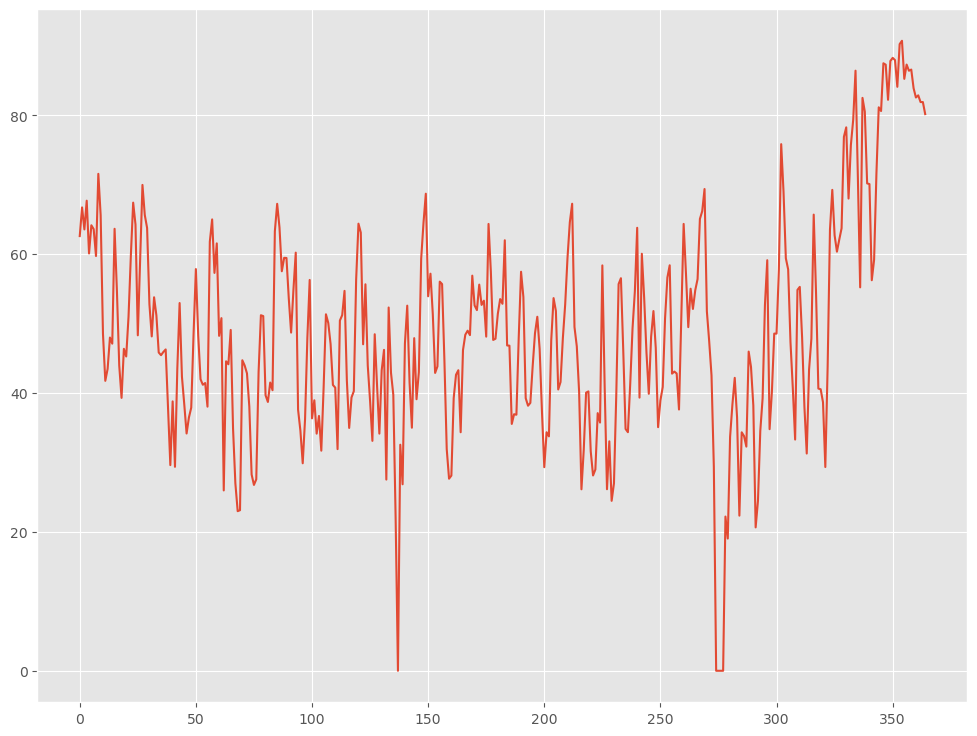

In [65]:
submit = pd.DataFrame({'datetime' : test_data.index, 'pred' : pred_lgb})

print(submit)

# 閉店時の予測値を0に置き換える
for i in test_data2[test_data2['close']==1].index:
    submit['pred'].iloc[i] = 0
    
# 予測値を描画
plt.plot(submit['pred'])

submit.columns = submit.iloc[0]
print(submit)
submit.to_csv('LGBM0907_4.csv', index=False)

In [58]:
### XGBoost ###

import xgboost as xgb
regressor = xgb.XGBRegressor()
regressor.fit(x_tr.values, y_tr.values)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
# 特徴量重要度（Feature Importances）
df_importance = pd.DataFrame(zip(x_tr.columns,
                                 regressor.feature_importances_),
                             columns=["Features","Importance"])
df_importance = df_importance.sort_values("Importance",
                                          ascending=False)
df_importance #確認

,Features,Importance
7,y_lag_365,0.284230
3,price,0.168052
4,year,0.122098
1,price_am,0.099351
13,price_pm_lag_365,0.078436
2,price_pm,0.067654
5,month,0.039875
11,price_pm_lag_1,0.025654
6,weekday,0.023308
8,price_am_lag_1,0.020810


In [60]:
# 予測
train_pred = regressor.predict(x_tr.values)
valid_pred = regressor.predict(x_va.values)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# 精度指標（テストデータ）
print('RMSE:')
print(np.sqrt(mean_squared_error(y_test, valid_pred)))
print('MAE:')
print(mean_absolute_error(y_test, valid_pred))
print('MAPE:')
print(mean_absolute_percentage_error(y_test, valid_pred))

RMSE:
10.934731517431167
MAE:
8.636187874780942
MAPE:
0.19143021731858223


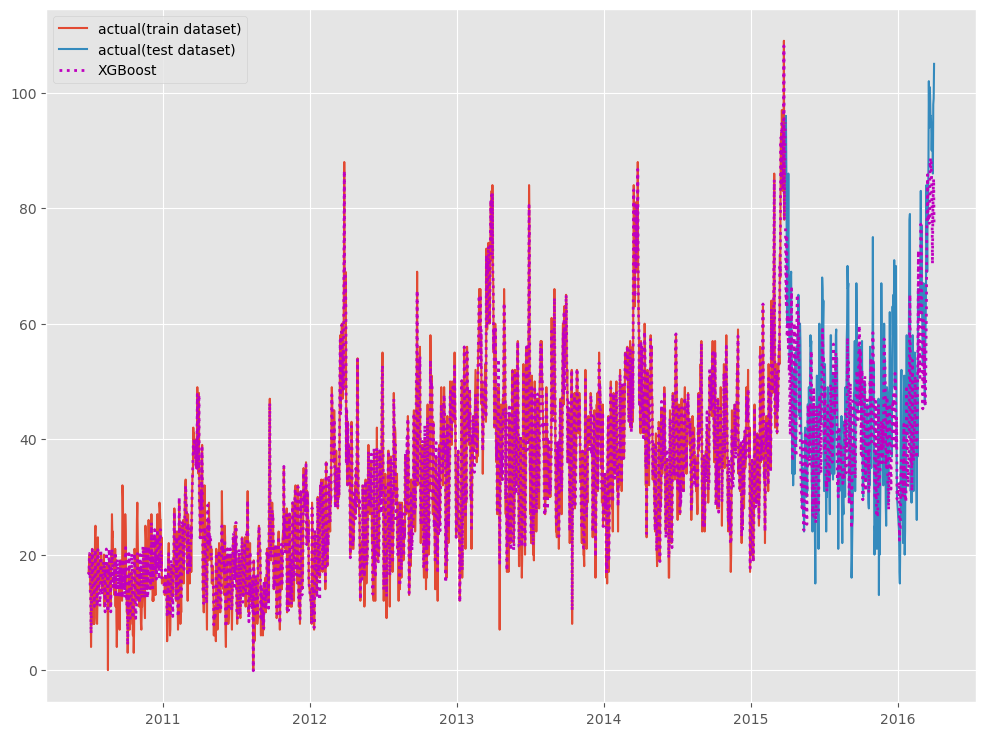

In [61]:
# グラフ化
fig, ax = plt.subplots()
ax.plot(y_train.index, y_train.values, label="actual(train dataset)")
ax.plot(y_test.index, y_test.values, label="actual(test dataset)")
ax.plot(y_train.index, train_pred, linestyle="dotted", lw=2,color="m")
ax.plot(y_test.index, test_pred, label="XGBoost", linestyle="dotted", lw=2, color="m") 
plt.legend()

In [66]:
pred_xgb = regressor.predict(test_data_open.values)

submit_xgb = pd.DataFrame({'datetime' : test_data.index, 'pred' : pred_xgb})

# 閉店時の予測値を0に置き換える
for i in test_data2[test_data2['close']==1].index:
    submit_xgb['pred'].iloc[i] = 0

submit_xgb

/var/folders/55/p_rc8dfn457_yr0748h20c4r0000gn/T/ipykernel_1215/3180076692.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  submit_xgb['pred'].iloc[i] = 0
/var/folders/55/p_rc8dfn457_yr0748h20c4r0000gn/T/ipykernel_1215/3180076692.py:7: Se

,datetime,pred
0,2016-04-01,63.198486
1,2016-04-02,75.893250
2,2016-04-03,55.166782
3,2016-04-04,62.232346
4,2016-04-05,72.111298
...,...,...
360,2017-03-27,70.372025
361,2017-03-28,71.345116
362,2017-03-29,81.478096
363,2017-03-30,90.237473


In [72]:
# 平均をとってアンサンブル
submit_ensemble = pd.DataFrame({'datetime' : test_data.index, 'pred' : ((pred_xgb) + (pred_lgb)) / 2})
submit_ensemble.columns = submit.iloc[0]

In [73]:
submit_ensemble

,2016-04-01 00:00:00,66.407773
0,2016-04-01,64.803130
1,2016-04-02,71.582382
2,2016-04-03,60.866888
3,2016-04-04,67.772229
4,2016-04-05,66.055382
...,...,...
360,2017-03-27,74.048084
361,2017-03-28,74.534630
362,2017-03-29,80.658171
363,2017-03-30,87.388396


In [74]:
submit_ensemble.to_csv('ensemble_0903_1.csv', index=False)